In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision
import os


transform = transforms.Compose([#transforms.Resize((256,256)),  
                                transforms.Grayscale(),		# the code transforms.Graysclae() is for changing the size [3,100,100] to [1, 100, 100] (notice : [channel, height, width] )
                                transforms.ToTensor(),])


#train_data_path = 'relative path of training data set'
train_data_path = 'horse-or-human/horse-or-human/train'
trainset = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
# if shuffle=True, the data reshuffled at every epoch #numworks가 뭐지?
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1027, shuffle=False, num_workers=0)  


validation_data_path = 'horse-or-human/horse-or-human/validation'
valset = torchvision.datasets.ImageFolder(root=validation_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
valloader = torch.utils.data.DataLoader(valset, batch_size=256, shuffle=False, num_workers=0)  

NUM_EPOCH=1
for epoch in range(NUM_EPOCH):
    # load training images of the batch size for every iteration
    for i, data in enumerate(trainloader):

        # inputs is the image
        # labels is the class of the image
        inputs, labels = data

        # if you don't change the image size, it will be [batch_size, 1, 100, 100]
        #print(inputs.shape)

        # if labels is horse it returns tensor[0,0,0] else it returns tensor[1,1,1]
        #print(labels)  





    # load validation images of the batch size for every iteration
    for i, data in enumerate(valloader):
        
        # inputs is the image
        # labels is the class of the image
        inputs, labels = data

        # if you don't change the image size, it will be [batch_size, 1, 100, 100]
        #print(inputs.shape)

        # if labels is horse it returns tensor[0,0,0] else it returns tensor[1,1,1]
        #print(labels)    

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn
import numpy as np
import plotly.graph_objects as go

In [3]:
train_dataset = next(iter(trainloader))[0].numpy()
train_label =next(iter(trainloader))[1].numpy()

val_dataset = next(iter(valloader))[0].numpy()
val_label =next(iter(valloader))[1].numpy()

In [4]:
train_label=train_label.reshape(1027,1)
val_label=val_label.reshape(256,1)

In [5]:
train_flatten=train_dataset.reshape(1027,train_dataset.shape[2]*train_dataset.shape[3])
val_flatten=val_dataset.reshape(256,val_dataset.shape[2]*val_dataset.shape[3])

In [6]:
x_train=train_flatten.T
y_train=train_label.T

x_test=val_flatten.T
y_test=val_label.T

In [7]:
n_x = x_train.shape[0] # size of input layer`
n_y = y_train.shape[0] # size of output layer
m = x_train.shape[1]

In [8]:
#initiate variables
def init_var() : 
    global W1,b1,W2,b2,W3,b3,highest,highest,highestloss
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))

    W2 = np.random.randn(n_h,n_h) * 0.01
    b2 = np.zeros(shape=(n_h, 1))

    W3 = np.random.randn(n_y,n_h) * 0.01
    b3 = np.zeros(shape=(n_y, 1))
    
    highest=0
    highestindex=0
    highestloss=0
    

In [9]:
def sigmoid(z):
    y = 1/(1+np.exp(-z))
    return y

In [10]:
def forward_p(x_train):
    #print(parameters)
    Z1 = np.dot(W1,x_train) + b1
    A1 = sigmoid(Z1) # activation function
    
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)  
    
    Z3 = np.dot(W3,A2) + b3
    A3 = sigmoid(Z3) # Final output prediction
    return A3, A2 , A1, Z2, Z1

In [11]:
# Compute the cross-entropy cost
def compute_cost(A3, Y):
    loss = np.multiply(np.log(A3), Y) + np.multiply((1 - Y), np.log(1 - A3))
    cost = - np.sum(loss) / m
    return cost

In [12]:
def back_p( X, Y, A3, A2, A1) :
    dZ3 = A3 - Y
    dW3 = (1 / m) * np.dot(dZ3, A2.T) + (lambd/m) * W3
    db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)
    
    dZ2 = np.multiply(np.dot(W3.T, dZ3), A2 - np.power(A2, 2))
    dW2 = (1 / m) * np.dot(dZ2, A1.T) + (lambd/m) * W2
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.multiply(np.dot(W2.T, dZ2), A1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T) + (lambd/m) * W1
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {'dW3':dW3, 'db3':db3, 'dW2':dW2,'db2':db2,'dW1':dW1,'db1':db1}    
    return grads
    #return {'dW1':dW1, 'db1':db1, 'dW2':dW2, 'db2':db2, 'dW3':dW3,'db3':db3}
    #return dW1,db1,dW2,db2,dW3,db3

In [13]:
def update_parameters(  dW1=0,db1=0,dW2=0,db2=0,dW3=0,db3=0) :
    global W1,b1,W2,b2,W3,b3
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3

In [14]:
def predict(X,A3) :
    #A3,_,__ = forward_p(X)
    predictions = A3 >0.5
    predictions = np.where(A3 > 0.5, 1, 0)
    return predictions

def print_accuracy(X, Y, A3, train) :
    predictions = predict(X, A3)
    if train ==1 :
        print("\tTraining Accuracy: %.10f" %(100 - np.mean(np.abs(predictions - Y)) * 100)+'%',end='')
    else :
        print("\tValidation Accuracy: %.10f" %(100 - np.mean(np.abs(predictions - Y)) * 100)+'%')
    
    return (100 - np.mean(np.abs(predictions - Y)) * 100)
    #print('Accuracy: %f' %(float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T)))/float(Y.size)*100)+ '%')

In [15]:
l_index = []
l_train_cost_list = []
l_val_cost_list = []
l_ac_train=[]
l_ac_val= []

In [16]:
def l2_reg_cost():
    return ( np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)) )*(lambd/(2*m))

In [17]:
def nn_model(X, Y, n_h, num_iterations , X_test, Y_test) :
    global highest, highesindex, learning_rate, highestloss
    init_var()
    for i in range(0, num_iterations) :
        A3 ,A2, A1, Z2, Z1= forward_p(X)
        cost = compute_cost(A3, Y) + l2_reg_cost()
        grads = back_p(X, Y, A3, A2, A1)
        parameters = update_parameters( **grads)
        
        
        
        if i % 1 == 0:
            val_A3,_,__,_____,___=forward_p(X_test)
            val_cost=compute_cost(val_A3,Y_test)
            print("#%i Training loss : %.10f\tValidation loss : %.10f" %(i,cost,val_cost),end='')
            l_train_ac = print_accuracy(X,Y,A3,1)
            l_val_ac = print_accuracy(X_test,Y_test,val_A3,0)
            
            l_index.append(i)
            l_train_cost_list.append(cost)
            l_val_cost_list.append(val_cost)
            l_ac_train.append(l_train_ac)
            l_ac_val.append(l_val_ac)
                
        if i > 300 :
            if l_train_cost_list[-1] == l_train_cost_list[-2] : 
                break
                
        #if cost< 0.09:
        #    learning_rate=0.1
        #if cost<0.05:
        #    learning_rate=0.05
        #if cost<0.01:
        #    learning_rate=0.01
        if highest < l_val_ac :
            highest = l_val_ac
            highestindex=i
            highestloss=val_cost
            
    return l_index,l_train_cost_list,l_val_cost_list,l_ac_train,l_ac_val

In [18]:
learning_rate=0.5
lambd = 1 #large
n_h = 200 # hidden layer size
l_index,l_train_cost_list,l_val_cost_list,l_ac_train,l_ac_val = nn_model(x_train, y_train ,n_h, 4000 , x_test,y_test)

#0 Training loss : 0.7836957843	Validation loss : 0.1734683523	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1 Training loss : 0.7833380094	Validation loss : 0.1733609496	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2 Training loss : 0.7830653478	Validation loss : 0.1732747961	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3 Training loss : 0.7828575062	Validation loss : 0.1732053866	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4 Training loss : 0.7826990084	Validation loss : 0.1731492149	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#5 Training loss : 0.7825780602	Validation loss : 0.1731035473	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#6 Training loss : 0.7824856786	Validation loss : 0.1730662468	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#7 Training loss : 0.7824150250	Validation loss : 0.1730356390	Traini

#61 Training loss : 0.7821020048	Validation loss : 0.1728734152	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#62 Training loss : 0.7821002506	Validation loss : 0.1728733720	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#63 Training loss : 0.7820984964	Validation loss : 0.1728733299	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#64 Training loss : 0.7820967423	Validation loss : 0.1728732890	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#65 Training loss : 0.7820949882	Validation loss : 0.1728732489	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#66 Training loss : 0.7820932342	Validation loss : 0.1728732096	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#67 Training loss : 0.7820914802	Validation loss : 0.1728731710	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#68 Training loss : 0.7820897262	Validation loss : 0.172873132

#121 Training loss : 0.7819968084	Validation loss : 0.1728713049	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#122 Training loss : 0.7819950560	Validation loss : 0.1728712709	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#123 Training loss : 0.7819933037	Validation loss : 0.1728712369	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#124 Training loss : 0.7819915514	Validation loss : 0.1728712030	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#125 Training loss : 0.7819897991	Validation loss : 0.1728711690	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#126 Training loss : 0.7819880468	Validation loss : 0.1728711350	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#127 Training loss : 0.7819862945	Validation loss : 0.1728711010	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#128 Training loss : 0.7819845423	Validation loss : 0.1

#181 Training loss : 0.7818917111	Validation loss : 0.1728692654	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#182 Training loss : 0.7818899603	Validation loss : 0.1728692314	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#183 Training loss : 0.7818882094	Validation loss : 0.1728691973	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#184 Training loss : 0.7818864586	Validation loss : 0.1728691633	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#185 Training loss : 0.7818847078	Validation loss : 0.1728691293	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#186 Training loss : 0.7818829570	Validation loss : 0.1728690953	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#187 Training loss : 0.7818812062	Validation loss : 0.1728690612	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#188 Training loss : 0.7818794555	Validation loss : 0.1

#241 Training loss : 0.7817866958	Validation loss : 0.1728672216	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#242 Training loss : 0.7817849461	Validation loss : 0.1728671875	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#243 Training loss : 0.7817831965	Validation loss : 0.1728671533	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#244 Training loss : 0.7817814468	Validation loss : 0.1728671192	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#245 Training loss : 0.7817796972	Validation loss : 0.1728670851	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#246 Training loss : 0.7817779476	Validation loss : 0.1728670510	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#247 Training loss : 0.7817761981	Validation loss : 0.1728670168	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#248 Training loss : 0.7817744485	Validation loss : 0.1

#301 Training loss : 0.7816817452	Validation loss : 0.1728651702	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#302 Training loss : 0.7816799964	Validation loss : 0.1728651360	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#303 Training loss : 0.7816782477	Validation loss : 0.1728651017	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#304 Training loss : 0.7816764990	Validation loss : 0.1728650674	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#305 Training loss : 0.7816747503	Validation loss : 0.1728650331	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#306 Training loss : 0.7816730017	Validation loss : 0.1728649989	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#307 Training loss : 0.7816712530	Validation loss : 0.1728649646	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#308 Training loss : 0.7816695044	Validation loss : 0.1

#361 Training loss : 0.7815768422	Validation loss : 0.1728631082	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#362 Training loss : 0.7815750941	Validation loss : 0.1728630737	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#363 Training loss : 0.7815733461	Validation loss : 0.1728630392	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#364 Training loss : 0.7815715980	Validation loss : 0.1728630047	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#365 Training loss : 0.7815698500	Validation loss : 0.1728629702	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#366 Training loss : 0.7815681019	Validation loss : 0.1728629357	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#367 Training loss : 0.7815663539	Validation loss : 0.1728629012	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#368 Training loss : 0.7815646059	Validation loss : 0.1

#421 Training loss : 0.7814719697	Validation loss : 0.1728610321	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#422 Training loss : 0.7814702220	Validation loss : 0.1728609973	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#423 Training loss : 0.7814684743	Validation loss : 0.1728609626	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#424 Training loss : 0.7814667266	Validation loss : 0.1728609278	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#425 Training loss : 0.7814649789	Validation loss : 0.1728608931	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#426 Training loss : 0.7814632312	Validation loss : 0.1728608583	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#427 Training loss : 0.7814614835	Validation loss : 0.1728608236	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#428 Training loss : 0.7814597358	Validation loss : 0.1

#481 Training loss : 0.7813671104	Validation loss : 0.1728589387	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#482 Training loss : 0.7813653627	Validation loss : 0.1728589036	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#483 Training loss : 0.7813636151	Validation loss : 0.1728588686	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#484 Training loss : 0.7813618674	Validation loss : 0.1728588335	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#485 Training loss : 0.7813601198	Validation loss : 0.1728587985	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#486 Training loss : 0.7813583721	Validation loss : 0.1728587634	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#487 Training loss : 0.7813566245	Validation loss : 0.1728587283	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#488 Training loss : 0.7813548768	Validation loss : 0.1

#541 Training loss : 0.7812622467	Validation loss : 0.1728568248	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#542 Training loss : 0.7812604988	Validation loss : 0.1728567893	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#543 Training loss : 0.7812587509	Validation loss : 0.1728567539	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#544 Training loss : 0.7812570030	Validation loss : 0.1728567185	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#545 Training loss : 0.7812552552	Validation loss : 0.1728566830	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#546 Training loss : 0.7812535073	Validation loss : 0.1728566476	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#547 Training loss : 0.7812517594	Validation loss : 0.1728566121	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#548 Training loss : 0.7812500115	Validation loss : 0.1

#601 Training loss : 0.7811573610	Validation loss : 0.1728546869	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#602 Training loss : 0.7811556126	Validation loss : 0.1728546511	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#603 Training loss : 0.7811538642	Validation loss : 0.1728546152	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#604 Training loss : 0.7811521158	Validation loss : 0.1728545793	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#605 Training loss : 0.7811503674	Validation loss : 0.1728545434	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#606 Training loss : 0.7811486190	Validation loss : 0.1728545076	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#607 Training loss : 0.7811468705	Validation loss : 0.1728544717	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#608 Training loss : 0.7811451221	Validation loss : 0.1

#661 Training loss : 0.7810524355	Validation loss : 0.1728525218	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#662 Training loss : 0.7810506863	Validation loss : 0.1728524854	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#663 Training loss : 0.7810489371	Validation loss : 0.1728524491	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#664 Training loss : 0.7810471878	Validation loss : 0.1728524127	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#665 Training loss : 0.7810454386	Validation loss : 0.1728523764	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#666 Training loss : 0.7810436893	Validation loss : 0.1728523400	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#667 Training loss : 0.7810419400	Validation loss : 0.1728523036	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#668 Training loss : 0.7810401907	Validation loss : 0.1

#721 Training loss : 0.7809474520	Validation loss : 0.1728503259	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#722 Training loss : 0.7809457016	Validation loss : 0.1728502890	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#723 Training loss : 0.7809439513	Validation loss : 0.1728502521	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#724 Training loss : 0.7809422009	Validation loss : 0.1728502152	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#725 Training loss : 0.7809404505	Validation loss : 0.1728501783	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#726 Training loss : 0.7809387001	Validation loss : 0.1728501414	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#727 Training loss : 0.7809369497	Validation loss : 0.1728501045	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#728 Training loss : 0.7809351993	Validation loss : 0.1

#781 Training loss : 0.7808423920	Validation loss : 0.1728480958	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#782 Training loss : 0.7808406402	Validation loss : 0.1728480583	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#783 Training loss : 0.7808388885	Validation loss : 0.1728480209	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#784 Training loss : 0.7808371367	Validation loss : 0.1728479834	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#785 Training loss : 0.7808353848	Validation loss : 0.1728479458	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#786 Training loss : 0.7808336330	Validation loss : 0.1728479083	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#787 Training loss : 0.7808318811	Validation loss : 0.1728478708	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#788 Training loss : 0.7808301292	Validation loss : 0.1

#841 Training loss : 0.7807372368	Validation loss : 0.1728458280	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#842 Training loss : 0.7807354833	Validation loss : 0.1728457898	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#843 Training loss : 0.7807337297	Validation loss : 0.1728457517	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#844 Training loss : 0.7807319762	Validation loss : 0.1728457135	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#845 Training loss : 0.7807302226	Validation loss : 0.1728456754	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#846 Training loss : 0.7807284689	Validation loss : 0.1728456372	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#847 Training loss : 0.7807267153	Validation loss : 0.1728455990	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#848 Training loss : 0.7807249616	Validation loss : 0.1

#901 Training loss : 0.7806319671	Validation loss : 0.1728435187	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#902 Training loss : 0.7806302115	Validation loss : 0.1728434799	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#903 Training loss : 0.7806284559	Validation loss : 0.1728434410	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#904 Training loss : 0.7806267003	Validation loss : 0.1728434021	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#905 Training loss : 0.7806249446	Validation loss : 0.1728433632	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#906 Training loss : 0.7806231889	Validation loss : 0.1728433243	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#907 Training loss : 0.7806214331	Validation loss : 0.1728432854	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#908 Training loss : 0.7806196773	Validation loss : 0.1

#961 Training loss : 0.7805265633	Validation loss : 0.1728411644	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#962 Training loss : 0.7805248054	Validation loss : 0.1728411248	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#963 Training loss : 0.7805230473	Validation loss : 0.1728410851	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#964 Training loss : 0.7805212893	Validation loss : 0.1728410454	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#965 Training loss : 0.7805195312	Validation loss : 0.1728410057	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#966 Training loss : 0.7805177730	Validation loss : 0.1728409660	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#967 Training loss : 0.7805160148	Validation loss : 0.1728409263	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#968 Training loss : 0.7805142566	Validation loss : 0.1

#1021 Training loss : 0.7804210053	Validation loss : 0.1728387611	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1022 Training loss : 0.7804192446	Validation loss : 0.1728387206	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1023 Training loss : 0.7804174838	Validation loss : 0.1728386801	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1024 Training loss : 0.7804157230	Validation loss : 0.1728386396	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1025 Training loss : 0.7804139622	Validation loss : 0.1728385991	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1026 Training loss : 0.7804122012	Validation loss : 0.1728385585	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1027 Training loss : 0.7804104403	Validation loss : 0.1728385180	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1028 Training loss : 0.7804086793	Validation lo

#1081 Training loss : 0.7803152725	Validation loss : 0.1728363050	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1082 Training loss : 0.7803135087	Validation loss : 0.1728362636	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1083 Training loss : 0.7803117448	Validation loss : 0.1728362222	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1084 Training loss : 0.7803099809	Validation loss : 0.1728361808	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1085 Training loss : 0.7803082169	Validation loss : 0.1728361393	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1086 Training loss : 0.7803064528	Validation loss : 0.1728360978	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1087 Training loss : 0.7803046888	Validation loss : 0.1728360564	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1088 Training loss : 0.7803029246	Validation lo

#1141 Training loss : 0.7802093435	Validation loss : 0.1728337921	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1142 Training loss : 0.7802075762	Validation loss : 0.1728337497	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1143 Training loss : 0.7802058089	Validation loss : 0.1728337073	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1144 Training loss : 0.7802040415	Validation loss : 0.1728336649	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1145 Training loss : 0.7802022740	Validation loss : 0.1728336224	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1146 Training loss : 0.7802005065	Validation loss : 0.1728335800	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1147 Training loss : 0.7801987390	Validation loss : 0.1728335375	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1148 Training loss : 0.7801969713	Validation lo

#1201 Training loss : 0.7801031965	Validation loss : 0.1728312181	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1202 Training loss : 0.7801014254	Validation loss : 0.1728311747	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1203 Training loss : 0.7800996542	Validation loss : 0.1728311312	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1204 Training loss : 0.7800978830	Validation loss : 0.1728310877	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1205 Training loss : 0.7800961117	Validation loss : 0.1728310442	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1206 Training loss : 0.7800943404	Validation loss : 0.1728310007	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1207 Training loss : 0.7800925689	Validation loss : 0.1728309572	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1208 Training loss : 0.7800907974	Validation lo

#1261 Training loss : 0.7799968090	Validation loss : 0.1728285789	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1262 Training loss : 0.7799950337	Validation loss : 0.1728285343	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1263 Training loss : 0.7799932583	Validation loss : 0.1728284897	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1264 Training loss : 0.7799914828	Validation loss : 0.1728284451	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1265 Training loss : 0.7799897073	Validation loss : 0.1728284005	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1266 Training loss : 0.7799879317	Validation loss : 0.1728283559	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1267 Training loss : 0.7799861561	Validation loss : 0.1728283112	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1268 Training loss : 0.7799843803	Validation lo

#1321 Training loss : 0.7798901576	Validation loss : 0.1728258700	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1322 Training loss : 0.7798883777	Validation loss : 0.1728258242	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1323 Training loss : 0.7798865977	Validation loss : 0.1728257784	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1324 Training loss : 0.7798848176	Validation loss : 0.1728257326	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1325 Training loss : 0.7798830375	Validation loss : 0.1728256868	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1326 Training loss : 0.7798812573	Validation loss : 0.1728256410	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1327 Training loss : 0.7798794770	Validation loss : 0.1728255951	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1328 Training loss : 0.7798776966	Validation lo

#1381 Training loss : 0.7797832183	Validation loss : 0.1728230869	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1382 Training loss : 0.7797814334	Validation loss : 0.1728230398	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1383 Training loss : 0.7797796484	Validation loss : 0.1728229927	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1384 Training loss : 0.7797778633	Validation loss : 0.1728229457	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1385 Training loss : 0.7797760781	Validation loss : 0.1728228986	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1386 Training loss : 0.7797742929	Validation loss : 0.1728228514	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1387 Training loss : 0.7797725075	Validation loss : 0.1728228043	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1388 Training loss : 0.7797707221	Validation lo

#1441 Training loss : 0.7796759661	Validation loss : 0.1728202247	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1442 Training loss : 0.7796741757	Validation loss : 0.1728201763	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1443 Training loss : 0.7796723853	Validation loss : 0.1728201279	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1444 Training loss : 0.7796705948	Validation loss : 0.1728200795	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1445 Training loss : 0.7796688042	Validation loss : 0.1728200310	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1446 Training loss : 0.7796670135	Validation loss : 0.1728199825	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1447 Training loss : 0.7796652227	Validation loss : 0.1728199340	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1448 Training loss : 0.7796634318	Validation lo

#1501 Training loss : 0.7795683751	Validation loss : 0.1728172787	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1502 Training loss : 0.7795665789	Validation loss : 0.1728172289	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1503 Training loss : 0.7795647826	Validation loss : 0.1728171790	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1504 Training loss : 0.7795629862	Validation loss : 0.1728171291	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1505 Training loss : 0.7795611897	Validation loss : 0.1728170792	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1506 Training loss : 0.7795593931	Validation loss : 0.1728170293	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1507 Training loss : 0.7795575964	Validation loss : 0.1728169793	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1508 Training loss : 0.7795557996	Validation lo

#1561 Training loss : 0.7794604186	Validation loss : 0.1728142437	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1562 Training loss : 0.7794586161	Validation loss : 0.1728141924	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1563 Training loss : 0.7794568134	Validation loss : 0.1728141410	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1564 Training loss : 0.7794550107	Validation loss : 0.1728140896	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1565 Training loss : 0.7794532078	Validation loss : 0.1728140381	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1566 Training loss : 0.7794514049	Validation loss : 0.1728139866	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1567 Training loss : 0.7794496018	Validation loss : 0.1728139351	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1568 Training loss : 0.7794477986	Validation lo

#1621 Training loss : 0.7793520686	Validation loss : 0.1728111145	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1622 Training loss : 0.7793502593	Validation loss : 0.1728110615	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1623 Training loss : 0.7793484498	Validation loss : 0.1728110085	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1624 Training loss : 0.7793466403	Validation loss : 0.1728109554	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1625 Training loss : 0.7793448306	Validation loss : 0.1728109024	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1626 Training loss : 0.7793430208	Validation loss : 0.1728108493	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1627 Training loss : 0.7793412108	Validation loss : 0.1728107962	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1628 Training loss : 0.7793394008	Validation lo

#1681 Training loss : 0.7792432961	Validation loss : 0.1728078854	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1682 Training loss : 0.7792414794	Validation loss : 0.1728078307	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1683 Training loss : 0.7792396627	Validation loss : 0.1728077760	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1684 Training loss : 0.7792378458	Validation loss : 0.1728077212	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1685 Training loss : 0.7792360288	Validation loss : 0.1728076665	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1686 Training loss : 0.7792342117	Validation loss : 0.1728076116	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1687 Training loss : 0.7792323944	Validation loss : 0.1728075568	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1688 Training loss : 0.7792305770	Validation lo

#1741 Training loss : 0.7791340708	Validation loss : 0.1728045508	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1742 Training loss : 0.7791322464	Validation loss : 0.1728044943	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1743 Training loss : 0.7791304218	Validation loss : 0.1728044378	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1744 Training loss : 0.7791285971	Validation loss : 0.1728043812	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1745 Training loss : 0.7791267722	Validation loss : 0.1728043246	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1746 Training loss : 0.7791249473	Validation loss : 0.1728042680	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1747 Training loss : 0.7791231222	Validation loss : 0.1728042113	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1748 Training loss : 0.7791212969	Validation lo

#1801 Training loss : 0.7790243612	Validation loss : 0.1728011047	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1802 Training loss : 0.7790225285	Validation loss : 0.1728010462	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1803 Training loss : 0.7790206955	Validation loss : 0.1728009878	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1804 Training loss : 0.7790188625	Validation loss : 0.1728009293	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1805 Training loss : 0.7790170293	Validation loss : 0.1728008708	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1806 Training loss : 0.7790151959	Validation loss : 0.1728008122	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1807 Training loss : 0.7790133624	Validation loss : 0.1728007537	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1808 Training loss : 0.7790115288	Validation lo

#1861 Training loss : 0.7789141346	Validation loss : 0.1727975407	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1862 Training loss : 0.7789122929	Validation loss : 0.1727974802	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1863 Training loss : 0.7789104510	Validation loss : 0.1727974198	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1864 Training loss : 0.7789086090	Validation loss : 0.1727973593	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1865 Training loss : 0.7789067669	Validation loss : 0.1727972987	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1866 Training loss : 0.7789049246	Validation loss : 0.1727972382	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1867 Training loss : 0.7789030821	Validation loss : 0.1727971776	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1868 Training loss : 0.7789012395	Validation lo

#1921 Training loss : 0.7788033564	Validation loss : 0.1727938523	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1922 Training loss : 0.7788015052	Validation loss : 0.1727937898	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1923 Training loss : 0.7787996539	Validation loss : 0.1727937272	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1924 Training loss : 0.7787978024	Validation loss : 0.1727936645	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1925 Training loss : 0.7787959507	Validation loss : 0.1727936019	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1926 Training loss : 0.7787940989	Validation loss : 0.1727935391	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1927 Training loss : 0.7787922469	Validation loss : 0.1727934764	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1928 Training loss : 0.7787903947	Validation lo

#1981 Training loss : 0.7786919908	Validation loss : 0.1727900327	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1982 Training loss : 0.7786901296	Validation loss : 0.1727899679	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1983 Training loss : 0.7786882681	Validation loss : 0.1727899031	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1984 Training loss : 0.7786864065	Validation loss : 0.1727898382	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1985 Training loss : 0.7786845447	Validation loss : 0.1727897733	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1986 Training loss : 0.7786826827	Validation loss : 0.1727897083	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1987 Training loss : 0.7786808206	Validation loss : 0.1727896433	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1988 Training loss : 0.7786789582	Validation lo

#2041 Training loss : 0.7785800003	Validation loss : 0.1727860747	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2042 Training loss : 0.7785781283	Validation loss : 0.1727860075	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2043 Training loss : 0.7785762561	Validation loss : 0.1727859403	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2044 Training loss : 0.7785743837	Validation loss : 0.1727858730	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2045 Training loss : 0.7785725111	Validation loss : 0.1727858057	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2046 Training loss : 0.7785706384	Validation loss : 0.1727857384	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2047 Training loss : 0.7785687654	Validation loss : 0.1727856710	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2048 Training loss : 0.7785668923	Validation lo

#2101 Training loss : 0.7784673456	Validation loss : 0.1727819707	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2102 Training loss : 0.7784654621	Validation loss : 0.1727819010	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2103 Training loss : 0.7784635785	Validation loss : 0.1727818313	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2104 Training loss : 0.7784616947	Validation loss : 0.1727817615	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2105 Training loss : 0.7784598106	Validation loss : 0.1727816917	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2106 Training loss : 0.7784579264	Validation loss : 0.1727816219	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2107 Training loss : 0.7784560420	Validation loss : 0.1727815520	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2108 Training loss : 0.7784541574	Validation lo

#2161 Training loss : 0.7783539853	Validation loss : 0.1727777128	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2162 Training loss : 0.7783520897	Validation loss : 0.1727776405	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2163 Training loss : 0.7783501940	Validation loss : 0.1727775681	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2164 Training loss : 0.7783482980	Validation loss : 0.1727774957	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2165 Training loss : 0.7783464018	Validation loss : 0.1727774232	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2166 Training loss : 0.7783445054	Validation loss : 0.1727773507	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2167 Training loss : 0.7783426088	Validation loss : 0.1727772782	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2168 Training loss : 0.7783407120	Validation lo

#2221 Training loss : 0.7782398763	Validation loss : 0.1727732926	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2222 Training loss : 0.7782379679	Validation loss : 0.1727732175	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2223 Training loss : 0.7782360593	Validation loss : 0.1727731424	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2224 Training loss : 0.7782341504	Validation loss : 0.1727730672	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2225 Training loss : 0.7782322413	Validation loss : 0.1727729920	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2226 Training loss : 0.7782303320	Validation loss : 0.1727729167	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2227 Training loss : 0.7782284225	Validation loss : 0.1727728413	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2228 Training loss : 0.7782265128	Validation lo

#2281 Training loss : 0.7781249733	Validation loss : 0.1727687014	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2282 Training loss : 0.7781230512	Validation loss : 0.1727686234	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2283 Training loss : 0.7781211290	Validation loss : 0.1727685453	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2284 Training loss : 0.7781192064	Validation loss : 0.1727684672	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2285 Training loss : 0.7781172837	Validation loss : 0.1727683890	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2286 Training loss : 0.7781153607	Validation loss : 0.1727683108	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2287 Training loss : 0.7781134375	Validation loss : 0.1727682325	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2288 Training loss : 0.7781115140	Validation lo

#2341 Training loss : 0.7780092285	Validation loss : 0.1727639300	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2342 Training loss : 0.7780072920	Validation loss : 0.1727638489	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2343 Training loss : 0.7780053553	Validation loss : 0.1727637677	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2344 Training loss : 0.7780034183	Validation loss : 0.1727636865	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2345 Training loss : 0.7780014811	Validation loss : 0.1727636052	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2346 Training loss : 0.7779995436	Validation loss : 0.1727635239	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2347 Training loss : 0.7779976059	Validation loss : 0.1727634425	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2348 Training loss : 0.7779956679	Validation lo

#2401 Training loss : 0.7778925920	Validation loss : 0.1727589685	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2402 Training loss : 0.7778906402	Validation loss : 0.1727588842	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2403 Training loss : 0.7778886881	Validation loss : 0.1727587998	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2404 Training loss : 0.7778867358	Validation loss : 0.1727587153	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2405 Training loss : 0.7778847832	Validation loss : 0.1727586308	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2406 Training loss : 0.7778828304	Validation loss : 0.1727585462	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2407 Training loss : 0.7778808773	Validation loss : 0.1727584615	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2408 Training loss : 0.7778789239	Validation lo

#2461 Training loss : 0.7777750110	Validation loss : 0.1727538068	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2462 Training loss : 0.7777730430	Validation loss : 0.1727537190	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2463 Training loss : 0.7777710747	Validation loss : 0.1727536312	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2464 Training loss : 0.7777691062	Validation loss : 0.1727535433	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2465 Training loss : 0.7777671373	Validation loss : 0.1727534553	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2466 Training loss : 0.7777651682	Validation loss : 0.1727533673	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2467 Training loss : 0.7777631988	Validation loss : 0.1727532792	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2468 Training loss : 0.7777612292	Validation lo

#2521 Training loss : 0.7776564301	Validation loss : 0.1727484339	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2522 Training loss : 0.7776544450	Validation loss : 0.1727483425	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2523 Training loss : 0.7776524595	Validation loss : 0.1727482510	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2524 Training loss : 0.7776504738	Validation loss : 0.1727481595	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2525 Training loss : 0.7776484878	Validation loss : 0.1727480679	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2526 Training loss : 0.7776465014	Validation loss : 0.1727479763	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2527 Training loss : 0.7776445148	Validation loss : 0.1727478846	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2528 Training loss : 0.7776425279	Validation lo

#2581 Training loss : 0.7775367910	Validation loss : 0.1727428384	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2582 Training loss : 0.7775347877	Validation loss : 0.1727427432	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2583 Training loss : 0.7775327841	Validation loss : 0.1727426479	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2584 Training loss : 0.7775307802	Validation loss : 0.1727425526	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2585 Training loss : 0.7775287759	Validation loss : 0.1727424571	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2586 Training loss : 0.7775267714	Validation loss : 0.1727423617	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2587 Training loss : 0.7775247665	Validation loss : 0.1727422661	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2588 Training loss : 0.7775227614	Validation lo

#2641 Training loss : 0.7774160321	Validation loss : 0.1727370081	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2642 Training loss : 0.7774140096	Validation loss : 0.1727369088	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2643 Training loss : 0.7774119868	Validation loss : 0.1727368095	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2644 Training loss : 0.7774099636	Validation loss : 0.1727367102	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2645 Training loss : 0.7774079401	Validation loss : 0.1727366107	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2646 Training loss : 0.7774059163	Validation loss : 0.1727365112	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2647 Training loss : 0.7774038921	Validation loss : 0.1727364116	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2648 Training loss : 0.7774018677	Validation lo

#2701 Training loss : 0.7772940886	Validation loss : 0.1727309301	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2702 Training loss : 0.7772920457	Validation loss : 0.1727308266	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2703 Training loss : 0.7772900026	Validation loss : 0.1727307230	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2704 Training loss : 0.7772879591	Validation loss : 0.1727306194	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2705 Training loss : 0.7772859152	Validation loss : 0.1727305157	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2706 Training loss : 0.7772838710	Validation loss : 0.1727304120	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2707 Training loss : 0.7772818264	Validation loss : 0.1727303081	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2708 Training loss : 0.7772797815	Validation lo

#2761 Training loss : 0.7771708919	Validation loss : 0.1727245907	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2762 Training loss : 0.7771688276	Validation loss : 0.1727244828	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2763 Training loss : 0.7771667630	Validation loss : 0.1727243747	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2764 Training loss : 0.7771646979	Validation loss : 0.1727242666	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2765 Training loss : 0.7771626325	Validation loss : 0.1727241584	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2766 Training loss : 0.7771605668	Validation loss : 0.1727240502	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2767 Training loss : 0.7771585006	Validation loss : 0.1727239418	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2768 Training loss : 0.7771564341	Validation lo

#2821 Training loss : 0.7770463700	Validation loss : 0.1727179755	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2822 Training loss : 0.7770442829	Validation loss : 0.1727178628	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2823 Training loss : 0.7770421955	Validation loss : 0.1727177500	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2824 Training loss : 0.7770401077	Validation loss : 0.1727176372	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2825 Training loss : 0.7770380195	Validation loss : 0.1727175243	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2826 Training loss : 0.7770359310	Validation loss : 0.1727174113	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2827 Training loss : 0.7770338420	Validation loss : 0.1727172982	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2828 Training loss : 0.7770317526	Validation lo

#2881 Training loss : 0.7769204463	Validation loss : 0.1727110689	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2882 Training loss : 0.7769183352	Validation loss : 0.1727109513	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2883 Training loss : 0.7769162238	Validation loss : 0.1727108335	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2884 Training loss : 0.7769141119	Validation loss : 0.1727107157	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2885 Training loss : 0.7769119996	Validation loss : 0.1727105977	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2886 Training loss : 0.7769098869	Validation loss : 0.1727104797	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2887 Training loss : 0.7769077738	Validation loss : 0.1727103616	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2888 Training loss : 0.7769056602	Validation lo

#2941 Training loss : 0.7767930402	Validation loss : 0.1727038547	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2942 Training loss : 0.7767909037	Validation loss : 0.1727037317	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2943 Training loss : 0.7767887668	Validation loss : 0.1727036087	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2944 Training loss : 0.7767866295	Validation loss : 0.1727034856	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2945 Training loss : 0.7767844917	Validation loss : 0.1727033624	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2946 Training loss : 0.7767823535	Validation loss : 0.1727032391	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2947 Training loss : 0.7767802148	Validation loss : 0.1727031157	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2948 Training loss : 0.7767780757	Validation lo

#3001 Training loss : 0.7766640663	Validation loss : 0.1726963152	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3002 Training loss : 0.7766619030	Validation loss : 0.1726961867	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3003 Training loss : 0.7766597392	Validation loss : 0.1726960581	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3004 Training loss : 0.7766575749	Validation loss : 0.1726959294	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3005 Training loss : 0.7766554101	Validation loss : 0.1726958006	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3006 Training loss : 0.7766532449	Validation loss : 0.1726956717	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3007 Training loss : 0.7766510793	Validation loss : 0.1726955427	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3008 Training loss : 0.7766489132	Validation lo

#3061 Training loss : 0.7765334343	Validation loss : 0.1726884320	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3062 Training loss : 0.7765312425	Validation loss : 0.1726882976	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3063 Training loss : 0.7765290502	Validation loss : 0.1726881631	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3064 Training loss : 0.7765268575	Validation loss : 0.1726880284	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3065 Training loss : 0.7765246642	Validation loss : 0.1726878937	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3066 Training loss : 0.7765224705	Validation loss : 0.1726877589	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3067 Training loss : 0.7765202763	Validation loss : 0.1726876240	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3068 Training loss : 0.7765180816	Validation lo

#3121 Training loss : 0.7764010484	Validation loss : 0.1726801850	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3122 Training loss : 0.7763988266	Validation loss : 0.1726800444	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3123 Training loss : 0.7763966042	Validation loss : 0.1726799036	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3124 Training loss : 0.7763943813	Validation loss : 0.1726797628	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3125 Training loss : 0.7763921579	Validation loss : 0.1726796218	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3126 Training loss : 0.7763899340	Validation loss : 0.1726794807	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3127 Training loss : 0.7763877095	Validation loss : 0.1726793395	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3128 Training loss : 0.7763854846	Validation lo

#3181 Training loss : 0.7762668073	Validation loss : 0.1726715531	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3182 Training loss : 0.7762645537	Validation loss : 0.1726714059	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3183 Training loss : 0.7762622995	Validation loss : 0.1726712585	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3184 Training loss : 0.7762600447	Validation loss : 0.1726711110	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3185 Training loss : 0.7762577894	Validation loss : 0.1726709634	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3186 Training loss : 0.7762555335	Validation loss : 0.1726708157	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3187 Training loss : 0.7762532771	Validation loss : 0.1726706679	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3188 Training loss : 0.7762510202	Validation lo

#3241 Training loss : 0.7761306035	Validation loss : 0.1726625136	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3242 Training loss : 0.7761283162	Validation loss : 0.1726623594	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3243 Training loss : 0.7761260283	Validation loss : 0.1726622050	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3244 Training loss : 0.7761237398	Validation loss : 0.1726620505	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3245 Training loss : 0.7761214507	Validation loss : 0.1726618959	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3246 Training loss : 0.7761191611	Validation loss : 0.1726617412	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3247 Training loss : 0.7761168708	Validation loss : 0.1726615863	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3248 Training loss : 0.7761145800	Validation lo

#3301 Training loss : 0.7759923229	Validation loss : 0.1726530421	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3302 Training loss : 0.7759899999	Validation loss : 0.1726528805	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3303 Training loss : 0.7759876763	Validation loss : 0.1726527187	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3304 Training loss : 0.7759853522	Validation loss : 0.1726525568	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3305 Training loss : 0.7759830274	Validation loss : 0.1726523947	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3306 Training loss : 0.7759807020	Validation loss : 0.1726522325	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3307 Training loss : 0.7759783760	Validation loss : 0.1726520702	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3308 Training loss : 0.7759760493	Validation lo

#3361 Training loss : 0.7758518443	Validation loss : 0.1726431126	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3362 Training loss : 0.7758494836	Validation loss : 0.1726429431	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3363 Training loss : 0.7758471223	Validation loss : 0.1726427734	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3364 Training loss : 0.7758447604	Validation loss : 0.1726426036	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3365 Training loss : 0.7758423978	Validation loss : 0.1726424337	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3366 Training loss : 0.7758400346	Validation loss : 0.1726422636	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3367 Training loss : 0.7758376707	Validation loss : 0.1726420934	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3368 Training loss : 0.7758353061	Validation lo

#3421 Training loss : 0.7757090392	Validation loss : 0.1726326972	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3422 Training loss : 0.7757066386	Validation loss : 0.1726325193	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3423 Training loss : 0.7757042374	Validation loss : 0.1726323413	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3424 Training loss : 0.7757018355	Validation loss : 0.1726321631	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3425 Training loss : 0.7756994329	Validation loss : 0.1726319848	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3426 Training loss : 0.7756970295	Validation loss : 0.1726318064	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3427 Training loss : 0.7756946256	Validation loss : 0.1726316278	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3428 Training loss : 0.7756922209	Validation lo

#3481 Training loss : 0.7755637709	Validation loss : 0.1726217657	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3482 Training loss : 0.7755613281	Validation loss : 0.1726215790	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3483 Training loss : 0.7755588845	Validation loss : 0.1726213921	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3484 Training loss : 0.7755564402	Validation loss : 0.1726212050	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3485 Training loss : 0.7755539952	Validation loss : 0.1726210178	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3486 Training loss : 0.7755515495	Validation loss : 0.1726208305	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3487 Training loss : 0.7755491030	Validation loss : 0.1726206430	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3488 Training loss : 0.7755466559	Validation lo

#3541 Training loss : 0.7754158939	Validation loss : 0.1726102860	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3542 Training loss : 0.7754134063	Validation loss : 0.1726100898	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3543 Training loss : 0.7754109179	Validation loss : 0.1726098935	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3544 Training loss : 0.7754084288	Validation loss : 0.1726096970	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3545 Training loss : 0.7754059389	Validation loss : 0.1726095003	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3546 Training loss : 0.7754034482	Validation loss : 0.1726093035	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3547 Training loss : 0.7754009568	Validation loss : 0.1726091065	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3548 Training loss : 0.7753984646	Validation lo

#3601 Training loss : 0.7752652534	Validation loss : 0.1725982231	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3602 Training loss : 0.7752627184	Validation loss : 0.1725980169	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3603 Training loss : 0.7752601826	Validation loss : 0.1725978106	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3604 Training loss : 0.7752576459	Validation loss : 0.1725976040	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3605 Training loss : 0.7752551085	Validation loss : 0.1725973973	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3606 Training loss : 0.7752525702	Validation loss : 0.1725971904	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3607 Training loss : 0.7752500311	Validation loss : 0.1725969834	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3608 Training loss : 0.7752474912	Validation lo

#3661 Training loss : 0.7751116847	Validation loss : 0.1725855397	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3662 Training loss : 0.7751090994	Validation loss : 0.1725853228	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3663 Training loss : 0.7751065132	Validation loss : 0.1725851058	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3664 Training loss : 0.7751039262	Validation loss : 0.1725848885	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3665 Training loss : 0.7751013384	Validation loss : 0.1725846711	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3666 Training loss : 0.7750987497	Validation loss : 0.1725844535	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3667 Training loss : 0.7750961601	Validation loss : 0.1725842357	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3668 Training loss : 0.7750935696	Validation lo

#3721 Training loss : 0.7749550119	Validation loss : 0.1725721952	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3722 Training loss : 0.7749523734	Validation loss : 0.1725719670	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3723 Training loss : 0.7749497339	Validation loss : 0.1725717385	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3724 Training loss : 0.7749470935	Validation loss : 0.1725715099	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3725 Training loss : 0.7749444522	Validation loss : 0.1725712810	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3726 Training loss : 0.7749418100	Validation loss : 0.1725710520	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3727 Training loss : 0.7749391668	Validation loss : 0.1725708227	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3728 Training loss : 0.7749365227	Validation lo

#3781 Training loss : 0.7747950478	Validation loss : 0.1725581459	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3782 Training loss : 0.7747923527	Validation loss : 0.1725579055	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3783 Training loss : 0.7747896566	Validation loss : 0.1725576649	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3784 Training loss : 0.7747869596	Validation loss : 0.1725574240	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3785 Training loss : 0.7747842616	Validation loss : 0.1725571830	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3786 Training loss : 0.7747815627	Validation loss : 0.1725569418	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3787 Training loss : 0.7747788627	Validation loss : 0.1725567004	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3788 Training loss : 0.7747761618	Validation lo

#3841 Training loss : 0.7746315922	Validation loss : 0.1725433442	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3842 Training loss : 0.7746288371	Validation loss : 0.1725430909	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3843 Training loss : 0.7746260811	Validation loss : 0.1725428373	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3844 Training loss : 0.7746233240	Validation loss : 0.1725425835	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3845 Training loss : 0.7746205658	Validation loss : 0.1725423295	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3846 Training loss : 0.7746178067	Validation loss : 0.1725420752	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3847 Training loss : 0.7746150465	Validation loss : 0.1725418208	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3848 Training loss : 0.7746122852	Validation lo

#3901 Training loss : 0.7744644314	Validation loss : 0.1725277389	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3902 Training loss : 0.7744616127	Validation loss : 0.1725274717	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3903 Training loss : 0.7744587930	Validation loss : 0.1725272043	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3904 Training loss : 0.7744559721	Validation loss : 0.1725269366	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3905 Training loss : 0.7744531501	Validation loss : 0.1725266687	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3906 Training loss : 0.7744503271	Validation loss : 0.1725264005	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3907 Training loss : 0.7744475029	Validation loss : 0.1725261321	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3908 Training loss : 0.7744446776	Validation lo

#3961 Training loss : 0.7742933370	Validation loss : 0.1725112742	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3962 Training loss : 0.7742904507	Validation loss : 0.1725109921	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3963 Training loss : 0.7742875633	Validation loss : 0.1725107099	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3964 Training loss : 0.7742846747	Validation loss : 0.1725104273	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3965 Training loss : 0.7742817850	Validation loss : 0.1725101445	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3966 Training loss : 0.7742788940	Validation loss : 0.1725098615	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3967 Training loss : 0.7742760020	Validation loss : 0.1725095781	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3968 Training loss : 0.7742731087	Validation lo

#4021 Training loss : 0.7741180644	Validation loss : 0.1724938892	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4022 Training loss : 0.7741151063	Validation loss : 0.1724935913	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4023 Training loss : 0.7741121470	Validation loss : 0.1724932931	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4024 Training loss : 0.7741091865	Validation loss : 0.1724929947	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4025 Training loss : 0.7741062247	Validation loss : 0.1724926959	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4026 Training loss : 0.7741032617	Validation loss : 0.1724923969	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4027 Training loss : 0.7741002974	Validation loss : 0.1724920976	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4028 Training loss : 0.7740973319	Validation lo

#4081 Training loss : 0.7739383517	Validation loss : 0.1724755180	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4082 Training loss : 0.7739353173	Validation loss : 0.1724752030	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4083 Training loss : 0.7739322816	Validation loss : 0.1724748878	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4084 Training loss : 0.7739292445	Validation loss : 0.1724745722	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4085 Training loss : 0.7739262062	Validation loss : 0.1724742564	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4086 Training loss : 0.7739231665	Validation loss : 0.1724739403	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4087 Training loss : 0.7739201256	Validation loss : 0.1724736239	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4088 Training loss : 0.7739170833	Validation lo

#4141 Training loss : 0.7737539180	Validation loss : 0.1724560882	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4142 Training loss : 0.7737508024	Validation loss : 0.1724557550	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4143 Training loss : 0.7737476854	Validation loss : 0.1724554214	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4144 Training loss : 0.7737445670	Validation loss : 0.1724550876	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4145 Training loss : 0.7737414473	Validation loss : 0.1724547534	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4146 Training loss : 0.7737383261	Validation loss : 0.1724544189	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4147 Training loss : 0.7737352035	Validation loss : 0.1724540841	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4148 Training loss : 0.7737320795	Validation lo

#4201 Training loss : 0.7735644619	Validation loss : 0.1724355211	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4202 Training loss : 0.7735612599	Validation loss : 0.1724351682	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4203 Training loss : 0.7735580564	Validation loss : 0.1724348150	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4204 Training loss : 0.7735548515	Validation loss : 0.1724344614	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4205 Training loss : 0.7735516451	Validation loss : 0.1724341075	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4206 Training loss : 0.7735484372	Validation loss : 0.1724337532	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4207 Training loss : 0.7735452277	Validation loss : 0.1724333986	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4208 Training loss : 0.7735420168	Validation lo

#4261 Training loss : 0.7733696595	Validation loss : 0.1724137304	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4262 Training loss : 0.7733663655	Validation loss : 0.1724133564	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4263 Training loss : 0.7733630700	Validation loss : 0.1724129819	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4264 Training loss : 0.7733597729	Validation loss : 0.1724126071	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4265 Training loss : 0.7733564742	Validation loss : 0.1724122319	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4266 Training loss : 0.7733531739	Validation loss : 0.1724118564	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4267 Training loss : 0.7733498720	Validation loss : 0.1724114805	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4268 Training loss : 0.7733465685	Validation lo

#4321 Training loss : 0.7731691625	Validation loss : 0.1723906214	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4322 Training loss : 0.7731657705	Validation loss : 0.1723902245	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4323 Training loss : 0.7731623769	Validation loss : 0.1723898272	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4324 Training loss : 0.7731589815	Validation loss : 0.1723894295	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4325 Training loss : 0.7731555845	Validation loss : 0.1723890314	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4326 Training loss : 0.7731521858	Validation loss : 0.1723886330	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4327 Training loss : 0.7731487854	Validation loss : 0.1723882341	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4328 Training loss : 0.7731453832	Validation lo

#4381 Training loss : 0.7729625957	Validation loss : 0.1723660901	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4382 Training loss : 0.7729590992	Validation loss : 0.1723656686	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4383 Training loss : 0.7729556010	Validation loss : 0.1723652466	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4384 Training loss : 0.7729521009	Validation loss : 0.1723648242	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4385 Training loss : 0.7729485990	Validation loss : 0.1723644014	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4386 Training loss : 0.7729450954	Validation loss : 0.1723639782	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4387 Training loss : 0.7729415899	Validation loss : 0.1723635545	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4388 Training loss : 0.7729380826	Validation lo

#4441 Training loss : 0.7727495548	Validation loss : 0.1723400222	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4442 Training loss : 0.7727459468	Validation loss : 0.1723395740	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4443 Training loss : 0.7727423369	Validation loss : 0.1723391254	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4444 Training loss : 0.7727387251	Validation loss : 0.1723386763	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4445 Training loss : 0.7727351113	Validation loss : 0.1723382267	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4446 Training loss : 0.7727314957	Validation loss : 0.1723377767	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4447 Training loss : 0.7727278781	Validation loss : 0.1723373262	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4448 Training loss : 0.7727242585	Validation lo

#4501 Training loss : 0.7725296030	Validation loss : 0.1723122917	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4502 Training loss : 0.7725258760	Validation loss : 0.1723118146	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4503 Training loss : 0.7725221469	Validation loss : 0.1723113371	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4504 Training loss : 0.7725184157	Validation loss : 0.1723108591	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4505 Training loss : 0.7725146825	Validation loss : 0.1723103805	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4506 Training loss : 0.7725109473	Validation loss : 0.1723099015	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4507 Training loss : 0.7725072099	Validation loss : 0.1723094219	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4508 Training loss : 0.7725034705	Validation lo

#4561 Training loss : 0.7723022687	Validation loss : 0.1722827593	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4562 Training loss : 0.7722984144	Validation loss : 0.1722822510	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4563 Training loss : 0.7722945579	Validation loss : 0.1722817421	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4564 Training loss : 0.7722906992	Validation loss : 0.1722812327	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4565 Training loss : 0.7722868383	Validation loss : 0.1722807228	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4566 Training loss : 0.7722829752	Validation loss : 0.1722802123	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4567 Training loss : 0.7722791099	Validation loss : 0.1722797012	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4568 Training loss : 0.7722752424	Validation lo

#4621 Training loss : 0.7720670409	Validation loss : 0.1722512715	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4622 Training loss : 0.7720630505	Validation loss : 0.1722507291	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4623 Training loss : 0.7720590577	Validation loss : 0.1722501862	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4624 Training loss : 0.7720550626	Validation loss : 0.1722496428	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4625 Training loss : 0.7720510651	Validation loss : 0.1722490987	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4626 Training loss : 0.7720470653	Validation loss : 0.1722485540	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4627 Training loss : 0.7720430631	Validation loss : 0.1722480087	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4628 Training loss : 0.7720390586	Validation lo

#4681 Training loss : 0.7718233664	Validation loss : 0.1722176578	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4682 Training loss : 0.7718192303	Validation loss : 0.1722170785	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4683 Training loss : 0.7718150916	Validation loss : 0.1722164985	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4684 Training loss : 0.7718109504	Validation loss : 0.1722159180	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4685 Training loss : 0.7718068067	Validation loss : 0.1722153367	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4686 Training loss : 0.7718026605	Validation loss : 0.1722147549	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4687 Training loss : 0.7717985117	Validation loss : 0.1722141724	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4688 Training loss : 0.7717943604	Validation lo

#4741 Training loss : 0.7715706445	Validation loss : 0.1721817294	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4742 Training loss : 0.7715663522	Validation loss : 0.1721811098	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4743 Training loss : 0.7715620572	Validation loss : 0.1721804895	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4744 Training loss : 0.7715577595	Validation loss : 0.1721798685	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4745 Training loss : 0.7715534590	Validation loss : 0.1721792469	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4746 Training loss : 0.7715491559	Validation loss : 0.1721786245	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4747 Training loss : 0.7715448501	Validation loss : 0.1721780014	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4748 Training loss : 0.7715405415	Validation lo

#4801 Training loss : 0.7713082226	Validation loss : 0.1721432766	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4802 Training loss : 0.7713037627	Validation loss : 0.1721426131	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4803 Training loss : 0.7712993000	Validation loss : 0.1721419487	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4804 Training loss : 0.7712948344	Validation loss : 0.1721412836	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4805 Training loss : 0.7712903658	Validation loss : 0.1721406178	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4806 Training loss : 0.7712858944	Validation loss : 0.1721399511	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4807 Training loss : 0.7712814201	Validation loss : 0.1721392837	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4808 Training loss : 0.7712769428	Validation lo

#4861 Training loss : 0.7710353904	Validation loss : 0.1721020662	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4862 Training loss : 0.7710307506	Validation loss : 0.1721013545	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4863 Training loss : 0.7710261078	Validation loss : 0.1721006421	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4864 Training loss : 0.7710214619	Validation loss : 0.1720999287	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4865 Training loss : 0.7710168128	Validation loss : 0.1720992146	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4866 Training loss : 0.7710121607	Validation loss : 0.1720984996	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4867 Training loss : 0.7710075054	Validation loss : 0.1720977837	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4868 Training loss : 0.7710028469	Validation lo

#4921 Training loss : 0.7707513739	Validation loss : 0.1720578382	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4922 Training loss : 0.7707465408	Validation loss : 0.1720570739	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4923 Training loss : 0.7707417044	Validation loss : 0.1720563087	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4924 Training loss : 0.7707368647	Validation loss : 0.1720555425	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4925 Training loss : 0.7707320216	Validation loss : 0.1720547754	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4926 Training loss : 0.7707271751	Validation loss : 0.1720540075	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4927 Training loss : 0.7707223253	Validation loss : 0.1720532385	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4928 Training loss : 0.7707174721	Validation lo

#4981 Training loss : 0.7704553286	Validation loss : 0.1720103027	Training Accuracy: 51.4118792600%	Validation Accuracy: 50.0000000000%
#4982 Training loss : 0.7704502874	Validation loss : 0.1720094807	Training Accuracy: 51.4118792600%	Validation Accuracy: 50.0000000000%
#4983 Training loss : 0.7704452427	Validation loss : 0.1720086576	Training Accuracy: 51.4118792600%	Validation Accuracy: 50.0000000000%
#4984 Training loss : 0.7704401943	Validation loss : 0.1720078335	Training Accuracy: 51.4118792600%	Validation Accuracy: 50.0000000000%
#4985 Training loss : 0.7704351424	Validation loss : 0.1720070084	Training Accuracy: 51.4118792600%	Validation Accuracy: 50.0000000000%
#4986 Training loss : 0.7704300868	Validation loss : 0.1720061823	Training Accuracy: 51.4118792600%	Validation Accuracy: 50.0000000000%
#4987 Training loss : 0.7704250276	Validation loss : 0.1720053551	Training Accuracy: 51.4118792600%	Validation Accuracy: 50.0000000000%
#4988 Training loss : 0.7704199648	Validation lo

#5041 Training loss : 0.7701463312	Validation loss : 0.1719591360	Training Accuracy: 51.8013631938%	Validation Accuracy: 50.0000000000%
#5042 Training loss : 0.7701410658	Validation loss : 0.1719582505	Training Accuracy: 51.8013631938%	Validation Accuracy: 50.0000000000%
#5043 Training loss : 0.7701357966	Validation loss : 0.1719573638	Training Accuracy: 51.8013631938%	Validation Accuracy: 50.0000000000%
#5044 Training loss : 0.7701305236	Validation loss : 0.1719564760	Training Accuracy: 51.8013631938%	Validation Accuracy: 50.0000000000%
#5045 Training loss : 0.7701252466	Validation loss : 0.1719555871	Training Accuracy: 51.8013631938%	Validation Accuracy: 50.0000000000%
#5046 Training loss : 0.7701199657	Validation loss : 0.1719546971	Training Accuracy: 51.8013631938%	Validation Accuracy: 50.0000000000%
#5047 Training loss : 0.7701146810	Validation loss : 0.1719538060	Training Accuracy: 51.8013631938%	Validation Accuracy: 50.0000000000%
#5048 Training loss : 0.7701093923	Validation lo

#5101 Training loss : 0.7698233713	Validation loss : 0.1719039757	Training Accuracy: 52.3855890944%	Validation Accuracy: 50.0000000000%
#5102 Training loss : 0.7698178641	Validation loss : 0.1719030203	Training Accuracy: 52.3855890944%	Validation Accuracy: 50.0000000000%
#5103 Training loss : 0.7698123528	Validation loss : 0.1719020637	Training Accuracy: 52.3855890944%	Validation Accuracy: 50.0000000000%
#5104 Training loss : 0.7698068373	Validation loss : 0.1719011058	Training Accuracy: 52.3855890944%	Validation Accuracy: 50.0000000000%
#5105 Training loss : 0.7698013176	Validation loss : 0.1719001467	Training Accuracy: 52.3855890944%	Validation Accuracy: 50.0000000000%
#5106 Training loss : 0.7697957937	Validation loss : 0.1718991864	Training Accuracy: 52.3855890944%	Validation Accuracy: 50.0000000000%
#5107 Training loss : 0.7697902656	Validation loss : 0.1718982248	Training Accuracy: 52.3855890944%	Validation Accuracy: 50.0000000000%
#5108 Training loss : 0.7697847333	Validation lo

#5161 Training loss : 0.7694853414	Validation loss : 0.1718444161	Training Accuracy: 53.2619279455%	Validation Accuracy: 50.0000000000%
#5162 Training loss : 0.7694795731	Validation loss : 0.1718433836	Training Accuracy: 53.2619279455%	Validation Accuracy: 50.0000000000%
#5163 Training loss : 0.7694738003	Validation loss : 0.1718423498	Training Accuracy: 53.2619279455%	Validation Accuracy: 50.0000000000%
#5164 Training loss : 0.7694680230	Validation loss : 0.1718413147	Training Accuracy: 53.2619279455%	Validation Accuracy: 50.0000000000%
#5165 Training loss : 0.7694622411	Validation loss : 0.1718402782	Training Accuracy: 53.2619279455%	Validation Accuracy: 50.0000000000%
#5166 Training loss : 0.7694564547	Validation loss : 0.1718392403	Training Accuracy: 53.2619279455%	Validation Accuracy: 50.0000000000%
#5167 Training loss : 0.7694506637	Validation loss : 0.1718382011	Training Accuracy: 53.2619279455%	Validation Accuracy: 50.0000000000%
#5168 Training loss : 0.7694448682	Validation lo

#5221 Training loss : 0.7691310256	Validation loss : 0.1717800019	Training Accuracy: 54.2356377799%	Validation Accuracy: 50.0000000000%
#5222 Training loss : 0.7691249749	Validation loss : 0.1717788844	Training Accuracy: 54.4303797468%	Validation Accuracy: 50.0000000000%
#5223 Training loss : 0.7691189194	Validation loss : 0.1717777654	Training Accuracy: 54.4303797468%	Validation Accuracy: 50.0000000000%
#5224 Training loss : 0.7691128589	Validation loss : 0.1717766449	Training Accuracy: 54.4303797468%	Validation Accuracy: 50.0000000000%
#5225 Training loss : 0.7691067935	Validation loss : 0.1717755229	Training Accuracy: 54.4303797468%	Validation Accuracy: 50.0000000000%
#5226 Training loss : 0.7691007232	Validation loss : 0.1717743994	Training Accuracy: 54.4303797468%	Validation Accuracy: 50.0000000000%
#5227 Training loss : 0.7690946480	Validation loss : 0.1717732744	Training Accuracy: 54.4303797468%	Validation Accuracy: 50.0000000000%
#5228 Training loss : 0.7690885678	Validation lo

#5281 Training loss : 0.7687590874	Validation loss : 0.1717102221	Training Accuracy: 55.0146056475%	Validation Accuracy: 50.0000000000%
#5282 Training loss : 0.7687527309	Validation loss : 0.1717090105	Training Accuracy: 54.8198636806%	Validation Accuracy: 50.0000000000%
#5283 Training loss : 0.7687463692	Validation loss : 0.1717077972	Training Accuracy: 54.8198636806%	Validation Accuracy: 50.0000000000%
#5284 Training loss : 0.7687400021	Validation loss : 0.1717065822	Training Accuracy: 54.8198636806%	Validation Accuracy: 50.0000000000%
#5285 Training loss : 0.7687336297	Validation loss : 0.1717053656	Training Accuracy: 54.8198636806%	Validation Accuracy: 50.0000000000%
#5286 Training loss : 0.7687272520	Validation loss : 0.1717041474	Training Accuracy: 54.8198636806%	Validation Accuracy: 50.0000000000%
#5287 Training loss : 0.7687208689	Validation loss : 0.1717029275	Training Accuracy: 54.8198636806%	Validation Accuracy: 50.0000000000%
#5288 Training loss : 0.7687144805	Validation lo

#5341 Training loss : 0.7683680550	Validation loss : 0.1716345017	Training Accuracy: 54.0408958130%	Validation Accuracy: 50.0000000000%
#5342 Training loss : 0.7683613670	Validation loss : 0.1716331858	Training Accuracy: 53.8461538462%	Validation Accuracy: 50.0000000000%
#5343 Training loss : 0.7683546733	Validation loss : 0.1716318680	Training Accuracy: 53.8461538462%	Validation Accuracy: 50.0000000000%
#5344 Training loss : 0.7683479738	Validation loss : 0.1716305485	Training Accuracy: 53.8461538462%	Validation Accuracy: 50.0000000000%
#5345 Training loss : 0.7683412685	Validation loss : 0.1716292270	Training Accuracy: 53.7487828627%	Validation Accuracy: 50.0000000000%
#5346 Training loss : 0.7683345574	Validation loss : 0.1716279038	Training Accuracy: 53.7487828627%	Validation Accuracy: 50.0000000000%
#5347 Training loss : 0.7683278405	Validation loss : 0.1716265787	Training Accuracy: 53.7487828627%	Validation Accuracy: 50.0000000000%
#5348 Training loss : 0.7683211179	Validation lo

#5401 Training loss : 0.7679563058	Validation loss : 0.1715521935	Training Accuracy: 52.8724440117%	Validation Accuracy: 50.0000000000%
#5402 Training loss : 0.7679492578	Validation loss : 0.1715507618	Training Accuracy: 52.9698149951%	Validation Accuracy: 50.0000000000%
#5403 Training loss : 0.7679422036	Validation loss : 0.1715493282	Training Accuracy: 52.9698149951%	Validation Accuracy: 50.0000000000%
#5404 Training loss : 0.7679351431	Validation loss : 0.1715478924	Training Accuracy: 53.0671859786%	Validation Accuracy: 50.0000000000%
#5405 Training loss : 0.7679280764	Validation loss : 0.1715464547	Training Accuracy: 53.0671859786%	Validation Accuracy: 50.0000000000%
#5406 Training loss : 0.7679210034	Validation loss : 0.1715450149	Training Accuracy: 53.0671859786%	Validation Accuracy: 50.0000000000%
#5407 Training loss : 0.7679139240	Validation loss : 0.1715435730	Training Accuracy: 53.0671859786%	Validation Accuracy: 50.0000000000%
#5408 Training loss : 0.7679068384	Validation lo

#5461 Training loss : 0.7675220478	Validation loss : 0.1714625679	Training Accuracy: 54.0408958130%	Validation Accuracy: 50.0000000000%
#5462 Training loss : 0.7675146084	Validation loss : 0.1714610076	Training Accuracy: 54.0408958130%	Validation Accuracy: 50.0000000000%
#5463 Training loss : 0.7675071623	Validation loss : 0.1714594450	Training Accuracy: 54.0408958130%	Validation Accuracy: 50.0000000000%
#5464 Training loss : 0.7674997093	Validation loss : 0.1714578802	Training Accuracy: 54.0408958130%	Validation Accuracy: 50.0000000000%
#5465 Training loss : 0.7674922495	Validation loss : 0.1714563131	Training Accuracy: 53.9435248296%	Validation Accuracy: 50.0000000000%
#5466 Training loss : 0.7674847829	Validation loss : 0.1714547437	Training Accuracy: 53.9435248296%	Validation Accuracy: 50.0000000000%
#5467 Training loss : 0.7674773094	Validation loss : 0.1714531720	Training Accuracy: 54.0408958130%	Validation Accuracy: 50.0000000000%
#5468 Training loss : 0.7674698291	Validation lo

#5521 Training loss : 0.7670632992	Validation loss : 0.1713648015	Training Accuracy: 54.6251217137%	Validation Accuracy: 50.0000000000%
#5522 Training loss : 0.7670554338	Validation loss : 0.1713630979	Training Accuracy: 54.6251217137%	Validation Accuracy: 50.0000000000%
#5523 Training loss : 0.7670475609	Validation loss : 0.1713613919	Training Accuracy: 54.6251217137%	Validation Accuracy: 50.0000000000%
#5524 Training loss : 0.7670396805	Validation loss : 0.1713596833	Training Accuracy: 54.6251217137%	Validation Accuracy: 50.0000000000%
#5525 Training loss : 0.7670317928	Validation loss : 0.1713579722	Training Accuracy: 54.7224926972%	Validation Accuracy: 50.0000000000%
#5526 Training loss : 0.7670238976	Validation loss : 0.1713562585	Training Accuracy: 54.8198636806%	Validation Accuracy: 50.0000000000%
#5527 Training loss : 0.7670159949	Validation loss : 0.1713545423	Training Accuracy: 54.9172346641%	Validation Accuracy: 50.0000000000%
#5528 Training loss : 0.7670080847	Validation lo

#5581 Training loss : 0.7665778655	Validation loss : 0.1712579641	Training Accuracy: 55.7935735151%	Validation Accuracy: 50.0000000000%
#5582 Training loss : 0.7665695354	Validation loss : 0.1712561008	Training Accuracy: 55.8909444985%	Validation Accuracy: 50.0000000000%
#5583 Training loss : 0.7665611972	Validation loss : 0.1712542347	Training Accuracy: 55.8909444985%	Validation Accuracy: 50.0000000000%
#5584 Training loss : 0.7665528508	Validation loss : 0.1712523658	Training Accuracy: 55.8909444985%	Validation Accuracy: 50.0000000000%
#5585 Training loss : 0.7665444963	Validation loss : 0.1712504941	Training Accuracy: 55.8909444985%	Validation Accuracy: 50.0000000000%
#5586 Training loss : 0.7665361338	Validation loss : 0.1712486195	Training Accuracy: 55.7935735151%	Validation Accuracy: 50.0000000000%
#5587 Training loss : 0.7665277630	Validation loss : 0.1712467421	Training Accuracy: 55.7935735151%	Validation Accuracy: 50.0000000000%
#5588 Training loss : 0.7665193841	Validation lo

#5641 Training loss : 0.7660633127	Validation loss : 0.1711410037	Training Accuracy: 55.6962025316%	Validation Accuracy: 50.0000000000%
#5642 Training loss : 0.7660544751	Validation loss : 0.1711389621	Training Accuracy: 55.6962025316%	Validation Accuracy: 50.0000000000%
#5643 Training loss : 0.7660456287	Validation loss : 0.1711369172	Training Accuracy: 55.6962025316%	Validation Accuracy: 50.0000000000%
#5644 Training loss : 0.7660367734	Validation loss : 0.1711348693	Training Accuracy: 55.6962025316%	Validation Accuracy: 50.0000000000%
#5645 Training loss : 0.7660279093	Validation loss : 0.1711328181	Training Accuracy: 55.6962025316%	Validation Accuracy: 50.0000000000%
#5646 Training loss : 0.7660190362	Validation loss : 0.1711307639	Training Accuracy: 55.6962025316%	Validation Accuracy: 50.0000000000%
#5647 Training loss : 0.7660101543	Validation loss : 0.1711287064	Training Accuracy: 55.6962025316%	Validation Accuracy: 50.0000000000%
#5648 Training loss : 0.7660012635	Validation lo

#5701 Training loss : 0.7655169376	Validation loss : 0.1710127296	Training Accuracy: 55.9883154820%	Validation Accuracy: 50.0000000000%
#5702 Training loss : 0.7655075451	Validation loss : 0.1710104884	Training Accuracy: 55.9883154820%	Validation Accuracy: 50.0000000000%
#5703 Training loss : 0.7654981429	Validation loss : 0.1710082437	Training Accuracy: 55.9883154820%	Validation Accuracy: 50.0000000000%
#5704 Training loss : 0.7654887310	Validation loss : 0.1710059954	Training Accuracy: 55.9883154820%	Validation Accuracy: 50.0000000000%
#5705 Training loss : 0.7654793094	Validation loss : 0.1710037437	Training Accuracy: 55.9883154820%	Validation Accuracy: 50.0000000000%
#5706 Training loss : 0.7654698780	Validation loss : 0.1710014883	Training Accuracy: 55.9883154820%	Validation Accuracy: 50.0000000000%
#5707 Training loss : 0.7654604369	Validation loss : 0.1709992295	Training Accuracy: 55.9883154820%	Validation Accuracy: 50.0000000000%
#5708 Training loss : 0.7654509861	Validation lo

#5761 Training loss : 0.7649357342	Validation loss : 0.1708717926	Training Accuracy: 56.3777994158%	Validation Accuracy: 50.0000000000%
#5762 Training loss : 0.7649257338	Validation loss : 0.1708693280	Training Accuracy: 56.3777994158%	Validation Accuracy: 50.0000000000%
#5763 Training loss : 0.7649157229	Validation loss : 0.1708668594	Training Accuracy: 56.3777994158%	Validation Accuracy: 50.0000000000%
#5764 Training loss : 0.7649057013	Validation loss : 0.1708643868	Training Accuracy: 56.3777994158%	Validation Accuracy: 50.0000000000%
#5765 Training loss : 0.7648956690	Validation loss : 0.1708619103	Training Accuracy: 56.3777994158%	Validation Accuracy: 50.0000000000%
#5766 Training loss : 0.7648856261	Validation loss : 0.1708594298	Training Accuracy: 56.3777994158%	Validation Accuracy: 50.0000000000%
#5767 Training loss : 0.7648755726	Validation loss : 0.1708569453	Training Accuracy: 56.3777994158%	Validation Accuracy: 50.0000000000%
#5768 Training loss : 0.7648655083	Validation lo

#5821 Training loss : 0.7643163554	Validation loss : 0.1707166634	Training Accuracy: 56.1830574489%	Validation Accuracy: 50.0000000000%
#5822 Training loss : 0.7643056883	Validation loss : 0.1707139481	Training Accuracy: 56.2804284323%	Validation Accuracy: 50.0000000000%
#5823 Training loss : 0.7642950096	Validation loss : 0.1707112284	Training Accuracy: 56.2804284323%	Validation Accuracy: 50.0000000000%
#5824 Training loss : 0.7642843192	Validation loss : 0.1707085043	Training Accuracy: 56.1830574489%	Validation Accuracy: 50.0000000000%
#5825 Training loss : 0.7642736171	Validation loss : 0.1707057757	Training Accuracy: 56.1830574489%	Validation Accuracy: 50.0000000000%
#5826 Training loss : 0.7642629033	Validation loss : 0.1707030426	Training Accuracy: 56.1830574489%	Validation Accuracy: 50.0000000000%
#5827 Training loss : 0.7642521778	Validation loss : 0.1707003051	Training Accuracy: 56.1830574489%	Validation Accuracy: 50.0000000000%
#5828 Training loss : 0.7642414405	Validation lo

#5881 Training loss : 0.7636550701	Validation loss : 0.1705456071	Training Accuracy: 56.5725413827%	Validation Accuracy: 50.0000000000%
#5882 Training loss : 0.7636436706	Validation loss : 0.1705426103	Training Accuracy: 56.6699123661%	Validation Accuracy: 50.0000000000%
#5883 Training loss : 0.7636322582	Validation loss : 0.1705396086	Training Accuracy: 56.6699123661%	Validation Accuracy: 50.0000000000%
#5884 Training loss : 0.7636208331	Validation loss : 0.1705366019	Training Accuracy: 56.6699123661%	Validation Accuracy: 50.0000000000%
#5885 Training loss : 0.7636093951	Validation loss : 0.1705335902	Training Accuracy: 56.6699123661%	Validation Accuracy: 50.0000000000%
#5886 Training loss : 0.7635979442	Validation loss : 0.1705305735	Training Accuracy: 56.6699123661%	Validation Accuracy: 50.0000000000%
#5887 Training loss : 0.7635864804	Validation loss : 0.1705275518	Training Accuracy: 56.7672833496%	Validation Accuracy: 50.0000000000%
#5888 Training loss : 0.7635750038	Validation lo

#5941 Training loss : 0.7629477144	Validation loss : 0.1703566547	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#5942 Training loss : 0.7629355091	Validation loss : 0.1703533415	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#5943 Training loss : 0.7629232897	Validation loss : 0.1703500228	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#5944 Training loss : 0.7629110561	Validation loss : 0.1703466984	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#5945 Training loss : 0.7628988084	Validation loss : 0.1703433684	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#5946 Training loss : 0.7628865465	Validation loss : 0.1703400328	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#5947 Training loss : 0.7628742705	Validation loss : 0.1703366916	Training Accuracy: 57.4488802337%	Validation Accuracy: 50.0000000000%
#5948 Training loss : 0.7628619802	Validation lo

#6001 Training loss : 0.7621896371	Validation loss : 0.1701475713	Training Accuracy: 57.0593962999%	Validation Accuracy: 50.0000000000%
#6002 Training loss : 0.7621765440	Validation loss : 0.1701439021	Training Accuracy: 57.0593962999%	Validation Accuracy: 50.0000000000%
#6003 Training loss : 0.7621634353	Validation loss : 0.1701402265	Training Accuracy: 57.0593962999%	Validation Accuracy: 50.0000000000%
#6004 Training loss : 0.7621503111	Validation loss : 0.1701365446	Training Accuracy: 57.0593962999%	Validation Accuracy: 50.0000000000%
#6005 Training loss : 0.7621371712	Validation loss : 0.1701328564	Training Accuracy: 57.0593962999%	Validation Accuracy: 50.0000000000%
#6006 Training loss : 0.7621240157	Validation loss : 0.1701291619	Training Accuracy: 57.0593962999%	Validation Accuracy: 50.0000000000%
#6007 Training loss : 0.7621108446	Validation loss : 0.1701254610	Training Accuracy: 57.1567672833%	Validation Accuracy: 50.0000000000%
#6008 Training loss : 0.7620976578	Validation lo

#6061 Training loss : 0.7613756384	Validation loss : 0.1699158202	Training Accuracy: 57.9357351509%	Validation Accuracy: 50.0000000000%
#6062 Training loss : 0.7613615658	Validation loss : 0.1699117498	Training Accuracy: 57.9357351509%	Validation Accuracy: 50.0000000000%
#6063 Training loss : 0.7613474760	Validation loss : 0.1699076722	Training Accuracy: 57.9357351509%	Validation Accuracy: 50.0000000000%
#6064 Training loss : 0.7613333690	Validation loss : 0.1699035875	Training Accuracy: 57.9357351509%	Validation Accuracy: 50.0000000000%
#6065 Training loss : 0.7613192448	Validation loss : 0.1698994958	Training Accuracy: 57.9357351509%	Validation Accuracy: 50.0000000000%
#6066 Training loss : 0.7613051034	Validation loss : 0.1698953968	Training Accuracy: 57.9357351509%	Validation Accuracy: 50.0000000000%
#6067 Training loss : 0.7612909446	Validation loss : 0.1698912907	Training Accuracy: 58.0331061344%	Validation Accuracy: 50.0000000000%
#6068 Training loss : 0.7612767686	Validation lo

#6121 Training loss : 0.7604999014	Validation loss : 0.1696585224	Training Accuracy: 58.1304771178%	Validation Accuracy: 50.0000000000%
#6122 Training loss : 0.7604847467	Validation loss : 0.1696539996	Training Accuracy: 58.1304771178%	Validation Accuracy: 50.0000000000%
#6123 Training loss : 0.7604695730	Validation loss : 0.1696494689	Training Accuracy: 58.1304771178%	Validation Accuracy: 50.0000000000%
#6124 Training loss : 0.7604543804	Validation loss : 0.1696449301	Training Accuracy: 58.2278481013%	Validation Accuracy: 50.0000000000%
#6125 Training loss : 0.7604391686	Validation loss : 0.1696403833	Training Accuracy: 58.2278481013%	Validation Accuracy: 50.0000000000%
#6126 Training loss : 0.7604239378	Validation loss : 0.1696358284	Training Accuracy: 58.2278481013%	Validation Accuracy: 50.0000000000%
#6127 Training loss : 0.7604086880	Validation loss : 0.1696312654	Training Accuracy: 58.2278481013%	Validation Accuracy: 50.0000000000%
#6128 Training loss : 0.7603934189	Validation lo

#6181 Training loss : 0.7595559165	Validation loss : 0.1693724127	Training Accuracy: 58.5199610516%	Validation Accuracy: 50.3906250000%
#6182 Training loss : 0.7595395648	Validation loss : 0.1693673797	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.3906250000%
#6183 Training loss : 0.7595231922	Validation loss : 0.1693623376	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.3906250000%
#6184 Training loss : 0.7595067986	Validation loss : 0.1693572865	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.3906250000%
#6185 Training loss : 0.7594903838	Validation loss : 0.1693522263	Training Accuracy: 58.5199610516%	Validation Accuracy: 50.3906250000%
#6186 Training loss : 0.7594739480	Validation loss : 0.1693471570	Training Accuracy: 58.3252190847%	Validation Accuracy: 50.3906250000%
#6187 Training loss : 0.7594574910	Validation loss : 0.1693420787	Training Accuracy: 58.3252190847%	Validation Accuracy: 50.3906250000%
#6188 Training loss : 0.7594410129	Validation lo

#6241 Training loss : 0.7585363970	Validation loss : 0.1690537911	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.7812500000%
#6242 Training loss : 0.7585187199	Validation loss : 0.1690481821	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.7812500000%
#6243 Training loss : 0.7585010196	Validation loss : 0.1690425630	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.7812500000%
#6244 Training loss : 0.7584832959	Validation loss : 0.1690369336	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.7812500000%
#6245 Training loss : 0.7584655489	Validation loss : 0.1690312941	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.7812500000%
#6246 Training loss : 0.7584477786	Validation loss : 0.1690256442	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.7812500000%
#6247 Training loss : 0.7584299848	Validation loss : 0.1690199840	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.7812500000%
#6248 Training loss : 0.7584121675	Validation lo

#6301 Training loss : 0.7574331882	Validation loss : 0.1686984702	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.7812500000%
#6302 Training loss : 0.7574140418	Validation loss : 0.1686922111	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.7812500000%
#6303 Training loss : 0.7573948696	Validation loss : 0.1686859405	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.7812500000%
#6304 Training loss : 0.7573756716	Validation loss : 0.1686796584	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.7812500000%
#6305 Training loss : 0.7573564477	Validation loss : 0.1686733647	Training Accuracy: 58.7147030185%	Validation Accuracy: 50.7812500000%
#6306 Training loss : 0.7573371979	Validation loss : 0.1686670594	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.7812500000%
#6307 Training loss : 0.7573179221	Validation loss : 0.1686607426	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.7812500000%
#6308 Training loss : 0.7572986202	Validation lo

#6361 Training loss : 0.7562371674	Validation loss : 0.1683017197	Training Accuracy: 58.7147030185%	Validation Accuracy: 50.7812500000%
#6362 Training loss : 0.7562163909	Validation loss : 0.1682947267	Training Accuracy: 58.7147030185%	Validation Accuracy: 50.7812500000%
#6363 Training loss : 0.7561955858	Validation loss : 0.1682877207	Training Accuracy: 58.7147030185%	Validation Accuracy: 50.7812500000%
#6364 Training loss : 0.7561747520	Validation loss : 0.1682807017	Training Accuracy: 58.7147030185%	Validation Accuracy: 50.7812500000%
#6365 Training loss : 0.7561538895	Validation loss : 0.1682736697	Training Accuracy: 58.7147030185%	Validation Accuracy: 50.7812500000%
#6366 Training loss : 0.7561329982	Validation loss : 0.1682666245	Training Accuracy: 58.7147030185%	Validation Accuracy: 50.7812500000%
#6367 Training loss : 0.7561120780	Validation loss : 0.1682595663	Training Accuracy: 58.8120740019%	Validation Accuracy: 50.7812500000%
#6368 Training loss : 0.7560911290	Validation lo

#6421 Training loss : 0.7549381388	Validation loss : 0.1678582077	Training Accuracy: 59.2989289192%	Validation Accuracy: 51.9531250000%
#6422 Training loss : 0.7549155526	Validation loss : 0.1678503865	Training Accuracy: 59.2989289192%	Validation Accuracy: 51.9531250000%
#6423 Training loss : 0.7548929345	Validation loss : 0.1678425506	Training Accuracy: 59.2989289192%	Validation Accuracy: 51.9531250000%
#6424 Training loss : 0.7548702846	Validation loss : 0.1678347001	Training Accuracy: 59.2989289192%	Validation Accuracy: 51.9531250000%
#6425 Training loss : 0.7548476028	Validation loss : 0.1678268348	Training Accuracy: 59.2015579357%	Validation Accuracy: 51.9531250000%
#6426 Training loss : 0.7548248891	Validation loss : 0.1678189548	Training Accuracy: 59.2015579357%	Validation Accuracy: 51.9531250000%
#6427 Training loss : 0.7548021433	Validation loss : 0.1678110599	Training Accuracy: 59.2015579357%	Validation Accuracy: 51.9531250000%
#6428 Training loss : 0.7547793654	Validation lo

#6481 Training loss : 0.7535247224	Validation loss : 0.1673619413	Training Accuracy: 59.5910418695%	Validation Accuracy: 51.9531250000%
#6482 Training loss : 0.7535001261	Validation loss : 0.1673531861	Training Accuracy: 59.5910418695%	Validation Accuracy: 51.9531250000%
#6483 Training loss : 0.7534754944	Validation loss : 0.1673444143	Training Accuracy: 59.5910418695%	Validation Accuracy: 51.9531250000%
#6484 Training loss : 0.7534508274	Validation loss : 0.1673356260	Training Accuracy: 59.5910418695%	Validation Accuracy: 51.9531250000%
#6485 Training loss : 0.7534261249	Validation loss : 0.1673268210	Training Accuracy: 59.5910418695%	Validation Accuracy: 52.3437500000%
#6486 Training loss : 0.7534013868	Validation loss : 0.1673179995	Training Accuracy: 59.5910418695%	Validation Accuracy: 52.3437500000%
#6487 Training loss : 0.7533766132	Validation loss : 0.1673091613	Training Accuracy: 59.8831548199%	Validation Accuracy: 52.3437500000%
#6488 Training loss : 0.7533518040	Validation lo

#6541 Training loss : 0.7519842414	Validation loss : 0.1668062082	Training Accuracy: 60.9542356378%	Validation Accuracy: 53.1250000000%
#6542 Training loss : 0.7519574120	Validation loss : 0.1667964006	Training Accuracy: 61.0516066212%	Validation Accuracy: 53.1250000000%
#6543 Training loss : 0.7519305434	Validation loss : 0.1667865745	Training Accuracy: 61.1489776047%	Validation Accuracy: 53.1250000000%
#6544 Training loss : 0.7519036355	Validation loss : 0.1667767296	Training Accuracy: 61.1489776047%	Validation Accuracy: 53.1250000000%
#6545 Training loss : 0.7518766882	Validation loss : 0.1667668661	Training Accuracy: 61.1489776047%	Validation Accuracy: 53.1250000000%
#6546 Training loss : 0.7518497015	Validation loss : 0.1667569839	Training Accuracy: 61.1489776047%	Validation Accuracy: 53.1250000000%
#6547 Training loss : 0.7518226753	Validation loss : 0.1667470829	Training Accuracy: 61.1489776047%	Validation Accuracy: 53.1250000000%
#6548 Training loss : 0.7517956094	Validation lo

#6601 Training loss : 0.7503026113	Validation loss : 0.1661835219	Training Accuracy: 61.8305744888%	Validation Accuracy: 54.2968750000%
#6602 Training loss : 0.7502733017	Validation loss : 0.1661725304	Training Accuracy: 61.8305744888%	Validation Accuracy: 54.2968750000%
#6603 Training loss : 0.7502439485	Validation loss : 0.1661615180	Training Accuracy: 61.8305744888%	Validation Accuracy: 54.2968750000%
#6604 Training loss : 0.7502145516	Validation loss : 0.1661504847	Training Accuracy: 61.9279454722%	Validation Accuracy: 54.2968750000%
#6605 Training loss : 0.7501851110	Validation loss : 0.1661394303	Training Accuracy: 61.9279454722%	Validation Accuracy: 54.2968750000%
#6606 Training loss : 0.7501556266	Validation loss : 0.1661283549	Training Accuracy: 61.9279454722%	Validation Accuracy: 54.2968750000%
#6607 Training loss : 0.7501260983	Validation loss : 0.1661172583	Training Accuracy: 61.9279454722%	Validation Accuracy: 54.2968750000%
#6608 Training loss : 0.7500965261	Validation lo

#6661 Training loss : 0.7484642381	Validation loss : 0.1654855753	Training Accuracy: 62.4148003895%	Validation Accuracy: 56.6406250000%
#6662 Training loss : 0.7484321750	Validation loss : 0.1654732542	Training Accuracy: 62.5121713729%	Validation Accuracy: 56.6406250000%
#6663 Training loss : 0.7484000635	Validation loss : 0.1654609097	Training Accuracy: 62.6095423564%	Validation Accuracy: 56.6406250000%
#6664 Training loss : 0.7483679036	Validation loss : 0.1654485417	Training Accuracy: 62.8042843233%	Validation Accuracy: 56.6406250000%
#6665 Training loss : 0.7483356951	Validation loss : 0.1654361501	Training Accuracy: 62.8042843233%	Validation Accuracy: 56.6406250000%
#6666 Training loss : 0.7483034381	Validation loss : 0.1654237349	Training Accuracy: 62.8042843233%	Validation Accuracy: 56.6406250000%
#6667 Training loss : 0.7482711323	Validation loss : 0.1654112961	Training Accuracy: 62.8042843233%	Validation Accuracy: 56.6406250000%
#6668 Training loss : 0.7482387778	Validation lo

#6721 Training loss : 0.7464519332	Validation loss : 0.1647032066	Training Accuracy: 63.1937682571%	Validation Accuracy: 57.8125000000%
#6722 Training loss : 0.7464168162	Validation loss : 0.1646893959	Training Accuracy: 63.1937682571%	Validation Accuracy: 57.8125000000%
#6723 Training loss : 0.7463816457	Validation loss : 0.1646755591	Training Accuracy: 63.1937682571%	Validation Accuracy: 57.8125000000%
#6724 Training loss : 0.7463464214	Validation loss : 0.1646616958	Training Accuracy: 63.1937682571%	Validation Accuracy: 57.8125000000%
#6725 Training loss : 0.7463111434	Validation loss : 0.1646478063	Training Accuracy: 63.1937682571%	Validation Accuracy: 57.8125000000%
#6726 Training loss : 0.7462758115	Validation loss : 0.1646338903	Training Accuracy: 63.1937682571%	Validation Accuracy: 57.8125000000%
#6727 Training loss : 0.7462404256	Validation loss : 0.1646199479	Training Accuracy: 63.0963972736%	Validation Accuracy: 57.8125000000%
#6728 Training loss : 0.7462049857	Validation lo

#6781 Training loss : 0.7442468582	Validation loss : 0.1638263867	Training Accuracy: 64.3622200584%	Validation Accuracy: 60.5468750000%
#6782 Training loss : 0.7442083593	Validation loss : 0.1638109120	Training Accuracy: 64.3622200584%	Validation Accuracy: 60.5468750000%
#6783 Training loss : 0.7441698012	Validation loss : 0.1637954081	Training Accuracy: 64.3622200584%	Validation Accuracy: 60.5468750000%
#6784 Training loss : 0.7441311836	Validation loss : 0.1637798747	Training Accuracy: 64.3622200584%	Validation Accuracy: 60.5468750000%
#6785 Training loss : 0.7440925065	Validation loss : 0.1637643120	Training Accuracy: 64.3622200584%	Validation Accuracy: 60.5468750000%
#6786 Training loss : 0.7440537698	Validation loss : 0.1637487199	Training Accuracy: 64.3622200584%	Validation Accuracy: 60.5468750000%
#6787 Training loss : 0.7440149734	Validation loss : 0.1637330982	Training Accuracy: 64.3622200584%	Validation Accuracy: 60.5468750000%
#6788 Training loss : 0.7439761172	Validation lo

#6841 Training loss : 0.7418285155	Validation loss : 0.1628442357	Training Accuracy: 65.6280428432%	Validation Accuracy: 61.7187500000%
#6842 Training loss : 0.7417862792	Validation loss : 0.1628269087	Training Accuracy: 65.6280428432%	Validation Accuracy: 61.7187500000%
#6843 Training loss : 0.7417439775	Validation loss : 0.1628095491	Training Accuracy: 65.6280428432%	Validation Accuracy: 61.7187500000%
#6844 Training loss : 0.7417016102	Validation loss : 0.1627921569	Training Accuracy: 65.6280428432%	Validation Accuracy: 62.1093750000%
#6845 Training loss : 0.7416591773	Validation loss : 0.1627747321	Training Accuracy: 65.6280428432%	Validation Accuracy: 62.1093750000%
#6846 Training loss : 0.7416166785	Validation loss : 0.1627572746	Training Accuracy: 65.6280428432%	Validation Accuracy: 62.5000000000%
#6847 Training loss : 0.7415741139	Validation loss : 0.1627397843	Training Accuracy: 65.6280428432%	Validation Accuracy: 62.5000000000%
#6848 Training loss : 0.7415314834	Validation lo

#6901 Training loss : 0.7391748053	Validation loss : 0.1617450812	Training Accuracy: 66.4070107108%	Validation Accuracy: 66.4062500000%
#6902 Training loss : 0.7391284504	Validation loss : 0.1617257011	Training Accuracy: 66.5043816943%	Validation Accuracy: 66.4062500000%
#6903 Training loss : 0.7390820235	Validation loss : 0.1617062851	Training Accuracy: 66.5043816943%	Validation Accuracy: 66.4062500000%
#6904 Training loss : 0.7390355245	Validation loss : 0.1616868331	Training Accuracy: 66.5043816943%	Validation Accuracy: 66.7968750000%
#6905 Training loss : 0.7389889533	Validation loss : 0.1616673449	Training Accuracy: 66.5043816943%	Validation Accuracy: 66.7968750000%
#6906 Training loss : 0.7389423097	Validation loss : 0.1616478206	Training Accuracy: 66.5043816943%	Validation Accuracy: 66.7968750000%
#6907 Training loss : 0.7388955936	Validation loss : 0.1616282601	Training Accuracy: 66.5043816943%	Validation Accuracy: 66.7968750000%
#6908 Training loss : 0.7388488050	Validation lo

#6961 Training loss : 0.7362621758	Validation loss : 0.1605165743	Training Accuracy: 67.5754625122%	Validation Accuracy: 71.0937500000%
#6962 Training loss : 0.7362112988	Validation loss : 0.1604949307	Training Accuracy: 67.5754625122%	Validation Accuracy: 71.0937500000%
#6963 Training loss : 0.7361603430	Validation loss : 0.1604732475	Training Accuracy: 67.5754625122%	Validation Accuracy: 71.0937500000%
#6964 Training loss : 0.7361093081	Validation loss : 0.1604515247	Training Accuracy: 67.5754625122%	Validation Accuracy: 71.0937500000%
#6965 Training loss : 0.7360581942	Validation loss : 0.1604297622	Training Accuracy: 67.6728334956%	Validation Accuracy: 71.0937500000%
#6966 Training loss : 0.7360070010	Validation loss : 0.1604079600	Training Accuracy: 67.6728334956%	Validation Accuracy: 71.0937500000%
#6967 Training loss : 0.7359557284	Validation loss : 0.1603861180	Training Accuracy: 67.6728334956%	Validation Accuracy: 71.0937500000%
#6968 Training loss : 0.7359043763	Validation lo

#7021 Training loss : 0.7330658980	Validation loss : 0.1591458808	Training Accuracy: 68.1596884129%	Validation Accuracy: 72.6562500000%
#7022 Training loss : 0.7330100791	Validation loss : 0.1591217570	Training Accuracy: 68.1596884129%	Validation Accuracy: 72.6562500000%
#7023 Training loss : 0.7329541742	Validation loss : 0.1590975901	Training Accuracy: 68.1596884129%	Validation Accuracy: 72.6562500000%
#7024 Training loss : 0.7328981832	Validation loss : 0.1590733799	Training Accuracy: 68.1596884129%	Validation Accuracy: 72.6562500000%
#7025 Training loss : 0.7328421059	Validation loss : 0.1590491264	Training Accuracy: 68.1596884129%	Validation Accuracy: 72.6562500000%
#7026 Training loss : 0.7327859424	Validation loss : 0.1590248295	Training Accuracy: 68.1596884129%	Validation Accuracy: 72.6562500000%
#7027 Training loss : 0.7327296923	Validation loss : 0.1590004892	Training Accuracy: 68.2570593963%	Validation Accuracy: 72.6562500000%
#7028 Training loss : 0.7326733557	Validation lo

#7081 Training loss : 0.7295605003	Validation loss : 0.1576199684	Training Accuracy: 68.9386562804%	Validation Accuracy: 73.8281250000%
#7082 Training loss : 0.7294993119	Validation loss : 0.1575931477	Training Accuracy: 68.9386562804%	Validation Accuracy: 73.8281250000%
#7083 Training loss : 0.7294380303	Validation loss : 0.1575662803	Training Accuracy: 68.9386562804%	Validation Accuracy: 73.8281250000%
#7084 Training loss : 0.7293766556	Validation loss : 0.1575393661	Training Accuracy: 68.9386562804%	Validation Accuracy: 74.2187500000%
#7085 Training loss : 0.7293151875	Validation loss : 0.1575124049	Training Accuracy: 68.8412852970%	Validation Accuracy: 74.2187500000%
#7086 Training loss : 0.7292536259	Validation loss : 0.1574853969	Training Accuracy: 68.9386562804%	Validation Accuracy: 74.2187500000%
#7087 Training loss : 0.7291919708	Validation loss : 0.1574583419	Training Accuracy: 68.9386562804%	Validation Accuracy: 74.2187500000%
#7088 Training loss : 0.7291302219	Validation lo

#7141 Training loss : 0.7257204003	Validation loss : 0.1559260124	Training Accuracy: 69.8149951315%	Validation Accuracy: 79.2968750000%
#7142 Training loss : 0.7256534196	Validation loss : 0.1558962858	Training Accuracy: 69.8149951315%	Validation Accuracy: 79.2968750000%
#7143 Training loss : 0.7255863389	Validation loss : 0.1558665090	Training Accuracy: 69.8149951315%	Validation Accuracy: 79.2968750000%
#7144 Training loss : 0.7255191581	Validation loss : 0.1558366821	Training Accuracy: 69.9123661149%	Validation Accuracy: 79.2968750000%
#7145 Training loss : 0.7254518770	Validation loss : 0.1558068049	Training Accuracy: 69.8149951315%	Validation Accuracy: 79.2968750000%
#7146 Training loss : 0.7253844956	Validation loss : 0.1557768774	Training Accuracy: 69.8149951315%	Validation Accuracy: 79.6875000000%
#7147 Training loss : 0.7253170137	Validation loss : 0.1557468996	Training Accuracy: 69.8149951315%	Validation Accuracy: 79.6875000000%
#7148 Training loss : 0.7252494312	Validation lo

#7201 Training loss : 0.7215207692	Validation loss : 0.1540519394	Training Accuracy: 70.6913339825%	Validation Accuracy: 82.0312500000%
#7202 Training loss : 0.7214475949	Validation loss : 0.1540191156	Training Accuracy: 70.6913339825%	Validation Accuracy: 82.0312500000%
#7203 Training loss : 0.7213743142	Validation loss : 0.1539862388	Training Accuracy: 70.6913339825%	Validation Accuracy: 82.0312500000%
#7204 Training loss : 0.7213009269	Validation loss : 0.1539533088	Training Accuracy: 70.6913339825%	Validation Accuracy: 82.0312500000%
#7205 Training loss : 0.7212274330	Validation loss : 0.1539203256	Training Accuracy: 70.6913339825%	Validation Accuracy: 82.0312500000%
#7206 Training loss : 0.7211538324	Validation loss : 0.1538872893	Training Accuracy: 70.6913339825%	Validation Accuracy: 82.0312500000%
#7207 Training loss : 0.7210801250	Validation loss : 0.1538541996	Training Accuracy: 70.6913339825%	Validation Accuracy: 82.0312500000%
#7208 Training loss : 0.7210063106	Validation lo

#7261 Training loss : 0.7169386530	Validation loss : 0.1519871204	Training Accuracy: 71.0808179163%	Validation Accuracy: 83.5937500000%
#7262 Training loss : 0.7168589258	Validation loss : 0.1519510392	Training Accuracy: 71.0808179163%	Validation Accuracy: 83.5937500000%
#7263 Training loss : 0.7167790868	Validation loss : 0.1519149026	Training Accuracy: 71.0808179163%	Validation Accuracy: 83.5937500000%
#7264 Training loss : 0.7166991357	Validation loss : 0.1518787105	Training Accuracy: 71.0808179163%	Validation Accuracy: 83.5937500000%
#7265 Training loss : 0.7166190726	Validation loss : 0.1518424630	Training Accuracy: 71.2755598832%	Validation Accuracy: 83.5937500000%
#7266 Training loss : 0.7165388973	Validation loss : 0.1518061600	Training Accuracy: 71.2755598832%	Validation Accuracy: 83.5937500000%
#7267 Training loss : 0.7164586098	Validation loss : 0.1517698014	Training Accuracy: 71.2755598832%	Validation Accuracy: 83.5937500000%
#7268 Training loss : 0.7163782099	Validation lo

#7321 Training loss : 0.7119543545	Validation loss : 0.1497232140	Training Accuracy: 71.8597857838%	Validation Accuracy: 84.7656250000%
#7322 Training loss : 0.7118677827	Validation loss : 0.1496837611	Training Accuracy: 71.8597857838%	Validation Accuracy: 84.7656250000%
#7323 Training loss : 0.7117810949	Validation loss : 0.1496442514	Training Accuracy: 71.8597857838%	Validation Accuracy: 84.7656250000%
#7324 Training loss : 0.7116942910	Validation loss : 0.1496046848	Training Accuracy: 71.8597857838%	Validation Accuracy: 84.7656250000%
#7325 Training loss : 0.7116073710	Validation loss : 0.1495650614	Training Accuracy: 71.8597857838%	Validation Accuracy: 84.7656250000%
#7326 Training loss : 0.7115203348	Validation loss : 0.1495253811	Training Accuracy: 71.8597857838%	Validation Accuracy: 84.7656250000%
#7327 Training loss : 0.7114331823	Validation loss : 0.1494856440	Training Accuracy: 71.8597857838%	Validation Accuracy: 84.7656250000%
#7328 Training loss : 0.7113459135	Validation lo

#7381 Training loss : 0.7065530504	Validation loss : 0.1472551359	Training Accuracy: 72.2492697176%	Validation Accuracy: 85.1562500000%
#7382 Training loss : 0.7064594383	Validation loss : 0.1472122601	Training Accuracy: 72.2492697176%	Validation Accuracy: 85.1562500000%
#7383 Training loss : 0.7063657079	Validation loss : 0.1471693272	Training Accuracy: 72.2492697176%	Validation Accuracy: 85.1562500000%
#7384 Training loss : 0.7062718591	Validation loss : 0.1471263374	Training Accuracy: 72.2492697176%	Validation Accuracy: 85.1562500000%
#7385 Training loss : 0.7061778920	Validation loss : 0.1470832904	Training Accuracy: 72.2492697176%	Validation Accuracy: 85.1562500000%
#7386 Training loss : 0.7060838065	Validation loss : 0.1470401865	Training Accuracy: 72.2492697176%	Validation Accuracy: 85.1562500000%
#7387 Training loss : 0.7059896026	Validation loss : 0.1469970256	Training Accuracy: 72.2492697176%	Validation Accuracy: 85.1562500000%
#7388 Training loss : 0.7058952803	Validation lo

#7441 Training loss : 0.7007265688	Validation loss : 0.1445821036	Training Accuracy: 73.0282375852%	Validation Accuracy: 85.9375000000%
#7442 Training loss : 0.7006258469	Validation loss : 0.1445358343	Training Accuracy: 73.0282375852%	Validation Accuracy: 85.9375000000%
#7443 Training loss : 0.7005250067	Validation loss : 0.1444895092	Training Accuracy: 73.0282375852%	Validation Accuracy: 85.9375000000%
#7444 Training loss : 0.7004240484	Validation loss : 0.1444431284	Training Accuracy: 73.0282375852%	Validation Accuracy: 85.9375000000%
#7445 Training loss : 0.7003229718	Validation loss : 0.1443966919	Training Accuracy: 73.0282375852%	Validation Accuracy: 85.9375000000%
#7446 Training loss : 0.7002217771	Validation loss : 0.1443501996	Training Accuracy: 73.0282375852%	Validation Accuracy: 85.9375000000%
#7447 Training loss : 0.7001204643	Validation loss : 0.1443036518	Training Accuracy: 72.9308666018%	Validation Accuracy: 85.9375000000%
#7448 Training loss : 0.7000190334	Validation lo

#7501 Training loss : 0.6944751988	Validation loss : 0.1417086704	Training Accuracy: 73.3203505355%	Validation Accuracy: 87.1093750000%
#7502 Training loss : 0.6943674534	Validation loss : 0.1416591341	Training Accuracy: 73.3203505355%	Validation Accuracy: 87.1093750000%
#7503 Training loss : 0.6942595927	Validation loss : 0.1416095450	Training Accuracy: 73.3203505355%	Validation Accuracy: 87.1093750000%
#7504 Training loss : 0.6941516167	Validation loss : 0.1415599032	Training Accuracy: 73.3203505355%	Validation Accuracy: 87.1093750000%
#7505 Training loss : 0.6940435256	Validation loss : 0.1415102088	Training Accuracy: 73.3203505355%	Validation Accuracy: 87.1093750000%
#7506 Training loss : 0.6939353194	Validation loss : 0.1414604619	Training Accuracy: 73.4177215190%	Validation Accuracy: 87.1093750000%
#7507 Training loss : 0.6938269982	Validation loss : 0.1414106624	Training Accuracy: 73.4177215190%	Validation Accuracy: 86.7187500000%
#7508 Training loss : 0.6937185620	Validation lo

#7561 Training loss : 0.6878093449	Validation loss : 0.1386456272	Training Accuracy: 73.8072054528%	Validation Accuracy: 86.3281250000%
#7562 Training loss : 0.6876948432	Validation loss : 0.1385930607	Training Accuracy: 73.8072054528%	Validation Accuracy: 86.3281250000%
#7563 Training loss : 0.6875802321	Validation loss : 0.1385404463	Training Accuracy: 73.8072054528%	Validation Accuracy: 86.3281250000%
#7564 Training loss : 0.6874655120	Validation loss : 0.1384877843	Training Accuracy: 73.8072054528%	Validation Accuracy: 86.3281250000%
#7565 Training loss : 0.6873506829	Validation loss : 0.1384350746	Training Accuracy: 73.8072054528%	Validation Accuracy: 86.3281250000%
#7566 Training loss : 0.6872357450	Validation loss : 0.1383823173	Training Accuracy: 73.8072054528%	Validation Accuracy: 86.3281250000%
#7567 Training loss : 0.6871206984	Validation loss : 0.1383295126	Training Accuracy: 73.9045764362%	Validation Accuracy: 86.3281250000%
#7568 Training loss : 0.6870055432	Validation lo

#7621 Training loss : 0.6807507911	Validation loss : 0.1354106276	Training Accuracy: 73.9045764362%	Validation Accuracy: 86.7187500000%
#7622 Training loss : 0.6806299970	Validation loss : 0.1353553851	Training Accuracy: 73.9045764362%	Validation Accuracy: 86.7187500000%
#7623 Training loss : 0.6805091032	Validation loss : 0.1353001016	Training Accuracy: 73.9045764362%	Validation Accuracy: 86.7187500000%
#7624 Training loss : 0.6803881097	Validation loss : 0.1352447774	Training Accuracy: 73.9045764362%	Validation Accuracy: 86.7187500000%
#7625 Training loss : 0.6802670168	Validation loss : 0.1351894125	Training Accuracy: 73.8072054528%	Validation Accuracy: 86.7187500000%
#7626 Training loss : 0.6801458247	Validation loss : 0.1351340070	Training Accuracy: 73.8072054528%	Validation Accuracy: 86.7187500000%
#7627 Training loss : 0.6800245336	Validation loss : 0.1350785612	Training Accuracy: 73.8072054528%	Validation Accuracy: 86.7187500000%
#7628 Training loss : 0.6799031436	Validation lo

#7681 Training loss : 0.6733333191	Validation loss : 0.1320283807	Training Accuracy: 74.0019474197%	Validation Accuracy: 87.1093750000%
#7682 Training loss : 0.6732068973	Validation loss : 0.1319709325	Training Accuracy: 74.0019474197%	Validation Accuracy: 87.1093750000%
#7683 Training loss : 0.6730803885	Validation loss : 0.1319134521	Training Accuracy: 74.0993184031%	Validation Accuracy: 87.1093750000%
#7684 Training loss : 0.6729537929	Validation loss : 0.1318559398	Training Accuracy: 74.0993184031%	Validation Accuracy: 87.1093750000%
#7685 Training loss : 0.6728271107	Validation loss : 0.1317983957	Training Accuracy: 74.0993184031%	Validation Accuracy: 87.1093750000%
#7686 Training loss : 0.6727003421	Validation loss : 0.1317408198	Training Accuracy: 74.0993184031%	Validation Accuracy: 87.1093750000%
#7687 Training loss : 0.6725734875	Validation loss : 0.1316832125	Training Accuracy: 74.0993184031%	Validation Accuracy: 87.1093750000%
#7688 Training loss : 0.6724465469	Validation lo

#7741 Training loss : 0.6656024558	Validation loss : 0.1285302831	Training Accuracy: 74.2940603700%	Validation Accuracy: 87.5000000000%
#7742 Training loss : 0.6654712589	Validation loss : 0.1284712044	Training Accuracy: 74.2940603700%	Validation Accuracy: 87.5000000000%
#7743 Training loss : 0.6653399906	Validation loss : 0.1284121039	Training Accuracy: 74.2940603700%	Validation Accuracy: 87.5000000000%
#7744 Training loss : 0.6652086512	Validation loss : 0.1283529818	Training Accuracy: 74.2940603700%	Validation Accuracy: 87.5000000000%
#7745 Training loss : 0.6650772409	Validation loss : 0.1282938383	Training Accuracy: 74.2940603700%	Validation Accuracy: 87.5000000000%
#7746 Training loss : 0.6649457601	Validation loss : 0.1282346736	Training Accuracy: 74.2940603700%	Validation Accuracy: 87.5000000000%
#7747 Training loss : 0.6648142090	Validation loss : 0.1281754878	Training Accuracy: 74.2940603700%	Validation Accuracy: 87.5000000000%
#7748 Training loss : 0.6646825880	Validation lo

#7801 Training loss : 0.6576142072	Validation loss : 0.1249534199	Training Accuracy: 74.4888023369%	Validation Accuracy: 87.5000000000%
#7802 Training loss : 0.6574792457	Validation loss : 0.1248933686	Training Accuracy: 74.4888023369%	Validation Accuracy: 87.5000000000%
#7803 Training loss : 0.6573442307	Validation loss : 0.1248333070	Training Accuracy: 74.4888023369%	Validation Accuracy: 87.5000000000%
#7804 Training loss : 0.6572091626	Validation loss : 0.1247732352	Training Accuracy: 74.4888023369%	Validation Accuracy: 87.5000000000%
#7805 Training loss : 0.6570740417	Validation loss : 0.1247131536	Training Accuracy: 74.4888023369%	Validation Accuracy: 87.5000000000%
#7806 Training loss : 0.6569388682	Validation loss : 0.1246530623	Training Accuracy: 74.4888023369%	Validation Accuracy: 87.5000000000%
#7807 Training loss : 0.6568036426	Validation loss : 0.1245929615	Training Accuracy: 74.4888023369%	Validation Accuracy: 87.5000000000%
#7808 Training loss : 0.6566683650	Validation lo

#7861 Training loss : 0.6494327761	Validation loss : 0.1213389543	Training Accuracy: 74.5861733204%	Validation Accuracy: 87.8906250000%
#7862 Training loss : 0.6492951727	Validation loss : 0.1212786396	Training Accuracy: 74.6835443038%	Validation Accuracy: 87.8906250000%
#7863 Training loss : 0.6491575351	Validation loss : 0.1212183266	Training Accuracy: 74.6835443038%	Validation Accuracy: 87.8906250000%
#7864 Training loss : 0.6490198637	Validation loss : 0.1211580155	Training Accuracy: 74.6835443038%	Validation Accuracy: 87.8906250000%
#7865 Training loss : 0.6488821589	Validation loss : 0.1210977066	Training Accuracy: 74.6835443038%	Validation Accuracy: 87.8906250000%
#7866 Training loss : 0.6487444209	Validation loss : 0.1210374001	Training Accuracy: 74.7809152872%	Validation Accuracy: 87.8906250000%
#7867 Training loss : 0.6486066501	Validation loss : 0.1209770961	Training Accuracy: 74.8782862707%	Validation Accuracy: 87.8906250000%
#7868 Training loss : 0.6484688468	Validation lo

#7921 Training loss : 0.6411274282	Validation loss : 0.1177300372	Training Accuracy: 74.9756572541%	Validation Accuracy: 87.5000000000%
#7922 Training loss : 0.6409883596	Validation loss : 0.1176701818	Training Accuracy: 74.9756572541%	Validation Accuracy: 87.5000000000%
#7923 Training loss : 0.6408492766	Validation loss : 0.1176103401	Training Accuracy: 74.9756572541%	Validation Accuracy: 87.5000000000%
#7924 Training loss : 0.6407101794	Validation loss : 0.1175505123	Training Accuracy: 74.9756572541%	Validation Accuracy: 87.5000000000%
#7925 Training loss : 0.6405710686	Validation loss : 0.1174906985	Training Accuracy: 74.9756572541%	Validation Accuracy: 87.5000000000%
#7926 Training loss : 0.6404319443	Validation loss : 0.1174308991	Training Accuracy: 74.9756572541%	Validation Accuracy: 87.5000000000%
#7927 Training loss : 0.6402928068	Validation loss : 0.1173711140	Training Accuracy: 74.9756572541%	Validation Accuracy: 87.5000000000%
#7928 Training loss : 0.6401536566	Validation lo

#7981 Training loss : 0.6327688210	Validation loss : 0.1141694618	Training Accuracy: 75.2677702045%	Validation Accuracy: 86.3281250000%
#7982 Training loss : 0.6326294549	Validation loss : 0.1141107625	Training Accuracy: 75.2677702045%	Validation Accuracy: 86.3281250000%
#7983 Training loss : 0.6324900933	Validation loss : 0.1140520881	Training Accuracy: 75.2677702045%	Validation Accuracy: 86.3281250000%
#7984 Training loss : 0.6323507367	Validation loss : 0.1139934387	Training Accuracy: 75.2677702045%	Validation Accuracy: 86.3281250000%
#7985 Training loss : 0.6322113853	Validation loss : 0.1139348145	Training Accuracy: 75.2677702045%	Validation Accuracy: 86.3281250000%
#7986 Training loss : 0.6320720394	Validation loss : 0.1138762157	Training Accuracy: 75.2677702045%	Validation Accuracy: 86.3281250000%
#7987 Training loss : 0.6319326994	Validation loss : 0.1138176424	Training Accuracy: 75.2677702045%	Validation Accuracy: 86.3281250000%
#7988 Training loss : 0.6317933655	Validation lo

#8041 Training loss : 0.6244252124	Validation loss : 0.1106973490	Training Accuracy: 75.3651411879%	Validation Accuracy: 86.7187500000%
#8042 Training loss : 0.6242866454	Validation loss : 0.1106404398	Training Accuracy: 75.3651411879%	Validation Accuracy: 86.7187500000%
#8043 Training loss : 0.6241481003	Validation loss : 0.1105835653	Training Accuracy: 75.3651411879%	Validation Accuracy: 86.7187500000%
#8044 Training loss : 0.6240095775	Validation loss : 0.1105267256	Training Accuracy: 75.3651411879%	Validation Accuracy: 86.7187500000%
#8045 Training loss : 0.6238710772	Validation loss : 0.1104699210	Training Accuracy: 75.3651411879%	Validation Accuracy: 86.7187500000%
#8046 Training loss : 0.6237325997	Validation loss : 0.1104131515	Training Accuracy: 75.3651411879%	Validation Accuracy: 86.7187500000%
#8047 Training loss : 0.6235941453	Validation loss : 0.1103564173	Training Accuracy: 75.3651411879%	Validation Accuracy: 86.7187500000%
#8048 Training loss : 0.6234557141	Validation lo

#8101 Training loss : 0.6161589733	Validation loss : 0.1073491436	Training Accuracy: 75.6572541383%	Validation Accuracy: 85.5468750000%
#8102 Training loss : 0.6160221778	Validation loss : 0.1072945663	Training Accuracy: 75.6572541383%	Validation Accuracy: 85.5468750000%
#8103 Training loss : 0.6158854193	Validation loss : 0.1072400318	Training Accuracy: 75.6572541383%	Validation Accuracy: 85.5468750000%
#8104 Training loss : 0.6157486978	Validation loss : 0.1071855403	Training Accuracy: 75.6572541383%	Validation Accuracy: 85.5468750000%
#8105 Training loss : 0.6156120136	Validation loss : 0.1071310919	Training Accuracy: 75.6572541383%	Validation Accuracy: 85.5468750000%
#8106 Training loss : 0.6154753670	Validation loss : 0.1070766866	Training Accuracy: 75.6572541383%	Validation Accuracy: 85.5468750000%
#8107 Training loss : 0.6153387581	Validation loss : 0.1070223247	Training Accuracy: 75.6572541383%	Validation Accuracy: 85.5468750000%
#8108 Training loss : 0.6152021872	Validation lo

#8161 Training loss : 0.6080237618	Validation loss : 0.1041541421	Training Accuracy: 76.1441090555%	Validation Accuracy: 85.5468750000%
#8162 Training loss : 0.6078895460	Validation loss : 0.1041023273	Training Accuracy: 76.1441090555%	Validation Accuracy: 85.5468750000%
#8163 Training loss : 0.6077553789	Validation loss : 0.1040505615	Training Accuracy: 76.1441090555%	Validation Accuracy: 85.5468750000%
#8164 Training loss : 0.6076212609	Validation loss : 0.1039988447	Training Accuracy: 76.1441090555%	Validation Accuracy: 85.5468750000%
#8165 Training loss : 0.6074871919	Validation loss : 0.1039471772	Training Accuracy: 76.1441090555%	Validation Accuracy: 85.5468750000%
#8166 Training loss : 0.6073531722	Validation loss : 0.1038955589	Training Accuracy: 76.1441090555%	Validation Accuracy: 85.5468750000%
#8167 Training loss : 0.6072192020	Validation loss : 0.1038439900	Training Accuracy: 76.1441090555%	Validation Accuracy: 85.5468750000%
#8168 Training loss : 0.6070852815	Validation lo

#8221 Training loss : 0.6000625834	Validation loss : 0.1011346694	Training Accuracy: 76.5335929893%	Validation Accuracy: 85.5468750000%
#8222 Training loss : 0.5999315668	Validation loss : 0.1010859283	Training Accuracy: 76.5335929893%	Validation Accuracy: 85.5468750000%
#8223 Training loss : 0.5998006077	Validation loss : 0.1010372403	Training Accuracy: 76.5335929893%	Validation Accuracy: 85.5468750000%
#8224 Training loss : 0.5996697061	Validation loss : 0.1009886056	Training Accuracy: 76.5335929893%	Validation Accuracy: 85.5468750000%
#8225 Training loss : 0.5995388622	Validation loss : 0.1009400242	Training Accuracy: 76.5335929893%	Validation Accuracy: 85.5468750000%
#8226 Training loss : 0.5994080761	Validation loss : 0.1008914961	Training Accuracy: 76.6309639727%	Validation Accuracy: 85.5468750000%
#8227 Training loss : 0.5992773480	Validation loss : 0.1008430214	Training Accuracy: 76.6309639727%	Validation Accuracy: 85.5468750000%
#8228 Training loss : 0.5991466778	Validation lo

#8281 Training loss : 0.5923068192	Validation loss : 0.0983059083	Training Accuracy: 77.2151898734%	Validation Accuracy: 85.5468750000%
#8282 Training loss : 0.5921794249	Validation loss : 0.0982604349	Training Accuracy: 77.2151898734%	Validation Accuracy: 85.5468750000%
#8283 Training loss : 0.5920520935	Validation loss : 0.0982150170	Training Accuracy: 77.2151898734%	Validation Accuracy: 85.5468750000%
#8284 Training loss : 0.5919248250	Validation loss : 0.0981696546	Training Accuracy: 77.2151898734%	Validation Accuracy: 85.5468750000%
#8285 Training loss : 0.5917976194	Validation loss : 0.0981243478	Training Accuracy: 77.2151898734%	Validation Accuracy: 85.5468750000%
#8286 Training loss : 0.5916704770	Validation loss : 0.0980790964	Training Accuracy: 77.2151898734%	Validation Accuracy: 85.5468750000%
#8287 Training loss : 0.5915433976	Validation loss : 0.0980339007	Training Accuracy: 77.2151898734%	Validation Accuracy: 85.5468750000%
#8288 Training loss : 0.5914163813	Validation lo

#8341 Training loss : 0.5847761751	Validation loss : 0.0956762923	Training Accuracy: 77.6046738072%	Validation Accuracy: 85.9375000000%
#8342 Training loss : 0.5846526359	Validation loss : 0.0956341742	Training Accuracy: 77.6046738072%	Validation Accuracy: 85.9375000000%
#8343 Training loss : 0.5845291618	Validation loss : 0.0955921122	Training Accuracy: 77.6046738072%	Validation Accuracy: 85.9375000000%
#8344 Training loss : 0.5844057531	Validation loss : 0.0955501064	Training Accuracy: 77.6046738072%	Validation Accuracy: 85.9375000000%
#8345 Training loss : 0.5842824095	Validation loss : 0.0955081567	Training Accuracy: 77.6046738072%	Validation Accuracy: 85.9375000000%
#8346 Training loss : 0.5841591312	Validation loss : 0.0954662631	Training Accuracy: 77.6046738072%	Validation Accuracy: 85.9375000000%
#8347 Training loss : 0.5840359181	Validation loss : 0.0954244256	Training Accuracy: 77.6046738072%	Validation Accuracy: 85.9375000000%
#8348 Training loss : 0.5839127704	Validation lo

#8401 Training loss : 0.5774794149	Validation loss : 0.0932483135	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.5468750000%
#8402 Training loss : 0.5773597910	Validation loss : 0.0932095477	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.5468750000%
#8403 Training loss : 0.5772402319	Validation loss : 0.0931708373	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.5468750000%
#8404 Training loss : 0.5771207378	Validation loss : 0.0931321824	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.5468750000%
#8405 Training loss : 0.5770013085	Validation loss : 0.0930935828	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.5468750000%
#8406 Training loss : 0.5768819440	Validation loss : 0.0930550386	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.5468750000%
#8407 Training loss : 0.5767626443	Validation loss : 0.0930165496	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.5468750000%
#8408 Training loss : 0.5766434093	Validation lo

#8461 Training loss : 0.5704156905	Validation loss : 0.0910195774	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.5468750000%
#8462 Training loss : 0.5702998958	Validation loss : 0.0909840892	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.5468750000%
#8463 Training loss : 0.5701841635	Validation loss : 0.0909486546	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.5468750000%
#8464 Training loss : 0.5700684935	Validation loss : 0.0909132737	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.5468750000%
#8465 Training loss : 0.5699528858	Validation loss : 0.0908779463	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.5468750000%
#8466 Training loss : 0.5698373402	Validation loss : 0.0908426725	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.5468750000%
#8467 Training loss : 0.5697218569	Validation loss : 0.0908074523	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.5468750000%
#8468 Training loss : 0.5696064356	Validation lo

#8521 Training loss : 0.5635762655	Validation loss : 0.0889839485	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.5468750000%
#8522 Training loss : 0.5634640984	Validation loss : 0.0889516103	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.5468750000%
#8523 Training loss : 0.5633519894	Validation loss : 0.0889193233	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.5468750000%
#8524 Training loss : 0.5632399387	Validation loss : 0.0888870874	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.5468750000%
#8525 Training loss : 0.5631279460	Validation loss : 0.0888549026	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.5468750000%
#8526 Training loss : 0.5630160112	Validation loss : 0.0888227689	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.5468750000%
#8527 Training loss : 0.5629041344	Validation loss : 0.0887906862	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.5468750000%
#8528 Training loss : 0.5627923155	Validation lo

#8581 Training loss : 0.5569464307	Validation loss : 0.0871326617	Training Accuracy: 78.0915287244%	Validation Accuracy: 85.9375000000%
#8582 Training loss : 0.5568376064	Validation loss : 0.0871033111	Training Accuracy: 78.0915287244%	Validation Accuracy: 85.9375000000%
#8583 Training loss : 0.5567288351	Validation loss : 0.0870740087	Training Accuracy: 78.0915287244%	Validation Accuracy: 85.9375000000%
#8584 Training loss : 0.5566201167	Validation loss : 0.0870447545	Training Accuracy: 78.0915287244%	Validation Accuracy: 85.9375000000%
#8585 Training loss : 0.5565114511	Validation loss : 0.0870155485	Training Accuracy: 78.0915287244%	Validation Accuracy: 85.9375000000%
#8586 Training loss : 0.5564028381	Validation loss : 0.0869863906	Training Accuracy: 78.0915287244%	Validation Accuracy: 85.9375000000%
#8587 Training loss : 0.5562942777	Validation loss : 0.0869572809	Training Accuracy: 78.0915287244%	Validation Accuracy: 85.9375000000%
#8588 Training loss : 0.5561857698	Validation lo

#8641 Training loss : 0.5505074334	Validation loss : 0.0854553170	Training Accuracy: 77.7994157741%	Validation Accuracy: 85.9375000000%
#8642 Training loss : 0.5504016158	Validation loss : 0.0854287716	Training Accuracy: 77.7994157741%	Validation Accuracy: 85.9375000000%
#8643 Training loss : 0.5502958452	Validation loss : 0.0854022714	Training Accuracy: 77.9941577410%	Validation Accuracy: 85.9375000000%
#8644 Training loss : 0.5501901216	Validation loss : 0.0853758163	Training Accuracy: 77.9941577410%	Validation Accuracy: 85.9375000000%
#8645 Training loss : 0.5500844450	Validation loss : 0.0853494063	Training Accuracy: 77.9941577410%	Validation Accuracy: 85.9375000000%
#8646 Training loss : 0.5499788151	Validation loss : 0.0853230412	Training Accuracy: 77.9941577410%	Validation Accuracy: 85.9375000000%
#8647 Training loss : 0.5498732319	Validation loss : 0.0852967211	Training Accuracy: 77.9941577410%	Validation Accuracy: 85.9375000000%
#8648 Training loss : 0.5497676953	Validation lo

#8701 Training loss : 0.5442382743	Validation loss : 0.0839407082	Training Accuracy: 78.1888997079%	Validation Accuracy: 86.3281250000%
#8702 Training loss : 0.5441351035	Validation loss : 0.0839167785	Training Accuracy: 78.2862706913%	Validation Accuracy: 86.3281250000%
#8703 Training loss : 0.5440319737	Validation loss : 0.0838928908	Training Accuracy: 78.2862706913%	Validation Accuracy: 86.3281250000%
#8704 Training loss : 0.5439288849	Validation loss : 0.0838690451	Training Accuracy: 78.2862706913%	Validation Accuracy: 86.3281250000%
#8705 Training loss : 0.5438258369	Validation loss : 0.0838452412	Training Accuracy: 78.2862706913%	Validation Accuracy: 86.3281250000%
#8706 Training loss : 0.5437228297	Validation loss : 0.0838214791	Training Accuracy: 78.2862706913%	Validation Accuracy: 86.3281250000%
#8707 Training loss : 0.5436198631	Validation loss : 0.0837977589	Training Accuracy: 78.2862706913%	Validation Accuracy: 86.3281250000%
#8708 Training loss : 0.5435169370	Validation lo

#8761 Training loss : 0.5381172643	Validation loss : 0.0825774721	Training Accuracy: 78.7731256086%	Validation Accuracy: 87.1093750000%
#8762 Training loss : 0.5380163806	Validation loss : 0.0825559703	Training Accuracy: 78.7731256086%	Validation Accuracy: 87.1093750000%
#8763 Training loss : 0.5379155321	Validation loss : 0.0825345074	Training Accuracy: 78.7731256086%	Validation Accuracy: 87.1093750000%
#8764 Training loss : 0.5378147187	Validation loss : 0.0825130834	Training Accuracy: 78.7731256086%	Validation Accuracy: 87.1093750000%
#8765 Training loss : 0.5377139402	Validation loss : 0.0824916982	Training Accuracy: 78.7731256086%	Validation Accuracy: 87.1093750000%
#8766 Training loss : 0.5376131966	Validation loss : 0.0824703517	Training Accuracy: 78.7731256086%	Validation Accuracy: 87.1093750000%
#8767 Training loss : 0.5375124878	Validation loss : 0.0824490440	Training Accuracy: 78.7731256086%	Validation Accuracy: 87.1093750000%
#8768 Training loss : 0.5374118136	Validation lo

#8821 Training loss : 0.5321232809	Validation loss : 0.0813545632	Training Accuracy: 79.0652385589%	Validation Accuracy: 87.1093750000%
#8822 Training loss : 0.5320243430	Validation loss : 0.0813353099	Training Accuracy: 79.0652385589%	Validation Accuracy: 87.1093750000%
#8823 Training loss : 0.5319254347	Validation loss : 0.0813160926	Training Accuracy: 79.0652385589%	Validation Accuracy: 87.1093750000%
#8824 Training loss : 0.5318265560	Validation loss : 0.0812969113	Training Accuracy: 79.0652385589%	Validation Accuracy: 87.1093750000%
#8825 Training loss : 0.5317277068	Validation loss : 0.0812777660	Training Accuracy: 79.0652385589%	Validation Accuracy: 87.1093750000%
#8826 Training loss : 0.5316288871	Validation loss : 0.0812586565	Training Accuracy: 79.0652385589%	Validation Accuracy: 87.1093750000%
#8827 Training loss : 0.5315300968	Validation loss : 0.0812395829	Training Accuracy: 79.0652385589%	Validation Accuracy: 87.1093750000%
#8828 Training loss : 0.5314313357	Validation lo

#8881 Training loss : 0.5262367017	Validation loss : 0.0802615755	Training Accuracy: 79.5520934761%	Validation Accuracy: 87.1093750000%
#8882 Training loss : 0.5261393990	Validation loss : 0.0802444039	Training Accuracy: 79.5520934761%	Validation Accuracy: 87.1093750000%
#8883 Training loss : 0.5260421211	Validation loss : 0.0802272658	Training Accuracy: 79.5520934761%	Validation Accuracy: 87.1093750000%
#8884 Training loss : 0.5259448680	Validation loss : 0.0802101609	Training Accuracy: 79.5520934761%	Validation Accuracy: 87.1093750000%
#8885 Training loss : 0.5258476396	Validation loss : 0.0801930894	Training Accuracy: 79.6494644596%	Validation Accuracy: 87.1093750000%
#8886 Training loss : 0.5257504358	Validation loss : 0.0801760511	Training Accuracy: 79.6494644596%	Validation Accuracy: 87.1093750000%
#8887 Training loss : 0.5256532566	Validation loss : 0.0801590460	Training Accuracy: 79.6494644596%	Validation Accuracy: 87.1093750000%
#8888 Training loss : 0.5255561018	Validation lo

#8941 Training loss : 0.5204400279	Validation loss : 0.0792889372	Training Accuracy: 80.3310613437%	Validation Accuracy: 87.1093750000%
#8942 Training loss : 0.5203440892	Validation loss : 0.0792736957	Training Accuracy: 80.3310613437%	Validation Accuracy: 87.1093750000%
#8943 Training loss : 0.5202481712	Validation loss : 0.0792584851	Training Accuracy: 80.3310613437%	Validation Accuracy: 87.1093750000%
#8944 Training loss : 0.5201522738	Validation loss : 0.0792433054	Training Accuracy: 80.3310613437%	Validation Accuracy: 87.1093750000%
#8945 Training loss : 0.5200563969	Validation loss : 0.0792281567	Training Accuracy: 80.3310613437%	Validation Accuracy: 87.1093750000%
#8946 Training loss : 0.5199605405	Validation loss : 0.0792130388	Training Accuracy: 80.3310613437%	Validation Accuracy: 87.1093750000%
#8947 Training loss : 0.5198647045	Validation loss : 0.0791979517	Training Accuracy: 80.3310613437%	Validation Accuracy: 87.1093750000%
#8948 Training loss : 0.5197688889	Validation lo

Bias
lambda =  0.9


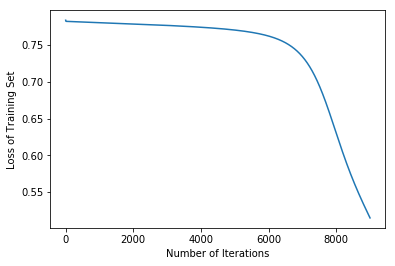

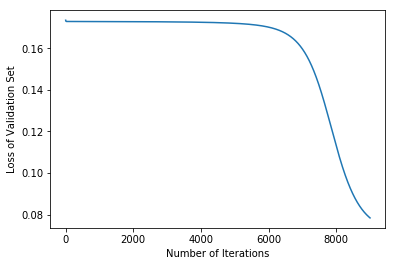

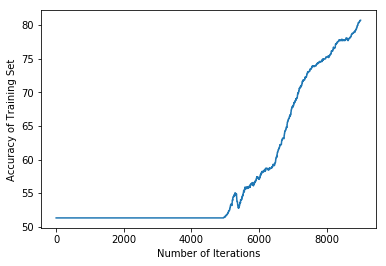

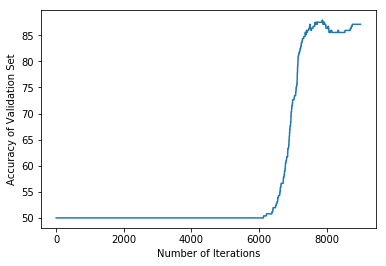

In [19]:
    print("Bias")
    print("lambda = ",lambd)
    plt.plot(l_index,l_train_cost_list)
    #plt.xticks(l_index,rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Training Set")
    plt.show()
    
    plt.plot(l_index,l_val_cost_list)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Validation Set")
    plt.show()
                          
    plt.plot(l_index,l_ac_train)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Training Set")
    plt.show()
                            
    plt.plot(l_index,l_ac_val)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Validation Set")
    plt.show()

In [20]:
print("\t\ttraining\t\tvalidation\t\tbest\t")
print("=================================================================================")
print("loss\t\t"+"{0:.10f}".format(l_train_cost_list[-1])+"\t\t"+"{0:.10f}".format(l_val_cost_list[-1])+"\t\t"+"{0:.10f}".format(highestloss))
print("=================================================================================")
print("accuracy\t"+"{0:.10f}".format(l_ac_train[-1])+"\t\t"+ "{0:.10f}".format(l_ac_val[-1])+"\t\t"+"{0:.10f}".format(highest))

		training		validation		best	
loss		0.5149078958		0.0784549892		0.1215199070
accuracy	80.7205452775		87.1093750000		87.8906250000


In [21]:
l_index = []
l_train_cost_list = []
l_val_cost_list = []
l_ac_train=[]
l_ac_val= []

In [22]:
learning_rate=0.5
lambd = 1e-8 #small
n_h = 200 # hidden layer size
l_index,l_train_cost_list,l_val_cost_list,l_ac_train,l_ac_val = nn_model(x_train, y_train ,n_h, 4000 , x_test,y_test)

#0 Training loss : 0.6956440121	Validation loss : 0.1727839688	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#1 Training loss : 0.6931672968	Validation loss : 0.1728182244	Training Accuracy: 48.6854917235%	Validation Accuracy: 50.0000000000%
#2 Training loss : 0.6928506713	Validation loss : 0.1728484229	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3 Training loss : 0.6928096177	Validation loss : 0.1728614031	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4 Training loss : 0.6928036428	Validation loss : 0.1728662284	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#5 Training loss : 0.6928021382	Validation loss : 0.1728678855	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#6 Training loss : 0.6928012037	Validation loss : 0.1728683782	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#7 Training loss : 0.6928003420	Validation loss : 0.1728684508	Traini

#61 Training loss : 0.6927542049	Validation loss : 0.1728598067	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#62 Training loss : 0.6927533428	Validation loss : 0.1728596426	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#63 Training loss : 0.6927524803	Validation loss : 0.1728594784	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#64 Training loss : 0.6927516173	Validation loss : 0.1728593141	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#65 Training loss : 0.6927507539	Validation loss : 0.1728591497	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#66 Training loss : 0.6927498900	Validation loss : 0.1728589852	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#67 Training loss : 0.6927490256	Validation loss : 0.1728588206	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#68 Training loss : 0.6927481607	Validation loss : 0.172858655

#121 Training loss : 0.6927013909	Validation loss : 0.1728497365	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#122 Training loss : 0.6927004864	Validation loss : 0.1728495637	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#123 Training loss : 0.6926995809	Validation loss : 0.1728493907	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#124 Training loss : 0.6926986744	Validation loss : 0.1728492175	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#125 Training loss : 0.6926977669	Validation loss : 0.1728490441	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#126 Training loss : 0.6926968584	Validation loss : 0.1728488706	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#127 Training loss : 0.6926959489	Validation loss : 0.1728486968	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#128 Training loss : 0.6926950384	Validation loss : 0.1

#181 Training loss : 0.6926450483	Validation loss : 0.1728389508	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#182 Training loss : 0.6926440675	Validation loss : 0.1728387626	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#183 Training loss : 0.6926430852	Validation loss : 0.1728385741	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#184 Training loss : 0.6926421012	Validation loss : 0.1728383853	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#185 Training loss : 0.6926411157	Validation loss : 0.1728381961	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#186 Training loss : 0.6926401285	Validation loss : 0.1728380067	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#187 Training loss : 0.6926391397	Validation loss : 0.1728378169	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#188 Training loss : 0.6926381493	Validation loss : 0.1

#241 Training loss : 0.6925830346	Validation loss : 0.1728270229	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#242 Training loss : 0.6925819396	Validation loss : 0.1728268117	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#243 Training loss : 0.6925808423	Validation loss : 0.1728266001	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#244 Training loss : 0.6925797427	Validation loss : 0.1728263881	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#245 Training loss : 0.6925786409	Validation loss : 0.1728261755	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#246 Training loss : 0.6925775367	Validation loss : 0.1728259626	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#247 Training loss : 0.6925764303	Validation loss : 0.1728257491	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#248 Training loss : 0.6925753215	Validation loss : 0.1

#301 Training loss : 0.6925128930	Validation loss : 0.1728134635	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#302 Training loss : 0.6925116393	Validation loss : 0.1728132206	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#303 Training loss : 0.6925103824	Validation loss : 0.1728129770	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#304 Training loss : 0.6925091225	Validation loss : 0.1728127328	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#305 Training loss : 0.6925078595	Validation loss : 0.1728124879	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#306 Training loss : 0.6925065934	Validation loss : 0.1728122425	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#307 Training loss : 0.6925053241	Validation loss : 0.1728119964	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#308 Training loss : 0.6925040517	Validation loss : 0.1

#361 Training loss : 0.6924316939	Validation loss : 0.1727976888	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#362 Training loss : 0.6924302276	Validation loss : 0.1727974032	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#363 Training loss : 0.6924287571	Validation loss : 0.1727971169	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#364 Training loss : 0.6924272826	Validation loss : 0.1727968297	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#365 Training loss : 0.6924258039	Validation loss : 0.1727965417	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#366 Training loss : 0.6924243211	Validation loss : 0.1727962528	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#367 Training loss : 0.6924228342	Validation loss : 0.1727959632	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#368 Training loss : 0.6924213431	Validation loss : 0.1

#421 Training loss : 0.6923358324	Validation loss : 0.1727789773	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#422 Training loss : 0.6923340862	Validation loss : 0.1727786356	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#423 Training loss : 0.6923323346	Validation loss : 0.1727782930	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#424 Training loss : 0.6923305777	Validation loss : 0.1727779492	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#425 Training loss : 0.6923288154	Validation loss : 0.1727776043	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#426 Training loss : 0.6923270477	Validation loss : 0.1727772584	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#427 Training loss : 0.6923252746	Validation loss : 0.1727769114	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#428 Training loss : 0.6923234960	Validation loss : 0.1

#481 Training loss : 0.6922207590	Validation loss : 0.1727564123	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#482 Training loss : 0.6922186471	Validation loss : 0.1727559972	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#483 Training loss : 0.6922165284	Validation loss : 0.1727555808	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#484 Training loss : 0.6922144026	Validation loss : 0.1727551629	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#485 Training loss : 0.6922122699	Validation loss : 0.1727547436	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#486 Training loss : 0.6922101300	Validation loss : 0.1727543230	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#487 Training loss : 0.6922079831	Validation loss : 0.1727539008	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#488 Training loss : 0.6922058291	Validation loss : 0.1

#541 Training loss : 0.6920806146	Validation loss : 0.1727288012	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#542 Training loss : 0.6920780258	Validation loss : 0.1727282899	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#543 Training loss : 0.6920754280	Validation loss : 0.1727277768	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#544 Training loss : 0.6920728210	Validation loss : 0.1727272618	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#545 Training loss : 0.6920702048	Validation loss : 0.1727267450	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#546 Training loss : 0.6920675795	Validation loss : 0.1727262263	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#547 Training loss : 0.6920649449	Validation loss : 0.1727257057	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#548 Training loss : 0.6920623010	Validation loss : 0.1

#601 Training loss : 0.6919077252	Validation loss : 0.1726945596	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#602 Training loss : 0.6919045125	Validation loss : 0.1726939215	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#603 Training loss : 0.6919012878	Validation loss : 0.1726932809	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#604 Training loss : 0.6918980512	Validation loss : 0.1726926379	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#605 Training loss : 0.6918948026	Validation loss : 0.1726919925	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#606 Training loss : 0.6918915420	Validation loss : 0.1726913445	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#607 Training loss : 0.6918882692	Validation loss : 0.1726906941	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#608 Training loss : 0.6918849842	Validation loss : 0.1

#661 Training loss : 0.6916918862	Validation loss : 0.1726515388	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#662 Training loss : 0.6916878527	Validation loss : 0.1726507319	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#663 Training loss : 0.6916838035	Validation loss : 0.1726499218	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#664 Training loss : 0.6916797385	Validation loss : 0.1726491084	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#665 Training loss : 0.6916756576	Validation loss : 0.1726482917	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#666 Training loss : 0.6916715608	Validation loss : 0.1726474716	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#667 Training loss : 0.6916674480	Validation loss : 0.1726466483	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#668 Training loss : 0.6916633191	Validation loss : 0.1

#721 Training loss : 0.6914193269	Validation loss : 0.1725967588	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#722 Training loss : 0.6914142050	Validation loss : 0.1725957242	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#723 Training loss : 0.6914090622	Validation loss : 0.1725946853	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#724 Training loss : 0.6914038984	Validation loss : 0.1725936419	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#725 Training loss : 0.6913987134	Validation loss : 0.1725925940	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#726 Training loss : 0.6913935072	Validation loss : 0.1725915417	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#727 Training loss : 0.6913882797	Validation loss : 0.1725904848	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#728 Training loss : 0.6913830307	Validation loss : 0.1

#781 Training loss : 0.6910711700	Validation loss : 0.1725259776	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#782 Training loss : 0.6910645900	Validation loss : 0.1725246305	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#783 Training loss : 0.6910579817	Validation loss : 0.1725232773	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#784 Training loss : 0.6910513451	Validation loss : 0.1725219179	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#785 Training loss : 0.6910446801	Validation loss : 0.1725205524	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#786 Training loss : 0.6910379864	Validation loss : 0.1725191805	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#787 Training loss : 0.6910312639	Validation loss : 0.1725178024	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#788 Training loss : 0.6910245124	Validation loss : 0.1

#841 Training loss : 0.6906210752	Validation loss : 0.1724329711	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#842 Training loss : 0.6906125162	Validation loss : 0.1724311848	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#843 Training loss : 0.6906039186	Validation loss : 0.1724293898	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#844 Training loss : 0.6905952823	Validation loss : 0.1724275861	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#845 Training loss : 0.6905866070	Validation loss : 0.1724257735	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#846 Training loss : 0.6905778926	Validation loss : 0.1724239520	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#847 Training loss : 0.6905691387	Validation loss : 0.1724221215	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#848 Training loss : 0.6905603452	Validation loss : 0.1

#901 Training loss : 0.6900315281	Validation loss : 0.1723082768	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#902 Training loss : 0.6900202403	Validation loss : 0.1723058553	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#903 Training loss : 0.6900088989	Validation loss : 0.1723034211	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#904 Training loss : 0.6899975036	Validation loss : 0.1723009739	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#905 Training loss : 0.6899860540	Validation loss : 0.1722985137	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#906 Training loss : 0.6899745499	Validation loss : 0.1722960404	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#907 Training loss : 0.6899629910	Validation loss : 0.1722935540	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#908 Training loss : 0.6899513768	Validation loss : 0.1

#961 Training loss : 0.6892478288	Validation loss : 0.1721369302	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#962 Training loss : 0.6892327057	Validation loss : 0.1721335575	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#963 Training loss : 0.6892175064	Validation loss : 0.1721301653	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#964 Training loss : 0.6892022305	Validation loss : 0.1721267533	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#965 Training loss : 0.6891868775	Validation loss : 0.1721233215	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#966 Training loss : 0.6891714470	Validation loss : 0.1721198697	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#967 Training loss : 0.6891559384	Validation loss : 0.1721163977	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#968 Training loss : 0.6891403514	Validation loss : 0.1

#1021 Training loss : 0.6881880638	Validation loss : 0.1718942592	Training Accuracy: 51.6066212269%	Validation Accuracy: 50.0000000000%
#1022 Training loss : 0.6881674252	Validation loss : 0.1718894040	Training Accuracy: 51.7039922103%	Validation Accuracy: 50.0000000000%
#1023 Training loss : 0.6881466758	Validation loss : 0.1718845176	Training Accuracy: 51.7039922103%	Validation Accuracy: 50.0000000000%
#1024 Training loss : 0.6881258148	Validation loss : 0.1718795999	Training Accuracy: 51.8013631938%	Validation Accuracy: 50.0000000000%
#1025 Training loss : 0.6881048415	Validation loss : 0.1718746505	Training Accuracy: 51.8987341772%	Validation Accuracy: 50.0000000000%
#1026 Training loss : 0.6880837552	Validation loss : 0.1718696692	Training Accuracy: 51.8987341772%	Validation Accuracy: 50.0000000000%
#1027 Training loss : 0.6880625551	Validation loss : 0.1718646559	Training Accuracy: 51.8987341772%	Validation Accuracy: 50.0000000000%
#1028 Training loss : 0.6880412405	Validation lo

#1081 Training loss : 0.6867257899	Validation loss : 0.1715378705	Training Accuracy: 54.3330087634%	Validation Accuracy: 50.0000000000%
#1082 Training loss : 0.6866970022	Validation loss : 0.1715306027	Training Accuracy: 53.9435248296%	Validation Accuracy: 50.0000000000%
#1083 Training loss : 0.6866680482	Validation loss : 0.1715232833	Training Accuracy: 54.0408958130%	Validation Accuracy: 50.0000000000%
#1084 Training loss : 0.6866389270	Validation loss : 0.1715159117	Training Accuracy: 53.9435248296%	Validation Accuracy: 50.0000000000%
#1085 Training loss : 0.6866096373	Validation loss : 0.1715084875	Training Accuracy: 53.8461538462%	Validation Accuracy: 50.0000000000%
#1086 Training loss : 0.6865801779	Validation loss : 0.1715010103	Training Accuracy: 53.8461538462%	Validation Accuracy: 50.0000000000%
#1087 Training loss : 0.6865505476	Validation loss : 0.1714934796	Training Accuracy: 53.9435248296%	Validation Accuracy: 50.0000000000%
#1088 Training loss : 0.6865207452	Validation lo

#1141 Training loss : 0.6846590551	Validation loss : 0.1709920927	Training Accuracy: 55.9883154820%	Validation Accuracy: 50.0000000000%
#1142 Training loss : 0.6846178396	Validation loss : 0.1709807260	Training Accuracy: 55.8909444985%	Validation Accuracy: 50.0000000000%
#1143 Training loss : 0.6845763667	Validation loss : 0.1709692698	Training Accuracy: 55.9883154820%	Validation Accuracy: 50.0000000000%
#1144 Training loss : 0.6845346342	Validation loss : 0.1709577233	Training Accuracy: 55.8909444985%	Validation Accuracy: 50.0000000000%
#1145 Training loss : 0.6844926403	Validation loss : 0.1709460855	Training Accuracy: 55.8909444985%	Validation Accuracy: 50.0000000000%
#1146 Training loss : 0.6844503829	Validation loss : 0.1709343557	Training Accuracy: 55.8909444985%	Validation Accuracy: 50.0000000000%
#1147 Training loss : 0.6844078600	Validation loss : 0.1709225329	Training Accuracy: 55.8909444985%	Validation Accuracy: 50.0000000000%
#1148 Training loss : 0.6843650695	Validation lo

#1201 Training loss : 0.6816532940	Validation loss : 0.1701174993	Training Accuracy: 57.3515092502%	Validation Accuracy: 50.0000000000%
#1202 Training loss : 0.6815924416	Validation loss : 0.1700988890	Training Accuracy: 57.2541382668%	Validation Accuracy: 50.0000000000%
#1203 Training loss : 0.6815311751	Validation loss : 0.1700801180	Training Accuracy: 57.4488802337%	Validation Accuracy: 50.0000000000%
#1204 Training loss : 0.6814694913	Validation loss : 0.1700611847	Training Accuracy: 57.7409931840%	Validation Accuracy: 50.0000000000%
#1205 Training loss : 0.6814073866	Validation loss : 0.1700420875	Training Accuracy: 57.8383641675%	Validation Accuracy: 50.0000000000%
#1206 Training loss : 0.6813448575	Validation loss : 0.1700228247	Training Accuracy: 57.9357351509%	Validation Accuracy: 50.0000000000%
#1207 Training loss : 0.6812819006	Validation loss : 0.1700033946	Training Accuracy: 58.0331061344%	Validation Accuracy: 50.0000000000%
#1208 Training loss : 0.6812185122	Validation lo

#1261 Training loss : 0.6771347476	Validation loss : 0.1686515505	Training Accuracy: 58.8120740019%	Validation Accuracy: 50.3906250000%
#1262 Training loss : 0.6770417265	Validation loss : 0.1686197415	Training Accuracy: 58.8120740019%	Validation Accuracy: 50.3906250000%
#1263 Training loss : 0.6769480166	Validation loss : 0.1685876367	Training Accuracy: 58.7147030185%	Validation Accuracy: 50.3906250000%
#1264 Training loss : 0.6768536120	Validation loss : 0.1685552332	Training Accuracy: 58.7147030185%	Validation Accuracy: 50.3906250000%
#1265 Training loss : 0.6767585065	Validation loss : 0.1685225279	Training Accuracy: 58.7147030185%	Validation Accuracy: 50.3906250000%
#1266 Training loss : 0.6766626940	Validation loss : 0.1684895175	Training Accuracy: 58.7147030185%	Validation Accuracy: 50.3906250000%
#1267 Training loss : 0.6765661683	Validation loss : 0.1684561991	Training Accuracy: 58.7147030185%	Validation Accuracy: 50.3906250000%
#1268 Training loss : 0.6764689231	Validation lo

#1321 Training loss : 0.6700976281	Validation loss : 0.1660981896	Training Accuracy: 61.4410905550%	Validation Accuracy: 54.2968750000%
#1322 Training loss : 0.6699504223	Validation loss : 0.1660420161	Training Accuracy: 61.4410905550%	Validation Accuracy: 54.2968750000%
#1323 Training loss : 0.6698020484	Validation loss : 0.1659852983	Training Accuracy: 61.4410905550%	Validation Accuracy: 54.6875000000%
#1324 Training loss : 0.6696524961	Validation loss : 0.1659280306	Training Accuracy: 61.5384615385%	Validation Accuracy: 54.6875000000%
#1325 Training loss : 0.6695017551	Validation loss : 0.1658702077	Training Accuracy: 61.6358325219%	Validation Accuracy: 54.6875000000%
#1326 Training loss : 0.6693498149	Validation loss : 0.1658118240	Training Accuracy: 61.7332035054%	Validation Accuracy: 54.6875000000%
#1327 Training loss : 0.6691966649	Validation loss : 0.1657528739	Training Accuracy: 61.8305744888%	Validation Accuracy: 55.0781250000%
#1328 Training loss : 0.6690422945	Validation lo

#1381 Training loss : 0.6588036857	Validation loss : 0.1615556967	Training Accuracy: 66.3096397274%	Validation Accuracy: 64.0625000000%
#1382 Training loss : 0.6585652535	Validation loss : 0.1614556691	Training Accuracy: 66.3096397274%	Validation Accuracy: 64.8437500000%
#1383 Training loss : 0.6583248867	Validation loss : 0.1613546914	Training Accuracy: 66.4070107108%	Validation Accuracy: 64.8437500000%
#1384 Training loss : 0.6580825703	Validation loss : 0.1612527558	Training Accuracy: 66.6991236611%	Validation Accuracy: 64.8437500000%
#1385 Training loss : 0.6578382891	Validation loss : 0.1611498543	Training Accuracy: 66.7964946446%	Validation Accuracy: 65.2343750000%
#1386 Training loss : 0.6575920280	Validation loss : 0.1610459790	Training Accuracy: 66.9912366115%	Validation Accuracy: 65.2343750000%
#1387 Training loss : 0.6573437718	Validation loss : 0.1609411218	Training Accuracy: 67.1859785784%	Validation Accuracy: 65.6250000000%
#1388 Training loss : 0.6570935051	Validation lo

#1441 Training loss : 0.6405457631	Validation loss : 0.1535985438	Training Accuracy: 70.6913339825%	Validation Accuracy: 79.6875000000%
#1442 Training loss : 0.6401640767	Validation loss : 0.1534275092	Training Accuracy: 70.8860759494%	Validation Accuracy: 80.0781250000%
#1443 Training loss : 0.6397795584	Validation loss : 0.1532550706	Training Accuracy: 71.0808179163%	Validation Accuracy: 80.0781250000%
#1444 Training loss : 0.6393921959	Validation loss : 0.1530812224	Training Accuracy: 71.0808179163%	Validation Accuracy: 80.4687500000%
#1445 Training loss : 0.6390019773	Validation loss : 0.1529059593	Training Accuracy: 71.1781888997%	Validation Accuracy: 81.2500000000%
#1446 Training loss : 0.6386088907	Validation loss : 0.1527292759	Training Accuracy: 71.2755598832%	Validation Accuracy: 81.2500000000%
#1447 Training loss : 0.6382129244	Validation loss : 0.1525511670	Training Accuracy: 71.3729308666%	Validation Accuracy: 81.6406250000%
#1448 Training loss : 0.6378140672	Validation lo

#1501 Training loss : 0.6123552526	Validation loss : 0.1407499423	Training Accuracy: 73.3203505355%	Validation Accuracy: 86.7187500000%
#1502 Training loss : 0.6117927635	Validation loss : 0.1404915545	Training Accuracy: 73.5150925024%	Validation Accuracy: 86.7187500000%
#1503 Training loss : 0.6112273343	Validation loss : 0.1402318182	Training Accuracy: 73.6124634859%	Validation Accuracy: 86.7187500000%
#1504 Training loss : 0.6106589785	Validation loss : 0.1399707436	Training Accuracy: 73.8072054528%	Validation Accuracy: 86.7187500000%
#1505 Training loss : 0.6100877101	Validation loss : 0.1397083414	Training Accuracy: 73.9045764362%	Validation Accuracy: 86.7187500000%
#1506 Training loss : 0.6095135438	Validation loss : 0.1394446224	Training Accuracy: 74.0019474197%	Validation Accuracy: 86.7187500000%
#1507 Training loss : 0.6089364950	Validation loss : 0.1391795981	Training Accuracy: 74.0019474197%	Validation Accuracy: 86.7187500000%
#1508 Training loss : 0.6083565795	Validation lo

#1561 Training loss : 0.5741604941	Validation loss : 0.1233858386	Training Accuracy: 74.1966893866%	Validation Accuracy: 87.5000000000%
#1562 Training loss : 0.5734659273	Validation loss : 0.1230766803	Training Accuracy: 74.3914313535%	Validation Accuracy: 87.5000000000%
#1563 Training loss : 0.5727702392	Validation loss : 0.1227673737	Training Accuracy: 74.4888023369%	Validation Accuracy: 87.5000000000%
#1564 Training loss : 0.5720734728	Validation loss : 0.1224579457	Training Accuracy: 74.5861733204%	Validation Accuracy: 87.5000000000%
#1565 Training loss : 0.5713756713	Validation loss : 0.1221484231	Training Accuracy: 74.5861733204%	Validation Accuracy: 87.5000000000%
#1566 Training loss : 0.5706768779	Validation loss : 0.1218388328	Training Accuracy: 74.5861733204%	Validation Accuracy: 87.5000000000%
#1567 Training loss : 0.5699771359	Validation loss : 0.1215292018	Training Accuracy: 74.5861733204%	Validation Accuracy: 87.5000000000%
#1568 Training loss : 0.5692764890	Validation lo

#1621 Training loss : 0.5319539446	Validation loss : 0.1054571315	Training Accuracy: 76.1441090555%	Validation Accuracy: 87.5000000000%
#1622 Training loss : 0.5312652269	Validation loss : 0.1051831406	Training Accuracy: 76.1441090555%	Validation Accuracy: 87.8906250000%
#1623 Training loss : 0.5305776808	Validation loss : 0.1049103557	Training Accuracy: 76.2414800389%	Validation Accuracy: 87.8906250000%
#1624 Training loss : 0.5298913316	Validation loss : 0.1046387905	Training Accuracy: 76.2414800389%	Validation Accuracy: 87.8906250000%
#1625 Training loss : 0.5292062038	Validation loss : 0.1043684582	Training Accuracy: 76.2414800389%	Validation Accuracy: 87.8906250000%
#1626 Training loss : 0.5285223215	Validation loss : 0.1040993715	Training Accuracy: 76.2414800389%	Validation Accuracy: 87.8906250000%
#1627 Training loss : 0.5278397080	Validation loss : 0.1038315429	Training Accuracy: 76.2414800389%	Validation Accuracy: 87.8906250000%
#1628 Training loss : 0.5271583860	Validation lo

#1681 Training loss : 0.4932701610	Validation loss : 0.0914390471	Training Accuracy: 77.4099318403%	Validation Accuracy: 86.3281250000%
#1682 Training loss : 0.4926757783	Validation loss : 0.0912492746	Training Accuracy: 77.4099318403%	Validation Accuracy: 86.3281250000%
#1683 Training loss : 0.4920830471	Validation loss : 0.0910609243	Training Accuracy: 77.4099318403%	Validation Accuracy: 86.3281250000%
#1684 Training loss : 0.4914919604	Validation loss : 0.0908739918	Training Accuracy: 77.4099318403%	Validation Accuracy: 86.3281250000%
#1685 Training loss : 0.4909025113	Validation loss : 0.0906884726	Training Accuracy: 77.4099318403%	Validation Accuracy: 86.3281250000%
#1686 Training loss : 0.4903146920	Validation loss : 0.0905043624	Training Accuracy: 77.4099318403%	Validation Accuracy: 86.3281250000%
#1687 Training loss : 0.4897284947	Validation loss : 0.0903216562	Training Accuracy: 77.4099318403%	Validation Accuracy: 85.9375000000%
#1688 Training loss : 0.4891439114	Validation lo

#1741 Training loss : 0.4601777999	Validation loss : 0.0823725823	Training Accuracy: 78.3836416748%	Validation Accuracy: 85.9375000000%
#1742 Training loss : 0.4596629254	Validation loss : 0.0822573876	Training Accuracy: 78.3836416748%	Validation Accuracy: 85.9375000000%
#1743 Training loss : 0.4591489741	Validation loss : 0.0821432258	Training Accuracy: 78.3836416748%	Validation Accuracy: 85.9375000000%
#1744 Training loss : 0.4586359328	Validation loss : 0.0820300899	Training Accuracy: 78.3836416748%	Validation Accuracy: 85.9375000000%
#1745 Training loss : 0.4581237883	Validation loss : 0.0819179732	Training Accuracy: 78.4810126582%	Validation Accuracy: 85.9375000000%
#1746 Training loss : 0.4576125274	Validation loss : 0.0818068688	Training Accuracy: 78.4810126582%	Validation Accuracy: 85.9375000000%
#1747 Training loss : 0.4571021370	Validation loss : 0.0816967701	Training Accuracy: 78.4810126582%	Validation Accuracy: 85.9375000000%
#1748 Training loss : 0.4565926041	Validation lo

#1801 Training loss : 0.4305147510	Validation loss : 0.0770750889	Training Accuracy: 79.9415774099%	Validation Accuracy: 87.1093750000%
#1802 Training loss : 0.4300354540	Validation loss : 0.0770112316	Training Accuracy: 79.9415774099%	Validation Accuracy: 87.1093750000%
#1803 Training loss : 0.4295564877	Validation loss : 0.0769480768	Training Accuracy: 79.9415774099%	Validation Accuracy: 87.1093750000%
#1804 Training loss : 0.4290778464	Validation loss : 0.0768856206	Training Accuracy: 80.0389483934%	Validation Accuracy: 87.1093750000%
#1805 Training loss : 0.4285995245	Validation loss : 0.0768238590	Training Accuracy: 80.0389483934%	Validation Accuracy: 87.1093750000%
#1806 Training loss : 0.4281215165	Validation loss : 0.0767627881	Training Accuracy: 80.1363193768%	Validation Accuracy: 87.1093750000%
#1807 Training loss : 0.4276438171	Validation loss : 0.0767024041	Training Accuracy: 80.1363193768%	Validation Accuracy: 87.1093750000%
#1808 Training loss : 0.4271664209	Validation lo

#1861 Training loss : 0.4022051442	Validation loss : 0.0743721710	Training Accuracy: 81.4021421616%	Validation Accuracy: 87.5000000000%
#1862 Training loss : 0.4017395801	Validation loss : 0.0743448699	Training Accuracy: 81.4021421616%	Validation Accuracy: 87.5000000000%
#1863 Training loss : 0.4012742019	Validation loss : 0.0743181038	Training Accuracy: 81.5968841285%	Validation Accuracy: 87.5000000000%
#1864 Training loss : 0.4008090099	Validation loss : 0.0742918710	Training Accuracy: 81.5968841285%	Validation Accuracy: 87.5000000000%
#1865 Training loss : 0.4003440044	Validation loss : 0.0742661697	Training Accuracy: 81.5968841285%	Validation Accuracy: 87.5000000000%
#1866 Training loss : 0.3998791860	Validation loss : 0.0742409981	Training Accuracy: 81.5968841285%	Validation Accuracy: 87.5000000000%
#1867 Training loss : 0.3994145551	Validation loss : 0.0742163544	Training Accuracy: 81.5968841285%	Validation Accuracy: 87.8906250000%
#1868 Training loss : 0.3989501123	Validation lo

#1921 Training loss : 0.3746368091	Validation loss : 0.0736290585	Training Accuracy: 82.9600778968%	Validation Accuracy: 87.8906250000%
#1922 Training loss : 0.3741846479	Validation loss : 0.0736313133	Training Accuracy: 82.9600778968%	Validation Accuracy: 87.8906250000%
#1923 Training loss : 0.3737327697	Validation loss : 0.0736340257	Training Accuracy: 83.0574488802%	Validation Accuracy: 87.8906250000%
#1924 Training loss : 0.3732811768	Validation loss : 0.0736371946	Training Accuracy: 83.0574488802%	Validation Accuracy: 87.8906250000%
#1925 Training loss : 0.3728298716	Validation loss : 0.0736408193	Training Accuracy: 83.0574488802%	Validation Accuracy: 87.8906250000%
#1926 Training loss : 0.3723788564	Validation loss : 0.0736448987	Training Accuracy: 83.0574488802%	Validation Accuracy: 87.8906250000%
#1927 Training loss : 0.3719281335	Validation loss : 0.0736494319	Training Accuracy: 83.0574488802%	Validation Accuracy: 87.8906250000%
#1928 Training loss : 0.3714777055	Validation lo

#1981 Training loss : 0.3480875651	Validation loss : 0.0745440459	Training Accuracy: 84.1285296981%	Validation Accuracy: 87.1093750000%
#1982 Training loss : 0.3476564131	Validation loss : 0.0745722100	Training Accuracy: 84.2259006816%	Validation Accuracy: 87.1093750000%
#1983 Training loss : 0.3472256728	Validation loss : 0.0746007796	Training Accuracy: 84.2259006816%	Validation Accuracy: 87.1093750000%
#1984 Training loss : 0.3467953460	Validation loss : 0.0746297543	Training Accuracy: 84.2259006816%	Validation Accuracy: 87.1093750000%
#1985 Training loss : 0.3463654340	Validation loss : 0.0746591327	Training Accuracy: 84.3232716650%	Validation Accuracy: 87.1093750000%
#1986 Training loss : 0.3459359385	Validation loss : 0.0746889144	Training Accuracy: 84.3232716650%	Validation Accuracy: 87.1093750000%
#1987 Training loss : 0.3455068611	Validation loss : 0.0747190979	Training Accuracy: 84.2259006816%	Validation Accuracy: 87.1093750000%
#1988 Training loss : 0.3450782031	Validation lo

#2041 Training loss : 0.5550678407	Validation loss : 0.1857658782	Training Accuracy: 69.9123661149%	Validation Accuracy: 67.5781250000%
#2042 Training loss : 0.6401107026	Validation loss : 0.1422101545	Training Accuracy: 69.4255111977%	Validation Accuracy: 72.6562500000%
#2043 Training loss : 0.5169696656	Validation loss : 0.1587598167	Training Accuracy: 73.2229795521%	Validation Accuracy: 73.8281250000%
#2044 Training loss : 0.5712161175	Validation loss : 0.1293192450	Training Accuracy: 72.8334956183%	Validation Accuracy: 75.0000000000%
#2045 Training loss : 0.4853740492	Validation loss : 0.1392775017	Training Accuracy: 75.4625121714%	Validation Accuracy: 76.5625000000%
#2046 Training loss : 0.5221199256	Validation loss : 0.1203638093	Training Accuracy: 74.2940603700%	Validation Accuracy: 75.3906250000%
#2047 Training loss : 0.4610876376	Validation loss : 0.1258081096	Training Accuracy: 77.2151898734%	Validation Accuracy: 78.9062500000%
#2048 Training loss : 0.4885041550	Validation lo

#2101 Training loss : 0.4037668651	Validation loss : 0.0985350731	Training Accuracy: 80.2336903603%	Validation Accuracy: 83.9843750000%
#2102 Training loss : 0.4259423784	Validation loss : 0.1204430011	Training Accuracy: 79.6494644596%	Validation Accuracy: 76.1718750000%
#2103 Training loss : 0.4025681545	Validation loss : 0.0980651277	Training Accuracy: 80.3310613437%	Validation Accuracy: 83.9843750000%
#2104 Training loss : 0.4243691806	Validation loss : 0.1203339560	Training Accuracy: 79.7468354430%	Validation Accuracy: 76.5625000000%
#2105 Training loss : 0.4012929276	Validation loss : 0.0975806277	Training Accuracy: 80.3310613437%	Validation Accuracy: 83.9843750000%
#2106 Training loss : 0.4227296078	Validation loss : 0.1202236093	Training Accuracy: 79.9415774099%	Validation Accuracy: 76.5625000000%
#2107 Training loss : 0.4000082543	Validation loss : 0.0971113293	Training Accuracy: 80.4284323272%	Validation Accuracy: 83.9843750000%
#2108 Training loss : 0.4211181479	Validation lo

#2161 Training loss : 0.3805409005	Validation loss : 0.0928497618	Training Accuracy: 81.3047711782%	Validation Accuracy: 85.1562500000%
#2162 Training loss : 0.3992914974	Validation loss : 0.1225056808	Training Accuracy: 81.9863680623%	Validation Accuracy: 76.1718750000%
#2163 Training loss : 0.3799864132	Validation loss : 0.0927885952	Training Accuracy: 81.4021421616%	Validation Accuracy: 85.1562500000%
#2164 Training loss : 0.3986914636	Validation loss : 0.1225997638	Training Accuracy: 81.9863680623%	Validation Accuracy: 76.1718750000%
#2165 Training loss : 0.3794282079	Validation loss : 0.0927265928	Training Accuracy: 81.4995131451%	Validation Accuracy: 85.1562500000%
#2166 Training loss : 0.3980842955	Validation loss : 0.1226885831	Training Accuracy: 81.9863680623%	Validation Accuracy: 76.1718750000%
#2167 Training loss : 0.3788651169	Validation loss : 0.0926634579	Training Accuracy: 81.5968841285%	Validation Accuracy: 85.1562500000%
#2168 Training loss : 0.3974693158	Validation lo

#2221 Training loss : 0.3648428846	Validation loss : 0.0916981308	Training Accuracy: 82.0837390458%	Validation Accuracy: 85.5468750000%
#2222 Training loss : 0.3825165923	Validation loss : 0.1252367300	Training Accuracy: 83.1548198637%	Validation Accuracy: 76.1718750000%
#2223 Training loss : 0.3643668168	Validation loss : 0.0916842792	Training Accuracy: 82.0837390458%	Validation Accuracy: 85.5468750000%
#2224 Training loss : 0.3820189332	Validation loss : 0.1253352174	Training Accuracy: 83.1548198637%	Validation Accuracy: 76.1718750000%
#2225 Training loss : 0.3638942666	Validation loss : 0.0916719234	Training Accuracy: 82.0837390458%	Validation Accuracy: 85.5468750000%
#2226 Training loss : 0.3815257515	Validation loss : 0.1254345183	Training Accuracy: 83.1548198637%	Validation Accuracy: 76.1718750000%
#2227 Training loss : 0.3634249339	Validation loss : 0.0916609115	Training Accuracy: 82.0837390458%	Validation Accuracy: 85.5468750000%
#2228 Training loss : 0.3810365512	Validation lo

#2281 Training loss : 0.3513480846	Validation loss : 0.0916089276	Training Accuracy: 82.7653359299%	Validation Accuracy: 86.3281250000%
#2282 Training loss : 0.3685287686	Validation loss : 0.1282748383	Training Accuracy: 83.9337877313%	Validation Accuracy: 76.1718750000%
#2283 Training loss : 0.3509191860	Validation loss : 0.0916140526	Training Accuracy: 82.7653359299%	Validation Accuracy: 86.3281250000%
#2284 Training loss : 0.3680874654	Validation loss : 0.1283783577	Training Accuracy: 83.9337877313%	Validation Accuracy: 76.1718750000%
#2285 Training loss : 0.3504912338	Validation loss : 0.0916195137	Training Accuracy: 82.7653359299%	Validation Accuracy: 86.3281250000%
#2286 Training loss : 0.3676472919	Validation loss : 0.1284819756	Training Accuracy: 84.0311587147%	Validation Accuracy: 76.1718750000%
#2287 Training loss : 0.3500642781	Validation loss : 0.0916253292	Training Accuracy: 82.7653359299%	Validation Accuracy: 86.3281250000%
#2288 Training loss : 0.3672083270	Validation lo

#2341 Training loss : 0.3389114660	Validation loss : 0.0919043084	Training Accuracy: 83.3495618306%	Validation Accuracy: 87.1093750000%
#2342 Training loss : 0.3558021748	Validation loss : 0.1314346140	Training Accuracy: 85.1022395326%	Validation Accuracy: 76.1718750000%
#2343 Training loss : 0.3385100891	Validation loss : 0.0919181067	Training Accuracy: 83.3495618306%	Validation Accuracy: 87.1093750000%
#2344 Training loss : 0.3553933451	Validation loss : 0.1315412081	Training Accuracy: 85.1996105161%	Validation Accuracy: 76.1718750000%
#2345 Training loss : 0.3381094446	Validation loss : 0.0919321003	Training Accuracy: 83.3495618306%	Validation Accuracy: 87.1093750000%
#2346 Training loss : 0.3549853480	Validation loss : 0.1316478409	Training Accuracy: 85.1996105161%	Validation Accuracy: 76.1718750000%
#2347 Training loss : 0.3377095042	Validation loss : 0.0919462779	Training Accuracy: 83.3495618306%	Validation Accuracy: 87.1093750000%
#2348 Training loss : 0.3545781455	Validation lo

#2401 Training loss : 0.3271378942	Validation loss : 0.0923833060	Training Accuracy: 84.0311587147%	Validation Accuracy: 87.8906250000%
#2402 Training loss : 0.3438383836	Validation loss : 0.1346375765	Training Accuracy: 85.4917234664%	Validation Accuracy: 76.1718750000%
#2403 Training loss : 0.3267537545	Validation loss : 0.0924010914	Training Accuracy: 84.0311587147%	Validation Accuracy: 87.8906250000%
#2404 Training loss : 0.3434488305	Validation loss : 0.1347442082	Training Accuracy: 85.5890944499%	Validation Accuracy: 76.1718750000%
#2405 Training loss : 0.3263700758	Validation loss : 0.0924189657	Training Accuracy: 84.0311587147%	Validation Accuracy: 87.8906250000%
#2406 Training loss : 0.3430597848	Validation loss : 0.1348508133	Training Accuracy: 85.5890944499%	Validation Accuracy: 76.1718750000%
#2407 Training loss : 0.3259868569	Validation loss : 0.0924369285	Training Accuracy: 84.0311587147%	Validation Accuracy: 87.8906250000%
#2408 Training loss : 0.3426712458	Validation lo

#2461 Training loss : 0.3157926161	Validation loss : 0.0929478196	Training Accuracy: 84.4206426485%	Validation Accuracy: 87.5000000000%
#2462 Training loss : 0.3323454841	Validation loss : 0.1378161406	Training Accuracy: 86.4654333009%	Validation Accuracy: 76.1718750000%
#2463 Training loss : 0.3154200002	Validation loss : 0.0929674809	Training Accuracy: 84.4206426485%	Validation Accuracy: 87.5000000000%
#2464 Training loss : 0.3319683165	Validation loss : 0.1379210777	Training Accuracy: 86.5628042843%	Validation Accuracy: 76.1718750000%
#2465 Training loss : 0.3150476934	Validation loss : 0.0929871823	Training Accuracy: 84.4206426485%	Validation Accuracy: 87.5000000000%
#2466 Training loss : 0.3315914724	Validation loss : 0.1380259303	Training Accuracy: 86.5628042843%	Validation Accuracy: 76.1718750000%
#2467 Training loss : 0.3146756903	Validation loss : 0.0930069225	Training Accuracy: 84.4206426485%	Validation Accuracy: 87.5000000000%
#2468 Training loss : 0.3312149454	Validation lo

#2521 Training loss : 0.3047358913	Validation loss : 0.0935529165	Training Accuracy: 85.0048685492%	Validation Accuracy: 87.5000000000%
#2522 Training loss : 0.3211579629	Validation loss : 0.1409241132	Training Accuracy: 87.1470301850%	Validation Accuracy: 75.7812500000%
#2523 Training loss : 0.3043712700	Validation loss : 0.0935735797	Training Accuracy: 85.0048685492%	Validation Accuracy: 87.5000000000%
#2524 Training loss : 0.3207891703	Validation loss : 0.1410261648	Training Accuracy: 87.1470301850%	Validation Accuracy: 75.7812500000%
#2525 Training loss : 0.3040068807	Validation loss : 0.0935942739	Training Accuracy: 85.0048685492%	Validation Accuracy: 87.5000000000%
#2526 Training loss : 0.3204206227	Validation loss : 0.1411281119	Training Accuracy: 87.1470301850%	Validation Accuracy: 75.7812500000%
#2527 Training loss : 0.3036427224	Validation loss : 0.0936149993	Training Accuracy: 85.1996105161%	Validation Accuracy: 87.5000000000%
#2528 Training loss : 0.3200523188	Validation lo

#2581 Training loss : 0.2938907328	Validation loss : 0.0941862142	Training Accuracy: 85.8812074002%	Validation Accuracy: 87.5000000000%
#2582 Training loss : 0.3101926910	Validation loss : 0.1439384860	Training Accuracy: 87.5365141188%	Validation Accuracy: 75.3906250000%
#2583 Training loss : 0.2935322912	Validation loss : 0.0942078032	Training Accuracy: 85.8812074002%	Validation Accuracy: 87.5000000000%
#2584 Training loss : 0.3098304065	Validation loss : 0.1440372485	Training Accuracy: 87.5365141188%	Validation Accuracy: 75.3906250000%
#2585 Training loss : 0.2931740280	Validation loss : 0.0942294224	Training Accuracy: 85.8812074002%	Validation Accuracy: 87.5000000000%
#2586 Training loss : 0.3094683081	Validation loss : 0.1441358977	Training Accuracy: 87.5365141188%	Validation Accuracy: 75.3906250000%
#2587 Training loss : 0.2928159410	Validation loss : 0.0942510717	Training Accuracy: 85.8812074002%	Validation Accuracy: 87.5000000000%
#2588 Training loss : 0.3091063934	Validation lo

#2641 Training loss : 0.2832081213	Validation loss : 0.0948466014	Training Accuracy: 86.0759493671%	Validation Accuracy: 87.5000000000%
#2642 Training loss : 0.2993969764	Validation loss : 0.1468518497	Training Accuracy: 87.8286270691%	Validation Accuracy: 75.3906250000%
#2643 Training loss : 0.2828542704	Validation loss : 0.0948690387	Training Accuracy: 86.0759493671%	Validation Accuracy: 87.5000000000%
#2644 Training loss : 0.2990393708	Validation loss : 0.1469471739	Training Accuracy: 87.8286270691%	Validation Accuracy: 75.3906250000%
#2645 Training loss : 0.2825005452	Validation loss : 0.0948915012	Training Accuracy: 86.0759493671%	Validation Accuracy: 87.5000000000%
#2646 Training loss : 0.2986818876	Validation loss : 0.1470423813	Training Accuracy: 87.8286270691%	Validation Accuracy: 75.3906250000%
#2647 Training loss : 0.2821469440	Validation loss : 0.0949139889	Training Accuracy: 86.0759493671%	Validation Accuracy: 87.5000000000%
#2648 Training loss : 0.2983245244	Validation lo

#2701 Training loss : 0.2726400744	Validation loss : 0.0955298125	Training Accuracy: 87.0496592016%	Validation Accuracy: 87.5000000000%
#2702 Training loss : 0.2887128086	Validation loss : 0.1496594345	Training Accuracy: 88.0233690360%	Validation Accuracy: 75.3906250000%
#2703 Training loss : 0.2722892563	Validation loss : 0.0955529231	Training Accuracy: 87.0496592016%	Validation Accuracy: 87.5000000000%
#2704 Training loss : 0.2883579315	Validation loss : 0.1497511181	Training Accuracy: 88.0233690360%	Validation Accuracy: 75.3906250000%
#2705 Training loss : 0.2719385166	Validation loss : 0.0955760544	Training Accuracy: 87.0496592016%	Validation Accuracy: 87.5000000000%
#2706 Training loss : 0.2880031165	Validation loss : 0.1498426753	Training Accuracy: 88.0233690360%	Validation Accuracy: 75.3906250000%
#2707 Training loss : 0.2715878539	Validation loss : 0.0955992065	Training Accuracy: 87.0496592016%	Validation Accuracy: 87.5000000000%
#2708 Training loss : 0.2876483620	Validation lo

#2761 Training loss : 0.2621464080	Validation loss : 0.0962327847	Training Accuracy: 87.5365141188%	Validation Accuracy: 87.5000000000%
#2762 Training loss : 0.2780897086	Validation loss : 0.1523542119	Training Accuracy: 88.2181110029%	Validation Accuracy: 75.3906250000%
#2763 Training loss : 0.2617976301	Validation loss : 0.0962565978	Training Accuracy: 87.5365141188%	Validation Accuracy: 87.5000000000%
#2764 Training loss : 0.2777363285	Validation loss : 0.1524420217	Training Accuracy: 88.2181110029%	Validation Accuracy: 75.3906250000%
#2765 Training loss : 0.2614489152	Validation loss : 0.0962804395	Training Accuracy: 87.5365141188%	Validation Accuracy: 87.5000000000%
#2766 Training loss : 0.2773829930	Validation loss : 0.1525297003	Training Accuracy: 88.2181110029%	Validation Accuracy: 75.3906250000%
#2767 Training loss : 0.2611002634	Validation loss : 0.0963043101	Training Accuracy: 87.5365141188%	Validation Accuracy: 87.5000000000%
#2768 Training loss : 0.2770297021	Validation lo

#2821 Training loss : 0.2517107815	Validation loss : 0.0969615059	Training Accuracy: 88.3154819864%	Validation Accuracy: 87.5000000000%
#2822 Training loss : 0.2675081605	Validation loss : 0.1549309654	Training Accuracy: 89.0944498539%	Validation Accuracy: 75.3906250000%
#2823 Training loss : 0.2513639575	Validation loss : 0.0969863908	Training Accuracy: 88.4128529698%	Validation Accuracy: 87.8906250000%
#2824 Training loss : 0.2671562025	Validation loss : 0.1550147991	Training Accuracy: 89.0944498539%	Validation Accuracy: 75.3906250000%
#2825 Training loss : 0.2510172026	Validation loss : 0.0970113197	Training Accuracy: 88.5102239533%	Validation Accuracy: 87.8906250000%
#2826 Training loss : 0.2668042960	Validation loss : 0.1550984989	Training Accuracy: 89.0944498539%	Validation Accuracy: 75.3906250000%
#2827 Training loss : 0.2506705171	Validation loss : 0.0970362931	Training Accuracy: 88.5102239533%	Validation Accuracy: 87.8906250000%
#2828 Training loss : 0.2664524414	Validation lo

#2881 Training loss : 0.2413378219	Validation loss : 0.0977294929	Training Accuracy: 88.7049659202%	Validation Accuracy: 87.8906250000%
#2882 Training loss : 0.2569733522	Validation loss : 0.1573876489	Training Accuracy: 89.3865628043%	Validation Accuracy: 75.3906250000%
#2883 Training loss : 0.2409932256	Validation loss : 0.0977559346	Training Accuracy: 88.7049659202%	Validation Accuracy: 87.8906250000%
#2884 Training loss : 0.2566230560	Validation loss : 0.1574674400	Training Accuracy: 89.4839337877%	Validation Accuracy: 75.3906250000%
#2885 Training loss : 0.2406487084	Validation loss : 0.0977824362	Training Accuracy: 88.7049659202%	Validation Accuracy: 87.8906250000%
#2886 Training loss : 0.2562728175	Validation loss : 0.1575470951	Training Accuracy: 89.4839337877%	Validation Accuracy: 75.3906250000%
#2887 Training loss : 0.2403042704	Validation loss : 0.0978089983	Training Accuracy: 88.7049659202%	Validation Accuracy: 87.8906250000%
#2888 Training loss : 0.2559226364	Validation lo

#2941 Training loss : 0.2310337216	Validation loss : 0.0985503178	Training Accuracy: 88.9970788705%	Validation Accuracy: 87.8906250000%
#2942 Training loss : 0.2464872561	Validation loss : 0.1597205941	Training Accuracy: 89.8734177215%	Validation Accuracy: 75.0000000000%
#2943 Training loss : 0.2306914575	Validation loss : 0.0985787268	Training Accuracy: 88.9970788705%	Validation Accuracy: 87.8906250000%
#2944 Training loss : 0.2461384810	Validation loss : 0.1597961473	Training Accuracy: 89.8734177215%	Validation Accuracy: 75.0000000000%
#2945 Training loss : 0.2303492669	Validation loss : 0.0986072066	Training Accuracy: 88.9970788705%	Validation Accuracy: 87.8906250000%
#2946 Training loss : 0.2457897451	Validation loss : 0.1598715516	Training Accuracy: 89.8734177215%	Validation Accuracy: 75.0000000000%
#2947 Training loss : 0.2300071490	Validation loss : 0.0986357576	Training Accuracy: 89.0944498539%	Validation Accuracy: 87.8906250000%
#2948 Training loss : 0.2454410476	Validation lo

#3001 Training loss : 0.2207991252	Validation loss : 0.0994356928	Training Accuracy: 89.5813047712%	Validation Accuracy: 87.8906250000%
#3002 Training loss : 0.2360420214	Validation loss : 0.1619222180	Training Accuracy: 89.9707887050%	Validation Accuracy: 75.0000000000%
#3003 Training loss : 0.2204591419	Validation loss : 0.0994664515	Training Accuracy: 89.5813047712%	Validation Accuracy: 87.8906250000%
#3004 Training loss : 0.2356944237	Validation loss : 0.1619932292	Training Accuracy: 89.9707887050%	Validation Accuracy: 75.0000000000%
#3005 Training loss : 0.2201192446	Validation loss : 0.0994972992	Training Accuracy: 89.5813047712%	Validation Accuracy: 87.8906250000%
#3006 Training loss : 0.2353468768	Validation loss : 0.1620640921	Training Accuracy: 89.9707887050%	Validation Accuracy: 75.0000000000%
#3007 Training loss : 0.2197794364	Validation loss : 0.0995282371	Training Accuracy: 89.5813047712%	Validation Accuracy: 87.8906250000%
#3008 Training loss : 0.2349993841	Validation lo

#3061 Training loss : 0.2106341241	Validation loss : 0.1003978495	Training Accuracy: 90.6523855891%	Validation Accuracy: 87.5000000000%
#3062 Training loss : 0.2256300738	Validation loss : 0.1639827176	Training Accuracy: 90.1655306719%	Validation Accuracy: 75.0000000000%
#3063 Training loss : 0.2102966349	Validation loss : 0.1004314279	Training Accuracy: 90.6523855891%	Validation Accuracy: 87.5000000000%
#3064 Training loss : 0.2252836965	Validation loss : 0.1640488974	Training Accuracy: 90.1655306719%	Validation Accuracy: 75.0000000000%
#3065 Training loss : 0.2099592154	Validation loss : 0.1004650995	Training Accuracy: 90.6523855891%	Validation Accuracy: 87.5000000000%
#3066 Training loss : 0.2249373264	Validation loss : 0.1641148814	Training Accuracy: 90.1655306719%	Validation Accuracy: 75.0000000000%
#3067 Training loss : 0.2096218493	Validation loss : 0.1004988601	Training Accuracy: 90.6523855891%	Validation Accuracy: 87.5000000000%
#3068 Training loss : 0.2245909404	Validation lo

#3121 Training loss : 0.2005375569	Validation loss : 0.1014484465	Training Accuracy: 91.3339824732%	Validation Accuracy: 87.5000000000%
#3122 Training loss : 0.2152420511	Validation loss : 0.1658870287	Training Accuracy: 90.5550146056%	Validation Accuracy: 75.0000000000%
#3123 Training loss : 0.2002012709	Validation loss : 0.1014848187	Training Accuracy: 91.2366114898%	Validation Accuracy: 87.5000000000%
#3124 Training loss : 0.2148947089	Validation loss : 0.1659468757	Training Accuracy: 90.5550146056%	Validation Accuracy: 75.0000000000%
#3125 Training loss : 0.1998648201	Validation loss : 0.1015212468	Training Accuracy: 91.3339824732%	Validation Accuracy: 87.5000000000%
#3126 Training loss : 0.2145470800	Validation loss : 0.1660064493	Training Accuracy: 90.6523855891%	Validation Accuracy: 75.0000000000%
#3127 Training loss : 0.1995282547	Validation loss : 0.1015577512	Training Accuracy: 91.3339824732%	Validation Accuracy: 87.5000000000%
#3128 Training loss : 0.2141992503	Validation lo

#3181 Training loss : 0.1904665117	Validation loss : 0.1025863192	Training Accuracy: 92.1129503408%	Validation Accuracy: 87.1093750000%
#3182 Training loss : 0.2048100274	Validation loss : 0.1675936057	Training Accuracy: 90.7497565725%	Validation Accuracy: 75.0000000000%
#3183 Training loss : 0.1901286774	Validation loss : 0.1026256935	Training Accuracy: 92.1129503408%	Validation Accuracy: 87.1093750000%
#3184 Training loss : 0.2044592217	Validation loss : 0.1676479721	Training Accuracy: 90.7497565725%	Validation Accuracy: 75.0000000000%
#3185 Training loss : 0.1897928416	Validation loss : 0.1026658564	Training Accuracy: 92.1129503408%	Validation Accuracy: 87.1093750000%
#3186 Training loss : 0.2041114631	Validation loss : 0.1677039169	Training Accuracy: 90.7497565725%	Validation Accuracy: 75.0000000000%
#3187 Training loss : 0.1894594867	Validation loss : 0.1027069126	Training Accuracy: 92.2103213242%	Validation Accuracy: 86.7187500000%
#3188 Training loss : 0.2037673560	Validation lo

#3241 Training loss : 0.1803391816	Validation loss : 0.1038226195	Training Accuracy: 92.6971762415%	Validation Accuracy: 86.7187500000%
#3242 Training loss : 0.1942723053	Validation loss : 0.1691556278	Training Accuracy: 91.3339824732%	Validation Accuracy: 75.0000000000%
#3243 Training loss : 0.1800887120	Validation loss : 0.1038944378	Training Accuracy: 92.6971762415%	Validation Accuracy: 86.7187500000%
#3244 Training loss : 0.1940546969	Validation loss : 0.1692811438	Training Accuracy: 91.3339824732%	Validation Accuracy: 75.0000000000%
#3245 Training loss : 0.1798603542	Validation loss : 0.1039715540	Training Accuracy: 92.6971762415%	Validation Accuracy: 86.7187500000%
#3246 Training loss : 0.1938659184	Validation loss : 0.1694155456	Training Accuracy: 91.4313534567%	Validation Accuracy: 75.0000000000%
#3247 Training loss : 0.1796507797	Validation loss : 0.1040525410	Training Accuracy: 92.7945472249%	Validation Accuracy: 86.7187500000%
#3248 Training loss : 0.1936999726	Validation lo

#3301 Training loss : 0.1738474535	Validation loss : 0.1066496668	Training Accuracy: 92.9892891918%	Validation Accuracy: 87.1093750000%
#3302 Training loss : 0.1899456382	Validation loss : 0.1749447955	Training Accuracy: 91.6260954236%	Validation Accuracy: 75.0000000000%
#3303 Training loss : 0.1755362862	Validation loss : 0.1073347508	Training Accuracy: 92.9892891918%	Validation Accuracy: 87.8906250000%
#3304 Training loss : 0.1925830812	Validation loss : 0.1763619404	Training Accuracy: 91.5287244401%	Validation Accuracy: 74.6093750000%
#3305 Training loss : 0.1774218358	Validation loss : 0.1080715196	Training Accuracy: 92.6971762415%	Validation Accuracy: 87.5000000000%
#3306 Training loss : 0.1954428834	Validation loss : 0.1777335753	Training Accuracy: 91.4313534567%	Validation Accuracy: 75.0000000000%
#3307 Training loss : 0.1793927443	Validation loss : 0.1088138006	Training Accuracy: 92.3076923077%	Validation Accuracy: 87.5000000000%
#3308 Training loss : 0.1983292651	Validation lo

#3361 Training loss : 0.2035415661	Validation loss : 0.1359777178	Training Accuracy: 89.9707887050%	Validation Accuracy: 83.2031250000%
#3362 Training loss : 0.2738188073	Validation loss : 0.2545994095	Training Accuracy: 87.8286270691%	Validation Accuracy: 71.0937500000%
#3363 Training loss : 0.2761491887	Validation loss : 0.1913909200	Training Accuracy: 86.0759493671%	Validation Accuracy: 79.2968750000%
#3364 Training loss : 0.4465922738	Validation loss : 0.3425932431	Training Accuracy: 81.0126582278%	Validation Accuracy: 62.1093750000%
#3365 Training loss : 0.4610443135	Validation loss : 0.3420906126	Training Accuracy: 76.3388510224%	Validation Accuracy: 66.7968750000%
#3366 Training loss : 0.8908157270	Validation loss : 0.3583981074	Training Accuracy: 66.6991236611%	Validation Accuracy: 60.1562500000%
#3367 Training loss : 0.5840869070	Validation loss : 0.3246756708	Training Accuracy: 69.1333982473%	Validation Accuracy: 64.8437500000%
#3368 Training loss : 0.8514613527	Validation lo

#3421 Training loss : 0.1061992796	Validation loss : 0.1256470445	Training Accuracy: 97.0788704966%	Validation Accuracy: 78.9062500000%
#3422 Training loss : 0.1060131811	Validation loss : 0.1258337376	Training Accuracy: 97.1762414800%	Validation Accuracy: 78.9062500000%
#3423 Training loss : 0.1058286414	Validation loss : 0.1259108989	Training Accuracy: 97.1762414800%	Validation Accuracy: 78.9062500000%
#3424 Training loss : 0.1056455775	Validation loss : 0.1260950452	Training Accuracy: 97.2736124635%	Validation Accuracy: 78.9062500000%
#3425 Training loss : 0.1054639144	Validation loss : 0.1261579895	Training Accuracy: 97.2736124635%	Validation Accuracy: 78.9062500000%
#3426 Training loss : 0.1052835824	Validation loss : 0.1263420768	Training Accuracy: 97.2736124635%	Validation Accuracy: 78.9062500000%
#3427 Training loss : 0.1051045181	Validation loss : 0.1263902231	Training Accuracy: 97.2736124635%	Validation Accuracy: 78.9062500000%
#3428 Training loss : 0.1049266627	Validation lo

#3481 Training loss : 0.1118238573	Validation loss : 0.1127605360	Training Accuracy: 96.6893865628%	Validation Accuracy: 85.9375000000%
#3482 Training loss : 0.1226107322	Validation loss : 0.1833982066	Training Accuracy: 96.0077896787%	Validation Accuracy: 75.3906250000%
#3483 Training loss : 0.1302246601	Validation loss : 0.1178500959	Training Accuracy: 95.4235637780%	Validation Accuracy: 85.9375000000%
#3484 Training loss : 0.1620995329	Validation loss : 0.2287379510	Training Accuracy: 93.3787731256%	Validation Accuracy: 74.2187500000%
#3485 Training loss : 0.1863967093	Validation loss : 0.1642379715	Training Accuracy: 91.7234664070%	Validation Accuracy: 82.4218750000%
#3486 Training loss : 0.3184133233	Validation loss : 0.3819455119	Training Accuracy: 85.9785783836%	Validation Accuracy: 62.1093750000%
#3487 Training loss : 0.4630705396	Validation loss : 0.5181663459	Training Accuracy: 77.4099318403%	Validation Accuracy: 59.7656250000%
#3488 Training loss : 1.3469003679	Validation lo

#3541 Training loss : 0.0928134396	Validation loss : 0.1286881613	Training Accuracy: 97.6630963973%	Validation Accuracy: 78.9062500000%
#3542 Training loss : 0.0926324982	Validation loss : 0.1289163929	Training Accuracy: 97.6630963973%	Validation Accuracy: 78.5156250000%
#3543 Training loss : 0.0924545609	Validation loss : 0.1290818291	Training Accuracy: 97.6630963973%	Validation Accuracy: 78.9062500000%
#3544 Training loss : 0.0922794152	Validation loss : 0.1292962795	Training Accuracy: 97.6630963973%	Validation Accuracy: 78.5156250000%
#3545 Training loss : 0.0921068666	Validation loss : 0.1294422421	Training Accuracy: 97.6630963973%	Validation Accuracy: 78.9062500000%
#3546 Training loss : 0.0919367319	Validation loss : 0.1296456673	Training Accuracy: 97.6630963973%	Validation Accuracy: 78.5156250000%
#3547 Training loss : 0.0917688440	Validation loss : 0.1297730931	Training Accuracy: 97.6630963973%	Validation Accuracy: 78.5156250000%
#3548 Training loss : 0.0916030465	Validation lo

#3601 Training loss : 0.0885853327	Validation loss : 0.1211558277	Training Accuracy: 98.3446932814%	Validation Accuracy: 80.8593750000%
#3602 Training loss : 0.0908703615	Validation loss : 0.1586969688	Training Accuracy: 97.6630963973%	Validation Accuracy: 77.3437500000%
#3603 Training loss : 0.0928450948	Validation loss : 0.1180832260	Training Accuracy: 97.6630963973%	Validation Accuracy: 82.8125000000%
#3604 Training loss : 0.0983996985	Validation loss : 0.1724935845	Training Accuracy: 97.1762414800%	Validation Accuracy: 77.3437500000%
#3605 Training loss : 0.1027848507	Validation loss : 0.1173455403	Training Accuracy: 96.8841285297%	Validation Accuracy: 87.1093750000%
#3606 Training loss : 0.1179750274	Validation loss : 0.2001875801	Training Accuracy: 95.6183057449%	Validation Accuracy: 75.0000000000%
#3607 Training loss : 0.1300522479	Validation loss : 0.1322472627	Training Accuracy: 95.2288218111%	Validation Accuracy: 85.5468750000%
#3608 Training loss : 0.1842192513	Validation lo

#3661 Training loss : 0.0807691378	Validation loss : 0.1321544609	Training Accuracy: 97.9552093476%	Validation Accuracy: 78.9062500000%
#3662 Training loss : 0.0806057449	Validation loss : 0.1321724150	Training Accuracy: 97.9552093476%	Validation Accuracy: 79.2968750000%
#3663 Training loss : 0.0804454959	Validation loss : 0.1325759027	Training Accuracy: 97.9552093476%	Validation Accuracy: 78.9062500000%
#3664 Training loss : 0.0802881392	Validation loss : 0.1325489411	Training Accuracy: 97.9552093476%	Validation Accuracy: 78.9062500000%
#3665 Training loss : 0.0801334356	Validation loss : 0.1329607990	Training Accuracy: 97.9552093476%	Validation Accuracy: 78.9062500000%
#3666 Training loss : 0.0799811854	Validation loss : 0.1328863636	Training Accuracy: 97.9552093476%	Validation Accuracy: 78.9062500000%
#3667 Training loss : 0.0798311961	Validation loss : 0.1333162455	Training Accuracy: 98.0525803311%	Validation Accuracy: 78.5156250000%
#3668 Training loss : 0.0796833089	Validation lo

#3721 Training loss : 3.0705902644	Validation loss : 0.1239820418	Training Accuracy: 51.8987341772%	Validation Accuracy: 82.0312500000%
#3722 Training loss : 0.1735302892	Validation loss : 0.0925811421	Training Accuracy: 92.6971762415%	Validation Accuracy: 81.2500000000%
#3723 Training loss : 0.1552730353	Validation loss : 0.1117363879	Training Accuracy: 95.3261927945%	Validation Accuracy: 84.3750000000%
#3724 Training loss : 0.1474551147	Validation loss : 0.0959510694	Training Accuracy: 93.8656280428%	Validation Accuracy: 82.0312500000%
#3725 Training loss : 0.1327687342	Validation loss : 0.1024986858	Training Accuracy: 96.7867575463%	Validation Accuracy: 85.9375000000%
#3726 Training loss : 0.1250635375	Validation loss : 0.0986220735	Training Accuracy: 95.8130477118%	Validation Accuracy: 82.8125000000%
#3727 Training loss : 0.1152202262	Validation loss : 0.0978854001	Training Accuracy: 97.3709834469%	Validation Accuracy: 86.7187500000%
#3728 Training loss : 0.1094364116	Validation lo

#3781 Training loss : 0.0706501617	Validation loss : 0.1355241508	Training Accuracy: 98.6368062317%	Validation Accuracy: 79.6875000000%
#3782 Training loss : 0.0705130933	Validation loss : 0.1362599069	Training Accuracy: 98.7341772152%	Validation Accuracy: 79.6875000000%
#3783 Training loss : 0.0703781059	Validation loss : 0.1357901819	Training Accuracy: 98.6368062317%	Validation Accuracy: 79.6875000000%
#3784 Training loss : 0.0702450427	Validation loss : 0.1365589943	Training Accuracy: 98.7341772152%	Validation Accuracy: 79.6875000000%
#3785 Training loss : 0.0701137835	Validation loss : 0.1360253861	Training Accuracy: 98.7341772152%	Validation Accuracy: 79.6875000000%
#3786 Training loss : 0.0699842040	Validation loss : 0.1368393409	Training Accuracy: 98.7341772152%	Validation Accuracy: 79.6875000000%
#3787 Training loss : 0.0698562030	Validation loss : 0.1362337298	Training Accuracy: 98.8315481986%	Validation Accuracy: 79.6875000000%
#3788 Training loss : 0.0697296852	Validation lo

#3841 Training loss : 0.1061129750	Validation loss : 0.1378033158	Training Accuracy: 96.2999026290%	Validation Accuracy: 85.1562500000%
#3842 Training loss : 0.1504739845	Validation loss : 0.2723986830	Training Accuracy: 92.8919182084%	Validation Accuracy: 73.0468750000%
#3843 Training loss : 0.1993196578	Validation loss : 0.2620630926	Training Accuracy: 90.2629016553%	Validation Accuracy: 74.6093750000%
#3844 Training loss : 0.5078183240	Validation loss : 0.6758494793	Training Accuracy: 79.8442064265%	Validation Accuracy: 53.1250000000%
#3845 Training loss : 1.1425303984	Validation loss : 1.1193226172	Training Accuracy: 60.3700097371%	Validation Accuracy: 51.1718750000%
#3846 Training loss : 3.2924331827	Validation loss : 0.1460574603	Training Accuracy: 51.7039922103%	Validation Accuracy: 80.4687500000%
#3847 Training loss : 0.1872281586	Validation loss : 0.1005153379	Training Accuracy: 91.2366114898%	Validation Accuracy: 80.8593750000%
#3848 Training loss : 0.1673688311	Validation lo

#3901 Training loss : 0.0623897122	Validation loss : 0.1370040879	Training Accuracy: 99.2210321324%	Validation Accuracy: 80.4687500000%
#3902 Training loss : 0.0622523247	Validation loss : 0.1371314415	Training Accuracy: 99.2210321324%	Validation Accuracy: 80.4687500000%
#3903 Training loss : 0.0621179031	Validation loss : 0.1373986682	Training Accuracy: 99.2210321324%	Validation Accuracy: 80.4687500000%
#3904 Training loss : 0.0619862395	Validation loss : 0.1375068939	Training Accuracy: 99.2210321324%	Validation Accuracy: 80.4687500000%
#3905 Training loss : 0.0618571322	Validation loss : 0.1377489559	Training Accuracy: 99.2210321324%	Validation Accuracy: 80.4687500000%
#3906 Training loss : 0.0617304038	Validation loss : 0.1378409973	Training Accuracy: 99.2210321324%	Validation Accuracy: 80.4687500000%
#3907 Training loss : 0.0616058831	Validation loss : 0.1380622287	Training Accuracy: 99.2210321324%	Validation Accuracy: 80.4687500000%
#3908 Training loss : 0.0614834202	Validation lo

#3961 Training loss : 0.0562873154	Validation loss : 0.1422098598	Training Accuracy: 99.5131450828%	Validation Accuracy: 80.0781250000%
#3962 Training loss : 0.0562013658	Validation loss : 0.1420802911	Training Accuracy: 99.5131450828%	Validation Accuracy: 80.0781250000%
#3963 Training loss : 0.0561156802	Validation loss : 0.1423182157	Training Accuracy: 99.5131450828%	Validation Accuracy: 80.0781250000%
#3964 Training loss : 0.0560302546	Validation loss : 0.1421722441	Training Accuracy: 99.5131450828%	Validation Accuracy: 80.0781250000%
#3965 Training loss : 0.0559450848	Validation loss : 0.1424263580	Training Accuracy: 99.5131450828%	Validation Accuracy: 80.0781250000%
#3966 Training loss : 0.0558601673	Validation loss : 0.1422621657	Training Accuracy: 99.5131450828%	Validation Accuracy: 80.0781250000%
#3967 Training loss : 0.0557754984	Validation loss : 0.1425344953	Training Accuracy: 99.5131450828%	Validation Accuracy: 80.0781250000%
#3968 Training loss : 0.0556910745	Validation lo

#4021 Training loss : 0.0515993663	Validation loss : 0.1472185961	Training Accuracy: 99.5131450828%	Validation Accuracy: 80.0781250000%
#4022 Training loss : 0.0515369867	Validation loss : 0.1425743640	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.2968750000%
#4023 Training loss : 0.0514798693	Validation loss : 0.1476346594	Training Accuracy: 99.5131450828%	Validation Accuracy: 80.0781250000%
#4024 Training loss : 0.0514212443	Validation loss : 0.1423493346	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.2968750000%
#4025 Training loss : 0.0513699855	Validation loss : 0.1481017096	Training Accuracy: 99.5131450828%	Validation Accuracy: 79.6875000000%
#4026 Training loss : 0.0513161045	Validation loss : 0.1420810994	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.2968750000%
#4027 Training loss : 0.0512726243	Validation loss : 0.1486288670	Training Accuracy: 99.5131450828%	Validation Accuracy: 79.6875000000%
#4028 Training loss : 0.0512247645	Validation lo

#4081 Training loss : 0.0658604141	Validation loss : 0.1136342273	Training Accuracy: 99.1236611490%	Validation Accuracy: 80.8593750000%
#4082 Training loss : 0.0648476139	Validation loss : 0.1148802861	Training Accuracy: 99.1236611490%	Validation Accuracy: 80.8593750000%
#4083 Training loss : 0.0639255462	Validation loss : 0.1160196935	Training Accuracy: 99.1236611490%	Validation Accuracy: 80.8593750000%
#4084 Training loss : 0.0630826652	Validation loss : 0.1171099158	Training Accuracy: 99.2210321324%	Validation Accuracy: 80.8593750000%
#4085 Training loss : 0.0623091252	Validation loss : 0.1181211839	Training Accuracy: 99.3184031159%	Validation Accuracy: 80.4687500000%
#4086 Training loss : 0.0615965328	Validation loss : 0.1190853085	Training Accuracy: 99.4157740993%	Validation Accuracy: 80.4687500000%
#4087 Training loss : 0.0609377258	Validation loss : 0.1199891017	Training Accuracy: 99.5131450828%	Validation Accuracy: 80.0781250000%
#4088 Training loss : 0.0603265760	Validation lo

#4141 Training loss : 0.0482413420	Validation loss : 0.1422222552	Training Accuracy: 99.5131450828%	Validation Accuracy: 79.2968750000%
#4142 Training loss : 0.0481400444	Validation loss : 0.1423467729	Training Accuracy: 99.5131450828%	Validation Accuracy: 79.2968750000%
#4143 Training loss : 0.0480404022	Validation loss : 0.1424647730	Training Accuracy: 99.5131450828%	Validation Accuracy: 79.2968750000%
#4144 Training loss : 0.0479423190	Validation loss : 0.1425768018	Training Accuracy: 99.5131450828%	Validation Accuracy: 79.2968750000%
#4145 Training loss : 0.0478457043	Validation loss : 0.1426833681	Training Accuracy: 99.5131450828%	Validation Accuracy: 79.2968750000%
#4146 Training loss : 0.0477504734	Validation loss : 0.1427849446	Training Accuracy: 99.5131450828%	Validation Accuracy: 79.2968750000%
#4147 Training loss : 0.0476565475	Validation loss : 0.1428819668	Training Accuracy: 99.5131450828%	Validation Accuracy: 79.2968750000%
#4148 Training loss : 0.0475638534	Validation lo

#4201 Training loss : 0.0435465300	Validation loss : 0.1459299928	Training Accuracy: 99.5131450828%	Validation Accuracy: 79.6875000000%
#4202 Training loss : 0.0434803917	Validation loss : 0.1459740999	Training Accuracy: 99.5131450828%	Validation Accuracy: 79.6875000000%
#4203 Training loss : 0.0434144868	Validation loss : 0.1460180795	Training Accuracy: 99.5131450828%	Validation Accuracy: 79.6875000000%
#4204 Training loss : 0.0433488119	Validation loss : 0.1460619372	Training Accuracy: 99.5131450828%	Validation Accuracy: 79.6875000000%
#4205 Training loss : 0.0432833635	Validation loss : 0.1461056781	Training Accuracy: 99.5131450828%	Validation Accuracy: 79.6875000000%
#4206 Training loss : 0.0432181384	Validation loss : 0.1461493071	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.6875000000%
#4207 Training loss : 0.0431531335	Validation loss : 0.1461928291	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.6875000000%
#4208 Training loss : 0.0430883456	Validation lo

#4261 Training loss : 0.0399077018	Validation loss : 0.1484561000	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.6875000000%
#4262 Training loss : 0.0398516862	Validation loss : 0.1484970866	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.6875000000%
#4263 Training loss : 0.0397957976	Validation loss : 0.1485380503	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.6875000000%
#4264 Training loss : 0.0397400352	Validation loss : 0.1485789914	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.6875000000%
#4265 Training loss : 0.0396843983	Validation loss : 0.1486199098	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.6875000000%
#4266 Training loss : 0.0396288860	Validation loss : 0.1486608059	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.6875000000%
#4267 Training loss : 0.0395734975	Validation loss : 0.1487016797	Training Accuracy: 99.6105160662%	Validation Accuracy: 79.6875000000%
#4268 Training loss : 0.0395182320	Validation lo

#4321 Training loss : 0.0367489504	Validation loss : 0.1508757936	Training Accuracy: 99.7078870497%	Validation Accuracy: 79.6875000000%
#4322 Training loss : 0.0366994668	Validation loss : 0.1509154142	Training Accuracy: 99.7078870497%	Validation Accuracy: 79.6875000000%
#4323 Training loss : 0.0366500782	Validation loss : 0.1509550101	Training Accuracy: 99.7078870497%	Validation Accuracy: 79.6875000000%
#4324 Training loss : 0.0366007842	Validation loss : 0.1509945812	Training Accuracy: 99.7078870497%	Validation Accuracy: 79.6875000000%
#4325 Training loss : 0.0365515846	Validation loss : 0.1510341273	Training Accuracy: 99.7078870497%	Validation Accuracy: 79.6875000000%
#4326 Training loss : 0.0365024790	Validation loss : 0.1510736484	Training Accuracy: 99.7078870497%	Validation Accuracy: 79.6875000000%
#4327 Training loss : 0.0364534671	Validation loss : 0.1511131444	Training Accuracy: 99.7078870497%	Validation Accuracy: 79.6875000000%
#4328 Training loss : 0.0364045485	Validation lo

#4381 Training loss : 0.0339380916	Validation loss : 0.1532069452	Training Accuracy: 99.7078870497%	Validation Accuracy: 79.6875000000%
#4382 Training loss : 0.0338938139	Validation loss : 0.1532449728	Training Accuracy: 99.7078870497%	Validation Accuracy: 79.6875000000%
#4383 Training loss : 0.0338496159	Validation loss : 0.1532829727	Training Accuracy: 99.7078870497%	Validation Accuracy: 79.6875000000%
#4384 Training loss : 0.0338054973	Validation loss : 0.1533209448	Training Accuracy: 99.7078870497%	Validation Accuracy: 79.6875000000%
#4385 Training loss : 0.0337614579	Validation loss : 0.1533588891	Training Accuracy: 99.7078870497%	Validation Accuracy: 79.6875000000%
#4386 Training loss : 0.0337174976	Validation loss : 0.1533968057	Training Accuracy: 99.7078870497%	Validation Accuracy: 79.6875000000%
#4387 Training loss : 0.0336736161	Validation loss : 0.1534346944	Training Accuracy: 99.8052580331%	Validation Accuracy: 79.6875000000%
#4388 Training loss : 0.0336298133	Validation lo

#4441 Training loss : 0.0314161064	Validation loss : 0.1554392550	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#4442 Training loss : 0.0313762901	Validation loss : 0.1554756118	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#4443 Training loss : 0.0313365433	Validation loss : 0.1555119412	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#4444 Training loss : 0.0312968658	Validation loss : 0.1555482429	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#4445 Training loss : 0.0312572573	Validation loss : 0.1555845172	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#4446 Training loss : 0.0312177178	Validation loss : 0.1556207639	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#4447 Training loss : 0.0311782471	Validation loss : 0.1556569832	Training Accuracy: 99.9026290166%	Validation Accuracy: 79.6875000000%
#4448 Training loss : 0.0311388451	Validation lo

#4500 Training loss : 0.0291811032	Validation loss : 0.1575379347	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.2968750000%
#4501 Training loss : 0.0291451436	Validation loss : 0.1575727087	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.2968750000%
#4502 Training loss : 0.0291092455	Validation loss : 0.1576074567	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.2968750000%
#4503 Training loss : 0.0290734086	Validation loss : 0.1576421789	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.2968750000%
#4504 Training loss : 0.0290376329	Validation loss : 0.1576768751	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.2968750000%
#4505 Training loss : 0.0290019183	Validation loss : 0.1577115455	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.2968750000%
#4506 Training loss : 0.0289662646	Validation loss : 0.1577461901	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.2968750000%
#4507 Training loss : 0.0289306718	Valida

#4559 Training loss : 0.0271607196	Validation loss : 0.1595463038	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#4560 Training loss : 0.0271281829	Validation loss : 0.1595796049	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#4561 Training loss : 0.0270957007	Validation loss : 0.1596128822	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#4562 Training loss : 0.0270632731	Validation loss : 0.1596461355	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#4563 Training loss : 0.0270309000	Validation loss : 0.1596793650	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#4564 Training loss : 0.0269985811	Validation loss : 0.1597125706	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#4565 Training loss : 0.0269663165	Validation loss : 0.1597457525	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#4566 Training loss : 0.0269341060	Valida

#4618 Training loss : 0.0253311603	Validation loss : 0.1614712267	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#4619 Training loss : 0.0253016714	Validation loss : 0.1615031736	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4620 Training loss : 0.0252722311	Validation loss : 0.1615350985	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4621 Training loss : 0.0252428394	Validation loss : 0.1615670014	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4622 Training loss : 0.0252134962	Validation loss : 0.1615988825	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4623 Training loss : 0.0251842015	Validation loss : 0.1616307416	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4624 Training loss : 0.0251549551	Validation loss : 0.1616625790	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4625 Training loss : 0.0251257569	Valida

#4677 Training loss : 0.0236716554	Validation loss : 0.1633195130	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4678 Training loss : 0.0236448845	Validation loss : 0.1633502164	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4679 Training loss : 0.0236181570	Validation loss : 0.1633808995	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4680 Training loss : 0.0235914728	Validation loss : 0.1634115625	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4681 Training loss : 0.0235648320	Validation loss : 0.1634422053	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4682 Training loss : 0.0235382343	Validation loss : 0.1634728280	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4683 Training loss : 0.0235116798	Validation loss : 0.1635034307	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4684 Training loss : 0.0234851683	Valida

#4736 Training loss : 0.0221638791	Validation loss : 0.1650973509	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4737 Training loss : 0.0221395345	Validation loss : 0.1651269092	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4738 Training loss : 0.0221152286	Validation loss : 0.1651564489	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4739 Training loss : 0.0220909614	Validation loss : 0.1651859700	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4740 Training loss : 0.0220667330	Validation loss : 0.1652154725	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4741 Training loss : 0.0220425431	Validation loss : 0.1652449565	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4742 Training loss : 0.0220183917	Validation loss : 0.1652744219	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4743 Training loss : 0.0219942787	Valida

#4795 Training loss : 0.0207916038	Validation loss : 0.1668101948	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4796 Training loss : 0.0207694269	Validation loss : 0.1668386944	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4797 Training loss : 0.0207472847	Validation loss : 0.1668671768	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4798 Training loss : 0.0207251771	Validation loss : 0.1668956420	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4799 Training loss : 0.0207031041	Validation loss : 0.1669240899	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4800 Training loss : 0.0206810655	Validation loss : 0.1669525207	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4801 Training loss : 0.0206590614	Validation loss : 0.1669809342	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4802 Training loss : 0.0206370917	Valida

#4854 Training loss : 0.0195404469	Validation loss : 0.1684628185	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#4855 Training loss : 0.0195202087	Validation loss : 0.1684903351	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#4856 Training loss : 0.0195000015	Validation loss : 0.1685178357	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#4857 Training loss : 0.0194798252	Validation loss : 0.1685453202	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#4858 Training loss : 0.0194596799	Validation loss : 0.1685727886	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#4859 Training loss : 0.0194395655	Validation loss : 0.1686002411	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#4860 Training loss : 0.0194194819	Validation loss : 0.1686276776	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#4861 Training loss : 0.0193994290	Valida

#4913 Training loss : 0.0183976615	Validation loss : 0.1700594118	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4914 Training loss : 0.0183791589	Validation loss : 0.1700860119	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4915 Training loss : 0.0183606840	Validation loss : 0.1701125970	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4916 Training loss : 0.0183422369	Validation loss : 0.1701391670	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4917 Training loss : 0.0183238176	Validation loss : 0.1701657222	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4918 Training loss : 0.0183054258	Validation loss : 0.1701922623	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4919 Training loss : 0.0182870617	Validation loss : 0.1702187875	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4920 Training loss : 0.0182687251	Valida

#4972 Training loss : 0.0173519524	Validation loss : 0.1716036748	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4973 Training loss : 0.0173350054	Validation loss : 0.1716294173	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4974 Training loss : 0.0173180834	Validation loss : 0.1716551458	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4975 Training loss : 0.0173011863	Validation loss : 0.1716808602	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4976 Training loss : 0.0172843141	Validation loss : 0.1717065606	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4977 Training loss : 0.0172674666	Validation loss : 0.1717322470	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4978 Training loss : 0.0172506439	Validation loss : 0.1717579194	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#4979 Training loss : 0.0172338459	Valida

#5031 Training loss : 0.0163933119	Validation loss : 0.1730988991	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5032 Training loss : 0.0163777612	Validation loss : 0.1731238368	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5033 Training loss : 0.0163622330	Validation loss : 0.1731487612	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5034 Training loss : 0.0163467271	Validation loss : 0.1731736725	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5035 Training loss : 0.0163312435	Validation loss : 0.1731985706	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5036 Training loss : 0.0163157822	Validation loss : 0.1732234554	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5037 Training loss : 0.0163003432	Validation loss : 0.1732483272	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5038 Training loss : 0.0162849263	Valida

#5090 Training loss : 0.0155128722	Validation loss : 0.1745480332	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5091 Training loss : 0.0154985765	Validation loss : 0.1745722133	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5092 Training loss : 0.0154843010	Validation loss : 0.1745963810	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5093 Training loss : 0.0154700457	Validation loss : 0.1746205363	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5094 Training loss : 0.0154558104	Validation loss : 0.1746446791	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5095 Training loss : 0.0154415951	Validation loss : 0.1746688095	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5096 Training loss : 0.0154273999	Validation loss : 0.1746929274	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5097 Training loss : 0.0154132246	Valida

#5149 Training loss : 0.0147027726	Validation loss : 0.1759537344	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5150 Training loss : 0.0146896067	Validation loss : 0.1759771998	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5151 Training loss : 0.0146764590	Validation loss : 0.1760006534	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5152 Training loss : 0.0146633295	Validation loss : 0.1760240953	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5153 Training loss : 0.0146502180	Validation loss : 0.1760475254	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5154 Training loss : 0.0146371245	Validation loss : 0.1760709438	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5155 Training loss : 0.0146240491	Validation loss : 0.1760943505	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5156 Training loss : 0.0146109917	Valida

#5208 Training loss : 0.0139560416	Validation loss : 0.1773184109	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5209 Training loss : 0.0139438944	Validation loss : 0.1773412004	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5210 Training loss : 0.0139317635	Validation loss : 0.1773639788	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5211 Training loss : 0.0139196490	Validation loss : 0.1773867461	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5212 Training loss : 0.0139075509	Validation loss : 0.1774095023	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5213 Training loss : 0.0138954690	Validation loss : 0.1774322473	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5214 Training loss : 0.0138834034	Validation loss : 0.1774549812	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5215 Training loss : 0.0138713541	Valida

#5267 Training loss : 0.0132664909	Validation loss : 0.1786442560	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5268 Training loss : 0.0132552637	Validation loss : 0.1786664052	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5269 Training loss : 0.0132440512	Validation loss : 0.1786885438	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5270 Training loss : 0.0132328535	Validation loss : 0.1787106718	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5271 Training loss : 0.0132216706	Validation loss : 0.1787327893	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5272 Training loss : 0.0132105024	Validation loss : 0.1787548963	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5273 Training loss : 0.0131993489	Validation loss : 0.1787769927	Training Accuracy: 100.0000000000%	Validation Accuracy: 79.6875000000%
#5274 Training loss : 0.0131882101	Valida

#5326 Training loss : 0.0126286228	Validation loss : 0.1799332759	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#5327 Training loss : 0.0126182277	Validation loss : 0.1799548172	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#5328 Training loss : 0.0126078461	Validation loss : 0.1799763485	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#5329 Training loss : 0.0125974778	Validation loss : 0.1799978697	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#5330 Training loss : 0.0125871229	Validation loss : 0.1800193810	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#5331 Training loss : 0.0125767814	Validation loss : 0.1800408822	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#5332 Training loss : 0.0125664531	Validation loss : 0.1800623734	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#5333 Training loss : 0.0125561382	Valida

#5385 Training loss : 0.0120375469	Validation loss : 0.1811873130	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#5386 Training loss : 0.0120279060	Validation loss : 0.1812082764	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#5387 Training loss : 0.0120182772	Validation loss : 0.1812292302	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#5388 Training loss : 0.0120086606	Validation loss : 0.1812501745	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#5389 Training loss : 0.0119990561	Validation loss : 0.1812711093	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#5390 Training loss : 0.0119894637	Validation loss : 0.1812920346	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#5391 Training loss : 0.0119798834	Validation loss : 0.1813129503	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.0781250000%
#5392 Training loss : 0.0119703152	Valida

#5444 Training loss : 0.0114889083	Validation loss : 0.1824080655	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5445 Training loss : 0.0114799519	Validation loss : 0.1824284786	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5446 Training loss : 0.0114710066	Validation loss : 0.1824488826	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5447 Training loss : 0.0114620723	Validation loss : 0.1824692776	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5448 Training loss : 0.0114531491	Validation loss : 0.1824896634	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5449 Training loss : 0.0114442368	Validation loss : 0.1825100402	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5450 Training loss : 0.0114353355	Validation loss : 0.1825304079	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5451 Training loss : 0.0114264452	Valida

#5503 Training loss : 0.0109788232	Validation loss : 0.1835971039	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5504 Training loss : 0.0109704894	Validation loss : 0.1836169923	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5505 Training loss : 0.0109621655	Validation loss : 0.1836368721	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5506 Training loss : 0.0109538517	Validation loss : 0.1836567432	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5507 Training loss : 0.0109455480	Validation loss : 0.1836766057	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5508 Training loss : 0.0109372542	Validation loss : 0.1836964595	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5509 Training loss : 0.0109289704	Validation loss : 0.1837163046	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5510 Training loss : 0.0109206966	Valida

#5562 Training loss : 0.0105038236	Validation loss : 0.1847558850	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5563 Training loss : 0.0104960567	Validation loss : 0.1847752726	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5564 Training loss : 0.0104882989	Validation loss : 0.1847946519	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5565 Training loss : 0.0104805503	Validation loss : 0.1848140229	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5566 Training loss : 0.0104728108	Validation loss : 0.1848333856	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5567 Training loss : 0.0104650805	Validation loss : 0.1848527401	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5568 Training loss : 0.0104573592	Validation loss : 0.1848720863	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5569 Training loss : 0.0104496471	Valida

#5621 Training loss : 0.0100608074	Validation loss : 0.1858857641	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5622 Training loss : 0.0100535577	Validation loss : 0.1859046729	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5623 Training loss : 0.0100463165	Validation loss : 0.1859235739	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5624 Training loss : 0.0100390836	Validation loss : 0.1859424669	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5625 Training loss : 0.0100318590	Validation loss : 0.1859613519	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5626 Training loss : 0.0100246428	Validation loss : 0.1859802291	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5627 Training loss : 0.0100174348	Validation loss : 0.1859990983	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5628 Training loss : 0.0100102352	Valida

#5680 Training loss : 0.0096469960	Validation loss : 0.1869880049	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5681 Training loss : 0.0096402192	Validation loss : 0.1870064557	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5682 Training loss : 0.0096334499	Validation loss : 0.1870248989	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5683 Training loss : 0.0096266884	Validation loss : 0.1870433345	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5684 Training loss : 0.0096199344	Validation loss : 0.1870617626	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5685 Training loss : 0.0096131881	Validation loss : 0.1870801830	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5686 Training loss : 0.0096064494	Validation loss : 0.1870985959	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.4687500000%
#5687 Training loss : 0.0095997183	Valida

#5739 Training loss : 0.0092598968	Validation loss : 0.1880637888	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#5740 Training loss : 0.0092535527	Validation loss : 0.1880818009	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#5741 Training loss : 0.0092472156	Validation loss : 0.1880998058	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#5742 Training loss : 0.0092408855	Validation loss : 0.1881178033	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#5743 Training loss : 0.0092345624	Validation loss : 0.1881357937	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#5744 Training loss : 0.0092282463	Validation loss : 0.1881537767	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#5745 Training loss : 0.0092219372	Validation loss : 0.1881717525	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#5746 Training loss : 0.0092156350	Valida

#5798 Training loss : 0.0088972696	Validation loss : 0.1891142227	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#5799 Training loss : 0.0088913223	Validation loss : 0.1891318143	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#5800 Training loss : 0.0088853815	Validation loss : 0.1891493989	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#5801 Training loss : 0.0088794470	Validation loss : 0.1891669766	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#5802 Training loss : 0.0088735190	Validation loss : 0.1891845472	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#5803 Training loss : 0.0088675974	Validation loss : 0.1892021110	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#5804 Training loss : 0.0088616822	Validation loss : 0.1892196677	Training Accuracy: 100.0000000000%	Validation Accuracy: 80.8593750000%
#5805 Training loss : 0.0088557734	Valida

#5857 Training loss : 0.0085570984	Validation loss : 0.1901403455	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#5858 Training loss : 0.0085515155	Validation loss : 0.1901575336	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#5859 Training loss : 0.0085459386	Validation loss : 0.1901747151	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#5860 Training loss : 0.0085403675	Validation loss : 0.1901918898	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#5861 Training loss : 0.0085348024	Validation loss : 0.1902090579	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#5862 Training loss : 0.0085292431	Validation loss : 0.1902262193	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#5863 Training loss : 0.0085236897	Validation loss : 0.1902433740	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#5864 Training loss : 0.0085181422	Valida

#5916 Training loss : 0.0082375656	Validation loss : 0.1911431344	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#5917 Training loss : 0.0082323180	Validation loss : 0.1911599351	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#5918 Training loss : 0.0082270757	Validation loss : 0.1911767294	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#5919 Training loss : 0.0082218389	Validation loss : 0.1911935173	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#5920 Training loss : 0.0082166076	Validation loss : 0.1912102987	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#5921 Training loss : 0.0082113816	Validation loss : 0.1912270737	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#5922 Training loss : 0.0082061611	Validation loss : 0.1912438423	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#5923 Training loss : 0.0082009460	Valida

#5975 Training loss : 0.0079370302	Validation loss : 0.1921235096	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#5976 Training loss : 0.0079320913	Validation loss : 0.1921399380	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#5977 Training loss : 0.0079271574	Validation loss : 0.1921563603	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#5978 Training loss : 0.0079222286	Validation loss : 0.1921727764	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#5979 Training loss : 0.0079173047	Validation loss : 0.1921891863	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#5980 Training loss : 0.0079123858	Validation loss : 0.1922055901	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#5981 Training loss : 0.0079074720	Validation loss : 0.1922219877	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#5982 Training loss : 0.0079025631	Valida

#6034 Training loss : 0.0076540080	Validation loss : 0.1930823395	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#6035 Training loss : 0.0076493539	Validation loss : 0.1930984100	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#6036 Training loss : 0.0076447045	Validation loss : 0.1931144745	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#6037 Training loss : 0.0076400598	Validation loss : 0.1931305331	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#6038 Training loss : 0.0076354196	Validation loss : 0.1931465858	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#6039 Training loss : 0.0076307841	Validation loss : 0.1931626325	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#6040 Training loss : 0.0076261532	Validation loss : 0.1931786733	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.2500000000%
#6041 Training loss : 0.0076215269	Valida

#6093 Training loss : 0.0073871545	Validation loss : 0.1940204445	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6094 Training loss : 0.0073827636	Validation loss : 0.1940361705	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6095 Training loss : 0.0073783771	Validation loss : 0.1940518908	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6096 Training loss : 0.0073739948	Validation loss : 0.1940676054	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6097 Training loss : 0.0073696169	Validation loss : 0.1940833143	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6098 Training loss : 0.0073652431	Validation loss : 0.1940990174	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6099 Training loss : 0.0073608737	Validation loss : 0.1941147149	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6100 Training loss : 0.0073565085	Valida

#6152 Training loss : 0.0071352500	Validation loss : 0.1949386007	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6153 Training loss : 0.0071311027	Validation loss : 0.1949539950	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6154 Training loss : 0.0071269594	Validation loss : 0.1949693839	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6155 Training loss : 0.0071228200	Validation loss : 0.1949847672	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6156 Training loss : 0.0071186846	Validation loss : 0.1950001450	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6157 Training loss : 0.0071145531	Validation loss : 0.1950155174	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6158 Training loss : 0.0071104256	Validation loss : 0.1950308842	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6159 Training loss : 0.0071063021	Valida

#6211 Training loss : 0.0068971864	Validation loss : 0.1958375431	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6212 Training loss : 0.0068932647	Validation loss : 0.1958526179	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6213 Training loss : 0.0068893467	Validation loss : 0.1958676874	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6214 Training loss : 0.0068854324	Validation loss : 0.1958827516	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6215 Training loss : 0.0068815217	Validation loss : 0.1958978105	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6216 Training loss : 0.0068776148	Validation loss : 0.1959128640	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6217 Training loss : 0.0068737114	Validation loss : 0.1959279123	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6218 Training loss : 0.0068698118	Valida

#6270 Training loss : 0.0066719550	Validation loss : 0.1967179688	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6271 Training loss : 0.0066682426	Validation loss : 0.1967327356	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6272 Training loss : 0.0066645337	Validation loss : 0.1967474972	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6273 Training loss : 0.0066608282	Validation loss : 0.1967622537	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6274 Training loss : 0.0066571261	Validation loss : 0.1967770051	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6275 Training loss : 0.0066534274	Validation loss : 0.1967917514	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6276 Training loss : 0.0066497321	Validation loss : 0.1968064926	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6277 Training loss : 0.0066460402	Valida

#6329 Training loss : 0.0064586366	Validation loss : 0.1975805394	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6330 Training loss : 0.0064551187	Validation loss : 0.1975950091	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6331 Training loss : 0.0064516040	Validation loss : 0.1976094738	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6332 Training loss : 0.0064480925	Validation loss : 0.1976239335	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6333 Training loss : 0.0064445842	Validation loss : 0.1976383884	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6334 Training loss : 0.0064410790	Validation loss : 0.1976528382	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6335 Training loss : 0.0064375770	Validation loss : 0.1976672832	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6336 Training loss : 0.0064340781	Valida

#6388 Training loss : 0.0062563923	Validation loss : 0.1984258836	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6389 Training loss : 0.0062530553	Validation loss : 0.1984400665	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6390 Training loss : 0.0062497213	Validation loss : 0.1984542447	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6391 Training loss : 0.0062463902	Validation loss : 0.1984684180	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6392 Training loss : 0.0062430621	Validation loss : 0.1984825866	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6393 Training loss : 0.0062397370	Validation loss : 0.1984967505	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6394 Training loss : 0.0062364147	Validation loss : 0.1985109096	Training Accuracy: 100.0000000000%	Validation Accuracy: 81.6406250000%
#6395 Training loss : 0.0062330954	Valida

#6447 Training loss : 0.0060644552	Validation loss : 0.1992545993	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6448 Training loss : 0.0060612867	Validation loss : 0.1992685053	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6449 Training loss : 0.0060581210	Validation loss : 0.1992824068	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6450 Training loss : 0.0060549580	Validation loss : 0.1992963036	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6451 Training loss : 0.0060517977	Validation loss : 0.1993101959	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6452 Training loss : 0.0060486402	Validation loss : 0.1993240835	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6453 Training loss : 0.0060454855	Validation loss : 0.1993379665	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6454 Training loss : 0.0060423335	Valida

#6506 Training loss : 0.0058821234	Validation loss : 0.2000672555	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6507 Training loss : 0.0058791120	Validation loss : 0.2000808941	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6508 Training loss : 0.0058761032	Validation loss : 0.2000945282	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6509 Training loss : 0.0058730969	Validation loss : 0.2001081579	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6510 Training loss : 0.0058700932	Validation loss : 0.2001217832	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6511 Training loss : 0.0058670921	Validation loss : 0.2001354040	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6512 Training loss : 0.0058640935	Validation loss : 0.2001490203	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6513 Training loss : 0.0058610975	Valida

#6565 Training loss : 0.0057087534	Validation loss : 0.2008643942	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6566 Training loss : 0.0057058887	Validation loss : 0.2008777743	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6567 Training loss : 0.0057030264	Validation loss : 0.2008911502	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6568 Training loss : 0.0057001664	Validation loss : 0.2009045217	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6569 Training loss : 0.0056973089	Validation loss : 0.2009178889	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6570 Training loss : 0.0056944537	Validation loss : 0.2009312518	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6571 Training loss : 0.0056916010	Validation loss : 0.2009446104	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6572 Training loss : 0.0056887506	Valida

#6624 Training loss : 0.0055437548	Validation loss : 0.2016465324	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6625 Training loss : 0.0055410271	Validation loss : 0.2016596626	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6626 Training loss : 0.0055383017	Validation loss : 0.2016727886	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6627 Training loss : 0.0055355785	Validation loss : 0.2016859105	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6628 Training loss : 0.0055328576	Validation loss : 0.2016990282	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6629 Training loss : 0.0055301389	Validation loss : 0.2017121417	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6630 Training loss : 0.0055274225	Validation loss : 0.2017252511	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6631 Training loss : 0.0055247083	Valida

#6683 Training loss : 0.0053865846	Validation loss : 0.2024141629	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6684 Training loss : 0.0053839853	Validation loss : 0.2024270514	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6685 Training loss : 0.0053813880	Validation loss : 0.2024399357	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6686 Training loss : 0.0053787928	Validation loss : 0.2024528161	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6687 Training loss : 0.0053761997	Validation loss : 0.2024656924	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6688 Training loss : 0.0053736087	Validation loss : 0.2024785647	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6689 Training loss : 0.0053710198	Validation loss : 0.2024914330	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6690 Training loss : 0.0053684330	Valida

#6742 Training loss : 0.0052367436	Validation loss : 0.2031677566	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6743 Training loss : 0.0052342643	Validation loss : 0.2031804110	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6744 Training loss : 0.0052317871	Validation loss : 0.2031930615	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6745 Training loss : 0.0052293118	Validation loss : 0.2032057082	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6746 Training loss : 0.0052268384	Validation loss : 0.2032183509	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6747 Training loss : 0.0052243671	Validation loss : 0.2032309897	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6748 Training loss : 0.0052218977	Validation loss : 0.2032436247	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6749 Training loss : 0.0052194302	Valida

#6801 Training loss : 0.0050937713	Validation loss : 0.2039077628	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6802 Training loss : 0.0050914047	Validation loss : 0.2039201907	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6803 Training loss : 0.0050890400	Validation loss : 0.2039326148	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6804 Training loss : 0.0050866771	Validation loss : 0.2039450352	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6805 Training loss : 0.0050843161	Validation loss : 0.2039574518	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6806 Training loss : 0.0050819569	Validation loss : 0.2039698646	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6807 Training loss : 0.0050795995	Validation loss : 0.2039822736	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6808 Training loss : 0.0050772440	Valida

#6860 Training loss : 0.0049572432	Validation loss : 0.2046346115	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6861 Training loss : 0.0049549824	Validation loss : 0.2046468200	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6862 Training loss : 0.0049527233	Validation loss : 0.2046590248	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6863 Training loss : 0.0049504660	Validation loss : 0.2046712260	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6864 Training loss : 0.0049482104	Validation loss : 0.2046834235	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6865 Training loss : 0.0049459565	Validation loss : 0.2046956173	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6866 Training loss : 0.0049437043	Validation loss : 0.2047078075	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6867 Training loss : 0.0049414539	Valida

#6919 Training loss : 0.0048267671	Validation loss : 0.2053487136	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6920 Training loss : 0.0048246057	Validation loss : 0.2053607095	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6921 Training loss : 0.0048224458	Validation loss : 0.2053727018	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6922 Training loss : 0.0048202877	Validation loss : 0.2053846906	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6923 Training loss : 0.0048181311	Validation loss : 0.2053966759	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6924 Training loss : 0.0048159762	Validation loss : 0.2054086576	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6925 Training loss : 0.0048138229	Validation loss : 0.2054206357	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6926 Training loss : 0.0048116712	Valida

#6978 Training loss : 0.0047019803	Validation loss : 0.2060504625	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6979 Training loss : 0.0046999123	Validation loss : 0.2060622523	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6980 Training loss : 0.0046978458	Validation loss : 0.2060740387	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6981 Training loss : 0.0046957809	Validation loss : 0.2060858216	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6982 Training loss : 0.0046937175	Validation loss : 0.2060976011	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6983 Training loss : 0.0046916557	Validation loss : 0.2061093771	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6984 Training loss : 0.0046895954	Validation loss : 0.2061211498	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#6985 Training loss : 0.0046875366	Valida

#7037 Training loss : 0.0045825469	Validation loss : 0.2067402349	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7038 Training loss : 0.0045805669	Validation loss : 0.2067518248	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7039 Training loss : 0.0045785883	Validation loss : 0.2067634115	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7040 Training loss : 0.0045766112	Validation loss : 0.2067749947	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7041 Training loss : 0.0045746356	Validation loss : 0.2067865747	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7042 Training loss : 0.0045726614	Validation loss : 0.2067981513	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7043 Training loss : 0.0045706886	Validation loss : 0.2068097246	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7044 Training loss : 0.0045687172	Valida

#7096 Training loss : 0.0044681557	Validation loss : 0.2074183914	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7097 Training loss : 0.0044662586	Validation loss : 0.2074297875	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7098 Training loss : 0.0044643629	Validation loss : 0.2074411804	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7099 Training loss : 0.0044624685	Validation loss : 0.2074525700	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7100 Training loss : 0.0044605755	Validation loss : 0.2074639564	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7101 Training loss : 0.0044586839	Validation loss : 0.2074753396	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7102 Training loss : 0.0044567936	Validation loss : 0.2074867195	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7103 Training loss : 0.0044549047	Valida

#7155 Training loss : 0.0043585179	Validation loss : 0.2080852781	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7156 Training loss : 0.0043566990	Validation loss : 0.2080964860	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7157 Training loss : 0.0043548814	Validation loss : 0.2081076909	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7158 Training loss : 0.0043530651	Validation loss : 0.2081188926	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7159 Training loss : 0.0043512500	Validation loss : 0.2081300911	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7160 Training loss : 0.0043494363	Validation loss : 0.2081412866	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7161 Training loss : 0.0043476238	Validation loss : 0.2081524788	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7162 Training loss : 0.0043458126	Valida

#7214 Training loss : 0.0042533651	Validation loss : 0.2087412264	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7215 Training loss : 0.0042516200	Validation loss : 0.2087522517	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7216 Training loss : 0.0042498762	Validation loss : 0.2087632740	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7217 Training loss : 0.0042481335	Validation loss : 0.2087742933	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7218 Training loss : 0.0042463921	Validation loss : 0.2087853095	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7219 Training loss : 0.0042446519	Validation loss : 0.2087963227	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7220 Training loss : 0.0042429129	Validation loss : 0.2088073328	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7221 Training loss : 0.0042411751	Valida

#7273 Training loss : 0.0041524479	Validation loss : 0.2093865545	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7274 Training loss : 0.0041507726	Validation loss : 0.2093974025	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7275 Training loss : 0.0041490984	Validation loss : 0.2094082476	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7276 Training loss : 0.0041474254	Validation loss : 0.2094190897	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7277 Training loss : 0.0041457535	Validation loss : 0.2094299288	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7278 Training loss : 0.0041440827	Validation loss : 0.2094407650	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7279 Training loss : 0.0041424132	Validation loss : 0.2094515983	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7280 Training loss : 0.0041407447	Valida

#7332 Training loss : 0.0040555341	Validation loss : 0.2100215679	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7333 Training loss : 0.0040539247	Validation loss : 0.2100322437	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7334 Training loss : 0.0040523164	Validation loss : 0.2100429165	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7335 Training loss : 0.0040507092	Validation loss : 0.2100535865	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7336 Training loss : 0.0040491031	Validation loss : 0.2100642537	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7337 Training loss : 0.0040474980	Validation loss : 0.2100749179	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7338 Training loss : 0.0040458941	Validation loss : 0.2100855793	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7339 Training loss : 0.0040442912	Valida

#7391 Training loss : 0.0039624072	Validation loss : 0.2106465598	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7392 Training loss : 0.0039608602	Validation loss : 0.2106570682	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7393 Training loss : 0.0039593143	Validation loss : 0.2106675737	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7394 Training loss : 0.0039577693	Validation loss : 0.2106780765	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7395 Training loss : 0.0039562254	Validation loss : 0.2106885765	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7396 Training loss : 0.0039546826	Validation loss : 0.2106990737	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7397 Training loss : 0.0039531407	Validation loss : 0.2107095681	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7398 Training loss : 0.0039515999	Valida

#7450 Training loss : 0.0038728654	Validation loss : 0.2112618120	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7451 Training loss : 0.0038713776	Validation loss : 0.2112721576	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7452 Training loss : 0.0038698907	Validation loss : 0.2112825006	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7453 Training loss : 0.0038684047	Validation loss : 0.2112928408	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7454 Training loss : 0.0038669198	Validation loss : 0.2113031783	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7455 Training loss : 0.0038654358	Validation loss : 0.2113135131	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7456 Training loss : 0.0038639528	Validation loss : 0.2113238451	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7457 Training loss : 0.0038624708	Valida

#7509 Training loss : 0.0037867204	Validation loss : 0.2118675952	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7510 Training loss : 0.0037852885	Validation loss : 0.2118777826	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7511 Training loss : 0.0037838576	Validation loss : 0.2118879674	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7512 Training loss : 0.0037824276	Validation loss : 0.2118981496	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7513 Training loss : 0.0037809985	Validation loss : 0.2119083291	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7514 Training loss : 0.0037795704	Validation loss : 0.2119185059	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7515 Training loss : 0.0037781431	Validation loss : 0.2119286802	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7516 Training loss : 0.0037767168	Valida

#7568 Training loss : 0.0037037960	Validation loss : 0.2124641699	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7569 Training loss : 0.0037024173	Validation loss : 0.2124742034	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7570 Training loss : 0.0037010395	Validation loss : 0.2124842344	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7571 Training loss : 0.0036996625	Validation loss : 0.2124942628	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7572 Training loss : 0.0036982864	Validation loss : 0.2125042886	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7573 Training loss : 0.0036969112	Validation loss : 0.2125143119	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7574 Training loss : 0.0036955369	Validation loss : 0.2125243325	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7575 Training loss : 0.0036941634	Valida

#7627 Training loss : 0.0036239276	Validation loss : 0.2130517864	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7628 Training loss : 0.0036225994	Validation loss : 0.2130616702	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7629 Training loss : 0.0036212719	Validation loss : 0.2130715515	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7630 Training loss : 0.0036199453	Validation loss : 0.2130814303	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7631 Training loss : 0.0036186195	Validation loss : 0.2130913066	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7632 Training loss : 0.0036172946	Validation loss : 0.2131011804	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7633 Training loss : 0.0036159705	Validation loss : 0.2131110517	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7634 Training loss : 0.0036146472	Valida

#7686 Training loss : 0.0035469611	Validation loss : 0.2136306858	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7687 Training loss : 0.0035456807	Validation loss : 0.2136404239	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7688 Training loss : 0.0035444011	Validation loss : 0.2136501595	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7689 Training loss : 0.0035431224	Validation loss : 0.2136598928	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7690 Training loss : 0.0035418444	Validation loss : 0.2136696235	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7691 Training loss : 0.0035405672	Validation loss : 0.2136793519	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7692 Training loss : 0.0035392908	Validation loss : 0.2136890778	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7693 Training loss : 0.0035380152	Valida

#7745 Training loss : 0.0034727519	Validation loss : 0.2142011001	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7746 Training loss : 0.0034715171	Validation loss : 0.2142106963	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7747 Training loss : 0.0034702830	Validation loss : 0.2142202902	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7748 Training loss : 0.0034690497	Validation loss : 0.2142298817	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7749 Training loss : 0.0034678172	Validation loss : 0.2142394708	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7750 Training loss : 0.0034665854	Validation loss : 0.2142490575	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7751 Training loss : 0.0034653543	Validation loss : 0.2142586419	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7752 Training loss : 0.0034641240	Valida

#7804 Training loss : 0.0034011647	Validation loss : 0.2147632527	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7805 Training loss : 0.0033999732	Validation loss : 0.2147727108	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7806 Training loss : 0.0033987825	Validation loss : 0.2147821666	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7807 Training loss : 0.0033975924	Validation loss : 0.2147916200	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7808 Training loss : 0.0033964031	Validation loss : 0.2148010712	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7809 Training loss : 0.0033952144	Validation loss : 0.2148105200	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7810 Training loss : 0.0033940265	Validation loss : 0.2148199665	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7811 Training loss : 0.0033928393	Valida

#7863 Training loss : 0.0033320724	Validation loss : 0.2153173589	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7864 Training loss : 0.0033309222	Validation loss : 0.2153266824	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7865 Training loss : 0.0033297726	Validation loss : 0.2153360037	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7866 Training loss : 0.0033286237	Validation loss : 0.2153453227	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7867 Training loss : 0.0033274755	Validation loss : 0.2153546394	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7868 Training loss : 0.0033263279	Validation loss : 0.2153639539	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7869 Training loss : 0.0033251811	Validation loss : 0.2153732662	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7870 Training loss : 0.0033240349	Valida

#7922 Training loss : 0.0032653555	Validation loss : 0.2158636262	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7923 Training loss : 0.0032642446	Validation loss : 0.2158728186	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7924 Training loss : 0.0032631342	Validation loss : 0.2158820087	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7925 Training loss : 0.0032620245	Validation loss : 0.2158911967	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7926 Training loss : 0.0032609155	Validation loss : 0.2159003825	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7927 Training loss : 0.0032598071	Validation loss : 0.2159095661	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7928 Training loss : 0.0032586994	Validation loss : 0.2159187476	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7929 Training loss : 0.0032575923	Valida

#7981 Training loss : 0.0032009019	Validation loss : 0.2164022545	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7982 Training loss : 0.0031998284	Validation loss : 0.2164113190	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7983 Training loss : 0.0031987554	Validation loss : 0.2164203815	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7984 Training loss : 0.0031976831	Validation loss : 0.2164294418	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7985 Training loss : 0.0031966114	Validation loss : 0.2164385000	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7986 Training loss : 0.0031955404	Validation loss : 0.2164475560	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7987 Training loss : 0.0031944699	Validation loss : 0.2164566099	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#7988 Training loss : 0.0031934001	Valida

#8040 Training loss : 0.0031386059	Validation loss : 0.2169334366	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8041 Training loss : 0.0031375681	Validation loss : 0.2169423767	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8042 Training loss : 0.0031365308	Validation loss : 0.2169513146	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8043 Training loss : 0.0031354942	Validation loss : 0.2169602504	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8044 Training loss : 0.0031344581	Validation loss : 0.2169691842	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8045 Training loss : 0.0031334226	Validation loss : 0.2169781158	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8046 Training loss : 0.0031323877	Validation loss : 0.2169870454	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8047 Training loss : 0.0031313534	Valida

#8099 Training loss : 0.0030783682	Validation loss : 0.2174573589	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8100 Training loss : 0.0030773644	Validation loss : 0.2174661774	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8101 Training loss : 0.0030763612	Validation loss : 0.2174749939	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8102 Training loss : 0.0030753586	Validation loss : 0.2174838083	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8103 Training loss : 0.0030743565	Validation loss : 0.2174926207	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8104 Training loss : 0.0030733549	Validation loss : 0.2175014311	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8105 Training loss : 0.0030723539	Validation loss : 0.2175102395	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8106 Training loss : 0.0030713535	Valida

#8158 Training loss : 0.0030200951	Validation loss : 0.2179742007	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8159 Training loss : 0.0030191239	Validation loss : 0.2179829007	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8160 Training loss : 0.0030181531	Validation loss : 0.2179915988	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8161 Training loss : 0.0030171830	Validation loss : 0.2180002948	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8162 Training loss : 0.0030162133	Validation loss : 0.2180089889	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8163 Training loss : 0.0030152442	Validation loss : 0.2180176810	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8164 Training loss : 0.0030142756	Validation loss : 0.2180263711	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8165 Training loss : 0.0030133076	Valida

#8217 Training loss : 0.0029636984	Validation loss : 0.2184841355	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8218 Training loss : 0.0029627582	Validation loss : 0.2184927200	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8219 Training loss : 0.0029618185	Validation loss : 0.2185013024	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8220 Training loss : 0.0029608793	Validation loss : 0.2185098830	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8221 Training loss : 0.0029599407	Validation loss : 0.2185184616	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8222 Training loss : 0.0029590025	Validation loss : 0.2185270383	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8223 Training loss : 0.0029580649	Validation loss : 0.2185356130	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8224 Training loss : 0.0029571278	Valida

#8276 Training loss : 0.0029090946	Validation loss : 0.2189873309	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8277 Training loss : 0.0029081841	Validation loss : 0.2189958025	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8278 Training loss : 0.0029072741	Validation loss : 0.2190042722	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8279 Training loss : 0.0029063646	Validation loss : 0.2190127400	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8280 Training loss : 0.0029054556	Validation loss : 0.2190212059	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8281 Training loss : 0.0029045470	Validation loss : 0.2190296700	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8282 Training loss : 0.0029036390	Validation loss : 0.2190381321	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8283 Training loss : 0.0029027314	Valida

#8335 Training loss : 0.0028562052	Validation loss : 0.2194839484	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8336 Training loss : 0.0028553231	Validation loss : 0.2194923099	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8337 Training loss : 0.0028544415	Validation loss : 0.2195006695	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8338 Training loss : 0.0028535603	Validation loss : 0.2195090273	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8339 Training loss : 0.0028526797	Validation loss : 0.2195173832	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8340 Training loss : 0.0028517994	Validation loss : 0.2195257373	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8341 Training loss : 0.0028509197	Validation loss : 0.2195340896	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8342 Training loss : 0.0028500404	Valida

#8394 Training loss : 0.0028049558	Validation loss : 0.2199741445	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8395 Training loss : 0.0028041009	Validation loss : 0.2199823984	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8396 Training loss : 0.0028032465	Validation loss : 0.2199906506	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8397 Training loss : 0.0028023925	Validation loss : 0.2199989009	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8398 Training loss : 0.0028015389	Validation loss : 0.2200071495	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8399 Training loss : 0.0028006858	Validation loss : 0.2200153962	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8400 Training loss : 0.0027998331	Validation loss : 0.2200236412	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8401 Training loss : 0.0027989809	Valida

#8453 Training loss : 0.0027552763	Validation loss : 0.2204580703	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8454 Training loss : 0.0027544474	Validation loss : 0.2204662192	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8455 Training loss : 0.0027536189	Validation loss : 0.2204743664	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8456 Training loss : 0.0027527909	Validation loss : 0.2204825118	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8457 Training loss : 0.0027519633	Validation loss : 0.2204906555	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8458 Training loss : 0.0027511362	Validation loss : 0.2204987974	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8459 Training loss : 0.0027503094	Validation loss : 0.2205069376	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8460 Training loss : 0.0027494831	Valida

#8512 Training loss : 0.0027071001	Validation loss : 0.2209358718	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8513 Training loss : 0.0027062961	Validation loss : 0.2209439182	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8514 Training loss : 0.0027054925	Validation loss : 0.2209519629	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8515 Training loss : 0.0027046894	Validation loss : 0.2209600058	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8516 Training loss : 0.0027038867	Validation loss : 0.2209680470	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8517 Training loss : 0.0027030844	Validation loss : 0.2209760865	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8518 Training loss : 0.0027022825	Validation loss : 0.2209841243	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8519 Training loss : 0.0027014810	Valida

#8571 Training loss : 0.0026603642	Validation loss : 0.2214076905	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8572 Training loss : 0.0026595842	Validation loss : 0.2214156367	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8573 Training loss : 0.0026588045	Validation loss : 0.2214235812	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8574 Training loss : 0.0026580252	Validation loss : 0.2214315240	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8575 Training loss : 0.0026572463	Validation loss : 0.2214394651	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8576 Training loss : 0.0026564678	Validation loss : 0.2214474046	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8577 Training loss : 0.0026556898	Validation loss : 0.2214553423	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8578 Training loss : 0.0026549121	Valida

#8630 Training loss : 0.0026150092	Validation loss : 0.2218736631	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8631 Training loss : 0.0026142521	Validation loss : 0.2218815113	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8632 Training loss : 0.0026134953	Validation loss : 0.2218893579	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8633 Training loss : 0.0026127389	Validation loss : 0.2218972029	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8634 Training loss : 0.0026119829	Validation loss : 0.2219050462	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8635 Training loss : 0.0026112272	Validation loss : 0.2219128878	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8636 Training loss : 0.0026104720	Validation loss : 0.2219207279	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8637 Training loss : 0.0026097171	Valida

#8689 Training loss : 0.0025709785	Validation loss : 0.2223339219	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8690 Training loss : 0.0025702434	Validation loss : 0.2223416744	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8691 Training loss : 0.0025695085	Validation loss : 0.2223494253	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8692 Training loss : 0.0025687741	Validation loss : 0.2223571746	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8693 Training loss : 0.0025680400	Validation loss : 0.2223649223	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8694 Training loss : 0.0025673063	Validation loss : 0.2223726684	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8695 Training loss : 0.0025665729	Validation loss : 0.2223804129	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8696 Training loss : 0.0025658399	Valida

#8748 Training loss : 0.0025282186	Validation loss : 0.2227885951	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8749 Training loss : 0.0025275045	Validation loss : 0.2227962540	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8750 Training loss : 0.0025267908	Validation loss : 0.2228039114	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8751 Training loss : 0.0025260774	Validation loss : 0.2228115672	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8752 Training loss : 0.0025253643	Validation loss : 0.2228192214	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8753 Training loss : 0.0025246517	Validation loss : 0.2228268740	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8754 Training loss : 0.0025239393	Validation loss : 0.2228345251	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.0312500000%
#8755 Training loss : 0.0025232273	Valida

#8807 Training loss : 0.0024866786	Validation loss : 0.2232378068	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8808 Training loss : 0.0024859848	Validation loss : 0.2232453742	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8809 Training loss : 0.0024852913	Validation loss : 0.2232529401	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8810 Training loss : 0.0024845981	Validation loss : 0.2232605044	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8811 Training loss : 0.0024839053	Validation loss : 0.2232680672	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8812 Training loss : 0.0024832128	Validation loss : 0.2232756284	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8813 Training loss : 0.0024825206	Validation loss : 0.2232831882	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8814 Training loss : 0.0024818288	Valida

#8866 Training loss : 0.0024463102	Validation loss : 0.2236816771	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8867 Training loss : 0.0024456359	Validation loss : 0.2236891550	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8868 Training loss : 0.0024449618	Validation loss : 0.2236966314	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8869 Training loss : 0.0024442881	Validation loss : 0.2237041063	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8870 Training loss : 0.0024436147	Validation loss : 0.2237115796	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8871 Training loss : 0.0024429416	Validation loss : 0.2237190515	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8872 Training loss : 0.0024422688	Validation loss : 0.2237265219	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8873 Training loss : 0.0024415964	Valida

#8925 Training loss : 0.0024070677	Validation loss : 0.2241203226	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8926 Training loss : 0.0024064120	Validation loss : 0.2241277129	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8927 Training loss : 0.0024057566	Validation loss : 0.2241351017	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8928 Training loss : 0.0024051016	Validation loss : 0.2241424891	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8929 Training loss : 0.0024044468	Validation loss : 0.2241498750	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8930 Training loss : 0.0024037924	Validation loss : 0.2241572594	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8931 Training loss : 0.0024031383	Validation loss : 0.2241646424	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8932 Training loss : 0.0024024844	Valida

#8984 Training loss : 0.0023689074	Validation loss : 0.2245538561	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8985 Training loss : 0.0023682697	Validation loss : 0.2245611607	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8986 Training loss : 0.0023676323	Validation loss : 0.2245684639	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8987 Training loss : 0.0023669952	Validation loss : 0.2245757656	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8988 Training loss : 0.0023663583	Validation loss : 0.2245830659	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8989 Training loss : 0.0023657218	Validation loss : 0.2245903648	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8990 Training loss : 0.0023650856	Validation loss : 0.2245976622	Training Accuracy: 100.0000000000%	Validation Accuracy: 82.4218750000%
#8991 Training loss : 0.0023644497	Valida

Variance
lambda =  1e-08


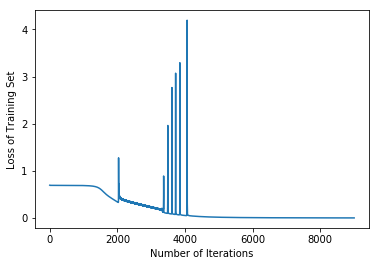

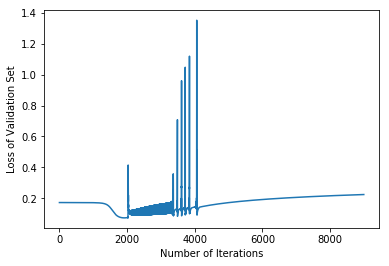

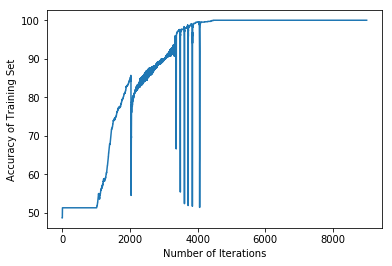

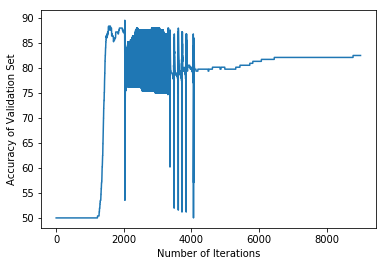

In [23]:
    print("Variance")
    print("lambda = ",lambd)
    plt.plot(l_index,l_train_cost_list)
    #plt.xticks(l_index,rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Training Set")
    plt.show()
    
    plt.plot(l_index,l_val_cost_list)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Validation Set")
    plt.show()
                          
    plt.plot(l_index,l_ac_train)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Training Set")
    plt.show()
                            
    plt.plot(l_index,l_ac_val)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Validation Set")
    plt.show()

In [24]:
print("\t\ttraining\t\tvalidation\t\tbest\t")
print("=================================================================================")
print("loss\t\t"+"{0:.10f}".format(l_train_cost_list[-1])+"\t\t"+"{0:.10f}".format(l_val_cost_list[-1])+"\t\t"+"{0:.10f}".format(highestloss))
print("=================================================================================")
print("accuracy\t"+"{0:.10f}".format(l_ac_train[-1])+"\t\t"+ "{0:.10f}".format(l_ac_val[-1])+"\t\t"+"{0:.10f}".format(highest))

		training		validation		best	
loss		0.0023593731		0.2246632746		0.0798236092
accuracy	100.0000000000		82.4218750000		89.4531250000


In [29]:
l_index = []
l_train_cost_list = []
l_val_cost_list = []
l_ac_train=[]
l_ac_val= []

In [30]:
learning_rate=0.5
lambd = 0.1 #best?
n_h = 200 # hidden layer size
l_index,l_train_cost_list,l_val_cost_list,l_ac_train,l_ac_val = nn_model(x_train, y_train ,n_h, 4000 , x_test,y_test)

#0 Training loss : 0.6931054305	Validation loss : 0.1727882466	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1 Training loss : 0.6930459956	Validation loss : 0.1727935354	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2 Training loss : 0.6930007672	Validation loss : 0.1727993946	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3 Training loss : 0.6929663389	Validation loss : 0.1728054509	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4 Training loss : 0.6929401207	Validation loss : 0.1728114506	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#5 Training loss : 0.6929201440	Validation loss : 0.1728172275	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#6 Training loss : 0.6929049123	Validation loss : 0.1728226782	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#7 Training loss : 0.6928932879	Validation loss : 0.1728277442	Traini

#61 Training loss : 0.6928470433	Validation loss : 0.1728682626	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#62 Training loss : 0.6928468584	Validation loss : 0.1728682273	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#63 Training loss : 0.6928466734	Validation loss : 0.1728681915	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#64 Training loss : 0.6928464885	Validation loss : 0.1728681553	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#65 Training loss : 0.6928463035	Validation loss : 0.1728681186	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#66 Training loss : 0.6928461184	Validation loss : 0.1728680817	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#67 Training loss : 0.6928459334	Validation loss : 0.1728680444	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#68 Training loss : 0.6928457483	Validation loss : 0.172868006

#121 Training loss : 0.6928359045	Validation loss : 0.1728659344	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#122 Training loss : 0.6928357180	Validation loss : 0.1728658949	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#123 Training loss : 0.6928355316	Validation loss : 0.1728658555	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#124 Training loss : 0.6928353451	Validation loss : 0.1728658160	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#125 Training loss : 0.6928351586	Validation loss : 0.1728657766	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#126 Training loss : 0.6928349720	Validation loss : 0.1728657371	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#127 Training loss : 0.6928347854	Validation loss : 0.1728656977	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#128 Training loss : 0.6928345988	Validation loss : 0.1

#181 Training loss : 0.6928246669	Validation loss : 0.1728635594	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#182 Training loss : 0.6928244787	Validation loss : 0.1728635197	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#183 Training loss : 0.6928242904	Validation loss : 0.1728634799	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#184 Training loss : 0.6928241021	Validation loss : 0.1728634402	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#185 Training loss : 0.6928239138	Validation loss : 0.1728634004	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#186 Training loss : 0.6928237255	Validation loss : 0.1728633607	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#187 Training loss : 0.6928235371	Validation loss : 0.1728633209	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#188 Training loss : 0.6928233487	Validation loss : 0.1

#241 Training loss : 0.6928133139	Validation loss : 0.1728611648	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#242 Training loss : 0.6928131236	Validation loss : 0.1728611247	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#243 Training loss : 0.6928129333	Validation loss : 0.1728610846	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#244 Training loss : 0.6928127429	Validation loss : 0.1728610445	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#245 Training loss : 0.6928125525	Validation loss : 0.1728610043	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#246 Training loss : 0.6928123621	Validation loss : 0.1728609642	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#247 Training loss : 0.6928121716	Validation loss : 0.1728609241	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#248 Training loss : 0.6928119811	Validation loss : 0.1

#301 Training loss : 0.6928018287	Validation loss : 0.1728587470	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#302 Training loss : 0.6928016360	Validation loss : 0.1728587065	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#303 Training loss : 0.6928014433	Validation loss : 0.1728586659	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#304 Training loss : 0.6928012506	Validation loss : 0.1728586254	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#305 Training loss : 0.6928010578	Validation loss : 0.1728585849	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#306 Training loss : 0.6928008650	Validation loss : 0.1728585443	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#307 Training loss : 0.6928006722	Validation loss : 0.1728585038	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#308 Training loss : 0.6928004793	Validation loss : 0.1

#361 Training loss : 0.6927901939	Validation loss : 0.1728563025	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#362 Training loss : 0.6927899987	Validation loss : 0.1728562615	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#363 Training loss : 0.6927898033	Validation loss : 0.1728562205	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#364 Training loss : 0.6927896080	Validation loss : 0.1728561795	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#365 Training loss : 0.6927894125	Validation loss : 0.1728561385	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#366 Training loss : 0.6927892171	Validation loss : 0.1728560975	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#367 Training loss : 0.6927890216	Validation loss : 0.1728560565	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#368 Training loss : 0.6927888260	Validation loss : 0.1

#421 Training loss : 0.6927783923	Validation loss : 0.1728538279	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#422 Training loss : 0.6927781941	Validation loss : 0.1728537864	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#423 Training loss : 0.6927779958	Validation loss : 0.1728537448	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#424 Training loss : 0.6927777975	Validation loss : 0.1728537033	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#425 Training loss : 0.6927775991	Validation loss : 0.1728536617	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#426 Training loss : 0.6927774007	Validation loss : 0.1728536202	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#427 Training loss : 0.6927772022	Validation loss : 0.1728535786	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#428 Training loss : 0.6927770037	Validation loss : 0.1

#481 Training loss : 0.6927664058	Validation loss : 0.1728513194	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#482 Training loss : 0.6927662044	Validation loss : 0.1728512773	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#483 Training loss : 0.6927660029	Validation loss : 0.1728512352	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#484 Training loss : 0.6927658013	Validation loss : 0.1728511930	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#485 Training loss : 0.6927655997	Validation loss : 0.1728511509	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#486 Training loss : 0.6927653980	Validation loss : 0.1728511087	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#487 Training loss : 0.6927651963	Validation loss : 0.1728510666	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#488 Training loss : 0.6927649945	Validation loss : 0.1

#541 Training loss : 0.6927542163	Validation loss : 0.1728487735	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#542 Training loss : 0.6927540113	Validation loss : 0.1728487307	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#543 Training loss : 0.6927538062	Validation loss : 0.1728486879	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#544 Training loss : 0.6927536011	Validation loss : 0.1728486451	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#545 Training loss : 0.6927533960	Validation loss : 0.1728486023	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#546 Training loss : 0.6927531907	Validation loss : 0.1728485595	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#547 Training loss : 0.6927529854	Validation loss : 0.1728485167	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#548 Training loss : 0.6927527801	Validation loss : 0.1

#601 Training loss : 0.6927418050	Validation loss : 0.1728461862	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#602 Training loss : 0.6927415961	Validation loss : 0.1728461428	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#603 Training loss : 0.6927413872	Validation loss : 0.1728460992	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#604 Training loss : 0.6927411782	Validation loss : 0.1728460557	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#605 Training loss : 0.6927409692	Validation loss : 0.1728460122	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#606 Training loss : 0.6927407601	Validation loss : 0.1728459687	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#607 Training loss : 0.6927405509	Validation loss : 0.1728459251	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#608 Training loss : 0.6927403416	Validation loss : 0.1

#661 Training loss : 0.6927291527	Validation loss : 0.1728435539	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#662 Training loss : 0.6927289396	Validation loss : 0.1728435096	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#663 Training loss : 0.6927287265	Validation loss : 0.1728434653	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#664 Training loss : 0.6927285134	Validation loss : 0.1728434210	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#665 Training loss : 0.6927283001	Validation loss : 0.1728433767	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#666 Training loss : 0.6927280868	Validation loss : 0.1728433324	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#667 Training loss : 0.6927278734	Validation loss : 0.1728432880	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#668 Training loss : 0.6927276600	Validation loss : 0.1

#721 Training loss : 0.6927162396	Validation loss : 0.1728408725	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#722 Training loss : 0.6927160221	Validation loss : 0.1728408274	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#723 Training loss : 0.6927158045	Validation loss : 0.1728407822	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#724 Training loss : 0.6927155868	Validation loss : 0.1728407371	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#725 Training loss : 0.6927153690	Validation loss : 0.1728406919	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#726 Training loss : 0.6927151511	Validation loss : 0.1728406467	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#727 Training loss : 0.6927149332	Validation loss : 0.1728406015	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#728 Training loss : 0.6927147152	Validation loss : 0.1

#781 Training loss : 0.6927030455	Validation loss : 0.1728381380	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#782 Training loss : 0.6927028231	Validation loss : 0.1728380919	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#783 Training loss : 0.6927026006	Validation loss : 0.1728380459	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#784 Training loss : 0.6927023781	Validation loss : 0.1728379998	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#785 Training loss : 0.6927021554	Validation loss : 0.1728379537	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#786 Training loss : 0.6927019327	Validation loss : 0.1728379076	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#787 Training loss : 0.6927017098	Validation loss : 0.1728378615	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#788 Training loss : 0.6927014869	Validation loss : 0.1

#841 Training loss : 0.6926895493	Validation loss : 0.1728353462	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#842 Training loss : 0.6926893217	Validation loss : 0.1728352991	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#843 Training loss : 0.6926890940	Validation loss : 0.1728352521	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#844 Training loss : 0.6926888662	Validation loss : 0.1728352050	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#845 Training loss : 0.6926886383	Validation loss : 0.1728351579	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#846 Training loss : 0.6926884103	Validation loss : 0.1728351108	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#847 Training loss : 0.6926881823	Validation loss : 0.1728350637	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#848 Training loss : 0.6926879541	Validation loss : 0.1

#901 Training loss : 0.6926757294	Validation loss : 0.1728324928	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#902 Training loss : 0.6926754962	Validation loss : 0.1728324447	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#903 Training loss : 0.6926752629	Validation loss : 0.1728323966	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#904 Training loss : 0.6926750295	Validation loss : 0.1728323484	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#905 Training loss : 0.6926747960	Validation loss : 0.1728323003	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#906 Training loss : 0.6926745624	Validation loss : 0.1728322521	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#907 Training loss : 0.6926743287	Validation loss : 0.1728322039	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#908 Training loss : 0.6926740949	Validation loss : 0.1

#961 Training loss : 0.6926615633	Validation loss : 0.1728295734	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#962 Training loss : 0.6926613241	Validation loss : 0.1728295242	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#963 Training loss : 0.6926610848	Validation loss : 0.1728294749	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#964 Training loss : 0.6926608455	Validation loss : 0.1728294256	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#965 Training loss : 0.6926606060	Validation loss : 0.1728293763	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#966 Training loss : 0.6926603664	Validation loss : 0.1728293270	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#967 Training loss : 0.6926601267	Validation loss : 0.1728292777	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#968 Training loss : 0.6926598869	Validation loss : 0.1

#1021 Training loss : 0.6926470277	Validation loss : 0.1728265834	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1022 Training loss : 0.6926467822	Validation loss : 0.1728265330	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1023 Training loss : 0.6926465366	Validation loss : 0.1728264825	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1024 Training loss : 0.6926462908	Validation loss : 0.1728264320	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1025 Training loss : 0.6926460450	Validation loss : 0.1728263815	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1026 Training loss : 0.6926457990	Validation loss : 0.1728263309	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1027 Training loss : 0.6926455529	Validation loss : 0.1728262804	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1028 Training loss : 0.6926453068	Validation lo

#1081 Training loss : 0.6926320987	Validation loss : 0.1728235181	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1082 Training loss : 0.6926318464	Validation loss : 0.1728234664	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1083 Training loss : 0.6926315940	Validation loss : 0.1728234146	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1084 Training loss : 0.6926313415	Validation loss : 0.1728233628	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1085 Training loss : 0.6926310888	Validation loss : 0.1728233110	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1086 Training loss : 0.6926308360	Validation loss : 0.1728232592	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1087 Training loss : 0.6926305832	Validation loss : 0.1728232073	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1088 Training loss : 0.6926303302	Validation lo

#1141 Training loss : 0.6926167511	Validation loss : 0.1728203726	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1142 Training loss : 0.6926164916	Validation loss : 0.1728203195	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1143 Training loss : 0.6926162320	Validation loss : 0.1728202663	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1144 Training loss : 0.6926159723	Validation loss : 0.1728202132	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1145 Training loss : 0.6926157124	Validation loss : 0.1728201600	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1146 Training loss : 0.6926154524	Validation loss : 0.1728201067	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1147 Training loss : 0.6926151923	Validation loss : 0.1728200535	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1148 Training loss : 0.6926149321	Validation lo

#1201 Training loss : 0.6926009589	Validation loss : 0.1728171418	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1202 Training loss : 0.6926006918	Validation loss : 0.1728170872	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1203 Training loss : 0.6926004245	Validation loss : 0.1728170326	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1204 Training loss : 0.6926001572	Validation loss : 0.1728169779	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1205 Training loss : 0.6925998896	Validation loss : 0.1728169233	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1206 Training loss : 0.6925996220	Validation loss : 0.1728168686	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1207 Training loss : 0.6925993542	Validation loss : 0.1728168138	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1208 Training loss : 0.6925990863	Validation lo

#1261 Training loss : 0.6925846951	Validation loss : 0.1728138204	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1262 Training loss : 0.6925844199	Validation loss : 0.1728137643	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1263 Training loss : 0.6925841445	Validation loss : 0.1728137081	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1264 Training loss : 0.6925838690	Validation loss : 0.1728136519	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1265 Training loss : 0.6925835934	Validation loss : 0.1728135956	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1266 Training loss : 0.6925833176	Validation loss : 0.1728135394	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1267 Training loss : 0.6925830417	Validation loss : 0.1728134831	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1268 Training loss : 0.6925827656	Validation lo

#1321 Training loss : 0.6925679314	Validation loss : 0.1728104029	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1322 Training loss : 0.6925676476	Validation loss : 0.1728103451	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1323 Training loss : 0.6925673636	Validation loss : 0.1728102873	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1324 Training loss : 0.6925670796	Validation loss : 0.1728102294	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1325 Training loss : 0.6925667953	Validation loss : 0.1728101715	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1326 Training loss : 0.6925665109	Validation loss : 0.1728101136	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1327 Training loss : 0.6925662264	Validation loss : 0.1728100557	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1328 Training loss : 0.6925659417	Validation lo

#1381 Training loss : 0.6925506383	Validation loss : 0.1728068836	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1382 Training loss : 0.6925503455	Validation loss : 0.1728068241	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1383 Training loss : 0.6925500524	Validation loss : 0.1728067645	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1384 Training loss : 0.6925497592	Validation loss : 0.1728067049	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1385 Training loss : 0.6925494659	Validation loss : 0.1728066453	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1386 Training loss : 0.6925491724	Validation loss : 0.1728065856	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1387 Training loss : 0.6925488787	Validation loss : 0.1728065259	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1388 Training loss : 0.6925485849	Validation lo

#1441 Training loss : 0.6925327852	Validation loss : 0.1728032566	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1442 Training loss : 0.6925324827	Validation loss : 0.1728031952	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1443 Training loss : 0.6925321801	Validation loss : 0.1728031337	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1444 Training loss : 0.6925318773	Validation loss : 0.1728030723	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1445 Training loss : 0.6925315743	Validation loss : 0.1728030108	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1446 Training loss : 0.6925312712	Validation loss : 0.1728029493	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1447 Training loss : 0.6925309679	Validation loss : 0.1728028877	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1448 Training loss : 0.6925306644	Validation lo

#1501 Training loss : 0.6925143399	Validation loss : 0.1727995155	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1502 Training loss : 0.6925140273	Validation loss : 0.1727994522	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1503 Training loss : 0.6925137145	Validation loss : 0.1727993888	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1504 Training loss : 0.6925134015	Validation loss : 0.1727993254	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1505 Training loss : 0.6925130883	Validation loss : 0.1727992619	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1506 Training loss : 0.6925127750	Validation loss : 0.1727991984	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1507 Training loss : 0.6925124615	Validation loss : 0.1727991349	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1508 Training loss : 0.6925121479	Validation lo

#1561 Training loss : 0.6924952688	Validation loss : 0.1727956540	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1562 Training loss : 0.6924949454	Validation loss : 0.1727955886	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1563 Training loss : 0.6924946219	Validation loss : 0.1727955231	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1564 Training loss : 0.6924942982	Validation loss : 0.1727954576	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1565 Training loss : 0.6924939743	Validation loss : 0.1727953921	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1566 Training loss : 0.6924936502	Validation loss : 0.1727953265	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1567 Training loss : 0.6924933259	Validation loss : 0.1727952609	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1568 Training loss : 0.6924930015	Validation lo

#1621 Training loss : 0.6924755367	Validation loss : 0.1727916651	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1622 Training loss : 0.6924752020	Validation loss : 0.1727915975	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1623 Training loss : 0.6924748672	Validation loss : 0.1727915299	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1624 Training loss : 0.6924745321	Validation loss : 0.1727914622	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1625 Training loss : 0.6924741968	Validation loss : 0.1727913945	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1626 Training loss : 0.6924738614	Validation loss : 0.1727913267	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1627 Training loss : 0.6924735257	Validation loss : 0.1727912590	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1628 Training loss : 0.6924731899	Validation lo

#1681 Training loss : 0.6924551068	Validation loss : 0.1727875418	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1682 Training loss : 0.6924547602	Validation loss : 0.1727874719	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1683 Training loss : 0.6924544133	Validation loss : 0.1727874020	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1684 Training loss : 0.6924540663	Validation loss : 0.1727873320	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1685 Training loss : 0.6924537191	Validation loss : 0.1727872620	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1686 Training loss : 0.6924533716	Validation loss : 0.1727871919	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1687 Training loss : 0.6924530240	Validation loss : 0.1727871218	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1688 Training loss : 0.6924526761	Validation lo

#1741 Training loss : 0.6924339404	Validation loss : 0.1727832766	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1742 Training loss : 0.6924335812	Validation loss : 0.1727832043	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1743 Training loss : 0.6924332217	Validation loss : 0.1727831319	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1744 Training loss : 0.6924328621	Validation loss : 0.1727830595	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1745 Training loss : 0.6924325022	Validation loss : 0.1727829871	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1746 Training loss : 0.6924321421	Validation loss : 0.1727829146	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1747 Training loss : 0.6924317817	Validation loss : 0.1727828420	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1748 Training loss : 0.6924314212	Validation lo

#1801 Training loss : 0.6924119971	Validation loss : 0.1727788617	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1802 Training loss : 0.6924116245	Validation loss : 0.1727787868	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1803 Training loss : 0.6924112517	Validation loss : 0.1727787119	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1804 Training loss : 0.6924108787	Validation loss : 0.1727786369	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1805 Training loss : 0.6924105055	Validation loss : 0.1727785618	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1806 Training loss : 0.6924101320	Validation loss : 0.1727784868	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1807 Training loss : 0.6924097584	Validation loss : 0.1727784117	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1808 Training loss : 0.6924093844	Validation lo

#1861 Training loss : 0.6923892341	Validation loss : 0.1727742888	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1862 Training loss : 0.6923888475	Validation loss : 0.1727742112	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1863 Training loss : 0.6923884607	Validation loss : 0.1727741335	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1864 Training loss : 0.6923880737	Validation loss : 0.1727740558	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1865 Training loss : 0.6923876864	Validation loss : 0.1727739781	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1866 Training loss : 0.6923872988	Validation loss : 0.1727739003	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1867 Training loss : 0.6923869110	Validation loss : 0.1727738224	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1868 Training loss : 0.6923865230	Validation lo

#1921 Training loss : 0.6923656069	Validation loss : 0.1727695492	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1922 Training loss : 0.6923652055	Validation loss : 0.1727694687	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1923 Training loss : 0.6923648039	Validation loss : 0.1727693882	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1924 Training loss : 0.6923644020	Validation loss : 0.1727693076	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1925 Training loss : 0.6923639998	Validation loss : 0.1727692270	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1926 Training loss : 0.6923635975	Validation loss : 0.1727691464	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1927 Training loss : 0.6923631948	Validation loss : 0.1727690657	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1928 Training loss : 0.6923627919	Validation lo

#1981 Training loss : 0.6923410683	Validation loss : 0.1727646338	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1982 Training loss : 0.6923406513	Validation loss : 0.1727645503	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1983 Training loss : 0.6923402341	Validation loss : 0.1727644668	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1984 Training loss : 0.6923398166	Validation loss : 0.1727643832	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1985 Training loss : 0.6923393988	Validation loss : 0.1727642996	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1986 Training loss : 0.6923389807	Validation loss : 0.1727642159	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1987 Training loss : 0.6923385624	Validation loss : 0.1727641322	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#1988 Training loss : 0.6923381438	Validation lo

#2041 Training loss : 0.6923155689	Validation loss : 0.1727595330	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2042 Training loss : 0.6923151355	Validation loss : 0.1727594463	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2043 Training loss : 0.6923147018	Validation loss : 0.1727593596	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2044 Training loss : 0.6923142678	Validation loss : 0.1727592729	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2045 Training loss : 0.6923138335	Validation loss : 0.1727591861	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2046 Training loss : 0.6923133989	Validation loss : 0.1727590992	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2047 Training loss : 0.6923129641	Validation loss : 0.1727590123	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2048 Training loss : 0.6923125290	Validation lo

#2101 Training loss : 0.6922890566	Validation loss : 0.1727542366	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2102 Training loss : 0.6922886058	Validation loss : 0.1727541466	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2103 Training loss : 0.6922881547	Validation loss : 0.1727540565	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2104 Training loss : 0.6922877034	Validation loss : 0.1727539664	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2105 Training loss : 0.6922872517	Validation loss : 0.1727538763	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2106 Training loss : 0.6922867998	Validation loss : 0.1727537860	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2107 Training loss : 0.6922863475	Validation loss : 0.1727536958	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2108 Training loss : 0.6922858950	Validation lo

#2161 Training loss : 0.6922614764	Validation loss : 0.1727487339	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2162 Training loss : 0.6922610074	Validation loss : 0.1727486403	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2163 Training loss : 0.6922605380	Validation loss : 0.1727485468	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2164 Training loss : 0.6922600684	Validation loss : 0.1727484531	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2165 Training loss : 0.6922595984	Validation loss : 0.1727483594	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2166 Training loss : 0.6922591281	Validation loss : 0.1727482657	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2167 Training loss : 0.6922586575	Validation loss : 0.1727481718	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2168 Training loss : 0.6922581866	Validation lo

#2221 Training loss : 0.6922327706	Validation loss : 0.1727430135	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2222 Training loss : 0.6922322823	Validation loss : 0.1727429163	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2223 Training loss : 0.6922317937	Validation loss : 0.1727428190	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2224 Training loss : 0.6922313047	Validation loss : 0.1727427216	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2225 Training loss : 0.6922308154	Validation loss : 0.1727426241	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2226 Training loss : 0.6922303258	Validation loss : 0.1727425266	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2227 Training loss : 0.6922298358	Validation loss : 0.1727424291	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2228 Training loss : 0.6922293455	Validation lo

#2281 Training loss : 0.6922028781	Validation loss : 0.1727370635	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2282 Training loss : 0.6922023694	Validation loss : 0.1727369623	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2283 Training loss : 0.6922018605	Validation loss : 0.1727368611	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2284 Training loss : 0.6922013512	Validation loss : 0.1727367597	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2285 Training loss : 0.6922008415	Validation loss : 0.1727366584	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2286 Training loss : 0.6922003315	Validation loss : 0.1727365569	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2287 Training loss : 0.6921998211	Validation loss : 0.1727364554	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2288 Training loss : 0.6921993104	Validation lo

#2341 Training loss : 0.6921717344	Validation loss : 0.1727308711	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2342 Training loss : 0.6921712043	Validation loss : 0.1727307657	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2343 Training loss : 0.6921706739	Validation loss : 0.1727306603	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2344 Training loss : 0.6921701431	Validation loss : 0.1727305548	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2345 Training loss : 0.6921696120	Validation loss : 0.1727304493	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2346 Training loss : 0.6921690805	Validation loss : 0.1727303437	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2347 Training loss : 0.6921685486	Validation loss : 0.1727302380	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2348 Training loss : 0.6921680164	Validation lo

#2401 Training loss : 0.6921392715	Validation loss : 0.1727244227	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2402 Training loss : 0.6921387189	Validation loss : 0.1727243130	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2403 Training loss : 0.6921381658	Validation loss : 0.1727242032	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2404 Training loss : 0.6921376124	Validation loss : 0.1727240933	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2405 Training loss : 0.6921370586	Validation loss : 0.1727239834	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2406 Training loss : 0.6921365045	Validation loss : 0.1727238734	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2407 Training loss : 0.6921359499	Validation loss : 0.1727237633	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2408 Training loss : 0.6921353950	Validation lo

#2461 Training loss : 0.6921054175	Validation loss : 0.1727177042	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2462 Training loss : 0.6921048410	Validation loss : 0.1727175898	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2463 Training loss : 0.6921042642	Validation loss : 0.1727174754	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2464 Training loss : 0.6921036869	Validation loss : 0.1727173609	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2465 Training loss : 0.6921031092	Validation loss : 0.1727172463	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2466 Training loss : 0.6921025312	Validation loss : 0.1727171316	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2467 Training loss : 0.6921019527	Validation loss : 0.1727170169	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2468 Training loss : 0.6921013738	Validation lo

#2521 Training loss : 0.6920700963	Validation loss : 0.1727107001	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2522 Training loss : 0.6920694947	Validation loss : 0.1727105808	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2523 Training loss : 0.6920688927	Validation loss : 0.1727104615	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2524 Training loss : 0.6920682903	Validation loss : 0.1727103421	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2525 Training loss : 0.6920676874	Validation loss : 0.1727102226	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2526 Training loss : 0.6920670842	Validation loss : 0.1727101030	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2527 Training loss : 0.6920664804	Validation loss : 0.1727099833	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2528 Training loss : 0.6920658763	Validation lo

#2581 Training loss : 0.6920332275	Validation loss : 0.1727033943	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2582 Training loss : 0.6920325994	Validation loss : 0.1727032698	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2583 Training loss : 0.6920319709	Validation loss : 0.1727031453	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2584 Training loss : 0.6920313419	Validation loss : 0.1727030207	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2585 Training loss : 0.6920307125	Validation loss : 0.1727028961	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2586 Training loss : 0.6920300826	Validation loss : 0.1727027713	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2587 Training loss : 0.6920294523	Validation loss : 0.1727026464	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2588 Training loss : 0.6920288215	Validation lo

#2641 Training loss : 0.6919947259	Validation loss : 0.1726957694	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2642 Training loss : 0.6919940698	Validation loss : 0.1726956395	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2643 Training loss : 0.6919934133	Validation loss : 0.1726955096	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2644 Training loss : 0.6919927563	Validation loss : 0.1726953795	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2645 Training loss : 0.6919920988	Validation loss : 0.1726952493	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2646 Training loss : 0.6919914409	Validation loss : 0.1726951190	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2647 Training loss : 0.6919907825	Validation loss : 0.1726949887	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2648 Training loss : 0.6919901235	Validation lo

#2701 Training loss : 0.6919545011	Validation loss : 0.1726878071	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2702 Training loss : 0.6919538156	Validation loss : 0.1726876715	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2703 Training loss : 0.6919531295	Validation loss : 0.1726875357	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2704 Training loss : 0.6919524430	Validation loss : 0.1726873998	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2705 Training loss : 0.6919517559	Validation loss : 0.1726872638	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2706 Training loss : 0.6919510683	Validation loss : 0.1726871278	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2707 Training loss : 0.6919503803	Validation loss : 0.1726869916	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2708 Training loss : 0.6919496917	Validation lo

#2761 Training loss : 0.6919124577	Validation loss : 0.1726794877	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2762 Training loss : 0.6919117410	Validation loss : 0.1726793459	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2763 Training loss : 0.6919110237	Validation loss : 0.1726792040	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2764 Training loss : 0.6919103059	Validation loss : 0.1726790620	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2765 Training loss : 0.6919095876	Validation loss : 0.1726789198	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2766 Training loss : 0.6919088688	Validation loss : 0.1726787776	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2767 Training loss : 0.6919081494	Validation loss : 0.1726786353	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2768 Training loss : 0.6919074295	Validation lo

#2821 Training loss : 0.6918684939	Validation loss : 0.1726707900	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2822 Training loss : 0.6918677443	Validation loss : 0.1726706417	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2823 Training loss : 0.6918669942	Validation loss : 0.1726704933	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2824 Training loss : 0.6918662434	Validation loss : 0.1726703448	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2825 Training loss : 0.6918654921	Validation loss : 0.1726701962	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2826 Training loss : 0.6918647403	Validation loss : 0.1726700475	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2827 Training loss : 0.6918639878	Validation loss : 0.1726698986	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2828 Training loss : 0.6918632349	Validation lo

#2881 Training loss : 0.6918225022	Validation loss : 0.1726616916	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2882 Training loss : 0.6918217179	Validation loss : 0.1726615365	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2883 Training loss : 0.6918209329	Validation loss : 0.1726613812	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2884 Training loss : 0.6918201474	Validation loss : 0.1726612258	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2885 Training loss : 0.6918193612	Validation loss : 0.1726610703	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2886 Training loss : 0.6918185745	Validation loss : 0.1726609146	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2887 Training loss : 0.6918177871	Validation loss : 0.1726607588	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2888 Training loss : 0.6918169992	Validation lo

#2941 Training loss : 0.6917743681	Validation loss : 0.1726521684	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2942 Training loss : 0.6917735470	Validation loss : 0.1726520059	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2943 Training loss : 0.6917727253	Validation loss : 0.1726518433	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2944 Training loss : 0.6917719030	Validation loss : 0.1726516806	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2945 Training loss : 0.6917710800	Validation loss : 0.1726515178	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2946 Training loss : 0.6917702564	Validation loss : 0.1726513548	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2947 Training loss : 0.6917694322	Validation loss : 0.1726511917	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#2948 Training loss : 0.6917686074	Validation lo

#3001 Training loss : 0.6917239699	Validation loss : 0.1726421944	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3002 Training loss : 0.6917231101	Validation loss : 0.1726420242	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3003 Training loss : 0.6917222495	Validation loss : 0.1726418539	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3004 Training loss : 0.6917213883	Validation loss : 0.1726416834	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3005 Training loss : 0.6917205264	Validation loss : 0.1726415128	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3006 Training loss : 0.6917196639	Validation loss : 0.1726413421	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3007 Training loss : 0.6917188007	Validation loss : 0.1726411712	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3008 Training loss : 0.6917179368	Validation lo

#3061 Training loss : 0.6916711784	Validation loss : 0.1726317419	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3062 Training loss : 0.6916702775	Validation loss : 0.1726315635	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3063 Training loss : 0.6916693759	Validation loss : 0.1726313849	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3064 Training loss : 0.6916684736	Validation loss : 0.1726312062	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3065 Training loss : 0.6916675706	Validation loss : 0.1726310273	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3066 Training loss : 0.6916666669	Validation loss : 0.1726308483	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3067 Training loss : 0.6916657624	Validation loss : 0.1726306692	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3068 Training loss : 0.6916648573	Validation lo

#3121 Training loss : 0.6916158559	Validation loss : 0.1726207810	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3122 Training loss : 0.6916149116	Validation loss : 0.1726205938	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3123 Training loss : 0.6916139665	Validation loss : 0.1726204065	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3124 Training loss : 0.6916130208	Validation loss : 0.1726202190	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3125 Training loss : 0.6916120742	Validation loss : 0.1726200314	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3126 Training loss : 0.6916111269	Validation loss : 0.1726198436	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3127 Training loss : 0.6916101789	Validation loss : 0.1726196557	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3128 Training loss : 0.6916092301	Validation lo

#3181 Training loss : 0.6915578558	Validation loss : 0.1726092794	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3182 Training loss : 0.6915568655	Validation loss : 0.1726090830	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3183 Training loss : 0.6915558745	Validation loss : 0.1726088864	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3184 Training loss : 0.6915548827	Validation loss : 0.1726086896	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3185 Training loss : 0.6915538901	Validation loss : 0.1726084926	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3186 Training loss : 0.6915528967	Validation loss : 0.1726082955	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3187 Training loss : 0.6915519026	Validation loss : 0.1726080982	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3188 Training loss : 0.6915509076	Validation lo

#3241 Training loss : 0.6914970217	Validation loss : 0.1725972027	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3242 Training loss : 0.6914959829	Validation loss : 0.1725969963	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3243 Training loss : 0.6914949432	Validation loss : 0.1725967898	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3244 Training loss : 0.6914939027	Validation loss : 0.1725965831	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3245 Training loss : 0.6914928614	Validation loss : 0.1725963762	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3246 Training loss : 0.6914918192	Validation loss : 0.1725961692	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3247 Training loss : 0.6914907762	Validation loss : 0.1725959619	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3248 Training loss : 0.6914897323	Validation lo

#3301 Training loss : 0.6914331872	Validation loss : 0.1725845133	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3302 Training loss : 0.6914320969	Validation loss : 0.1725842964	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3303 Training loss : 0.6914310056	Validation loss : 0.1725840793	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3304 Training loss : 0.6914299136	Validation loss : 0.1725838620	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3305 Training loss : 0.6914288206	Validation loss : 0.1725836445	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3306 Training loss : 0.6914277267	Validation loss : 0.1725834269	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3307 Training loss : 0.6914266320	Validation loss : 0.1725832091	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3308 Training loss : 0.6914255363	Validation lo

#3361 Training loss : 0.6913661742	Validation loss : 0.1725711708	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3362 Training loss : 0.6913650293	Validation loss : 0.1725709426	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3363 Training loss : 0.6913638835	Validation loss : 0.1725707143	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3364 Training loss : 0.6913627368	Validation loss : 0.1725704857	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3365 Training loss : 0.6913615891	Validation loss : 0.1725702570	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3366 Training loss : 0.6913604405	Validation loss : 0.1725700281	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3367 Training loss : 0.6913592909	Validation loss : 0.1725697990	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3368 Training loss : 0.6913581404	Validation lo

#3421 Training loss : 0.6912957928	Validation loss : 0.1725571315	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3422 Training loss : 0.6912945901	Validation loss : 0.1725568913	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3423 Training loss : 0.6912933864	Validation loss : 0.1725566510	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3424 Training loss : 0.6912921817	Validation loss : 0.1725564104	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3425 Training loss : 0.6912909760	Validation loss : 0.1725561696	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3426 Training loss : 0.6912897693	Validation loss : 0.1725559286	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3427 Training loss : 0.6912885617	Validation loss : 0.1725556875	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3428 Training loss : 0.6912873530	Validation lo

#3481 Training loss : 0.6912218398	Validation loss : 0.1725423481	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3482 Training loss : 0.6912205758	Validation loss : 0.1725420951	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3483 Training loss : 0.6912193107	Validation loss : 0.1725418419	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3484 Training loss : 0.6912180445	Validation loss : 0.1725415885	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3485 Training loss : 0.6912167774	Validation loss : 0.1725413348	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3486 Training loss : 0.6912155091	Validation loss : 0.1725410809	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3487 Training loss : 0.6912142398	Validation loss : 0.1725408269	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3488 Training loss : 0.6912129694	Validation lo

#3541 Training loss : 0.6911440979	Validation loss : 0.1725267691	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3542 Training loss : 0.6911427688	Validation loss : 0.1725265024	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3543 Training loss : 0.6911414386	Validation loss : 0.1725262355	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3544 Training loss : 0.6911401072	Validation loss : 0.1725259683	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3545 Training loss : 0.6911387748	Validation loss : 0.1725257009	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3546 Training loss : 0.6911374412	Validation loss : 0.1725254333	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3547 Training loss : 0.6911361065	Validation loss : 0.1725251654	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3548 Training loss : 0.6911347707	Validation lo

#3601 Training loss : 0.6910623343	Validation loss : 0.1725103389	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3602 Training loss : 0.6910609361	Validation loss : 0.1725100575	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3603 Training loss : 0.6910595368	Validation loss : 0.1725097758	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3604 Training loss : 0.6910581362	Validation loss : 0.1725094939	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3605 Training loss : 0.6910567344	Validation loss : 0.1725092118	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3606 Training loss : 0.6910553315	Validation loss : 0.1725089294	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3607 Training loss : 0.6910539274	Validation loss : 0.1725086467	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3608 Training loss : 0.6910525220	Validation lo

#3661 Training loss : 0.6909762998	Validation loss : 0.1724929966	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3662 Training loss : 0.6909748282	Validation loss : 0.1724926994	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3663 Training loss : 0.6909733553	Validation loss : 0.1724924020	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3664 Training loss : 0.6909718812	Validation loss : 0.1724921044	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3665 Training loss : 0.6909704058	Validation loss : 0.1724918064	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3666 Training loss : 0.6909689292	Validation loss : 0.1724915082	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3667 Training loss : 0.6909674513	Validation loss : 0.1724912097	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3668 Training loss : 0.6909659721	Validation lo

#3721 Training loss : 0.6908857267	Validation loss : 0.1724746762	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3722 Training loss : 0.6908841771	Validation loss : 0.1724743622	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3723 Training loss : 0.6908826261	Validation loss : 0.1724740479	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3724 Training loss : 0.6908810738	Validation loss : 0.1724737332	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3725 Training loss : 0.6908795202	Validation loss : 0.1724734183	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3726 Training loss : 0.6908779652	Validation loss : 0.1724731031	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3727 Training loss : 0.6908764089	Validation loss : 0.1724727876	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3728 Training loss : 0.6908748512	Validation lo

#3781 Training loss : 0.6907903279	Validation loss : 0.1724553056	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3782 Training loss : 0.6907886953	Validation loss : 0.1724549735	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3783 Training loss : 0.6907870613	Validation loss : 0.1724546410	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3784 Training loss : 0.6907854258	Validation loss : 0.1724543082	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3785 Training loss : 0.6907837890	Validation loss : 0.1724539750	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3786 Training loss : 0.6907821506	Validation loss : 0.1724536416	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3787 Training loss : 0.6907805109	Validation loss : 0.1724533078	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3788 Training loss : 0.6907788697	Validation lo

#3841 Training loss : 0.6906897948	Validation loss : 0.1724348061	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3842 Training loss : 0.6906880739	Validation loss : 0.1724344544	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3843 Training loss : 0.6906863514	Validation loss : 0.1724341024	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3844 Training loss : 0.6906846275	Validation loss : 0.1724337500	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3845 Training loss : 0.6906829020	Validation loss : 0.1724333973	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3846 Training loss : 0.6906811750	Validation loss : 0.1724330442	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3847 Training loss : 0.6906794465	Validation loss : 0.1724326909	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3848 Training loss : 0.6906777165	Validation lo

#3901 Training loss : 0.6905837955	Validation loss : 0.1724130916	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3902 Training loss : 0.6905819805	Validation loss : 0.1724127189	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3903 Training loss : 0.6905801639	Validation loss : 0.1724123458	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3904 Training loss : 0.6905783457	Validation loss : 0.1724119723	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3905 Training loss : 0.6905765259	Validation loss : 0.1724115985	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3906 Training loss : 0.6905747044	Validation loss : 0.1724112243	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3907 Training loss : 0.6905728814	Validation loss : 0.1724108498	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3908 Training loss : 0.6905710567	Validation lo

#3961 Training loss : 0.6904719726	Validation loss : 0.1723900677	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3962 Training loss : 0.6904700574	Validation loss : 0.1723896723	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3963 Training loss : 0.6904681405	Validation loss : 0.1723892765	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3964 Training loss : 0.6904662218	Validation loss : 0.1723888803	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3965 Training loss : 0.6904643014	Validation loss : 0.1723884837	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3966 Training loss : 0.6904623793	Validation loss : 0.1723880867	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3967 Training loss : 0.6904604555	Validation loss : 0.1723876894	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#3968 Training loss : 0.6904585299	Validation lo

#4021 Training loss : 0.6903539412	Validation loss : 0.1723656309	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4022 Training loss : 0.6903519191	Validation loss : 0.1723652110	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4023 Training loss : 0.6903498951	Validation loss : 0.1723647907	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4024 Training loss : 0.6903478693	Validation loss : 0.1723643700	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4025 Training loss : 0.6903458417	Validation loss : 0.1723639488	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4026 Training loss : 0.6903438122	Validation loss : 0.1723635273	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4027 Training loss : 0.6903417809	Validation loss : 0.1723631053	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4028 Training loss : 0.6903397477	Validation lo

#4081 Training loss : 0.6902292859	Validation loss : 0.1723396676	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4082 Training loss : 0.6902271496	Validation loss : 0.1723392213	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4083 Training loss : 0.6902250115	Validation loss : 0.1723387745	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4084 Training loss : 0.6902228713	Validation loss : 0.1723383272	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4085 Training loss : 0.6902207292	Validation loss : 0.1723378795	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4086 Training loss : 0.6902185851	Validation loss : 0.1723374313	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4087 Training loss : 0.6902164390	Validation loss : 0.1723369826	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4088 Training loss : 0.6902142910	Validation lo

#4141 Training loss : 0.6900975581	Validation loss : 0.1723120528	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4142 Training loss : 0.6900953000	Validation loss : 0.1723115777	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4143 Training loss : 0.6900930398	Validation loss : 0.1723111022	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4144 Training loss : 0.6900907775	Validation loss : 0.1723106262	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4145 Training loss : 0.6900885131	Validation loss : 0.1723101497	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4146 Training loss : 0.6900862466	Validation loss : 0.1723096727	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4147 Training loss : 0.6900839780	Validation loss : 0.1723091952	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4148 Training loss : 0.6900817072	Validation lo

#4201 Training loss : 0.6899582730	Validation loss : 0.1722826485	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4202 Training loss : 0.6899558846	Validation loss : 0.1722821424	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4203 Training loss : 0.6899534940	Validation loss : 0.1722816358	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4204 Training loss : 0.6899511011	Validation loss : 0.1722811286	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4205 Training loss : 0.6899487060	Validation loss : 0.1722806209	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4206 Training loss : 0.6899463086	Validation loss : 0.1722801127	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4207 Training loss : 0.6899439090	Validation loss : 0.1722796039	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4208 Training loss : 0.6899415071	Validation lo

#4261 Training loss : 0.6898109060	Validation loss : 0.1722513028	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4262 Training loss : 0.6898083782	Validation loss : 0.1722507629	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4263 Training loss : 0.6898058480	Validation loss : 0.1722502226	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4264 Training loss : 0.6898033155	Validation loss : 0.1722496816	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4265 Training loss : 0.6898007805	Validation loss : 0.1722491400	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4266 Training loss : 0.6897982431	Validation loss : 0.1722485978	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4267 Training loss : 0.6897957033	Validation loss : 0.1722480551	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4268 Training loss : 0.6897931610	Validation lo

#4321 Training loss : 0.6896548886	Validation loss : 0.1722178475	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4322 Training loss : 0.6896522116	Validation loss : 0.1722172710	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4323 Training loss : 0.6896495320	Validation loss : 0.1722166939	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4324 Training loss : 0.6896468498	Validation loss : 0.1722161161	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4325 Training loss : 0.6896441651	Validation loss : 0.1722155377	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4326 Training loss : 0.6896414777	Validation loss : 0.1722149587	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4327 Training loss : 0.6896387878	Validation loss : 0.1722143790	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4328 Training loss : 0.6896360953	Validation lo

#4381 Training loss : 0.6894896044	Validation loss : 0.1721820968	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4382 Training loss : 0.6894867674	Validation loss : 0.1721814804	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4383 Training loss : 0.6894839277	Validation loss : 0.1721808632	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4384 Training loss : 0.6894810852	Validation loss : 0.1721802454	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4385 Training loss : 0.6894782399	Validation loss : 0.1721796269	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4386 Training loss : 0.6894753919	Validation loss : 0.1721790077	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4387 Training loss : 0.6894725410	Validation loss : 0.1721783877	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4388 Training loss : 0.6894696874	Validation lo

#4441 Training loss : 0.6893143840	Validation loss : 0.1721438444	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4442 Training loss : 0.6893113754	Validation loss : 0.1721431844	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4443 Training loss : 0.6893083638	Validation loss : 0.1721425237	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4444 Training loss : 0.6893053493	Validation loss : 0.1721418621	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4445 Training loss : 0.6893023318	Validation loss : 0.1721411998	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4446 Training loss : 0.6892993114	Validation loss : 0.1721405368	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4447 Training loss : 0.6892962879	Validation loss : 0.1721398730	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4448 Training loss : 0.6892932615	Validation lo

#4501 Training loss : 0.6891284994	Validation loss : 0.1721028615	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4502 Training loss : 0.6891253065	Validation loss : 0.1721021539	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4503 Training loss : 0.6891221105	Validation loss : 0.1721014455	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4504 Training loss : 0.6891189113	Validation loss : 0.1721007362	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4505 Training loss : 0.6891157089	Validation loss : 0.1721000261	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4506 Training loss : 0.6891125033	Validation loss : 0.1720993152	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4507 Training loss : 0.6891092945	Validation loss : 0.1720986035	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4508 Training loss : 0.6891060825	Validation lo

#4561 Training loss : 0.6889311584	Validation loss : 0.1720588936	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4562 Training loss : 0.6889277675	Validation loss : 0.1720581340	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4563 Training loss : 0.6889243732	Validation loss : 0.1720573734	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4564 Training loss : 0.6889209755	Validation loss : 0.1720566119	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4565 Training loss : 0.6889175743	Validation loss : 0.1720558495	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4566 Training loss : 0.6889141697	Validation loss : 0.1720550862	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4567 Training loss : 0.6889107617	Validation loss : 0.1720543220	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4568 Training loss : 0.6889073502	Validation lo

#4621 Training loss : 0.6887214976	Validation loss : 0.1720116575	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4622 Training loss : 0.6887178936	Validation loss : 0.1720108408	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4623 Training loss : 0.6887142859	Validation loss : 0.1720100231	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4624 Training loss : 0.6887106746	Validation loss : 0.1720092044	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4625 Training loss : 0.6887070595	Validation loss : 0.1720083847	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4626 Training loss : 0.6887034408	Validation loss : 0.1720075639	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4627 Training loss : 0.6886998183	Validation loss : 0.1720067422	Training Accuracy: 51.3145082765%	Validation Accuracy: 50.0000000000%
#4628 Training loss : 0.6886961921	Validation lo

#4681 Training loss : 0.6884985743	Validation loss : 0.1719608372	Training Accuracy: 51.6066212269%	Validation Accuracy: 50.0000000000%
#4682 Training loss : 0.6884947408	Validation loss : 0.1719599579	Training Accuracy: 51.6066212269%	Validation Accuracy: 50.0000000000%
#4683 Training loss : 0.6884909033	Validation loss : 0.1719590775	Training Accuracy: 51.6066212269%	Validation Accuracy: 50.0000000000%
#4684 Training loss : 0.6884870619	Validation loss : 0.1719581960	Training Accuracy: 51.6066212269%	Validation Accuracy: 50.0000000000%
#4685 Training loss : 0.6884832165	Validation loss : 0.1719573134	Training Accuracy: 51.6066212269%	Validation Accuracy: 50.0000000000%
#4686 Training loss : 0.6884793671	Validation loss : 0.1719564296	Training Accuracy: 51.6066212269%	Validation Accuracy: 50.0000000000%
#4687 Training loss : 0.6884755137	Validation loss : 0.1719555448	Training Accuracy: 51.6066212269%	Validation Accuracy: 50.0000000000%
#4688 Training loss : 0.6884716563	Validation lo

#4741 Training loss : 0.6882613586	Validation loss : 0.1719060802	Training Accuracy: 51.8987341772%	Validation Accuracy: 50.0000000000%
#4742 Training loss : 0.6882572776	Validation loss : 0.1719051321	Training Accuracy: 51.8987341772%	Validation Accuracy: 50.0000000000%
#4743 Training loss : 0.6882531924	Validation loss : 0.1719041827	Training Accuracy: 51.8987341772%	Validation Accuracy: 50.0000000000%
#4744 Training loss : 0.6882491029	Validation loss : 0.1719032321	Training Accuracy: 51.8987341772%	Validation Accuracy: 50.0000000000%
#4745 Training loss : 0.6882450090	Validation loss : 0.1719022804	Training Accuracy: 51.8987341772%	Validation Accuracy: 50.0000000000%
#4746 Training loss : 0.6882409109	Validation loss : 0.1719013274	Training Accuracy: 51.8987341772%	Validation Accuracy: 50.0000000000%
#4747 Training loss : 0.6882368085	Validation loss : 0.1719003732	Training Accuracy: 51.8987341772%	Validation Accuracy: 50.0000000000%
#4748 Training loss : 0.6882327017	Validation lo

#4801 Training loss : 0.6880087234	Validation loss : 0.1718469921	Training Accuracy: 52.7750730282%	Validation Accuracy: 50.0000000000%
#4802 Training loss : 0.6880043753	Validation loss : 0.1718459682	Training Accuracy: 52.7750730282%	Validation Accuracy: 50.0000000000%
#4803 Training loss : 0.6880000226	Validation loss : 0.1718449429	Training Accuracy: 52.7750730282%	Validation Accuracy: 50.0000000000%
#4804 Training loss : 0.6879956652	Validation loss : 0.1718439163	Training Accuracy: 52.7750730282%	Validation Accuracy: 50.0000000000%
#4805 Training loss : 0.6879913032	Validation loss : 0.1718428884	Training Accuracy: 52.7750730282%	Validation Accuracy: 50.0000000000%
#4806 Training loss : 0.6879869366	Validation loss : 0.1718418591	Training Accuracy: 52.7750730282%	Validation Accuracy: 50.0000000000%
#4807 Training loss : 0.6879825653	Validation loss : 0.1718408285	Training Accuracy: 52.7750730282%	Validation Accuracy: 50.0000000000%
#4808 Training loss : 0.6879781893	Validation lo

#4861 Training loss : 0.6877394336	Validation loss : 0.1717831314	Training Accuracy: 53.8461538462%	Validation Accuracy: 50.0000000000%
#4862 Training loss : 0.6877347968	Validation loss : 0.1717820239	Training Accuracy: 53.9435248296%	Validation Accuracy: 50.0000000000%
#4863 Training loss : 0.6877301550	Validation loss : 0.1717809149	Training Accuracy: 53.9435248296%	Validation Accuracy: 50.0000000000%
#4864 Training loss : 0.6877255081	Validation loss : 0.1717798044	Training Accuracy: 54.0408958130%	Validation Accuracy: 50.0000000000%
#4865 Training loss : 0.6877208563	Validation loss : 0.1717786925	Training Accuracy: 54.0408958130%	Validation Accuracy: 50.0000000000%
#4866 Training loss : 0.6877161994	Validation loss : 0.1717775791	Training Accuracy: 54.0408958130%	Validation Accuracy: 50.0000000000%
#4867 Training loss : 0.6877115375	Validation loss : 0.1717764643	Training Accuracy: 54.0408958130%	Validation Accuracy: 50.0000000000%
#4868 Training loss : 0.6877068706	Validation lo

#4921 Training loss : 0.6874521335	Validation loss : 0.1717140031	Training Accuracy: 54.7224926972%	Validation Accuracy: 50.0000000000%
#4922 Training loss : 0.6874471843	Validation loss : 0.1717128033	Training Accuracy: 54.7224926972%	Validation Accuracy: 50.0000000000%
#4923 Training loss : 0.6874422297	Validation loss : 0.1717116018	Training Accuracy: 54.7224926972%	Validation Accuracy: 50.0000000000%
#4924 Training loss : 0.6874372696	Validation loss : 0.1717103988	Training Accuracy: 54.7224926972%	Validation Accuracy: 50.0000000000%
#4925 Training loss : 0.6874323041	Validation loss : 0.1717091941	Training Accuracy: 54.7224926972%	Validation Accuracy: 50.0000000000%
#4926 Training loss : 0.6874273332	Validation loss : 0.1717079877	Training Accuracy: 54.6251217137%	Validation Accuracy: 50.0000000000%
#4927 Training loss : 0.6874223568	Validation loss : 0.1717067798	Training Accuracy: 54.6251217137%	Validation Accuracy: 50.0000000000%
#4928 Training loss : 0.6874173750	Validation lo

#4981 Training loss : 0.6871453335	Validation loss : 0.1716390517	Training Accuracy: 54.4303797468%	Validation Accuracy: 50.0000000000%
#4982 Training loss : 0.6871400459	Validation loss : 0.1716377497	Training Accuracy: 54.3330087634%	Validation Accuracy: 50.0000000000%
#4983 Training loss : 0.6871347523	Validation loss : 0.1716364459	Training Accuracy: 54.3330087634%	Validation Accuracy: 50.0000000000%
#4984 Training loss : 0.6871294529	Validation loss : 0.1716351403	Training Accuracy: 54.3330087634%	Validation Accuracy: 50.0000000000%
#4985 Training loss : 0.6871241476	Validation loss : 0.1716338330	Training Accuracy: 54.4303797468%	Validation Accuracy: 50.0000000000%
#4986 Training loss : 0.6871188364	Validation loss : 0.1716325238	Training Accuracy: 54.4303797468%	Validation Accuracy: 50.0000000000%
#4987 Training loss : 0.6871135193	Validation loss : 0.1716312128	Training Accuracy: 54.3330087634%	Validation Accuracy: 50.0000000000%
#4988 Training loss : 0.6871081962	Validation lo

#5041 Training loss : 0.6868173940	Validation loss : 0.1715576524	Training Accuracy: 54.1382667965%	Validation Accuracy: 50.0000000000%
#5042 Training loss : 0.6868117392	Validation loss : 0.1715562373	Training Accuracy: 54.1382667965%	Validation Accuracy: 50.0000000000%
#5043 Training loss : 0.6868060780	Validation loss : 0.1715548201	Training Accuracy: 54.1382667965%	Validation Accuracy: 50.0000000000%
#5044 Training loss : 0.6868004104	Validation loss : 0.1715534010	Training Accuracy: 54.0408958130%	Validation Accuracy: 50.0000000000%
#5045 Training loss : 0.6867947365	Validation loss : 0.1715519798	Training Accuracy: 54.0408958130%	Validation Accuracy: 50.0000000000%
#5046 Training loss : 0.6867890561	Validation loss : 0.1715505567	Training Accuracy: 54.2356377799%	Validation Accuracy: 50.0000000000%
#5047 Training loss : 0.6867833693	Validation loss : 0.1715491316	Training Accuracy: 54.2356377799%	Validation Accuracy: 50.0000000000%
#5048 Training loss : 0.6867776761	Validation lo

#5101 Training loss : 0.6864665078	Validation loss : 0.1714691026	Training Accuracy: 54.0408958130%	Validation Accuracy: 50.0000000000%
#5102 Training loss : 0.6864604542	Validation loss : 0.1714675618	Training Accuracy: 54.0408958130%	Validation Accuracy: 50.0000000000%
#5103 Training loss : 0.6864543936	Validation loss : 0.1714660188	Training Accuracy: 54.0408958130%	Validation Accuracy: 50.0000000000%
#5104 Training loss : 0.6864483262	Validation loss : 0.1714644736	Training Accuracy: 54.0408958130%	Validation Accuracy: 50.0000000000%
#5105 Training loss : 0.6864422518	Validation loss : 0.1714629262	Training Accuracy: 54.0408958130%	Validation Accuracy: 50.0000000000%
#5106 Training loss : 0.6864361704	Validation loss : 0.1714613765	Training Accuracy: 54.0408958130%	Validation Accuracy: 50.0000000000%
#5107 Training loss : 0.6864300820	Validation loss : 0.1714598247	Training Accuracy: 54.1382667965%	Validation Accuracy: 50.0000000000%
#5108 Training loss : 0.6864239867	Validation lo

#5161 Training loss : 0.6860906800	Validation loss : 0.1713726102	Training Accuracy: 54.8198636806%	Validation Accuracy: 50.0000000000%
#5162 Training loss : 0.6860841927	Validation loss : 0.1713709298	Training Accuracy: 54.8198636806%	Validation Accuracy: 50.0000000000%
#5163 Training loss : 0.6860776978	Validation loss : 0.1713692469	Training Accuracy: 54.8198636806%	Validation Accuracy: 50.0000000000%
#5164 Training loss : 0.6860711953	Validation loss : 0.1713675615	Training Accuracy: 54.8198636806%	Validation Accuracy: 50.0000000000%
#5165 Training loss : 0.6860646853	Validation loss : 0.1713658737	Training Accuracy: 54.9172346641%	Validation Accuracy: 50.0000000000%
#5166 Training loss : 0.6860581677	Validation loss : 0.1713641834	Training Accuracy: 54.9172346641%	Validation Accuracy: 50.0000000000%
#5167 Training loss : 0.6860516425	Validation loss : 0.1713624907	Training Accuracy: 54.9172346641%	Validation Accuracy: 50.0000000000%
#5168 Training loss : 0.6860451097	Validation lo

#5221 Training loss : 0.6856877055	Validation loss : 0.1712672819	Training Accuracy: 55.7935735151%	Validation Accuracy: 50.0000000000%
#5222 Training loss : 0.6856807457	Validation loss : 0.1712654460	Training Accuracy: 55.7935735151%	Validation Accuracy: 50.0000000000%
#5223 Training loss : 0.6856737777	Validation loss : 0.1712636074	Training Accuracy: 55.7935735151%	Validation Accuracy: 50.0000000000%
#5224 Training loss : 0.6856668014	Validation loss : 0.1712617660	Training Accuracy: 55.7935735151%	Validation Accuracy: 50.0000000000%
#5225 Training loss : 0.6856598169	Validation loss : 0.1712599219	Training Accuracy: 55.8909444985%	Validation Accuracy: 50.0000000000%
#5226 Training loss : 0.6856528242	Validation loss : 0.1712580750	Training Accuracy: 55.8909444985%	Validation Accuracy: 50.0000000000%
#5227 Training loss : 0.6856458232	Validation loss : 0.1712562253	Training Accuracy: 55.8909444985%	Validation Accuracy: 50.0000000000%
#5228 Training loss : 0.6856388139	Validation lo

#5281 Training loss : 0.6852551428	Validation loss : 0.1711521089	Training Accuracy: 56.1830574489%	Validation Accuracy: 50.0000000000%
#5282 Training loss : 0.6852476678	Validation loss : 0.1711500996	Training Accuracy: 56.1830574489%	Validation Accuracy: 50.0000000000%
#5283 Training loss : 0.6852401837	Validation loss : 0.1711480873	Training Accuracy: 56.1830574489%	Validation Accuracy: 50.0000000000%
#5284 Training loss : 0.6852326907	Validation loss : 0.1711460720	Training Accuracy: 56.1830574489%	Validation Accuracy: 50.0000000000%
#5285 Training loss : 0.6852251886	Validation loss : 0.1711440535	Training Accuracy: 56.1830574489%	Validation Accuracy: 50.0000000000%
#5286 Training loss : 0.6852176776	Validation loss : 0.1711420320	Training Accuracy: 56.1830574489%	Validation Accuracy: 50.0000000000%
#5287 Training loss : 0.6852101575	Validation loss : 0.1711400075	Training Accuracy: 56.1830574489%	Validation Accuracy: 50.0000000000%
#5288 Training loss : 0.6852026284	Validation lo

#5341 Training loss : 0.6847902854	Validation loss : 0.1710259506	Training Accuracy: 56.1830574489%	Validation Accuracy: 50.0000000000%
#5342 Training loss : 0.6847822475	Validation loss : 0.1710237478	Training Accuracy: 56.2804284323%	Validation Accuracy: 50.0000000000%
#5343 Training loss : 0.6847741998	Validation loss : 0.1710215415	Training Accuracy: 56.2804284323%	Validation Accuracy: 50.0000000000%
#5344 Training loss : 0.6847661422	Validation loss : 0.1710193319	Training Accuracy: 56.3777994158%	Validation Accuracy: 50.0000000000%
#5345 Training loss : 0.6847580749	Validation loss : 0.1710171188	Training Accuracy: 56.3777994158%	Validation Accuracy: 50.0000000000%
#5346 Training loss : 0.6847499976	Validation loss : 0.1710149023	Training Accuracy: 56.3777994158%	Validation Accuracy: 50.0000000000%
#5347 Training loss : 0.6847419105	Validation loss : 0.1710126823	Training Accuracy: 56.3777994158%	Validation Accuracy: 50.0000000000%
#5348 Training loss : 0.6847338135	Validation lo

#5401 Training loss : 0.6842901280	Validation loss : 0.1708875164	Training Accuracy: 56.0856864654%	Validation Accuracy: 50.0000000000%
#5402 Training loss : 0.6842814745	Validation loss : 0.1708850970	Training Accuracy: 56.0856864654%	Validation Accuracy: 50.0000000000%
#5403 Training loss : 0.6842728102	Validation loss : 0.1708826739	Training Accuracy: 56.0856864654%	Validation Accuracy: 50.0000000000%
#5404 Training loss : 0.6842641352	Validation loss : 0.1708802470	Training Accuracy: 56.0856864654%	Validation Accuracy: 50.0000000000%
#5405 Training loss : 0.6842554493	Validation loss : 0.1708778162	Training Accuracy: 56.0856864654%	Validation Accuracy: 50.0000000000%
#5406 Training loss : 0.6842467527	Validation loss : 0.1708753815	Training Accuracy: 56.0856864654%	Validation Accuracy: 50.0000000000%
#5407 Training loss : 0.6842380453	Validation loss : 0.1708729431	Training Accuracy: 55.9883154820%	Validation Accuracy: 50.0000000000%
#5408 Training loss : 0.6842293271	Validation lo

#5461 Training loss : 0.6837513298	Validation loss : 0.1707353439	Training Accuracy: 56.3777994158%	Validation Accuracy: 50.0000000000%
#5462 Training loss : 0.6837420018	Validation loss : 0.1707326822	Training Accuracy: 56.2804284323%	Validation Accuracy: 50.0000000000%
#5463 Training loss : 0.6837326621	Validation loss : 0.1707300162	Training Accuracy: 56.2804284323%	Validation Accuracy: 50.0000000000%
#5464 Training loss : 0.6837233105	Validation loss : 0.1707273459	Training Accuracy: 56.2804284323%	Validation Accuracy: 50.0000000000%
#5465 Training loss : 0.6837139472	Validation loss : 0.1707246712	Training Accuracy: 56.2804284323%	Validation Accuracy: 50.0000000000%
#5466 Training loss : 0.6837045720	Validation loss : 0.1707219923	Training Accuracy: 56.2804284323%	Validation Accuracy: 50.0000000000%
#5467 Training loss : 0.6836951850	Validation loss : 0.1707193091	Training Accuracy: 56.3777994158%	Validation Accuracy: 50.0000000000%
#5468 Training loss : 0.6836857861	Validation lo

#5521 Training loss : 0.6831701712	Validation loss : 0.1705677755	Training Accuracy: 57.5462512171%	Validation Accuracy: 50.0000000000%
#5522 Training loss : 0.6831601034	Validation loss : 0.1705648418	Training Accuracy: 57.6436222006%	Validation Accuracy: 50.0000000000%
#5523 Training loss : 0.6831500226	Validation loss : 0.1705619034	Training Accuracy: 57.5462512171%	Validation Accuracy: 50.0000000000%
#5524 Training loss : 0.6831399289	Validation loss : 0.1705589602	Training Accuracy: 57.5462512171%	Validation Accuracy: 50.0000000000%
#5525 Training loss : 0.6831298222	Validation loss : 0.1705560121	Training Accuracy: 57.5462512171%	Validation Accuracy: 50.0000000000%
#5526 Training loss : 0.6831197026	Validation loss : 0.1705530592	Training Accuracy: 57.6436222006%	Validation Accuracy: 50.0000000000%
#5527 Training loss : 0.6831095699	Validation loss : 0.1705501015	Training Accuracy: 57.6436222006%	Validation Accuracy: 50.0000000000%
#5528 Training loss : 0.6830994242	Validation lo

#5581 Training loss : 0.6825425066	Validation loss : 0.1703829295	Training Accuracy: 57.6436222006%	Validation Accuracy: 50.0000000000%
#5582 Training loss : 0.6825316259	Validation loss : 0.1703796906	Training Accuracy: 57.6436222006%	Validation Accuracy: 50.0000000000%
#5583 Training loss : 0.6825207309	Validation loss : 0.1703764463	Training Accuracy: 57.6436222006%	Validation Accuracy: 50.0000000000%
#5584 Training loss : 0.6825098218	Validation loss : 0.1703731966	Training Accuracy: 57.6436222006%	Validation Accuracy: 50.0000000000%
#5585 Training loss : 0.6824988984	Validation loss : 0.1703699414	Training Accuracy: 57.6436222006%	Validation Accuracy: 50.0000000000%
#5586 Training loss : 0.6824879607	Validation loss : 0.1703666808	Training Accuracy: 57.6436222006%	Validation Accuracy: 50.0000000000%
#5587 Training loss : 0.6824770087	Validation loss : 0.1703634148	Training Accuracy: 57.6436222006%	Validation Accuracy: 50.0000000000%
#5588 Training loss : 0.6824660423	Validation lo

#5641 Training loss : 0.6818637095	Validation loss : 0.1701786696	Training Accuracy: 58.3252190847%	Validation Accuracy: 50.0000000000%
#5642 Training loss : 0.6818519344	Validation loss : 0.1701750874	Training Accuracy: 58.3252190847%	Validation Accuracy: 50.0000000000%
#5643 Training loss : 0.6818401437	Validation loss : 0.1701714991	Training Accuracy: 58.3252190847%	Validation Accuracy: 50.0000000000%
#5644 Training loss : 0.6818283372	Validation loss : 0.1701679048	Training Accuracy: 58.3252190847%	Validation Accuracy: 50.0000000000%
#5645 Training loss : 0.6818165151	Validation loss : 0.1701643043	Training Accuracy: 58.3252190847%	Validation Accuracy: 50.0000000000%
#5646 Training loss : 0.6818046772	Validation loss : 0.1701606978	Training Accuracy: 58.3252190847%	Validation Accuracy: 50.0000000000%
#5647 Training loss : 0.6817928236	Validation loss : 0.1701570851	Training Accuracy: 58.3252190847%	Validation Accuracy: 50.0000000000%
#5648 Training loss : 0.6817809542	Validation lo

#5701 Training loss : 0.6811286118	Validation loss : 0.1699525680	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.0000000000%
#5702 Training loss : 0.6811158512	Validation loss : 0.1699485994	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.0000000000%
#5703 Training loss : 0.6811030733	Validation loss : 0.1699446239	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.0000000000%
#5704 Training loss : 0.6810902782	Validation loss : 0.1699406416	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.0000000000%
#5705 Training loss : 0.6810774657	Validation loss : 0.1699366524	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.0000000000%
#5706 Training loss : 0.6810646359	Validation loss : 0.1699326563	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.0000000000%
#5707 Training loss : 0.6810517887	Validation loss : 0.1699286534	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.0000000000%
#5708 Training loss : 0.6810389241	Validation lo

#5761 Training loss : 0.6803314347	Validation loss : 0.1697018650	Training Accuracy: 58.5199610516%	Validation Accuracy: 50.0000000000%
#5762 Training loss : 0.6803175867	Validation loss : 0.1696974609	Training Accuracy: 58.5199610516%	Validation Accuracy: 50.0000000000%
#5763 Training loss : 0.6803037196	Validation loss : 0.1696930491	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.0000000000%
#5764 Training loss : 0.6802898335	Validation loss : 0.1696886296	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.0000000000%
#5765 Training loss : 0.6802759282	Validation loss : 0.1696842023	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.0000000000%
#5766 Training loss : 0.6802620037	Validation loss : 0.1696797672	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.0000000000%
#5767 Training loss : 0.6802480601	Validation loss : 0.1696753244	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.0000000000%
#5768 Training loss : 0.6802340973	Validation lo

#5821 Training loss : 0.6794657121	Validation loss : 0.1694234234	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.0000000000%
#5822 Training loss : 0.6794506626	Validation loss : 0.1694185280	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.0000000000%
#5823 Training loss : 0.6794355920	Validation loss : 0.1694136239	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.0000000000%
#5824 Training loss : 0.6794205003	Validation loss : 0.1694087112	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.0000000000%
#5825 Training loss : 0.6794053875	Validation loss : 0.1694037896	Training Accuracy: 58.6173320351%	Validation Accuracy: 50.0000000000%
#5826 Training loss : 0.6793902535	Validation loss : 0.1693988593	Training Accuracy: 58.7147030185%	Validation Accuracy: 50.0000000000%
#5827 Training loss : 0.6793750983	Validation loss : 0.1693939203	Training Accuracy: 58.7147030185%	Validation Accuracy: 50.0000000000%
#5828 Training loss : 0.6793599219	Validation lo

#5881 Training loss : 0.6785242046	Validation loss : 0.1691136766	Training Accuracy: 58.7147030185%	Validation Accuracy: 50.3906250000%
#5882 Training loss : 0.6785078259	Validation loss : 0.1691082266	Training Accuracy: 58.7147030185%	Validation Accuracy: 50.3906250000%
#5883 Training loss : 0.6784914238	Validation loss : 0.1691027667	Training Accuracy: 58.7147030185%	Validation Accuracy: 50.3906250000%
#5884 Training loss : 0.6784749984	Validation loss : 0.1690972971	Training Accuracy: 58.7147030185%	Validation Accuracy: 50.3906250000%
#5885 Training loss : 0.6784585496	Validation loss : 0.1690918175	Training Accuracy: 58.7147030185%	Validation Accuracy: 50.3906250000%
#5886 Training loss : 0.6784420773	Validation loss : 0.1690863280	Training Accuracy: 58.7147030185%	Validation Accuracy: 50.3906250000%
#5887 Training loss : 0.6784255816	Validation loss : 0.1690808287	Training Accuracy: 58.7147030185%	Validation Accuracy: 50.3906250000%
#5888 Training loss : 0.6784090623	Validation lo

#5941 Training loss : 0.6774988047	Validation loss : 0.1687685725	Training Accuracy: 58.8120740019%	Validation Accuracy: 50.3906250000%
#5942 Training loss : 0.6774809537	Validation loss : 0.1687624958	Training Accuracy: 58.8120740019%	Validation Accuracy: 50.3906250000%
#5943 Training loss : 0.6774630769	Validation loss : 0.1687564080	Training Accuracy: 58.8120740019%	Validation Accuracy: 50.3906250000%
#5944 Training loss : 0.6774451741	Validation loss : 0.1687503091	Training Accuracy: 58.8120740019%	Validation Accuracy: 50.3906250000%
#5945 Training loss : 0.6774272454	Validation loss : 0.1687441991	Training Accuracy: 58.8120740019%	Validation Accuracy: 50.3906250000%
#5946 Training loss : 0.6774092908	Validation loss : 0.1687380778	Training Accuracy: 58.8120740019%	Validation Accuracy: 50.3906250000%
#5947 Training loss : 0.6773913101	Validation loss : 0.1687319454	Training Accuracy: 58.8120740019%	Validation Accuracy: 50.3906250000%
#5948 Training loss : 0.6773733034	Validation lo

#6001 Training loss : 0.6763804329	Validation loss : 0.1683835107	Training Accuracy: 58.9094449854%	Validation Accuracy: 50.7812500000%
#6002 Training loss : 0.6763609494	Validation loss : 0.1683767257	Training Accuracy: 58.9094449854%	Validation Accuracy: 50.7812500000%
#6003 Training loss : 0.6763414373	Validation loss : 0.1683699282	Training Accuracy: 58.9094449854%	Validation Accuracy: 50.7812500000%
#6004 Training loss : 0.6763218964	Validation loss : 0.1683631180	Training Accuracy: 58.9094449854%	Validation Accuracy: 50.7812500000%
#6005 Training loss : 0.6763023268	Validation loss : 0.1683562953	Training Accuracy: 58.8120740019%	Validation Accuracy: 50.7812500000%
#6006 Training loss : 0.6762827283	Validation loss : 0.1683494599	Training Accuracy: 58.8120740019%	Validation Accuracy: 50.7812500000%
#6007 Training loss : 0.6762631010	Validation loss : 0.1683426118	Training Accuracy: 58.9094449854%	Validation Accuracy: 50.7812500000%
#6008 Training loss : 0.6762434447	Validation lo

#6061 Training loss : 0.6751589244	Validation loss : 0.1679532761	Training Accuracy: 59.0068159688%	Validation Accuracy: 50.7812500000%
#6062 Training loss : 0.6751376292	Validation loss : 0.1679456902	Training Accuracy: 59.0068159688%	Validation Accuracy: 50.7812500000%
#6063 Training loss : 0.6751163021	Validation loss : 0.1679380901	Training Accuracy: 59.0068159688%	Validation Accuracy: 50.7812500000%
#6064 Training loss : 0.6750949432	Validation loss : 0.1679304758	Training Accuracy: 59.0068159688%	Validation Accuracy: 50.7812500000%
#6065 Training loss : 0.6750735523	Validation loss : 0.1679228472	Training Accuracy: 59.0068159688%	Validation Accuracy: 50.7812500000%
#6066 Training loss : 0.6750521294	Validation loss : 0.1679152044	Training Accuracy: 59.0068159688%	Validation Accuracy: 50.7812500000%
#6067 Training loss : 0.6750306744	Validation loss : 0.1679075472	Training Accuracy: 59.0068159688%	Validation Accuracy: 50.7812500000%
#6068 Training loss : 0.6750091873	Validation lo

#6121 Training loss : 0.6738229087	Validation loss : 0.1674719670	Training Accuracy: 59.4936708861%	Validation Accuracy: 51.1718750000%
#6122 Training loss : 0.6737996013	Validation loss : 0.1674634756	Training Accuracy: 59.4936708861%	Validation Accuracy: 51.1718750000%
#6123 Training loss : 0.6737762585	Validation loss : 0.1674549682	Training Accuracy: 59.4936708861%	Validation Accuracy: 51.1718750000%
#6124 Training loss : 0.6737528803	Validation loss : 0.1674464447	Training Accuracy: 59.4936708861%	Validation Accuracy: 51.1718750000%
#6125 Training loss : 0.6737294666	Validation loss : 0.1674379051	Training Accuracy: 59.4936708861%	Validation Accuracy: 51.1718750000%
#6126 Training loss : 0.6737060173	Validation loss : 0.1674293494	Training Accuracy: 59.4936708861%	Validation Accuracy: 51.1718750000%
#6127 Training loss : 0.6736825324	Validation loss : 0.1674207775	Training Accuracy: 59.4936708861%	Validation Accuracy: 51.1718750000%
#6128 Training loss : 0.6736590119	Validation lo

#6181 Training loss : 0.6723596830	Validation loss : 0.1669329223	Training Accuracy: 59.8831548199%	Validation Accuracy: 51.9531250000%
#6182 Training loss : 0.6723341396	Validation loss : 0.1669234076	Training Accuracy: 59.8831548199%	Validation Accuracy: 51.9531250000%
#6183 Training loss : 0.6723085570	Validation loss : 0.1669138748	Training Accuracy: 59.8831548199%	Validation Accuracy: 51.9531250000%
#6184 Training loss : 0.6722829350	Validation loss : 0.1669043238	Training Accuracy: 59.8831548199%	Validation Accuracy: 51.9531250000%
#6185 Training loss : 0.6722572735	Validation loss : 0.1668947546	Training Accuracy: 59.9805258033%	Validation Accuracy: 51.9531250000%
#6186 Training loss : 0.6722315725	Validation loss : 0.1668851672	Training Accuracy: 60.0778967868%	Validation Accuracy: 51.9531250000%
#6187 Training loss : 0.6722058319	Validation loss : 0.1668755615	Training Accuracy: 60.0778967868%	Validation Accuracy: 51.9531250000%
#6188 Training loss : 0.6721800517	Validation lo

#6241 Training loss : 0.6707550840	Validation loss : 0.1663286484	Training Accuracy: 60.7594936709%	Validation Accuracy: 53.5156250000%
#6242 Training loss : 0.6707270556	Validation loss : 0.1663179780	Training Accuracy: 60.8568646543%	Validation Accuracy: 53.5156250000%
#6243 Training loss : 0.6706989835	Validation loss : 0.1663072872	Training Accuracy: 60.8568646543%	Validation Accuracy: 53.5156250000%
#6244 Training loss : 0.6706708676	Validation loss : 0.1662965758	Training Accuracy: 60.9542356378%	Validation Accuracy: 53.5156250000%
#6245 Training loss : 0.6706427079	Validation loss : 0.1662858439	Training Accuracy: 60.9542356378%	Validation Accuracy: 53.5156250000%
#6246 Training loss : 0.6706145042	Validation loss : 0.1662750914	Training Accuracy: 60.9542356378%	Validation Accuracy: 53.5156250000%
#6247 Training loss : 0.6705862566	Validation loss : 0.1662643183	Training Accuracy: 60.9542356378%	Validation Accuracy: 53.5156250000%
#6248 Training loss : 0.6705579649	Validation lo

#6301 Training loss : 0.6689933630	Validation loss : 0.1656507496	Training Accuracy: 61.7332035054%	Validation Accuracy: 54.2968750000%
#6302 Training loss : 0.6689625729	Validation loss : 0.1656387756	Training Accuracy: 61.7332035054%	Validation Accuracy: 54.2968750000%
#6303 Training loss : 0.6689317343	Validation loss : 0.1656267786	Training Accuracy: 61.8305744888%	Validation Accuracy: 54.2968750000%
#6304 Training loss : 0.6689008470	Validation loss : 0.1656147584	Training Accuracy: 61.8305744888%	Validation Accuracy: 54.2968750000%
#6305 Training loss : 0.6688699111	Validation loss : 0.1656027151	Training Accuracy: 61.8305744888%	Validation Accuracy: 54.2968750000%
#6306 Training loss : 0.6688389263	Validation loss : 0.1655906485	Training Accuracy: 61.8305744888%	Validation Accuracy: 54.2968750000%
#6307 Training loss : 0.6688078927	Validation loss : 0.1655785587	Training Accuracy: 61.8305744888%	Validation Accuracy: 54.2968750000%
#6308 Training loss : 0.6687768101	Validation lo

#6361 Training loss : 0.6670570728	Validation loss : 0.1648898694	Training Accuracy: 62.4148003895%	Validation Accuracy: 55.8593750000%
#6362 Training loss : 0.6670232153	Validation loss : 0.1648764275	Training Accuracy: 62.4148003895%	Validation Accuracy: 55.8593750000%
#6363 Training loss : 0.6669893040	Validation loss : 0.1648629596	Training Accuracy: 62.4148003895%	Validation Accuracy: 55.8593750000%
#6364 Training loss : 0.6669553386	Validation loss : 0.1648494657	Training Accuracy: 62.4148003895%	Validation Accuracy: 56.2500000000%
#6365 Training loss : 0.6669213192	Validation loss : 0.1648359457	Training Accuracy: 62.5121713729%	Validation Accuracy: 56.2500000000%
#6366 Training loss : 0.6668872456	Validation loss : 0.1648223996	Training Accuracy: 62.5121713729%	Validation Accuracy: 56.2500000000%
#6367 Training loss : 0.6668531178	Validation loss : 0.1648088274	Training Accuracy: 62.6095423564%	Validation Accuracy: 56.2500000000%
#6368 Training loss : 0.6668189356	Validation lo

#6421 Training loss : 0.6649269782	Validation loss : 0.1640356481	Training Accuracy: 63.7779941577%	Validation Accuracy: 56.6406250000%
#6422 Training loss : 0.6648897172	Validation loss : 0.1640205569	Training Accuracy: 63.7779941577%	Validation Accuracy: 56.6406250000%
#6423 Training loss : 0.6648523965	Validation loss : 0.1640054366	Training Accuracy: 63.8753651412%	Validation Accuracy: 56.6406250000%
#6424 Training loss : 0.6648150159	Validation loss : 0.1639902871	Training Accuracy: 63.8753651412%	Validation Accuracy: 56.6406250000%
#6425 Training loss : 0.6647775754	Validation loss : 0.1639751084	Training Accuracy: 63.8753651412%	Validation Accuracy: 56.6406250000%
#6426 Training loss : 0.6647400749	Validation loss : 0.1639599004	Training Accuracy: 63.8753651412%	Validation Accuracy: 56.6406250000%
#6427 Training loss : 0.6647025141	Validation loss : 0.1639446630	Training Accuracy: 63.8753651412%	Validation Accuracy: 57.0312500000%
#6428 Training loss : 0.6646648932	Validation lo

#6481 Training loss : 0.6625820056	Validation loss : 0.1630767088	Training Accuracy: 64.5569620253%	Validation Accuracy: 60.1562500000%
#6482 Training loss : 0.6625409743	Validation loss : 0.1630597702	Training Accuracy: 64.5569620253%	Validation Accuracy: 60.1562500000%
#6483 Training loss : 0.6624998769	Validation loss : 0.1630427990	Training Accuracy: 64.5569620253%	Validation Accuracy: 60.1562500000%
#6484 Training loss : 0.6624587132	Validation loss : 0.1630257952	Training Accuracy: 64.5569620253%	Validation Accuracy: 60.1562500000%
#6485 Training loss : 0.6624174833	Validation loss : 0.1630087587	Training Accuracy: 64.5569620253%	Validation Accuracy: 60.1562500000%
#6486 Training loss : 0.6623761868	Validation loss : 0.1629916895	Training Accuracy: 64.5569620253%	Validation Accuracy: 60.1562500000%
#6487 Training loss : 0.6623348238	Validation loss : 0.1629745875	Training Accuracy: 64.5569620253%	Validation Accuracy: 60.1562500000%
#6488 Training loss : 0.6622933942	Validation lo

#6541 Training loss : 0.6599992538	Validation loss : 0.1620006844	Training Accuracy: 65.3359298929%	Validation Accuracy: 61.7187500000%
#6542 Training loss : 0.6599540554	Validation loss : 0.1619816843	Training Accuracy: 65.3359298929%	Validation Accuracy: 61.7187500000%
#6543 Training loss : 0.6599087840	Validation loss : 0.1619626479	Training Accuracy: 65.4333008763%	Validation Accuracy: 61.7187500000%
#6544 Training loss : 0.6598634396	Validation loss : 0.1619435752	Training Accuracy: 65.4333008763%	Validation Accuracy: 61.7187500000%
#6545 Training loss : 0.6598180219	Validation loss : 0.1619244661	Training Accuracy: 65.4333008763%	Validation Accuracy: 61.7187500000%
#6546 Training loss : 0.6597725309	Validation loss : 0.1619053205	Training Accuracy: 65.4333008763%	Validation Accuracy: 61.7187500000%
#6547 Training loss : 0.6597269665	Validation loss : 0.1618861385	Training Accuracy: 65.5306718598%	Validation Accuracy: 61.7187500000%
#6548 Training loss : 0.6596813285	Validation lo

#6601 Training loss : 0.6571540922	Validation loss : 0.1607943041	Training Accuracy: 66.8938656280%	Validation Accuracy: 64.0625000000%
#6602 Training loss : 0.6571043026	Validation loss : 0.1607730145	Training Accuracy: 66.8938656280%	Validation Accuracy: 64.0625000000%
#6603 Training loss : 0.6570544328	Validation loss : 0.1607516846	Training Accuracy: 66.8938656280%	Validation Accuracy: 64.0625000000%
#6604 Training loss : 0.6570044825	Validation loss : 0.1607303146	Training Accuracy: 66.8938656280%	Validation Accuracy: 64.0625000000%
#6605 Training loss : 0.6569544518	Validation loss : 0.1607089042	Training Accuracy: 66.8938656280%	Validation Accuracy: 64.0625000000%
#6606 Training loss : 0.6569043405	Validation loss : 0.1606874535	Training Accuracy: 66.8938656280%	Validation Accuracy: 64.0625000000%
#6607 Training loss : 0.6568541484	Validation loss : 0.1606659624	Training Accuracy: 66.8938656280%	Validation Accuracy: 64.0625000000%
#6608 Training loss : 0.6568038755	Validation lo

#6661 Training loss : 0.6540203806	Validation loss : 0.1594435600	Training Accuracy: 66.7964946446%	Validation Accuracy: 67.9687500000%
#6662 Training loss : 0.6539655532	Validation loss : 0.1594197424	Training Accuracy: 66.7964946446%	Validation Accuracy: 67.9687500000%
#6663 Training loss : 0.6539106381	Validation loss : 0.1593958807	Training Accuracy: 66.7964946446%	Validation Accuracy: 67.9687500000%
#6664 Training loss : 0.6538556349	Validation loss : 0.1593719747	Training Accuracy: 66.7964946446%	Validation Accuracy: 67.9687500000%
#6665 Training loss : 0.6538005437	Validation loss : 0.1593480243	Training Accuracy: 66.7964946446%	Validation Accuracy: 67.9687500000%
#6666 Training loss : 0.6537453642	Validation loss : 0.1593240296	Training Accuracy: 67.0886075949%	Validation Accuracy: 68.3593750000%
#6667 Training loss : 0.6536900963	Validation loss : 0.1592999904	Training Accuracy: 67.0886075949%	Validation Accuracy: 68.3593750000%
#6668 Training loss : 0.6536347400	Validation lo

#6721 Training loss : 0.6505708499	Validation loss : 0.1579339783	Training Accuracy: 68.6465433301%	Validation Accuracy: 71.8750000000%
#6722 Training loss : 0.6505105238	Validation loss : 0.1579073898	Training Accuracy: 68.6465433301%	Validation Accuracy: 71.8750000000%
#6723 Training loss : 0.6504501020	Validation loss : 0.1578807530	Training Accuracy: 68.6465433301%	Validation Accuracy: 71.8750000000%
#6724 Training loss : 0.6503895846	Validation loss : 0.1578540680	Training Accuracy: 68.7439143135%	Validation Accuracy: 71.8750000000%
#6725 Training loss : 0.6503289713	Validation loss : 0.1578273345	Training Accuracy: 68.6465433301%	Validation Accuracy: 71.8750000000%
#6726 Training loss : 0.6502682620	Validation loss : 0.1578005527	Training Accuracy: 68.6465433301%	Validation Accuracy: 72.2656250000%
#6727 Training loss : 0.6502074567	Validation loss : 0.1577737223	Training Accuracy: 68.6465433301%	Validation Accuracy: 72.2656250000%
#6728 Training loss : 0.6501465551	Validation lo

#6781 Training loss : 0.6467776873	Validation loss : 0.1562510238	Training Accuracy: 69.2307692308%	Validation Accuracy: 75.0000000000%
#6782 Training loss : 0.6467113986	Validation loss : 0.1562214245	Training Accuracy: 69.2307692308%	Validation Accuracy: 75.0000000000%
#6783 Training loss : 0.6466450066	Validation loss : 0.1561917730	Training Accuracy: 69.2307692308%	Validation Accuracy: 75.0000000000%
#6784 Training loss : 0.6465785113	Validation loss : 0.1561620694	Training Accuracy: 69.2307692308%	Validation Accuracy: 75.0000000000%
#6785 Training loss : 0.6465119124	Validation loss : 0.1561323134	Training Accuracy: 69.1333982473%	Validation Accuracy: 75.0000000000%
#6786 Training loss : 0.6464452099	Validation loss : 0.1561025051	Training Accuracy: 69.1333982473%	Validation Accuracy: 75.0000000000%
#6787 Training loss : 0.6463784037	Validation loss : 0.1560726445	Training Accuracy: 69.2307692308%	Validation Accuracy: 75.0000000000%
#6788 Training loss : 0.6463114935	Validation lo

#6841 Training loss : 0.6426133702	Validation loss : 0.1543806608	Training Accuracy: 69.5228821811%	Validation Accuracy: 78.9062500000%
#6842 Training loss : 0.6425406686	Validation loss : 0.1543478250	Training Accuracy: 69.5228821811%	Validation Accuracy: 78.9062500000%
#6843 Training loss : 0.6424678564	Validation loss : 0.1543149334	Training Accuracy: 69.5228821811%	Validation Accuracy: 78.9062500000%
#6844 Training loss : 0.6423949336	Validation loss : 0.1542819861	Training Accuracy: 69.6202531646%	Validation Accuracy: 78.9062500000%
#6845 Training loss : 0.6423219001	Validation loss : 0.1542489830	Training Accuracy: 69.7176241480%	Validation Accuracy: 79.2968750000%
#6846 Training loss : 0.6422487557	Validation loss : 0.1542159240	Training Accuracy: 69.7176241480%	Validation Accuracy: 79.6875000000%
#6847 Training loss : 0.6421755002	Validation loss : 0.1541828090	Training Accuracy: 69.7176241480%	Validation Accuracy: 79.6875000000%
#6848 Training loss : 0.6421021337	Validation lo

#6901 Training loss : 0.6380517854	Validation loss : 0.1523100931	Training Accuracy: 70.7887049659%	Validation Accuracy: 82.4218750000%
#6902 Training loss : 0.6379722554	Validation loss : 0.1522738230	Training Accuracy: 70.7887049659%	Validation Accuracy: 82.4218750000%
#6903 Training loss : 0.6378926083	Validation loss : 0.1522374942	Training Accuracy: 70.7887049659%	Validation Accuracy: 82.4218750000%
#6904 Training loss : 0.6378128440	Validation loss : 0.1522011067	Training Accuracy: 70.7887049659%	Validation Accuracy: 82.4218750000%
#6905 Training loss : 0.6377329626	Validation loss : 0.1521646604	Training Accuracy: 70.7887049659%	Validation Accuracy: 82.4218750000%
#6906 Training loss : 0.6376529639	Validation loss : 0.1521281553	Training Accuracy: 70.7887049659%	Validation Accuracy: 82.4218750000%
#6907 Training loss : 0.6375728477	Validation loss : 0.1520915914	Training Accuracy: 70.7887049659%	Validation Accuracy: 82.4218750000%
#6908 Training loss : 0.6374926140	Validation lo

#6961 Training loss : 0.6330696558	Validation loss : 0.1500286874	Training Accuracy: 71.6650438169%	Validation Accuracy: 83.5937500000%
#6962 Training loss : 0.6329829428	Validation loss : 0.1499888301	Training Accuracy: 71.6650438169%	Validation Accuracy: 83.5937500000%
#6963 Training loss : 0.6328961075	Validation loss : 0.1499489121	Training Accuracy: 71.6650438169%	Validation Accuracy: 83.5937500000%
#6964 Training loss : 0.6328091499	Validation loss : 0.1499089333	Training Accuracy: 71.6650438169%	Validation Accuracy: 83.5937500000%
#6965 Training loss : 0.6327220699	Validation loss : 0.1498688937	Training Accuracy: 71.6650438169%	Validation Accuracy: 83.5937500000%
#6966 Training loss : 0.6326348675	Validation loss : 0.1498287933	Training Accuracy: 71.7624148004%	Validation Accuracy: 83.5937500000%
#6967 Training loss : 0.6325475425	Validation loss : 0.1497886321	Training Accuracy: 71.7624148004%	Validation Accuracy: 83.5937500000%
#6968 Training loss : 0.6324600949	Validation lo

#7021 Training loss : 0.6276482613	Validation loss : 0.1475290644	Training Accuracy: 72.0545277507%	Validation Accuracy: 83.9843750000%
#7022 Training loss : 0.6275541028	Validation loss : 0.1474855313	Training Accuracy: 72.0545277507%	Validation Accuracy: 83.9843750000%
#7023 Training loss : 0.6274598186	Validation loss : 0.1474419367	Training Accuracy: 72.0545277507%	Validation Accuracy: 83.9843750000%
#7024 Training loss : 0.6273654088	Validation loss : 0.1473982805	Training Accuracy: 72.0545277507%	Validation Accuracy: 83.9843750000%
#7025 Training loss : 0.6272708733	Validation loss : 0.1473545627	Training Accuracy: 72.0545277507%	Validation Accuracy: 83.9843750000%
#7026 Training loss : 0.6271762119	Validation loss : 0.1473107834	Training Accuracy: 72.1518987342%	Validation Accuracy: 84.3750000000%
#7027 Training loss : 0.6270814248	Validation loss : 0.1472669425	Training Accuracy: 72.1518987342%	Validation Accuracy: 84.3750000000%
#7028 Training loss : 0.6269865119	Validation lo

#7081 Training loss : 0.6217753978	Validation loss : 0.1448083087	Training Accuracy: 72.7361246349%	Validation Accuracy: 86.3281250000%
#7082 Training loss : 0.6216736574	Validation loss : 0.1447610962	Training Accuracy: 72.7361246349%	Validation Accuracy: 86.3281250000%
#7083 Training loss : 0.6215717904	Validation loss : 0.1447138229	Training Accuracy: 72.7361246349%	Validation Accuracy: 86.3281250000%
#7084 Training loss : 0.6214697968	Validation loss : 0.1446664888	Training Accuracy: 72.7361246349%	Validation Accuracy: 86.3281250000%
#7085 Training loss : 0.6213676765	Validation loss : 0.1446190940	Training Accuracy: 72.7361246349%	Validation Accuracy: 86.3281250000%
#7086 Training loss : 0.6212654296	Validation loss : 0.1445716385	Training Accuracy: 72.7361246349%	Validation Accuracy: 86.3281250000%
#7087 Training loss : 0.6211630560	Validation loss : 0.1445241223	Training Accuracy: 72.7361246349%	Validation Accuracy: 86.3281250000%
#7088 Training loss : 0.6210605559	Validation lo

#7141 Training loss : 0.6154474528	Validation loss : 0.1418692064	Training Accuracy: 72.7361246349%	Validation Accuracy: 86.3281250000%
#7142 Training loss : 0.6153381549	Validation loss : 0.1418184159	Training Accuracy: 72.8334956183%	Validation Accuracy: 86.3281250000%
#7143 Training loss : 0.6152287322	Validation loss : 0.1417675673	Training Accuracy: 72.8334956183%	Validation Accuracy: 86.3281250000%
#7144 Training loss : 0.6151191850	Validation loss : 0.1417166606	Training Accuracy: 72.8334956183%	Validation Accuracy: 86.3281250000%
#7145 Training loss : 0.6150095131	Validation loss : 0.1416656960	Training Accuracy: 72.8334956183%	Validation Accuracy: 86.3281250000%
#7146 Training loss : 0.6148997167	Validation loss : 0.1416146734	Training Accuracy: 72.8334956183%	Validation Accuracy: 86.3281250000%
#7147 Training loss : 0.6147897959	Validation loss : 0.1415635930	Training Accuracy: 72.9308666018%	Validation Accuracy: 86.3281250000%
#7148 Training loss : 0.6146797507	Validation lo

#7201 Training loss : 0.6086714048	Validation loss : 0.1387213755	Training Accuracy: 73.3203505355%	Validation Accuracy: 87.1093750000%
#7202 Training loss : 0.6085547655	Validation loss : 0.1386672306	Training Accuracy: 73.3203505355%	Validation Accuracy: 87.1093750000%
#7203 Training loss : 0.6084380070	Validation loss : 0.1386130324	Training Accuracy: 73.4177215190%	Validation Accuracy: 87.1093750000%
#7204 Training loss : 0.6083211292	Validation loss : 0.1385587810	Training Accuracy: 73.4177215190%	Validation Accuracy: 87.1093750000%
#7205 Training loss : 0.6082041323	Validation loss : 0.1385044766	Training Accuracy: 73.4177215190%	Validation Accuracy: 87.1093750000%
#7206 Training loss : 0.6080870164	Validation loss : 0.1384501192	Training Accuracy: 73.4177215190%	Validation Accuracy: 87.1093750000%
#7207 Training loss : 0.6079697818	Validation loss : 0.1383957089	Training Accuracy: 73.4177215190%	Validation Accuracy: 87.1093750000%
#7208 Training loss : 0.6078524284	Validation lo

#7261 Training loss : 0.6014664876	Validation loss : 0.1353821183	Training Accuracy: 73.6124634859%	Validation Accuracy: 86.3281250000%
#7262 Training loss : 0.6013429383	Validation loss : 0.1353249754	Training Accuracy: 73.6124634859%	Validation Accuracy: 86.3281250000%
#7263 Training loss : 0.6012192789	Validation loss : 0.1352677863	Training Accuracy: 73.6124634859%	Validation Accuracy: 86.3281250000%
#7264 Training loss : 0.6010955094	Validation loss : 0.1352105512	Training Accuracy: 73.6124634859%	Validation Accuracy: 86.3281250000%
#7265 Training loss : 0.6009716300	Validation loss : 0.1351532702	Training Accuracy: 73.6124634859%	Validation Accuracy: 86.3281250000%
#7266 Training loss : 0.6008476410	Validation loss : 0.1350959435	Training Accuracy: 73.6124634859%	Validation Accuracy: 86.3281250000%
#7267 Training loss : 0.6007235425	Validation loss : 0.1350385711	Training Accuracy: 73.6124634859%	Validation Accuracy: 86.7187500000%
#7268 Training loss : 0.6005993347	Validation lo

#7321 Training loss : 0.5938652185	Validation loss : 0.1318768061	Training Accuracy: 74.0019474197%	Validation Accuracy: 87.5000000000%
#7322 Training loss : 0.5937354160	Validation loss : 0.1318171561	Training Accuracy: 74.0019474197%	Validation Accuracy: 87.5000000000%
#7323 Training loss : 0.5936055160	Validation loss : 0.1317574692	Training Accuracy: 74.0019474197%	Validation Accuracy: 87.5000000000%
#7324 Training loss : 0.5934755189	Validation loss : 0.1316977455	Training Accuracy: 74.0019474197%	Validation Accuracy: 87.5000000000%
#7325 Training loss : 0.5933454249	Validation loss : 0.1316379853	Training Accuracy: 74.0019474197%	Validation Accuracy: 87.5000000000%
#7326 Training loss : 0.5932152342	Validation loss : 0.1315781887	Training Accuracy: 74.0019474197%	Validation Accuracy: 87.5000000000%
#7327 Training loss : 0.5930849471	Validation loss : 0.1315183560	Training Accuracy: 74.0993184031%	Validation Accuracy: 87.5000000000%
#7328 Training loss : 0.5929545639	Validation lo

#7381 Training loss : 0.5859135002	Validation loss : 0.1282386278	Training Accuracy: 74.2940603700%	Validation Accuracy: 87.8906250000%
#7382 Training loss : 0.5857783185	Validation loss : 0.1281770854	Training Accuracy: 74.2940603700%	Validation Accuracy: 87.8906250000%
#7383 Training loss : 0.5856430557	Validation loss : 0.1281155173	Training Accuracy: 74.2940603700%	Validation Accuracy: 87.8906250000%
#7384 Training loss : 0.5855077121	Validation loss : 0.1280539237	Training Accuracy: 74.2940603700%	Validation Accuracy: 87.8906250000%
#7385 Training loss : 0.5853722879	Validation loss : 0.1279923048	Training Accuracy: 74.2940603700%	Validation Accuracy: 87.8906250000%
#7386 Training loss : 0.5852367836	Validation loss : 0.1279306608	Training Accuracy: 74.2940603700%	Validation Accuracy: 87.8906250000%
#7387 Training loss : 0.5851011993	Validation loss : 0.1278689918	Training Accuracy: 74.2940603700%	Validation Accuracy: 87.8906250000%
#7388 Training loss : 0.5849655354	Validation lo

#7441 Training loss : 0.5776695779	Validation loss : 0.1245075930	Training Accuracy: 74.5861733204%	Validation Accuracy: 87.5000000000%
#7442 Training loss : 0.5775300812	Validation loss : 0.1244448739	Training Accuracy: 74.5861733204%	Validation Accuracy: 87.5000000000%
#7443 Training loss : 0.5773905225	Validation loss : 0.1243821417	Training Accuracy: 74.5861733204%	Validation Accuracy: 87.5000000000%
#7444 Training loss : 0.5772509021	Validation loss : 0.1243193966	Training Accuracy: 74.4888023369%	Validation Accuracy: 87.5000000000%
#7445 Training loss : 0.5771112204	Validation loss : 0.1242566388	Training Accuracy: 74.4888023369%	Validation Accuracy: 87.5000000000%
#7446 Training loss : 0.5769714777	Validation loss : 0.1241938686	Training Accuracy: 74.4888023369%	Validation Accuracy: 87.5000000000%
#7447 Training loss : 0.5768316743	Validation loss : 0.1241310861	Training Accuracy: 74.4888023369%	Validation Accuracy: 87.5000000000%
#7448 Training loss : 0.5766918106	Validation lo

#7501 Training loss : 0.5692017859	Validation loss : 0.1207287898	Training Accuracy: 74.7809152872%	Validation Accuracy: 87.5000000000%
#7502 Training loss : 0.5690591809	Validation loss : 0.1206656758	Training Accuracy: 74.7809152872%	Validation Accuracy: 87.5000000000%
#7503 Training loss : 0.5689165348	Validation loss : 0.1206025620	Training Accuracy: 74.7809152872%	Validation Accuracy: 87.5000000000%
#7504 Training loss : 0.5687738481	Validation loss : 0.1205394486	Training Accuracy: 74.7809152872%	Validation Accuracy: 87.5000000000%
#7505 Training loss : 0.5686311210	Validation loss : 0.1204763360	Training Accuracy: 74.7809152872%	Validation Accuracy: 87.5000000000%
#7506 Training loss : 0.5684883540	Validation loss : 0.1204132242	Training Accuracy: 74.6835443038%	Validation Accuracy: 87.5000000000%
#7507 Training loss : 0.5683455474	Validation loss : 0.1203501136	Training Accuracy: 74.6835443038%	Validation Accuracy: 87.5000000000%
#7508 Training loss : 0.5682027015	Validation lo

#7561 Training loss : 0.5605852088	Validation loss : 0.1169500288	Training Accuracy: 74.8782862707%	Validation Accuracy: 87.5000000000%
#7562 Training loss : 0.5604407814	Validation loss : 0.1168873245	Training Accuracy: 74.8782862707%	Validation Accuracy: 87.5000000000%
#7563 Training loss : 0.5602963346	Validation loss : 0.1168246337	Training Accuracy: 74.8782862707%	Validation Accuracy: 87.5000000000%
#7564 Training loss : 0.5601518689	Validation loss : 0.1167619568	Training Accuracy: 74.8782862707%	Validation Accuracy: 87.1093750000%
#7565 Training loss : 0.5600073845	Validation loss : 0.1166992939	Training Accuracy: 74.7809152872%	Validation Accuracy: 87.1093750000%
#7566 Training loss : 0.5598628819	Validation loss : 0.1166366452	Training Accuracy: 74.7809152872%	Validation Accuracy: 87.1093750000%
#7567 Training loss : 0.5597183614	Validation loss : 0.1165740109	Training Accuracy: 74.8782862707%	Validation Accuracy: 87.1093750000%
#7568 Training loss : 0.5595738233	Validation lo

#7621 Training loss : 0.5518975825	Validation loss : 0.1132191276	Training Accuracy: 75.1703992210%	Validation Accuracy: 87.5000000000%
#7622 Training loss : 0.5517526257	Validation loss : 0.1131576141	Training Accuracy: 75.1703992210%	Validation Accuracy: 87.5000000000%
#7623 Training loss : 0.5516076708	Validation loss : 0.1130961269	Training Accuracy: 75.2677702045%	Validation Accuracy: 87.5000000000%
#7624 Training loss : 0.5514627181	Validation loss : 0.1130346659	Training Accuracy: 75.2677702045%	Validation Accuracy: 87.5000000000%
#7625 Training loss : 0.5513177679	Validation loss : 0.1129732315	Training Accuracy: 75.2677702045%	Validation Accuracy: 87.5000000000%
#7626 Training loss : 0.5511728206	Validation loss : 0.1129118238	Training Accuracy: 75.2677702045%	Validation Accuracy: 87.5000000000%
#7627 Training loss : 0.5510278765	Validation loss : 0.1128504431	Training Accuracy: 75.2677702045%	Validation Accuracy: 87.5000000000%
#7628 Training loss : 0.5508829359	Validation lo

#7681 Training loss : 0.5432149069	Validation loss : 0.1095811750	Training Accuracy: 75.3651411879%	Validation Accuracy: 87.8906250000%
#7682 Training loss : 0.5430706483	Validation loss : 0.1095215664	Training Accuracy: 75.3651411879%	Validation Accuracy: 87.8906250000%
#7683 Training loss : 0.5429264111	Validation loss : 0.1094619951	Training Accuracy: 75.3651411879%	Validation Accuracy: 87.8906250000%
#7684 Training loss : 0.5427821955	Validation loss : 0.1094024611	Training Accuracy: 75.4625121714%	Validation Accuracy: 87.8906250000%
#7685 Training loss : 0.5426380019	Validation loss : 0.1093429648	Training Accuracy: 75.3651411879%	Validation Accuracy: 87.8906250000%
#7686 Training loss : 0.5424938307	Validation loss : 0.1092835062	Training Accuracy: 75.3651411879%	Validation Accuracy: 87.8906250000%
#7687 Training loss : 0.5423496820	Validation loss : 0.1092240855	Training Accuracy: 75.3651411879%	Validation Accuracy: 87.8906250000%
#7688 Training loss : 0.5422055562	Validation lo

#7741 Training loss : 0.5346072886	Validation loss : 0.1060761226	Training Accuracy: 75.6572541383%	Validation Accuracy: 87.5000000000%
#7742 Training loss : 0.5344648257	Validation loss : 0.1060190298	Training Accuracy: 75.6572541383%	Validation Accuracy: 87.5000000000%
#7743 Training loss : 0.5343224010	Validation loss : 0.1059619835	Training Accuracy: 75.6572541383%	Validation Accuracy: 87.5000000000%
#7744 Training loss : 0.5341800148	Validation loss : 0.1059049837	Training Accuracy: 75.6572541383%	Validation Accuracy: 87.5000000000%
#7745 Training loss : 0.5340376674	Validation loss : 0.1058480306	Training Accuracy: 75.6572541383%	Validation Accuracy: 87.5000000000%
#7746 Training loss : 0.5338953590	Validation loss : 0.1057911243	Training Accuracy: 75.6572541383%	Validation Accuracy: 87.5000000000%
#7747 Training loss : 0.5337530899	Validation loss : 0.1057342649	Training Accuracy: 75.6572541383%	Validation Accuracy: 87.5000000000%
#7748 Training loss : 0.5336108603	Validation lo

#7801 Training loss : 0.5261354763	Validation loss : 0.1027369839	Training Accuracy: 76.2414800389%	Validation Accuracy: 87.5000000000%
#7802 Training loss : 0.5259957267	Validation loss : 0.1026828915	Training Accuracy: 76.2414800389%	Validation Accuracy: 87.5000000000%
#7803 Training loss : 0.5258560289	Validation loss : 0.1026288524	Training Accuracy: 76.2414800389%	Validation Accuracy: 87.5000000000%
#7804 Training loss : 0.5257163831	Validation loss : 0.1025748667	Training Accuracy: 76.3388510224%	Validation Accuracy: 87.5000000000%
#7805 Training loss : 0.5255767895	Validation loss : 0.1025209345	Training Accuracy: 76.3388510224%	Validation Accuracy: 87.5000000000%
#7806 Training loss : 0.5254372484	Validation loss : 0.1024670560	Training Accuracy: 76.3388510224%	Validation Accuracy: 87.5000000000%
#7807 Training loss : 0.5252977598	Validation loss : 0.1024132312	Training Accuracy: 76.3388510224%	Validation Accuracy: 87.5000000000%
#7808 Training loss : 0.5251583240	Validation lo

#7861 Training loss : 0.5178484065	Validation loss : 0.0995888047	Training Accuracy: 76.5335929893%	Validation Accuracy: 86.7187500000%
#7862 Training loss : 0.5177120767	Validation loss : 0.0995380601	Training Accuracy: 76.5335929893%	Validation Accuracy: 86.7187500000%
#7863 Training loss : 0.5175758085	Validation loss : 0.0994873734	Training Accuracy: 76.6309639727%	Validation Accuracy: 86.7187500000%
#7864 Training loss : 0.5174396023	Validation loss : 0.0994367447	Training Accuracy: 76.6309639727%	Validation Accuracy: 86.7187500000%
#7865 Training loss : 0.5173034580	Validation loss : 0.0993861742	Training Accuracy: 76.7283349562%	Validation Accuracy: 86.7187500000%
#7866 Training loss : 0.5171673758	Validation loss : 0.0993356617	Training Accuracy: 76.7283349562%	Validation Accuracy: 86.7187500000%
#7867 Training loss : 0.5170313558	Validation loss : 0.0992852075	Training Accuracy: 76.7283349562%	Validation Accuracy: 86.7187500000%
#7868 Training loss : 0.5168953982	Validation lo

#7921 Training loss : 0.5097818990	Validation loss : 0.0966484217	Training Accuracy: 77.0204479065%	Validation Accuracy: 86.7187500000%
#7922 Training loss : 0.5096494723	Validation loss : 0.0966012377	Training Accuracy: 77.0204479065%	Validation Accuracy: 86.7187500000%
#7923 Training loss : 0.5095171135	Validation loss : 0.0965541141	Training Accuracy: 77.0204479065%	Validation Accuracy: 86.7187500000%
#7924 Training loss : 0.5093848226	Validation loss : 0.0965070509	Training Accuracy: 77.0204479065%	Validation Accuracy: 86.7187500000%
#7925 Training loss : 0.5092525998	Validation loss : 0.0964600483	Training Accuracy: 77.0204479065%	Validation Accuracy: 86.7187500000%
#7926 Training loss : 0.5091204451	Validation loss : 0.0964131061	Training Accuracy: 77.0204479065%	Validation Accuracy: 86.7187500000%
#7927 Training loss : 0.5089883586	Validation loss : 0.0963662244	Training Accuracy: 77.0204479065%	Validation Accuracy: 86.7187500000%
#7928 Training loss : 0.5088563403	Validation lo

#7981 Training loss : 0.5019584740	Validation loss : 0.0939249103	Training Accuracy: 77.5073028238%	Validation Accuracy: 85.9375000000%
#7982 Training loss : 0.5018302164	Validation loss : 0.0938813773	Training Accuracy: 77.5073028238%	Validation Accuracy: 85.9375000000%
#7983 Training loss : 0.5017020294	Validation loss : 0.0938379052	Training Accuracy: 77.5073028238%	Validation Accuracy: 85.9375000000%
#7984 Training loss : 0.5015739130	Validation loss : 0.0937944942	Training Accuracy: 77.5073028238%	Validation Accuracy: 85.9375000000%
#7985 Training loss : 0.5014458672	Validation loss : 0.0937511441	Training Accuracy: 77.5073028238%	Validation Accuracy: 85.9375000000%
#7986 Training loss : 0.5013178920	Validation loss : 0.0937078551	Training Accuracy: 77.5073028238%	Validation Accuracy: 85.9375000000%
#7987 Training loss : 0.5011899875	Validation loss : 0.0936646270	Training Accuracy: 77.5073028238%	Validation Accuracy: 85.9375000000%
#7988 Training loss : 0.5010621536	Validation lo

#8041 Training loss : 0.4943881369	Validation loss : 0.0914205389	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.9375000000%
#8042 Training loss : 0.4942641170	Validation loss : 0.0913806439	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.9375000000%
#8043 Training loss : 0.4941401674	Validation loss : 0.0913408089	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.9375000000%
#8044 Training loss : 0.4940162878	Validation loss : 0.0913010340	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.9375000000%
#8045 Training loss : 0.4938924785	Validation loss : 0.0912613190	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.9375000000%
#8046 Training loss : 0.4937687393	Validation loss : 0.0912216639	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.9375000000%
#8047 Training loss : 0.4936450701	Validation loss : 0.0911820688	Training Accuracy: 77.7020447907%	Validation Accuracy: 85.9375000000%
#8048 Training loss : 0.4935214710	Validation lo

#8101 Training loss : 0.4870699030	Validation loss : 0.0891320230	Training Accuracy: 77.6046738072%	Validation Accuracy: 85.9375000000%
#8102 Training loss : 0.4869500222	Validation loss : 0.0890956720	Training Accuracy: 77.6046738072%	Validation Accuracy: 85.9375000000%
#8103 Training loss : 0.4868302089	Validation loss : 0.0890593789	Training Accuracy: 77.6046738072%	Validation Accuracy: 85.9375000000%
#8104 Training loss : 0.4867104627	Validation loss : 0.0890231437	Training Accuracy: 77.6046738072%	Validation Accuracy: 85.9375000000%
#8105 Training loss : 0.4865907839	Validation loss : 0.0889869662	Training Accuracy: 77.6046738072%	Validation Accuracy: 85.9375000000%
#8106 Training loss : 0.4864711721	Validation loss : 0.0889508466	Training Accuracy: 77.6046738072%	Validation Accuracy: 85.9375000000%
#8107 Training loss : 0.4863516275	Validation loss : 0.0889147847	Training Accuracy: 77.6046738072%	Validation Accuracy: 85.9375000000%
#8108 Training loss : 0.4862321499	Validation lo

#8161 Training loss : 0.4799938055	Validation loss : 0.0870518842	Training Accuracy: 77.6046738072%	Validation Accuracy: 86.7187500000%
#8162 Training loss : 0.4798778343	Validation loss : 0.0870189246	Training Accuracy: 77.6046738072%	Validation Accuracy: 86.7187500000%
#8163 Training loss : 0.4797619258	Validation loss : 0.0869860201	Training Accuracy: 77.6046738072%	Validation Accuracy: 86.7187500000%
#8164 Training loss : 0.4796460798	Validation loss : 0.0869531704	Training Accuracy: 77.6046738072%	Validation Accuracy: 86.7187500000%
#8165 Training loss : 0.4795302962	Validation loss : 0.0869203757	Training Accuracy: 77.6046738072%	Validation Accuracy: 86.7187500000%
#8166 Training loss : 0.4794145751	Validation loss : 0.0868876357	Training Accuracy: 77.6046738072%	Validation Accuracy: 86.7187500000%
#8167 Training loss : 0.4792989161	Validation loss : 0.0868549506	Training Accuracy: 77.6046738072%	Validation Accuracy: 86.7187500000%
#8168 Training loss : 0.4791833194	Validation lo

#8221 Training loss : 0.4731431359	Validation loss : 0.0851697604	Training Accuracy: 77.7994157741%	Validation Accuracy: 86.7187500000%
#8222 Training loss : 0.4730307517	Validation loss : 0.0851400020	Training Accuracy: 77.7994157741%	Validation Accuracy: 86.7187500000%
#8223 Training loss : 0.4729184241	Validation loss : 0.0851102953	Training Accuracy: 77.7994157741%	Validation Accuracy: 86.7187500000%
#8224 Training loss : 0.4728061531	Validation loss : 0.0850806400	Training Accuracy: 77.7994157741%	Validation Accuracy: 86.7187500000%
#8225 Training loss : 0.4726939386	Validation loss : 0.0850510363	Training Accuracy: 77.7994157741%	Validation Accuracy: 86.7187500000%
#8226 Training loss : 0.4725817804	Validation loss : 0.0850214840	Training Accuracy: 77.7994157741%	Validation Accuracy: 86.7187500000%
#8227 Training loss : 0.4724696785	Validation loss : 0.0849919830	Training Accuracy: 77.7994157741%	Validation Accuracy: 86.7187500000%
#8228 Training loss : 0.4723576328	Validation lo

#8281 Training loss : 0.4664966923	Validation loss : 0.0834735658	Training Accuracy: 77.9941577410%	Validation Accuracy: 86.7187500000%
#8282 Training loss : 0.4663875157	Validation loss : 0.0834467983	Training Accuracy: 77.9941577410%	Validation Accuracy: 86.7187500000%
#8283 Training loss : 0.4662783892	Validation loss : 0.0834200788	Training Accuracy: 77.9941577410%	Validation Accuracy: 86.7187500000%
#8284 Training loss : 0.4661693127	Validation loss : 0.0833934073	Training Accuracy: 77.9941577410%	Validation Accuracy: 86.7187500000%
#8285 Training loss : 0.4660602861	Validation loss : 0.0833667837	Training Accuracy: 77.9941577410%	Validation Accuracy: 86.7187500000%
#8286 Training loss : 0.4659513091	Validation loss : 0.0833402079	Training Accuracy: 77.9941577410%	Validation Accuracy: 86.7187500000%
#8287 Training loss : 0.4658423818	Validation loss : 0.0833136799	Training Accuracy: 77.9941577410%	Validation Accuracy: 86.7187500000%
#8288 Training loss : 0.4657335040	Validation lo

#8341 Training loss : 0.4600308575	Validation loss : 0.0819504450	Training Accuracy: 78.3836416748%	Validation Accuracy: 86.7187500000%
#8342 Training loss : 0.4599244853	Validation loss : 0.0819264521	Training Accuracy: 78.3836416748%	Validation Accuracy: 86.7187500000%
#8343 Training loss : 0.4598181563	Validation loss : 0.0819025036	Training Accuracy: 78.3836416748%	Validation Accuracy: 86.7187500000%
#8344 Training loss : 0.4597118705	Validation loss : 0.0818785995	Training Accuracy: 78.3836416748%	Validation Accuracy: 86.7187500000%
#8345 Training loss : 0.4596056278	Validation loss : 0.0818547397	Training Accuracy: 78.4810126582%	Validation Accuracy: 86.7187500000%
#8346 Training loss : 0.4594994281	Validation loss : 0.0818309241	Training Accuracy: 78.4810126582%	Validation Accuracy: 86.7187500000%
#8347 Training loss : 0.4593932712	Validation loss : 0.0818071528	Training Accuracy: 78.4810126582%	Validation Accuracy: 86.7187500000%
#8348 Training loss : 0.4592871570	Validation lo

#8401 Training loss : 0.4537213823	Validation loss : 0.0805875066	Training Accuracy: 78.7731256086%	Validation Accuracy: 86.7187500000%
#8402 Training loss : 0.4536174134	Validation loss : 0.0805660764	Training Accuracy: 78.8704965920%	Validation Accuracy: 86.7187500000%
#8403 Training loss : 0.4535134812	Validation loss : 0.0805446872	Training Accuracy: 78.8704965920%	Validation Accuracy: 86.7187500000%
#8404 Training loss : 0.4534095857	Validation loss : 0.0805233389	Training Accuracy: 78.8704965920%	Validation Accuracy: 86.7187500000%
#8405 Training loss : 0.4533057268	Validation loss : 0.0805020315	Training Accuracy: 78.8704965920%	Validation Accuracy: 86.7187500000%
#8406 Training loss : 0.4532019043	Validation loss : 0.0804807648	Training Accuracy: 78.8704965920%	Validation Accuracy: 86.7187500000%
#8407 Training loss : 0.4530981182	Validation loss : 0.0804595389	Training Accuracy: 78.8704965920%	Validation Accuracy: 86.7187500000%
#8408 Training loss : 0.4529943683	Validation lo

#8461 Training loss : 0.4475448023	Validation loss : 0.0793723481	Training Accuracy: 79.3573515093%	Validation Accuracy: 86.7187500000%
#8462 Training loss : 0.4474428587	Validation loss : 0.0793532802	Training Accuracy: 79.3573515093%	Validation Accuracy: 86.7187500000%
#8463 Training loss : 0.4473409459	Validation loss : 0.0793342501	Training Accuracy: 79.3573515093%	Validation Accuracy: 86.7187500000%
#8464 Training loss : 0.4472390637	Validation loss : 0.0793152576	Training Accuracy: 79.3573515093%	Validation Accuracy: 86.7187500000%
#8465 Training loss : 0.4471372122	Validation loss : 0.0792963029	Training Accuracy: 79.2599805258%	Validation Accuracy: 86.7187500000%
#8466 Training loss : 0.4470353910	Validation loss : 0.0792773857	Training Accuracy: 79.2599805258%	Validation Accuracy: 86.7187500000%
#8467 Training loss : 0.4469336003	Validation loss : 0.0792585061	Training Accuracy: 79.2599805258%	Validation Accuracy: 86.7187500000%
#8468 Training loss : 0.4468318398	Validation lo

#8521 Training loss : 0.4414794733	Validation loss : 0.0782933982	Training Accuracy: 79.9415774099%	Validation Accuracy: 87.1093750000%
#8522 Training loss : 0.4413792141	Validation loss : 0.0782765081	Training Accuracy: 79.9415774099%	Validation Accuracy: 87.1093750000%
#8523 Training loss : 0.4412789803	Validation loss : 0.0782596529	Training Accuracy: 79.9415774099%	Validation Accuracy: 87.1093750000%
#8524 Training loss : 0.4411787719	Validation loss : 0.0782428324	Training Accuracy: 79.9415774099%	Validation Accuracy: 87.1093750000%
#8525 Training loss : 0.4410785887	Validation loss : 0.0782260467	Training Accuracy: 79.9415774099%	Validation Accuracy: 87.1093750000%
#8526 Training loss : 0.4409784307	Validation loss : 0.0782092957	Training Accuracy: 79.9415774099%	Validation Accuracy: 87.1093750000%
#8527 Training loss : 0.4408782979	Validation loss : 0.0781925793	Training Accuracy: 79.9415774099%	Validation Accuracy: 87.1093750000%
#8528 Training loss : 0.4407781901	Validation lo

#8581 Training loss : 0.4355062448	Validation loss : 0.0773401133	Training Accuracy: 80.2336903603%	Validation Accuracy: 87.1093750000%
#8582 Training loss : 0.4354073743	Validation loss : 0.0773252346	Training Accuracy: 80.2336903603%	Validation Accuracy: 87.1093750000%
#8583 Training loss : 0.4353085247	Validation loss : 0.0773103881	Training Accuracy: 80.2336903603%	Validation Accuracy: 87.1093750000%
#8584 Training loss : 0.4352096960	Validation loss : 0.0772955738	Training Accuracy: 80.2336903603%	Validation Accuracy: 87.1093750000%
#8585 Training loss : 0.4351108881	Validation loss : 0.0772807916	Training Accuracy: 80.2336903603%	Validation Accuracy: 87.1093750000%
#8586 Training loss : 0.4350121009	Validation loss : 0.0772660415	Training Accuracy: 80.2336903603%	Validation Accuracy: 87.1093750000%
#8587 Training loss : 0.4349133344	Validation loss : 0.0772513235	Training Accuracy: 80.2336903603%	Validation Accuracy: 87.1093750000%
#8588 Training loss : 0.4348145884	Validation lo

#8641 Training loss : 0.4296088223	Validation loss : 0.0765030605	Training Accuracy: 80.5258033106%	Validation Accuracy: 87.1093750000%
#8642 Training loss : 0.4295110942	Validation loss : 0.0764900455	Training Accuracy: 80.5258033106%	Validation Accuracy: 87.1093750000%
#8643 Training loss : 0.4294133832	Validation loss : 0.0764770604	Training Accuracy: 80.5258033106%	Validation Accuracy: 87.1093750000%
#8644 Training loss : 0.4293156895	Validation loss : 0.0764641051	Training Accuracy: 80.6231742941%	Validation Accuracy: 87.1093750000%
#8645 Training loss : 0.4292180129	Validation loss : 0.0764511797	Training Accuracy: 80.6231742941%	Validation Accuracy: 87.1093750000%
#8646 Training loss : 0.4291203533	Validation loss : 0.0764382841	Training Accuracy: 80.6231742941%	Validation Accuracy: 87.1093750000%
#8647 Training loss : 0.4290227108	Validation loss : 0.0764254183	Training Accuracy: 80.6231742941%	Validation Accuracy: 87.1093750000%
#8648 Training loss : 0.4289250853	Validation lo

#8701 Training loss : 0.4237738819	Validation loss : 0.0757739218	Training Accuracy: 80.8179162610%	Validation Accuracy: 87.5000000000%
#8702 Training loss : 0.4236770990	Validation loss : 0.0757626410	Training Accuracy: 80.8179162610%	Validation Accuracy: 87.5000000000%
#8703 Training loss : 0.4235803304	Validation loss : 0.0757513882	Training Accuracy: 80.8179162610%	Validation Accuracy: 87.5000000000%
#8704 Training loss : 0.4234835762	Validation loss : 0.0757401632	Training Accuracy: 80.8179162610%	Validation Accuracy: 87.5000000000%
#8705 Training loss : 0.4233868362	Validation loss : 0.0757289660	Training Accuracy: 80.8179162610%	Validation Accuracy: 87.5000000000%
#8706 Training loss : 0.4232901105	Validation loss : 0.0757177967	Training Accuracy: 80.8179162610%	Validation Accuracy: 87.5000000000%
#8707 Training loss : 0.4231933989	Validation loss : 0.0757066551	Training Accuracy: 80.8179162610%	Validation Accuracy: 87.5000000000%
#8708 Training loss : 0.4230967015	Validation lo

#8761 Training loss : 0.4179910012	Validation loss : 0.0751454437	Training Accuracy: 80.8179162610%	Validation Accuracy: 88.2812500000%
#8762 Training loss : 0.4178950134	Validation loss : 0.0751357849	Training Accuracy: 80.8179162610%	Validation Accuracy: 88.2812500000%
#8763 Training loss : 0.4177990379	Validation loss : 0.0751261523	Training Accuracy: 80.8179162610%	Validation Accuracy: 88.2812500000%
#8764 Training loss : 0.4177030745	Validation loss : 0.0751165458	Training Accuracy: 80.8179162610%	Validation Accuracy: 88.2812500000%
#8765 Training loss : 0.4176071233	Validation loss : 0.0751069654	Training Accuracy: 80.8179162610%	Validation Accuracy: 88.2812500000%
#8766 Training loss : 0.4175111843	Validation loss : 0.0750974111	Training Accuracy: 80.9152872444%	Validation Accuracy: 88.2812500000%
#8767 Training loss : 0.4174152574	Validation loss : 0.0750878828	Training Accuracy: 80.9152872444%	Validation Accuracy: 88.2812500000%
#8768 Training loss : 0.4173193425	Validation lo

#8821 Training loss : 0.4122524668	Validation loss : 0.0746113552	Training Accuracy: 80.9152872444%	Validation Accuracy: 87.8906250000%
#8822 Training loss : 0.4121571671	Validation loss : 0.0746032216	Training Accuracy: 80.9152872444%	Validation Accuracy: 87.8906250000%
#8823 Training loss : 0.4120618782	Validation loss : 0.0745951126	Training Accuracy: 81.0126582278%	Validation Accuracy: 87.8906250000%
#8824 Training loss : 0.4119666000	Validation loss : 0.0745870283	Training Accuracy: 81.0126582278%	Validation Accuracy: 87.8906250000%
#8825 Training loss : 0.4118713326	Validation loss : 0.0745789687	Training Accuracy: 81.0126582278%	Validation Accuracy: 87.8906250000%
#8826 Training loss : 0.4117760759	Validation loss : 0.0745709337	Training Accuracy: 81.0126582278%	Validation Accuracy: 87.8906250000%
#8827 Training loss : 0.4116808299	Validation loss : 0.0745629232	Training Accuracy: 81.0126582278%	Validation Accuracy: 87.8906250000%
#8828 Training loss : 0.4115855946	Validation lo

#8881 Training loss : 0.4065530072	Validation loss : 0.0741662678	Training Accuracy: 81.2074001947%	Validation Accuracy: 87.8906250000%
#8882 Training loss : 0.4064583267	Validation loss : 0.0741595764	Training Accuracy: 81.2074001947%	Validation Accuracy: 87.8906250000%
#8883 Training loss : 0.4063636561	Validation loss : 0.0741529085	Training Accuracy: 81.2074001947%	Validation Accuracy: 87.8906250000%
#8884 Training loss : 0.4062689954	Validation loss : 0.0741462639	Training Accuracy: 81.2074001947%	Validation Accuracy: 87.8906250000%
#8885 Training loss : 0.4061743447	Validation loss : 0.0741396427	Training Accuracy: 81.2074001947%	Validation Accuracy: 87.8906250000%
#8886 Training loss : 0.4060797038	Validation loss : 0.0741330449	Training Accuracy: 81.2074001947%	Validation Accuracy: 87.8906250000%
#8887 Training loss : 0.4059850729	Validation loss : 0.0741264704	Training Accuracy: 81.2074001947%	Validation Accuracy: 87.8906250000%
#8888 Training loss : 0.4058904518	Validation lo

#8941 Training loss : 0.4008894879	Validation loss : 0.0738055700	Training Accuracy: 81.5968841285%	Validation Accuracy: 87.8906250000%
#8942 Training loss : 0.4007953906	Validation loss : 0.0738002500	Training Accuracy: 81.5968841285%	Validation Accuracy: 87.8906250000%
#8943 Training loss : 0.4007013030	Validation loss : 0.0737949524	Training Accuracy: 81.5968841285%	Validation Accuracy: 87.8906250000%
#8944 Training loss : 0.4006072249	Validation loss : 0.0737896771	Training Accuracy: 81.5968841285%	Validation Accuracy: 87.8906250000%
#8945 Training loss : 0.4005131563	Validation loss : 0.0737844240	Training Accuracy: 81.5968841285%	Validation Accuracy: 87.8906250000%
#8946 Training loss : 0.4004190974	Validation loss : 0.0737791932	Training Accuracy: 81.5968841285%	Validation Accuracy: 87.8906250000%
#8947 Training loss : 0.4003250480	Validation loss : 0.0737739847	Training Accuracy: 81.5968841285%	Validation Accuracy: 87.8906250000%
#8948 Training loss : 0.4002310082	Validation lo

#9001 Training loss : 0.3952605949	Validation loss : 0.0735253224	Training Accuracy: 82.1811100292%	Validation Accuracy: 87.8906250000%
#9002 Training loss : 0.3951670727	Validation loss : 0.0735213133	Training Accuracy: 82.1811100292%	Validation Accuracy: 87.8906250000%
#9003 Training loss : 0.3950735601	Validation loss : 0.0735173256	Training Accuracy: 82.2784810127%	Validation Accuracy: 87.8906250000%
#9004 Training loss : 0.3949800571	Validation loss : 0.0735133593	Training Accuracy: 82.2784810127%	Validation Accuracy: 87.8906250000%
#9005 Training loss : 0.3948865638	Validation loss : 0.0735094143	Training Accuracy: 82.2784810127%	Validation Accuracy: 87.8906250000%
#9006 Training loss : 0.3947930801	Validation loss : 0.0735054906	Training Accuracy: 82.2784810127%	Validation Accuracy: 87.8906250000%
#9007 Training loss : 0.3946996062	Validation loss : 0.0735015883	Training Accuracy: 82.2784810127%	Validation Accuracy: 87.8906250000%
#9008 Training loss : 0.3946061418	Validation lo

#9061 Training loss : 0.3896665230	Validation loss : 0.0733221573	Training Accuracy: 82.7653359299%	Validation Accuracy: 87.8906250000%
#9062 Training loss : 0.3895735900	Validation loss : 0.0733194072	Training Accuracy: 82.8627069133%	Validation Accuracy: 87.8906250000%
#9063 Training loss : 0.3894806671	Validation loss : 0.0733166778	Training Accuracy: 82.8627069133%	Validation Accuracy: 87.8906250000%
#9064 Training loss : 0.3893877543	Validation loss : 0.0733139688	Training Accuracy: 82.8627069133%	Validation Accuracy: 87.8906250000%
#9065 Training loss : 0.3892948515	Validation loss : 0.0733112805	Training Accuracy: 82.8627069133%	Validation Accuracy: 87.8906250000%
#9066 Training loss : 0.3892019588	Validation loss : 0.0733086127	Training Accuracy: 82.8627069133%	Validation Accuracy: 87.8906250000%
#9067 Training loss : 0.3891090761	Validation loss : 0.0733059654	Training Accuracy: 82.8627069133%	Validation Accuracy: 87.8906250000%
#9068 Training loss : 0.3890162036	Validation lo

#9121 Training loss : 0.3841086777	Validation loss : 0.0731931854	Training Accuracy: 82.8627069133%	Validation Accuracy: 87.8906250000%
#9122 Training loss : 0.3840163661	Validation loss : 0.0731916498	Training Accuracy: 82.8627069133%	Validation Accuracy: 87.8906250000%
#9123 Training loss : 0.3839240652	Validation loss : 0.0731901340	Training Accuracy: 82.8627069133%	Validation Accuracy: 87.8906250000%
#9124 Training loss : 0.3838317751	Validation loss : 0.0731886382	Training Accuracy: 82.8627069133%	Validation Accuracy: 87.8906250000%
#9125 Training loss : 0.3837394956	Validation loss : 0.0731871622	Training Accuracy: 82.8627069133%	Validation Accuracy: 87.8906250000%
#9126 Training loss : 0.3836472269	Validation loss : 0.0731857061	Training Accuracy: 82.8627069133%	Validation Accuracy: 87.8906250000%
#9127 Training loss : 0.3835549690	Validation loss : 0.0731842698	Training Accuracy: 82.8627069133%	Validation Accuracy: 87.8906250000%
#9128 Training loss : 0.3834627219	Validation lo

#9181 Training loss : 0.3785893966	Validation loss : 0.0731359103	Training Accuracy: 83.0574488802%	Validation Accuracy: 87.8906250000%
#9182 Training loss : 0.3784977517	Validation loss : 0.0731355504	Training Accuracy: 83.0574488802%	Validation Accuracy: 87.8906250000%
#9183 Training loss : 0.3784061184	Validation loss : 0.0731352097	Training Accuracy: 83.0574488802%	Validation Accuracy: 87.8906250000%
#9184 Training loss : 0.3783144966	Validation loss : 0.0731348883	Training Accuracy: 83.0574488802%	Validation Accuracy: 87.8906250000%
#9185 Training loss : 0.3782228865	Validation loss : 0.0731345862	Training Accuracy: 83.0574488802%	Validation Accuracy: 87.8906250000%
#9186 Training loss : 0.3781312879	Validation loss : 0.0731343034	Training Accuracy: 83.0574488802%	Validation Accuracy: 87.8906250000%
#9187 Training loss : 0.3780397009	Validation loss : 0.0731340398	Training Accuracy: 83.0574488802%	Validation Accuracy: 87.8906250000%
#9188 Training loss : 0.3779481256	Validation lo

#9241 Training loss : 0.3731116905	Validation loss : 0.0731481500	Training Accuracy: 83.4469328140%	Validation Accuracy: 87.8906250000%
#9242 Training loss : 0.3730207669	Validation loss : 0.0731489316	Training Accuracy: 83.4469328140%	Validation Accuracy: 87.8906250000%
#9243 Training loss : 0.3729298557	Validation loss : 0.0731497320	Training Accuracy: 83.4469328140%	Validation Accuracy: 87.8906250000%
#9244 Training loss : 0.3728389571	Validation loss : 0.0731505511	Training Accuracy: 83.4469328140%	Validation Accuracy: 87.8906250000%
#9245 Training loss : 0.3727480711	Validation loss : 0.0731513890	Training Accuracy: 83.4469328140%	Validation Accuracy: 87.8906250000%
#9246 Training loss : 0.3726571976	Validation loss : 0.0731522456	Training Accuracy: 83.4469328140%	Validation Accuracy: 87.8906250000%
#9247 Training loss : 0.3725663367	Validation loss : 0.0731531209	Training Accuracy: 83.4469328140%	Validation Accuracy: 87.8906250000%
#9248 Training loss : 0.3724754884	Validation lo

#9301 Training loss : 0.3676790062	Validation loss : 0.0732279656	Training Accuracy: 83.7390457644%	Validation Accuracy: 87.8906250000%
#9302 Training loss : 0.3675888636	Validation loss : 0.0732298581	Training Accuracy: 83.7390457644%	Validation Accuracy: 87.8906250000%
#9303 Training loss : 0.3674987346	Validation loss : 0.0732317690	Training Accuracy: 83.7390457644%	Validation Accuracy: 87.8906250000%
#9304 Training loss : 0.3674086191	Validation loss : 0.0732336980	Training Accuracy: 83.7390457644%	Validation Accuracy: 87.8906250000%
#9305 Training loss : 0.3673185172	Validation loss : 0.0732356454	Training Accuracy: 83.7390457644%	Validation Accuracy: 87.8906250000%
#9306 Training loss : 0.3672284289	Validation loss : 0.0732376110	Training Accuracy: 83.7390457644%	Validation Accuracy: 87.8906250000%
#9307 Training loss : 0.3671383542	Validation loss : 0.0732395948	Training Accuracy: 83.7390457644%	Validation Accuracy: 87.8906250000%
#9308 Training loss : 0.3670482932	Validation lo

#9361 Training loss : 0.3622950098	Validation loss : 0.0733735964	Training Accuracy: 83.9337877313%	Validation Accuracy: 87.8906250000%
#9362 Training loss : 0.3622057101	Validation loss : 0.0733765717	Training Accuracy: 84.0311587147%	Validation Accuracy: 87.8906250000%
#9363 Training loss : 0.3621164251	Validation loss : 0.0733795648	Training Accuracy: 84.0311587147%	Validation Accuracy: 87.8906250000%
#9364 Training loss : 0.3620271546	Validation loss : 0.0733825757	Training Accuracy: 84.0311587147%	Validation Accuracy: 87.8906250000%
#9365 Training loss : 0.3619378987	Validation loss : 0.0733856045	Training Accuracy: 84.0311587147%	Validation Accuracy: 87.8906250000%
#9366 Training loss : 0.3618486574	Validation loss : 0.0733886510	Training Accuracy: 84.0311587147%	Validation Accuracy: 87.8906250000%
#9367 Training loss : 0.3617594308	Validation loss : 0.0733917153	Training Accuracy: 84.0311587147%	Validation Accuracy: 87.8906250000%
#9368 Training loss : 0.3616702189	Validation lo

#9421 Training loss : 0.3569633932	Validation loss : 0.0735834009	Training Accuracy: 84.3232716650%	Validation Accuracy: 87.5000000000%
#9422 Training loss : 0.3568749972	Validation loss : 0.0735874323	Training Accuracy: 84.3232716650%	Validation Accuracy: 87.5000000000%
#9423 Training loss : 0.3567866168	Validation loss : 0.0735914811	Training Accuracy: 84.3232716650%	Validation Accuracy: 87.5000000000%
#9424 Training loss : 0.3566982520	Validation loss : 0.0735955473	Training Accuracy: 84.3232716650%	Validation Accuracy: 87.5000000000%
#9425 Training loss : 0.3566099027	Validation loss : 0.0735996308	Training Accuracy: 84.3232716650%	Validation Accuracy: 87.5000000000%
#9426 Training loss : 0.3565215691	Validation loss : 0.0736037317	Training Accuracy: 84.3232716650%	Validation Accuracy: 87.5000000000%
#9427 Training loss : 0.3564332511	Validation loss : 0.0736078500	Training Accuracy: 84.3232716650%	Validation Accuracy: 87.5000000000%
#9428 Training loss : 0.3563449487	Validation lo

#9481 Training loss : 0.3516877036	Validation loss : 0.0738558043	Training Accuracy: 84.3232716650%	Validation Accuracy: 87.5000000000%
#9482 Training loss : 0.3516002684	Validation loss : 0.0738608659	Training Accuracy: 84.3232716650%	Validation Accuracy: 87.5000000000%
#9483 Training loss : 0.3515128496	Validation loss : 0.0738659444	Training Accuracy: 84.3232716650%	Validation Accuracy: 87.5000000000%
#9484 Training loss : 0.3514254472	Validation loss : 0.0738710398	Training Accuracy: 84.3232716650%	Validation Accuracy: 87.5000000000%
#9485 Training loss : 0.3513380614	Validation loss : 0.0738761522	Training Accuracy: 84.3232716650%	Validation Accuracy: 87.5000000000%
#9486 Training loss : 0.3512506921	Validation loss : 0.0738812815	Training Accuracy: 84.3232716650%	Validation Accuracy: 87.5000000000%
#9487 Training loss : 0.3511633393	Validation loss : 0.0738864278	Training Accuracy: 84.2259006816%	Validation Accuracy: 87.1093750000%
#9488 Training loss : 0.3510760030	Validation lo

#9541 Training loss : 0.3464711990	Validation loss : 0.0741892519	Training Accuracy: 84.6153846154%	Validation Accuracy: 87.1093750000%
#9542 Training loss : 0.3463847756	Validation loss : 0.0741953176	Training Accuracy: 84.6153846154%	Validation Accuracy: 87.1093750000%
#9543 Training loss : 0.3462983694	Validation loss : 0.0742013998	Training Accuracy: 84.6153846154%	Validation Accuracy: 87.1093750000%
#9544 Training loss : 0.3462119805	Validation loss : 0.0742074986	Training Accuracy: 84.6153846154%	Validation Accuracy: 87.1093750000%
#9545 Training loss : 0.3461256089	Validation loss : 0.0742136138	Training Accuracy: 84.6153846154%	Validation Accuracy: 87.1093750000%
#9546 Training loss : 0.3460392546	Validation loss : 0.0742197456	Training Accuracy: 84.6153846154%	Validation Accuracy: 87.1093750000%
#9547 Training loss : 0.3459529176	Validation loss : 0.0742258938	Training Accuracy: 84.6153846154%	Validation Accuracy: 87.1093750000%
#9548 Training loss : 0.3458665979	Validation lo

#9601 Training loss : 0.3413167316	Validation loss : 0.0745821696	Training Accuracy: 84.9074975657%	Validation Accuracy: 87.1093750000%
#9602 Training loss : 0.3412313636	Validation loss : 0.0745892129	Training Accuracy: 84.9074975657%	Validation Accuracy: 87.1093750000%
#9603 Training loss : 0.3411460135	Validation loss : 0.0745962723	Training Accuracy: 84.9074975657%	Validation Accuracy: 87.1093750000%
#9604 Training loss : 0.3410606813	Validation loss : 0.0746033477	Training Accuracy: 84.9074975657%	Validation Accuracy: 87.1093750000%
#9605 Training loss : 0.3409753671	Validation loss : 0.0746104392	Training Accuracy: 84.9074975657%	Validation Accuracy: 87.1093750000%
#9606 Training loss : 0.3408900708	Validation loss : 0.0746175467	Training Accuracy: 84.9074975657%	Validation Accuracy: 87.1093750000%
#9607 Training loss : 0.3408047924	Validation loss : 0.0746246703	Training Accuracy: 84.9074975657%	Validation Accuracy: 87.1093750000%
#9608 Training loss : 0.3407195320	Validation lo

#9661 Training loss : 0.3362266618	Validation loss : 0.0750329325	Training Accuracy: 85.1022395326%	Validation Accuracy: 87.1093750000%
#9662 Training loss : 0.3361423840	Validation loss : 0.0750409257	Training Accuracy: 85.1022395326%	Validation Accuracy: 87.1093750000%
#9663 Training loss : 0.3360581246	Validation loss : 0.0750489345	Training Accuracy: 85.1022395326%	Validation Accuracy: 87.1093750000%
#9664 Training loss : 0.3359738837	Validation loss : 0.0750569589	Training Accuracy: 85.1022395326%	Validation Accuracy: 87.1093750000%
#9665 Training loss : 0.3358896611	Validation loss : 0.0750649989	Training Accuracy: 85.1022395326%	Validation Accuracy: 87.1093750000%
#9666 Training loss : 0.3358054570	Validation loss : 0.0750730544	Training Accuracy: 85.1022395326%	Validation Accuracy: 87.1093750000%
#9667 Training loss : 0.3357212714	Validation loss : 0.0750811255	Training Accuracy: 85.1022395326%	Validation Accuracy: 87.1093750000%
#9668 Training loss : 0.3356371042	Validation lo

#9721 Training loss : 0.3312028021	Validation loss : 0.0755398405	Training Accuracy: 85.5890944499%	Validation Accuracy: 86.7187500000%
#9722 Training loss : 0.3311196399	Validation loss : 0.0755487545	Training Accuracy: 85.5890944499%	Validation Accuracy: 86.7187500000%
#9723 Training loss : 0.3310364965	Validation loss : 0.0755576837	Training Accuracy: 85.5890944499%	Validation Accuracy: 86.7187500000%
#9724 Training loss : 0.3309533718	Validation loss : 0.0755666280	Training Accuracy: 85.5890944499%	Validation Accuracy: 86.7187500000%
#9725 Training loss : 0.3308702659	Validation loss : 0.0755755873	Training Accuracy: 85.5890944499%	Validation Accuracy: 86.7187500000%
#9726 Training loss : 0.3307871788	Validation loss : 0.0755845617	Training Accuracy: 85.5890944499%	Validation Accuracy: 86.7187500000%
#9727 Training loss : 0.3307041104	Validation loss : 0.0755935511	Training Accuracy: 85.5890944499%	Validation Accuracy: 86.7187500000%
#9728 Training loss : 0.3306210608	Validation lo

#9781 Training loss : 0.3262463927	Validation loss : 0.0761011033	Training Accuracy: 86.0759493671%	Validation Accuracy: 86.3281250000%
#9782 Training loss : 0.3261643619	Validation loss : 0.0761109075	Training Accuracy: 86.0759493671%	Validation Accuracy: 86.3281250000%
#9783 Training loss : 0.3260823500	Validation loss : 0.0761207264	Training Accuracy: 86.0759493671%	Validation Accuracy: 86.3281250000%
#9784 Training loss : 0.3260003572	Validation loss : 0.0761305598	Training Accuracy: 86.0759493671%	Validation Accuracy: 86.3281250000%
#9785 Training loss : 0.3259183832	Validation loss : 0.0761404077	Training Accuracy: 86.0759493671%	Validation Accuracy: 86.3281250000%
#9786 Training loss : 0.3258364282	Validation loss : 0.0761502702	Training Accuracy: 86.0759493671%	Validation Accuracy: 86.3281250000%
#9787 Training loss : 0.3257544921	Validation loss : 0.0761601472	Training Accuracy: 86.0759493671%	Validation Accuracy: 86.3281250000%
#9788 Training loss : 0.3256725750	Validation lo

#9841 Training loss : 0.3213581042	Validation loss : 0.0767148330	Training Accuracy: 86.7575462512%	Validation Accuracy: 86.3281250000%
#9842 Training loss : 0.3212772114	Validation loss : 0.0767254951	Training Accuracy: 86.7575462512%	Validation Accuracy: 86.3281250000%
#9843 Training loss : 0.3211963375	Validation loss : 0.0767361713	Training Accuracy: 86.7575462512%	Validation Accuracy: 86.3281250000%
#9844 Training loss : 0.3211154825	Validation loss : 0.0767468615	Training Accuracy: 86.7575462512%	Validation Accuracy: 86.3281250000%
#9845 Training loss : 0.3210346466	Validation loss : 0.0767575657	Training Accuracy: 86.7575462512%	Validation Accuracy: 86.3281250000%
#9846 Training loss : 0.3209538295	Validation loss : 0.0767682838	Training Accuracy: 86.7575462512%	Validation Accuracy: 86.3281250000%
#9847 Training loss : 0.3208730315	Validation loss : 0.0767790160	Training Accuracy: 86.7575462512%	Validation Accuracy: 86.3281250000%
#9848 Training loss : 0.3207922524	Validation lo

#9901 Training loss : 0.3165380664	Validation loss : 0.0773790443	Training Accuracy: 86.8549172347%	Validation Accuracy: 86.3281250000%
#9902 Training loss : 0.3164583093	Validation loss : 0.0773905305	Training Accuracy: 86.8549172347%	Validation Accuracy: 86.3281250000%
#9903 Training loss : 0.3163785710	Validation loss : 0.0774020301	Training Accuracy: 86.8549172347%	Validation Accuracy: 86.3281250000%
#9904 Training loss : 0.3162988516	Validation loss : 0.0774135432	Training Accuracy: 86.8549172347%	Validation Accuracy: 86.3281250000%
#9905 Training loss : 0.3162191510	Validation loss : 0.0774250696	Training Accuracy: 86.8549172347%	Validation Accuracy: 86.3281250000%
#9906 Training loss : 0.3161394693	Validation loss : 0.0774366095	Training Accuracy: 86.8549172347%	Validation Accuracy: 86.3281250000%
#9907 Training loss : 0.3160598064	Validation loss : 0.0774481628	Training Accuracy: 86.8549172347%	Validation Accuracy: 86.3281250000%
#9908 Training loss : 0.3159801624	Validation lo

#9961 Training loss : 0.3117859154	Validation loss : 0.0780916619	Training Accuracy: 87.0496592016%	Validation Accuracy: 85.5468750000%
#9962 Training loss : 0.3117072841	Validation loss : 0.0781039368	Training Accuracy: 87.2444011685%	Validation Accuracy: 85.5468750000%
#9963 Training loss : 0.3116286714	Validation loss : 0.0781162245	Training Accuracy: 87.2444011685%	Validation Accuracy: 85.5468750000%
#9964 Training loss : 0.3115500773	Validation loss : 0.0781285251	Training Accuracy: 87.2444011685%	Validation Accuracy: 85.5468750000%
#9965 Training loss : 0.3114715019	Validation loss : 0.0781408384	Training Accuracy: 87.2444011685%	Validation Accuracy: 85.5468750000%
#9966 Training loss : 0.3113929450	Validation loss : 0.0781531646	Training Accuracy: 87.2444011685%	Validation Accuracy: 85.5468750000%
#9967 Training loss : 0.3113144068	Validation loss : 0.0781655036	Training Accuracy: 87.2444011685%	Validation Accuracy: 85.5468750000%
#9968 Training loss : 0.3112358873	Validation lo

#10021 Training loss : 0.3071008560	Validation loss : 0.0788505320	Training Accuracy: 87.4391431353%	Validation Accuracy: 85.5468750000%
#10022 Training loss : 0.3070233339	Validation loss : 0.0788635592	Training Accuracy: 87.4391431353%	Validation Accuracy: 85.5468750000%
#10023 Training loss : 0.3069458302	Validation loss : 0.0788765985	Training Accuracy: 87.4391431353%	Validation Accuracy: 85.5468750000%
#10024 Training loss : 0.3068683448	Validation loss : 0.0788896501	Training Accuracy: 87.4391431353%	Validation Accuracy: 85.5468750000%
#10025 Training loss : 0.3067908777	Validation loss : 0.0789027139	Training Accuracy: 87.4391431353%	Validation Accuracy: 85.5468750000%
#10026 Training loss : 0.3067134288	Validation loss : 0.0789157899	Training Accuracy: 87.4391431353%	Validation Accuracy: 85.5468750000%
#10027 Training loss : 0.3066359983	Validation loss : 0.0789288781	Training Accuracy: 87.4391431353%	Validation Accuracy: 85.5468750000%
#10028 Training loss : 0.3065585861	Valid

#10080 Training loss : 0.3025581846	Validation loss : 0.0796397087	Training Accuracy: 87.5365141188%	Validation Accuracy: 85.5468750000%
#10081 Training loss : 0.3024817321	Validation loss : 0.0796534392	Training Accuracy: 87.6338851022%	Validation Accuracy: 85.5468750000%
#10082 Training loss : 0.3024052974	Validation loss : 0.0796671812	Training Accuracy: 87.6338851022%	Validation Accuracy: 85.5468750000%
#10083 Training loss : 0.3023288807	Validation loss : 0.0796809349	Training Accuracy: 87.6338851022%	Validation Accuracy: 85.5468750000%
#10084 Training loss : 0.3022524818	Validation loss : 0.0796947001	Training Accuracy: 87.6338851022%	Validation Accuracy: 85.5468750000%
#10085 Training loss : 0.3021761009	Validation loss : 0.0797084769	Training Accuracy: 87.6338851022%	Validation Accuracy: 85.5468750000%
#10086 Training loss : 0.3020997378	Validation loss : 0.0797222653	Training Accuracy: 87.6338851022%	Validation Accuracy: 85.5468750000%
#10087 Training loss : 0.3020233927	Valid

#10139 Training loss : 0.2980778995	Validation loss : 0.0804693186	Training Accuracy: 87.9259980526%	Validation Accuracy: 85.1562500000%
#10140 Training loss : 0.2980024912	Validation loss : 0.0804837157	Training Accuracy: 87.9259980526%	Validation Accuracy: 85.1562500000%
#10141 Training loss : 0.2979271004	Validation loss : 0.0804981238	Training Accuracy: 87.9259980526%	Validation Accuracy: 85.1562500000%
#10142 Training loss : 0.2978517271	Validation loss : 0.0805125428	Training Accuracy: 87.9259980526%	Validation Accuracy: 85.1562500000%
#10143 Training loss : 0.2977763712	Validation loss : 0.0805269728	Training Accuracy: 87.9259980526%	Validation Accuracy: 85.1562500000%
#10144 Training loss : 0.2977010328	Validation loss : 0.0805414137	Training Accuracy: 87.9259980526%	Validation Accuracy: 85.1562500000%
#10145 Training loss : 0.2976257118	Validation loss : 0.0805558656	Training Accuracy: 87.9259980526%	Validation Accuracy: 85.1562500000%
#10146 Training loss : 0.2975504082	Valid

#10198 Training loss : 0.2936584282	Validation loss : 0.0813371897	Training Accuracy: 88.0233690360%	Validation Accuracy: 85.1562500000%
#10199 Training loss : 0.2935840363	Validation loss : 0.0813522165	Training Accuracy: 88.0233690360%	Validation Accuracy: 85.1562500000%
#10200 Training loss : 0.2935096613	Validation loss : 0.0813672536	Training Accuracy: 88.0233690360%	Validation Accuracy: 85.1562500000%
#10201 Training loss : 0.2934353033	Validation loss : 0.0813823011	Training Accuracy: 88.0233690360%	Validation Accuracy: 85.1562500000%
#10202 Training loss : 0.2933609622	Validation loss : 0.0813973589	Training Accuracy: 88.0233690360%	Validation Accuracy: 85.1562500000%
#10203 Training loss : 0.2932866381	Validation loss : 0.0814124271	Training Accuracy: 88.0233690360%	Validation Accuracy: 85.1562500000%
#10204 Training loss : 0.2932123309	Validation loss : 0.0814275055	Training Accuracy: 88.0233690360%	Validation Accuracy: 85.1562500000%
#10205 Training loss : 0.2931380406	Valid

#10257 Training loss : 0.2892980594	Validation loss : 0.0822411429	Training Accuracy: 88.2181110029%	Validation Accuracy: 85.5468750000%
#10258 Training loss : 0.2892246538	Validation loss : 0.0822567625	Training Accuracy: 88.2181110029%	Validation Accuracy: 85.5468750000%
#10259 Training loss : 0.2891512648	Validation loss : 0.0822723918	Training Accuracy: 88.2181110029%	Validation Accuracy: 85.5468750000%
#10260 Training loss : 0.2890778922	Validation loss : 0.0822880309	Training Accuracy: 88.2181110029%	Validation Accuracy: 85.5468750000%
#10261 Training loss : 0.2890045360	Validation loss : 0.0823036796	Training Accuracy: 88.2181110029%	Validation Accuracy: 85.5468750000%
#10262 Training loss : 0.2889311962	Validation loss : 0.0823193381	Training Accuracy: 88.2181110029%	Validation Accuracy: 85.5468750000%
#10263 Training loss : 0.2888578729	Validation loss : 0.0823350063	Training Accuracy: 88.2181110029%	Validation Accuracy: 85.5468750000%
#10264 Training loss : 0.2887845660	Valid

#10316 Training loss : 0.2849949989	Validation loss : 0.0831790078	Training Accuracy: 88.7049659202%	Validation Accuracy: 85.5468750000%
#10317 Training loss : 0.2849225490	Validation loss : 0.0831951836	Training Accuracy: 88.7049659202%	Validation Accuracy: 85.5468750000%
#10318 Training loss : 0.2848501150	Validation loss : 0.0832113685	Training Accuracy: 88.7049659202%	Validation Accuracy: 85.5468750000%
#10319 Training loss : 0.2847776969	Validation loss : 0.0832275625	Training Accuracy: 88.7049659202%	Validation Accuracy: 85.5468750000%
#10320 Training loss : 0.2847052948	Validation loss : 0.0832437656	Training Accuracy: 88.7049659202%	Validation Accuracy: 85.5468750000%
#10321 Training loss : 0.2846329085	Validation loss : 0.0832599778	Training Accuracy: 88.7049659202%	Validation Accuracy: 85.5468750000%
#10322 Training loss : 0.2845605381	Validation loss : 0.0832761990	Training Accuracy: 88.7049659202%	Validation Accuracy: 85.5468750000%
#10323 Training loss : 0.2844881837	Valid

#10375 Training loss : 0.2807474191	Validation loss : 0.0841486362	Training Accuracy: 88.9970788705%	Validation Accuracy: 84.7656250000%
#10376 Training loss : 0.2806758938	Validation loss : 0.0841653321	Training Accuracy: 88.9970788705%	Validation Accuracy: 84.7656250000%
#10377 Training loss : 0.2806043838	Validation loss : 0.0841820364	Training Accuracy: 88.9970788705%	Validation Accuracy: 84.7656250000%
#10378 Training loss : 0.2805328893	Validation loss : 0.0841987492	Training Accuracy: 88.9970788705%	Validation Accuracy: 84.7656250000%
#10379 Training loss : 0.2804614102	Validation loss : 0.0842154705	Training Accuracy: 88.9970788705%	Validation Accuracy: 84.7656250000%
#10380 Training loss : 0.2803899464	Validation loss : 0.0842322003	Training Accuracy: 88.9970788705%	Validation Accuracy: 84.7656250000%
#10381 Training loss : 0.2803184981	Validation loss : 0.0842489385	Training Accuracy: 88.9970788705%	Validation Accuracy: 84.7656250000%
#10382 Training loss : 0.2802470650	Valid

#10434 Training loss : 0.2765535001	Validation loss : 0.0851479135	Training Accuracy: 89.2891918208%	Validation Accuracy: 84.7656250000%
#10435 Training loss : 0.2764828688	Validation loss : 0.0851650939	Training Accuracy: 89.2891918208%	Validation Accuracy: 84.7656250000%
#10436 Training loss : 0.2764122524	Validation loss : 0.0851822822	Training Accuracy: 89.2891918208%	Validation Accuracy: 84.7656250000%
#10437 Training loss : 0.2763416509	Validation loss : 0.0851994783	Training Accuracy: 89.2891918208%	Validation Accuracy: 84.7656250000%
#10438 Training loss : 0.2762710642	Validation loss : 0.0852166824	Training Accuracy: 89.2891918208%	Validation Accuracy: 84.7656250000%
#10439 Training loss : 0.2762004924	Validation loss : 0.0852338943	Training Accuracy: 89.2891918208%	Validation Accuracy: 84.7656250000%
#10440 Training loss : 0.2761299355	Validation loss : 0.0852511141	Training Accuracy: 89.2891918208%	Validation Accuracy: 84.7656250000%
#10441 Training loss : 0.2760593935	Valid

#10493 Training loss : 0.2724114632	Validation loss : 0.0861747682	Training Accuracy: 89.2891918208%	Validation Accuracy: 84.3750000000%
#10494 Training loss : 0.2723416963	Validation loss : 0.0861923984	Training Accuracy: 89.2891918208%	Validation Accuracy: 84.3750000000%
#10495 Training loss : 0.2722719438	Validation loss : 0.0862100359	Training Accuracy: 89.2891918208%	Validation Accuracy: 84.3750000000%
#10496 Training loss : 0.2722022057	Validation loss : 0.0862276808	Training Accuracy: 89.2891918208%	Validation Accuracy: 84.3750000000%
#10497 Training loss : 0.2721324819	Validation loss : 0.0862453329	Training Accuracy: 89.2891918208%	Validation Accuracy: 84.3750000000%
#10498 Training loss : 0.2720627726	Validation loss : 0.0862629924	Training Accuracy: 89.2891918208%	Validation Accuracy: 84.3750000000%
#10499 Training loss : 0.2719930776	Validation loss : 0.0862806591	Training Accuracy: 89.2891918208%	Validation Accuracy: 84.3750000000%
#10500 Training loss : 0.2719233970	Valid

#10552 Training loss : 0.2683195972	Validation loss : 0.0872271792	Training Accuracy: 89.6786757546%	Validation Accuracy: 83.2031250000%
#10553 Training loss : 0.2682506663	Validation loss : 0.0872452254	Training Accuracy: 89.6786757546%	Validation Accuracy: 83.2031250000%
#10554 Training loss : 0.2681817494	Validation loss : 0.0872632784	Training Accuracy: 89.6786757546%	Validation Accuracy: 83.2031250000%
#10555 Training loss : 0.2681128465	Validation loss : 0.0872813382	Training Accuracy: 89.6786757546%	Validation Accuracy: 83.2031250000%
#10556 Training loss : 0.2680439574	Validation loss : 0.0872994047	Training Accuracy: 89.6786757546%	Validation Accuracy: 83.2031250000%
#10557 Training loss : 0.2679750823	Validation loss : 0.0873174780	Training Accuracy: 89.6786757546%	Validation Accuracy: 83.2031250000%
#10558 Training loss : 0.2679062211	Validation loss : 0.0873355580	Training Accuracy: 89.6786757546%	Validation Accuracy: 83.2031250000%
#10559 Training loss : 0.2678373737	Valid

#10611 Training loss : 0.2642762776	Validation loss : 0.0883031815	Training Accuracy: 89.7760467381%	Validation Accuracy: 83.2031250000%
#10612 Training loss : 0.2642081562	Validation loss : 0.0883216110	Training Accuracy: 89.7760467381%	Validation Accuracy: 82.8125000000%
#10613 Training loss : 0.2641400483	Validation loss : 0.0883400467	Training Accuracy: 89.7760467381%	Validation Accuracy: 82.8125000000%
#10614 Training loss : 0.2640719538	Validation loss : 0.0883584887	Training Accuracy: 89.7760467381%	Validation Accuracy: 82.8125000000%
#10615 Training loss : 0.2640038729	Validation loss : 0.0883769368	Training Accuracy: 89.7760467381%	Validation Accuracy: 82.8125000000%
#10616 Training loss : 0.2639358054	Validation loss : 0.0883953912	Training Accuracy: 89.7760467381%	Validation Accuracy: 82.8125000000%
#10617 Training loss : 0.2638677514	Validation loss : 0.0884138517	Training Accuracy: 89.7760467381%	Validation Accuracy: 82.8125000000%
#10618 Training loss : 0.2637997108	Valid

#10670 Training loss : 0.2602799811	Validation loss : 0.0894008707	Training Accuracy: 90.1655306719%	Validation Accuracy: 82.8125000000%
#10671 Training loss : 0.2602126442	Validation loss : 0.0894196518	Training Accuracy: 90.1655306719%	Validation Accuracy: 82.8125000000%
#10672 Training loss : 0.2601453203	Validation loss : 0.0894384385	Training Accuracy: 90.1655306719%	Validation Accuracy: 82.8125000000%
#10673 Training loss : 0.2600780096	Validation loss : 0.0894572309	Training Accuracy: 90.1655306719%	Validation Accuracy: 82.8125000000%
#10674 Training loss : 0.2600107119	Validation loss : 0.0894760290	Training Accuracy: 90.1655306719%	Validation Accuracy: 82.8125000000%
#10675 Training loss : 0.2599434273	Validation loss : 0.0894948328	Training Accuracy: 90.1655306719%	Validation Accuracy: 82.8125000000%
#10676 Training loss : 0.2598761557	Validation loss : 0.0895136422	Training Accuracy: 90.1655306719%	Validation Accuracy: 82.8125000000%
#10677 Training loss : 0.2598088972	Valid

#10729 Training loss : 0.2563292935	Validation loss : 0.0905184063	Training Accuracy: 90.0681596884%	Validation Accuracy: 82.4218750000%
#10730 Training loss : 0.2562627181	Validation loss : 0.0905375082	Training Accuracy: 90.0681596884%	Validation Accuracy: 82.4218750000%
#10731 Training loss : 0.2561961554	Validation loss : 0.0905566153	Training Accuracy: 90.0681596884%	Validation Accuracy: 82.4218750000%
#10732 Training loss : 0.2561296054	Validation loss : 0.0905757276	Training Accuracy: 90.0681596884%	Validation Accuracy: 82.4218750000%
#10733 Training loss : 0.2560630681	Validation loss : 0.0905948451	Training Accuracy: 90.0681596884%	Validation Accuracy: 82.4218750000%
#10734 Training loss : 0.2559965435	Validation loss : 0.0906139677	Training Accuracy: 90.0681596884%	Validation Accuracy: 82.4218750000%
#10735 Training loss : 0.2559300316	Validation loss : 0.0906330955	Training Accuracy: 90.0681596884%	Validation Accuracy: 82.4218750000%
#10736 Training loss : 0.2558635324	Valid

#10788 Training loss : 0.2524229150	Validation loss : 0.0916540142	Training Accuracy: 90.5550146056%	Validation Accuracy: 82.0312500000%
#10789 Training loss : 0.2523570801	Validation loss : 0.0916734076	Training Accuracy: 90.5550146056%	Validation Accuracy: 82.0312500000%
#10790 Training loss : 0.2522912575	Validation loss : 0.0916928056	Training Accuracy: 90.5550146056%	Validation Accuracy: 82.0312500000%
#10791 Training loss : 0.2522254473	Validation loss : 0.0917122084	Training Accuracy: 90.5550146056%	Validation Accuracy: 82.0312500000%
#10792 Training loss : 0.2521596494	Validation loss : 0.0917316158	Training Accuracy: 90.5550146056%	Validation Accuracy: 82.0312500000%
#10793 Training loss : 0.2520938640	Validation loss : 0.0917510279	Training Accuracy: 90.5550146056%	Validation Accuracy: 82.0312500000%
#10794 Training loss : 0.2520280909	Validation loss : 0.0917704446	Training Accuracy: 90.5550146056%	Validation Accuracy: 82.0312500000%
#10795 Training loss : 0.2519623301	Valid

#10847 Training loss : 0.2485596615	Validation loss : 0.0928059896	Training Accuracy: 90.9444985394%	Validation Accuracy: 82.0312500000%
#10848 Training loss : 0.2484945479	Validation loss : 0.0928256461	Training Accuracy: 90.9444985394%	Validation Accuracy: 82.0312500000%
#10849 Training loss : 0.2484294464	Validation loss : 0.0928453068	Training Accuracy: 90.9444985394%	Validation Accuracy: 82.0312500000%
#10850 Training loss : 0.2483643570	Validation loss : 0.0928649718	Training Accuracy: 90.9444985394%	Validation Accuracy: 82.0312500000%
#10851 Training loss : 0.2482992796	Validation loss : 0.0928846409	Training Accuracy: 90.9444985394%	Validation Accuracy: 82.0312500000%
#10852 Training loss : 0.2482342143	Validation loss : 0.0929043142	Training Accuracy: 90.9444985394%	Validation Accuracy: 82.0312500000%
#10853 Training loss : 0.2481691610	Validation loss : 0.0929239918	Training Accuracy: 90.9444985394%	Validation Accuracy: 82.0312500000%
#10854 Training loss : 0.2481041198	Valid

#10906 Training loss : 0.2447384629	Validation loss : 0.0939726988	Training Accuracy: 91.2366114898%	Validation Accuracy: 82.0312500000%
#10907 Training loss : 0.2446740535	Validation loss : 0.0939925914	Training Accuracy: 91.2366114898%	Validation Accuracy: 82.0312500000%
#10908 Training loss : 0.2446096560	Validation loss : 0.0940124877	Training Accuracy: 91.2366114898%	Validation Accuracy: 82.0312500000%
#10909 Training loss : 0.2445452702	Validation loss : 0.0940323878	Training Accuracy: 91.2366114898%	Validation Accuracy: 82.0312500000%
#10910 Training loss : 0.2444808963	Validation loss : 0.0940522917	Training Accuracy: 91.2366114898%	Validation Accuracy: 82.0312500000%
#10911 Training loss : 0.2444165341	Validation loss : 0.0940721993	Training Accuracy: 91.2366114898%	Validation Accuracy: 82.0312500000%
#10912 Training loss : 0.2443521837	Validation loss : 0.0940921107	Training Accuracy: 91.2366114898%	Validation Accuracy: 82.0312500000%
#10913 Training loss : 0.2442878451	Valid

#10965 Training loss : 0.2409583605	Validation loss : 0.0951525817	Training Accuracy: 91.4313534567%	Validation Accuracy: 81.6406250000%
#10966 Training loss : 0.2408946401	Validation loss : 0.0951726846	Training Accuracy: 91.4313534567%	Validation Accuracy: 81.6406250000%
#10967 Training loss : 0.2408309312	Validation loss : 0.0951927907	Training Accuracy: 91.4313534567%	Validation Accuracy: 81.2500000000%
#10968 Training loss : 0.2407672339	Validation loss : 0.0952129003	Training Accuracy: 91.4313534567%	Validation Accuracy: 81.2500000000%
#10969 Training loss : 0.2407035481	Validation loss : 0.0952330131	Training Accuracy: 91.4313534567%	Validation Accuracy: 81.2500000000%
#10970 Training loss : 0.2406398739	Validation loss : 0.0952531293	Training Accuracy: 91.4313534567%	Validation Accuracy: 81.2500000000%
#10971 Training loss : 0.2405762111	Validation loss : 0.0952732488	Training Accuracy: 91.4313534567%	Validation Accuracy: 81.2500000000%
#10972 Training loss : 0.2405125600	Valid

#11024 Training loss : 0.2372185022	Validation loss : 0.0963441540	Training Accuracy: 91.7234664070%	Validation Accuracy: 81.2500000000%
#11025 Training loss : 0.2371554572	Validation loss : 0.0963644427	Training Accuracy: 91.7234664070%	Validation Accuracy: 81.2500000000%
#11026 Training loss : 0.2370924234	Validation loss : 0.0963847342	Training Accuracy: 91.7234664070%	Validation Accuracy: 81.2500000000%
#11027 Training loss : 0.2370294010	Validation loss : 0.0964050287	Training Accuracy: 91.7234664070%	Validation Accuracy: 81.2500000000%
#11028 Training loss : 0.2369663899	Validation loss : 0.0964253262	Training Accuracy: 91.8208373905%	Validation Accuracy: 81.2500000000%
#11029 Training loss : 0.2369033902	Validation loss : 0.0964456265	Training Accuracy: 91.8208373905%	Validation Accuracy: 81.2500000000%
#11030 Training loss : 0.2368404017	Validation loss : 0.0964659298	Training Accuracy: 91.8208373905%	Validation Accuracy: 81.2500000000%
#11031 Training loss : 0.2367774246	Valid

#11083 Training loss : 0.2335181368	Validation loss : 0.0975460097	Training Accuracy: 92.1129503408%	Validation Accuracy: 80.4687500000%
#11084 Training loss : 0.2334557551	Validation loss : 0.0975664610	Training Accuracy: 92.1129503408%	Validation Accuracy: 80.4687500000%
#11085 Training loss : 0.2333933846	Validation loss : 0.0975869148	Training Accuracy: 92.1129503408%	Validation Accuracy: 80.4687500000%
#11086 Training loss : 0.2333310253	Validation loss : 0.0976073712	Training Accuracy: 92.1129503408%	Validation Accuracy: 80.4687500000%
#11087 Training loss : 0.2332686771	Validation loss : 0.0976278302	Training Accuracy: 92.1129503408%	Validation Accuracy: 80.4687500000%
#11088 Training loss : 0.2332063401	Validation loss : 0.0976482916	Training Accuracy: 92.1129503408%	Validation Accuracy: 80.4687500000%
#11089 Training loss : 0.2331440142	Validation loss : 0.0976687557	Training Accuracy: 92.1129503408%	Validation Accuracy: 80.4687500000%
#11090 Training loss : 0.2330816994	Valid

#11142 Training loss : 0.2298566077	Validation loss : 0.0987568233	Training Accuracy: 92.3076923077%	Validation Accuracy: 80.4687500000%
#11143 Training loss : 0.2297948792	Validation loss : 0.0987774155	Training Accuracy: 92.3076923077%	Validation Accuracy: 80.4687500000%
#11144 Training loss : 0.2297331616	Validation loss : 0.0987980098	Training Accuracy: 92.3076923077%	Validation Accuracy: 80.4687500000%
#11145 Training loss : 0.2296714551	Validation loss : 0.0988186064	Training Accuracy: 92.3076923077%	Validation Accuracy: 80.4687500000%
#11146 Training loss : 0.2296097595	Validation loss : 0.0988392052	Training Accuracy: 92.3076923077%	Validation Accuracy: 80.4687500000%
#11147 Training loss : 0.2295480749	Validation loss : 0.0988598061	Training Accuracy: 92.3076923077%	Validation Accuracy: 80.4687500000%
#11148 Training loss : 0.2294864013	Validation loss : 0.0988804092	Training Accuracy: 92.3076923077%	Validation Accuracy: 80.4687500000%
#11149 Training loss : 0.2294247387	Valid

#11201 Training loss : 0.2262333471	Validation loss : 0.0999753523	Training Accuracy: 92.7945472249%	Validation Accuracy: 80.4687500000%
#11202 Training loss : 0.2261722627	Validation loss : 0.0999960650	Training Accuracy: 92.7945472249%	Validation Accuracy: 80.4687500000%
#11203 Training loss : 0.2261111893	Validation loss : 0.1000167796	Training Accuracy: 92.7945472249%	Validation Accuracy: 80.4687500000%
#11204 Training loss : 0.2260501267	Validation loss : 0.1000374960	Training Accuracy: 92.7945472249%	Validation Accuracy: 80.4687500000%
#11205 Training loss : 0.2259890749	Validation loss : 0.1000582143	Training Accuracy: 92.7945472249%	Validation Accuracy: 80.4687500000%
#11206 Training loss : 0.2259280339	Validation loss : 0.1000789345	Training Accuracy: 92.7945472249%	Validation Accuracy: 80.4687500000%
#11207 Training loss : 0.2258670039	Validation loss : 0.1000996565	Training Accuracy: 92.7945472249%	Validation Accuracy: 80.4687500000%
#11208 Training loss : 0.2258059846	Valid

#11260 Training loss : 0.2226478688	Validation loss : 0.1012004389	Training Accuracy: 93.0866601753%	Validation Accuracy: 80.4687500000%
#11261 Training loss : 0.2225874211	Validation loss : 0.1012212533	Training Accuracy: 93.0866601753%	Validation Accuracy: 80.4687500000%
#11262 Training loss : 0.2225269841	Validation loss : 0.1012420692	Training Accuracy: 93.0866601753%	Validation Accuracy: 80.4687500000%
#11263 Training loss : 0.2224665579	Validation loss : 0.1012628867	Training Accuracy: 93.0866601753%	Validation Accuracy: 80.4687500000%
#11264 Training loss : 0.2224061424	Validation loss : 0.1012837058	Training Accuracy: 93.0866601753%	Validation Accuracy: 80.4687500000%
#11265 Training loss : 0.2223457377	Validation loss : 0.1013045264	Training Accuracy: 93.0866601753%	Validation Accuracy: 80.4687500000%
#11266 Training loss : 0.2222853436	Validation loss : 0.1013253486	Training Accuracy: 93.0866601753%	Validation Accuracy: 80.4687500000%
#11267 Training loss : 0.2222249603	Valid

#11319 Training loss : 0.2190997622	Validation loss : 0.1024310121	Training Accuracy: 93.0866601753%	Validation Accuracy: 80.4687500000%
#11320 Training loss : 0.2190399448	Validation loss : 0.1024519108	Training Accuracy: 93.0866601753%	Validation Accuracy: 80.0781250000%
#11321 Training loss : 0.2189801380	Validation loss : 0.1024728107	Training Accuracy: 93.0866601753%	Validation Accuracy: 80.0781250000%
#11322 Training loss : 0.2189203419	Validation loss : 0.1024937119	Training Accuracy: 93.0866601753%	Validation Accuracy: 80.0781250000%
#11323 Training loss : 0.2188605564	Validation loss : 0.1025146144	Training Accuracy: 93.0866601753%	Validation Accuracy: 80.0781250000%
#11324 Training loss : 0.2188007815	Validation loss : 0.1025355181	Training Accuracy: 93.0866601753%	Validation Accuracy: 80.0781250000%
#11325 Training loss : 0.2187410173	Validation loss : 0.1025564231	Training Accuracy: 93.0866601753%	Validation Accuracy: 80.0781250000%
#11326 Training loss : 0.2186812637	Valid

#11378 Training loss : 0.2155886857	Validation loss : 0.1036660884	Training Accuracy: 93.0866601753%	Validation Accuracy: 80.0781250000%
#11379 Training loss : 0.2155294933	Validation loss : 0.1036870554	Training Accuracy: 93.0866601753%	Validation Accuracy: 80.0781250000%
#11380 Training loss : 0.2154703115	Validation loss : 0.1037080234	Training Accuracy: 93.0866601753%	Validation Accuracy: 80.0781250000%
#11381 Training loss : 0.2154111403	Validation loss : 0.1037289925	Training Accuracy: 93.0866601753%	Validation Accuracy: 80.0781250000%
#11382 Training loss : 0.2153519796	Validation loss : 0.1037499625	Training Accuracy: 93.0866601753%	Validation Accuracy: 80.0781250000%
#11383 Training loss : 0.2152928295	Validation loss : 0.1037709336	Training Accuracy: 93.0866601753%	Validation Accuracy: 80.0781250000%
#11384 Training loss : 0.2152336899	Validation loss : 0.1037919057	Training Accuracy: 93.0866601753%	Validation Accuracy: 80.0781250000%
#11385 Training loss : 0.2151745609	Valid

#11437 Training loss : 0.2121143607	Validation loss : 0.1049047723	Training Accuracy: 93.3787731256%	Validation Accuracy: 80.0781250000%
#11438 Training loss : 0.2120557892	Validation loss : 0.1049257932	Training Accuracy: 93.3787731256%	Validation Accuracy: 80.0781250000%
#11439 Training loss : 0.2119972282	Validation loss : 0.1049468150	Training Accuracy: 93.3787731256%	Validation Accuracy: 80.0781250000%
#11440 Training loss : 0.2119386777	Validation loss : 0.1049678375	Training Accuracy: 93.3787731256%	Validation Accuracy: 80.0781250000%
#11441 Training loss : 0.2118801377	Validation loss : 0.1049888608	Training Accuracy: 93.3787731256%	Validation Accuracy: 80.0781250000%
#11442 Training loss : 0.2118216082	Validation loss : 0.1050098849	Training Accuracy: 93.3787731256%	Validation Accuracy: 80.0781250000%
#11443 Training loss : 0.2117630891	Validation loss : 0.1050309098	Training Accuracy: 93.3787731256%	Validation Accuracy: 80.0781250000%
#11444 Training loss : 0.2117045806	Valid

#11496 Training loss : 0.2086765658	Validation loss : 0.1061462560	Training Accuracy: 93.4761441091%	Validation Accuracy: 79.6875000000%
#11497 Training loss : 0.2086186119	Validation loss : 0.1061673180	Training Accuracy: 93.4761441091%	Validation Accuracy: 79.6875000000%
#11498 Training loss : 0.2085606684	Validation loss : 0.1061883805	Training Accuracy: 93.4761441091%	Validation Accuracy: 79.6875000000%
#11499 Training loss : 0.2085027353	Validation loss : 0.1062094436	Training Accuracy: 93.4761441091%	Validation Accuracy: 79.6875000000%
#11500 Training loss : 0.2084448127	Validation loss : 0.1062305073	Training Accuracy: 93.4761441091%	Validation Accuracy: 79.6875000000%
#11501 Training loss : 0.2083869005	Validation loss : 0.1062515715	Training Accuracy: 93.4761441091%	Validation Accuracy: 79.6875000000%
#11502 Training loss : 0.2083289988	Validation loss : 0.1062726364	Training Accuracy: 93.4761441091%	Validation Accuracy: 79.6875000000%
#11503 Training loss : 0.2082711075	Valid

#11555 Training loss : 0.2052751310	Validation loss : 0.1073898181	Training Accuracy: 93.6708860759%	Validation Accuracy: 79.6875000000%
#11556 Training loss : 0.2052177921	Validation loss : 0.1074109095	Training Accuracy: 93.6708860759%	Validation Accuracy: 79.6875000000%
#11557 Training loss : 0.2051604636	Validation loss : 0.1074320013	Training Accuracy: 93.6708860759%	Validation Accuracy: 79.6875000000%
#11558 Training loss : 0.2051031456	Validation loss : 0.1074530936	Training Accuracy: 93.6708860759%	Validation Accuracy: 79.6875000000%
#11559 Training loss : 0.2050458380	Validation loss : 0.1074741862	Training Accuracy: 93.6708860759%	Validation Accuracy: 79.6875000000%
#11560 Training loss : 0.2049885407	Validation loss : 0.1074952793	Training Accuracy: 93.6708860759%	Validation Accuracy: 79.6875000000%
#11561 Training loss : 0.2049312539	Validation loss : 0.1075163727	Training Accuracy: 93.6708860759%	Validation Accuracy: 79.6875000000%
#11562 Training loss : 0.2048739775	Valid

#11614 Training loss : 0.2019099319	Validation loss : 0.1086348211	Training Accuracy: 93.6708860759%	Validation Accuracy: 79.6875000000%
#11615 Training loss : 0.2018532064	Validation loss : 0.1086559319	Training Accuracy: 93.6708860759%	Validation Accuracy: 79.6875000000%
#11616 Training loss : 0.2017964913	Validation loss : 0.1086770430	Training Accuracy: 93.6708860759%	Validation Accuracy: 79.6875000000%
#11617 Training loss : 0.2017397865	Validation loss : 0.1086981543	Training Accuracy: 93.6708860759%	Validation Accuracy: 79.6875000000%
#11618 Training loss : 0.2016830922	Validation loss : 0.1087192659	Training Accuracy: 93.6708860759%	Validation Accuracy: 79.6875000000%
#11619 Training loss : 0.2016264082	Validation loss : 0.1087403777	Training Accuracy: 93.6708860759%	Validation Accuracy: 79.6875000000%
#11620 Training loss : 0.2015697346	Validation loss : 0.1087614897	Training Accuracy: 93.6708860759%	Validation Accuracy: 79.6875000000%
#11621 Training loss : 0.2015130714	Valid

#11673 Training loss : 0.1985808853	Validation loss : 0.1098807085	Training Accuracy: 93.6708860759%	Validation Accuracy: 79.6875000000%
#11674 Training loss : 0.1985247720	Validation loss : 0.1099018300	Training Accuracy: 93.6708860759%	Validation Accuracy: 79.6875000000%
#11675 Training loss : 0.1984686691	Validation loss : 0.1099229516	Training Accuracy: 93.6708860759%	Validation Accuracy: 79.6875000000%
#11676 Training loss : 0.1984125766	Validation loss : 0.1099440732	Training Accuracy: 93.6708860759%	Validation Accuracy: 79.6875000000%
#11677 Training loss : 0.1983564944	Validation loss : 0.1099651951	Training Accuracy: 93.6708860759%	Validation Accuracy: 79.6875000000%
#11678 Training loss : 0.1983004226	Validation loss : 0.1099863170	Training Accuracy: 93.6708860759%	Validation Accuracy: 79.6875000000%
#11679 Training loss : 0.1982443612	Validation loss : 0.1100074390	Training Accuracy: 93.6708860759%	Validation Accuracy: 79.6875000000%
#11680 Training loss : 0.1981883101	Valid

#11732 Training loss : 0.1952879430	Validation loss : 0.1111270008	Training Accuracy: 93.7682570594%	Validation Accuracy: 79.2968750000%
#11733 Training loss : 0.1952324414	Validation loss : 0.1111481255	Training Accuracy: 93.7682570594%	Validation Accuracy: 79.2968750000%
#11734 Training loss : 0.1951769502	Validation loss : 0.1111692501	Training Accuracy: 93.7682570594%	Validation Accuracy: 79.2968750000%
#11735 Training loss : 0.1951214694	Validation loss : 0.1111903747	Training Accuracy: 93.7682570594%	Validation Accuracy: 79.2968750000%
#11736 Training loss : 0.1950659989	Validation loss : 0.1112114993	Training Accuracy: 93.7682570594%	Validation Accuracy: 79.2968750000%
#11737 Training loss : 0.1950105388	Validation loss : 0.1112326239	Training Accuracy: 93.7682570594%	Validation Accuracy: 79.2968750000%
#11738 Training loss : 0.1949550890	Validation loss : 0.1112537485	Training Accuracy: 93.7682570594%	Validation Accuracy: 79.2968750000%
#11739 Training loss : 0.1948996497	Valid

#11791 Training loss : 0.1920310877	Validation loss : 0.1123732906	Training Accuracy: 94.2551119766%	Validation Accuracy: 78.9062500000%
#11792 Training loss : 0.1919761978	Validation loss : 0.1123944121	Training Accuracy: 94.2551119766%	Validation Accuracy: 78.9062500000%
#11793 Training loss : 0.1919213183	Validation loss : 0.1124155334	Training Accuracy: 94.2551119766%	Validation Accuracy: 78.9062500000%
#11794 Training loss : 0.1918664491	Validation loss : 0.1124366547	Training Accuracy: 94.2551119766%	Validation Accuracy: 78.9062500000%
#11795 Training loss : 0.1918115903	Validation loss : 0.1124577759	Training Accuracy: 94.2551119766%	Validation Accuracy: 78.9062500000%
#11796 Training loss : 0.1917567419	Validation loss : 0.1124788969	Training Accuracy: 94.2551119766%	Validation Accuracy: 78.9062500000%
#11797 Training loss : 0.1917019038	Validation loss : 0.1125000179	Training Accuracy: 94.2551119766%	Validation Accuracy: 78.9062500000%
#11798 Training loss : 0.1916470761	Valid

#11850 Training loss : 0.1888103285	Validation loss : 0.1136192370	Training Accuracy: 94.2551119766%	Validation Accuracy: 78.5156250000%
#11851 Training loss : 0.1887560506	Validation loss : 0.1136403501	Training Accuracy: 94.2551119766%	Validation Accuracy: 78.5156250000%
#11852 Training loss : 0.1887017830	Validation loss : 0.1136614629	Training Accuracy: 94.2551119766%	Validation Accuracy: 78.5156250000%
#11853 Training loss : 0.1886475259	Validation loss : 0.1136825757	Training Accuracy: 94.2551119766%	Validation Accuracy: 78.5156250000%
#11854 Training loss : 0.1885932791	Validation loss : 0.1137036882	Training Accuracy: 94.2551119766%	Validation Accuracy: 78.5156250000%
#11855 Training loss : 0.1885390427	Validation loss : 0.1137248005	Training Accuracy: 94.2551119766%	Validation Accuracy: 78.5156250000%
#11856 Training loss : 0.1884848167	Validation loss : 0.1137459127	Training Accuracy: 94.2551119766%	Validation Accuracy: 78.5156250000%
#11857 Training loss : 0.1884306011	Valid

#11909 Training loss : 0.1856256958	Validation loss : 0.1148645598	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#11910 Training loss : 0.1855720305	Validation loss : 0.1148856602	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#11911 Training loss : 0.1855183757	Validation loss : 0.1149067604	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#11912 Training loss : 0.1854647313	Validation loss : 0.1149278603	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#11913 Training loss : 0.1854110972	Validation loss : 0.1149489600	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#11914 Training loss : 0.1853574736	Validation loss : 0.1149700594	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#11915 Training loss : 0.1853038603	Validation loss : 0.1149911586	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#11916 Training loss : 0.1852502575	Valid

#11968 Training loss : 0.1824772379	Validation loss : 0.1161090332	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#11969 Training loss : 0.1824241863	Validation loss : 0.1161301176	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#11970 Training loss : 0.1823711451	Validation loss : 0.1161512016	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#11971 Training loss : 0.1823181144	Validation loss : 0.1161722854	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#11972 Training loss : 0.1822650940	Validation loss : 0.1161933689	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#11973 Training loss : 0.1822120841	Validation loss : 0.1162144520	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#11974 Training loss : 0.1821590845	Validation loss : 0.1162355349	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#11975 Training loss : 0.1821060954	Valid

#12027 Training loss : 0.1793650171	Validation loss : 0.1173524792	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#12028 Training loss : 0.1793125803	Validation loss : 0.1173735448	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#12029 Training loss : 0.1792601539	Validation loss : 0.1173946102	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#12030 Training loss : 0.1792077380	Validation loss : 0.1174156751	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#12031 Training loss : 0.1791553325	Validation loss : 0.1174367398	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#12032 Training loss : 0.1791029374	Validation loss : 0.1174578041	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#12033 Training loss : 0.1790505528	Validation loss : 0.1174788681	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#12034 Training loss : 0.1789981786	Valid

#12086 Training loss : 0.1762891062	Validation loss : 0.1185947609	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#12087 Training loss : 0.1762372855	Validation loss : 0.1186158058	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#12088 Training loss : 0.1761854753	Validation loss : 0.1186368504	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#12089 Training loss : 0.1761336755	Validation loss : 0.1186578946	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#12090 Training loss : 0.1760818862	Validation loss : 0.1186789385	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#12091 Training loss : 0.1760301073	Validation loss : 0.1186999820	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#12092 Training loss : 0.1759783389	Validation loss : 0.1187210251	Training Accuracy: 94.3524829601%	Validation Accuracy: 78.5156250000%
#12093 Training loss : 0.1759265809	Valid

#12145 Training loss : 0.1732495856	Validation loss : 0.1198357763	Training Accuracy: 94.4498539435%	Validation Accuracy: 78.1250000000%
#12146 Training loss : 0.1731983824	Validation loss : 0.1198567991	Training Accuracy: 94.4498539435%	Validation Accuracy: 78.1250000000%
#12147 Training loss : 0.1731471897	Validation loss : 0.1198778215	Training Accuracy: 94.4498539435%	Validation Accuracy: 78.1250000000%
#12148 Training loss : 0.1730960074	Validation loss : 0.1198988435	Training Accuracy: 94.4498539435%	Validation Accuracy: 78.1250000000%
#12149 Training loss : 0.1730448357	Validation loss : 0.1199198651	Training Accuracy: 94.4498539435%	Validation Accuracy: 78.1250000000%
#12150 Training loss : 0.1729936744	Validation loss : 0.1199408863	Training Accuracy: 94.4498539435%	Validation Accuracy: 78.1250000000%
#12151 Training loss : 0.1729425236	Validation loss : 0.1199619072	Training Accuracy: 94.4498539435%	Validation Accuracy: 78.1250000000%
#12152 Training loss : 0.1728913833	Valid

#12204 Training loss : 0.1702465402	Validation loss : 0.1210754518	Training Accuracy: 94.4498539435%	Validation Accuracy: 78.1250000000%
#12205 Training loss : 0.1701959560	Validation loss : 0.1210964514	Training Accuracy: 94.4498539435%	Validation Accuracy: 78.1250000000%
#12206 Training loss : 0.1701453823	Validation loss : 0.1211174506	Training Accuracy: 94.4498539435%	Validation Accuracy: 78.1250000000%
#12207 Training loss : 0.1700948191	Validation loss : 0.1211384494	Training Accuracy: 94.4498539435%	Validation Accuracy: 78.1250000000%
#12208 Training loss : 0.1700442664	Validation loss : 0.1211594477	Training Accuracy: 94.4498539435%	Validation Accuracy: 78.1250000000%
#12209 Training loss : 0.1699937242	Validation loss : 0.1211804457	Training Accuracy: 94.4498539435%	Validation Accuracy: 78.1250000000%
#12210 Training loss : 0.1699431925	Validation loss : 0.1212014433	Training Accuracy: 94.4498539435%	Validation Accuracy: 78.1250000000%
#12211 Training loss : 0.1698926713	Valid

#12263 Training loss : 0.1672800576	Validation loss : 0.1223137365	Training Accuracy: 94.7419668939%	Validation Accuracy: 78.1250000000%
#12264 Training loss : 0.1672300938	Validation loss : 0.1223347122	Training Accuracy: 94.7419668939%	Validation Accuracy: 78.1250000000%
#12265 Training loss : 0.1671801406	Validation loss : 0.1223556874	Training Accuracy: 94.7419668939%	Validation Accuracy: 78.1250000000%
#12266 Training loss : 0.1671301979	Validation loss : 0.1223766623	Training Accuracy: 94.7419668939%	Validation Accuracy: 78.1250000000%
#12267 Training loss : 0.1670802658	Validation loss : 0.1223976367	Training Accuracy: 94.7419668939%	Validation Accuracy: 78.1250000000%
#12268 Training loss : 0.1670303441	Validation loss : 0.1224186108	Training Accuracy: 94.7419668939%	Validation Accuracy: 78.1250000000%
#12269 Training loss : 0.1669804330	Validation loss : 0.1224395844	Training Accuracy: 94.7419668939%	Validation Accuracy: 78.1250000000%
#12270 Training loss : 0.1669305325	Valid

#12322 Training loss : 0.1643502254	Validation loss : 0.1235505963	Training Accuracy: 94.8393378773%	Validation Accuracy: 77.7343750000%
#12323 Training loss : 0.1643008836	Validation loss : 0.1235715476	Training Accuracy: 94.8393378773%	Validation Accuracy: 77.7343750000%
#12324 Training loss : 0.1642515523	Validation loss : 0.1235924985	Training Accuracy: 94.8393378773%	Validation Accuracy: 77.7343750000%
#12325 Training loss : 0.1642022316	Validation loss : 0.1236134489	Training Accuracy: 94.8393378773%	Validation Accuracy: 77.7343750000%
#12326 Training loss : 0.1641529215	Validation loss : 0.1236343990	Training Accuracy: 94.8393378773%	Validation Accuracy: 77.7343750000%
#12327 Training loss : 0.1641036219	Validation loss : 0.1236553486	Training Accuracy: 94.8393378773%	Validation Accuracy: 77.7343750000%
#12328 Training loss : 0.1640543329	Validation loss : 0.1236762978	Training Accuracy: 94.8393378773%	Validation Accuracy: 77.7343750000%
#12329 Training loss : 0.1640050544	Valid

#12381 Training loss : 0.1614571298	Validation loss : 0.1247860089	Training Accuracy: 95.0340798442%	Validation Accuracy: 77.7343750000%
#12382 Training loss : 0.1614084114	Validation loss : 0.1248069355	Training Accuracy: 95.0340798442%	Validation Accuracy: 77.7343750000%
#12383 Training loss : 0.1613597036	Validation loss : 0.1248278617	Training Accuracy: 95.0340798442%	Validation Accuracy: 77.7343750000%
#12384 Training loss : 0.1613110063	Validation loss : 0.1248487875	Training Accuracy: 95.0340798442%	Validation Accuracy: 77.7343750000%
#12385 Training loss : 0.1612623196	Validation loss : 0.1248697129	Training Accuracy: 95.0340798442%	Validation Accuracy: 77.7343750000%
#12386 Training loss : 0.1612136435	Validation loss : 0.1248906378	Training Accuracy: 95.0340798442%	Validation Accuracy: 77.7343750000%
#12387 Training loss : 0.1611649779	Validation loss : 0.1249115624	Training Accuracy: 95.0340798442%	Validation Accuracy: 77.7343750000%
#12388 Training loss : 0.1611163230	Valid

#12440 Training loss : 0.1586008540	Validation loss : 0.1260199592	Training Accuracy: 95.4235637780%	Validation Accuracy: 77.7343750000%
#12441 Training loss : 0.1585527604	Validation loss : 0.1260408610	Training Accuracy: 95.4235637780%	Validation Accuracy: 77.7343750000%
#12442 Training loss : 0.1585046773	Validation loss : 0.1260617623	Training Accuracy: 95.4235637780%	Validation Accuracy: 77.7343750000%
#12443 Training loss : 0.1584566048	Validation loss : 0.1260826632	Training Accuracy: 95.4235637780%	Validation Accuracy: 77.7343750000%
#12444 Training loss : 0.1584085430	Validation loss : 0.1261035636	Training Accuracy: 95.4235637780%	Validation Accuracy: 77.7343750000%
#12445 Training loss : 0.1583604917	Validation loss : 0.1261244637	Training Accuracy: 95.4235637780%	Validation Accuracy: 77.7343750000%
#12446 Training loss : 0.1583124510	Validation loss : 0.1261453633	Training Accuracy: 95.4235637780%	Validation Accuracy: 77.7343750000%
#12447 Training loss : 0.1582644210	Valid

#12499 Training loss : 0.1557814768	Validation loss : 0.1272524351	Training Accuracy: 95.5209347614%	Validation Accuracy: 77.7343750000%
#12500 Training loss : 0.1557340092	Validation loss : 0.1272733117	Training Accuracy: 95.6183057449%	Validation Accuracy: 77.7343750000%
#12501 Training loss : 0.1556865522	Validation loss : 0.1272941879	Training Accuracy: 95.6183057449%	Validation Accuracy: 77.7343750000%
#12502 Training loss : 0.1556391058	Validation loss : 0.1273150637	Training Accuracy: 95.6183057449%	Validation Accuracy: 77.7343750000%
#12503 Training loss : 0.1555916701	Validation loss : 0.1273359391	Training Accuracy: 95.6183057449%	Validation Accuracy: 77.7343750000%
#12504 Training loss : 0.1555442449	Validation loss : 0.1273568140	Training Accuracy: 95.6183057449%	Validation Accuracy: 77.7343750000%
#12505 Training loss : 0.1554968304	Validation loss : 0.1273776885	Training Accuracy: 95.6183057449%	Validation Accuracy: 77.7343750000%
#12506 Training loss : 0.1554494265	Valid

#12558 Training loss : 0.1529990714	Validation loss : 0.1284834234	Training Accuracy: 95.7156767283%	Validation Accuracy: 77.7343750000%
#12559 Training loss : 0.1529522310	Validation loss : 0.1285042747	Training Accuracy: 95.7156767283%	Validation Accuracy: 77.7343750000%
#12560 Training loss : 0.1529054012	Validation loss : 0.1285251256	Training Accuracy: 95.7156767283%	Validation Accuracy: 77.7343750000%
#12561 Training loss : 0.1528585821	Validation loss : 0.1285459761	Training Accuracy: 95.7156767283%	Validation Accuracy: 77.7343750000%
#12562 Training loss : 0.1528117737	Validation loss : 0.1285668261	Training Accuracy: 95.7156767283%	Validation Accuracy: 77.7343750000%
#12563 Training loss : 0.1527649759	Validation loss : 0.1285876756	Training Accuracy: 95.7156767283%	Validation Accuracy: 77.7343750000%
#12564 Training loss : 0.1527181887	Validation loss : 0.1286085248	Training Accuracy: 95.7156767283%	Validation Accuracy: 77.7343750000%
#12565 Training loss : 0.1526714121	Valid

#12617 Training loss : 0.1502537045	Validation loss : 0.1297129073	Training Accuracy: 95.8130477118%	Validation Accuracy: 77.7343750000%
#12618 Training loss : 0.1502074925	Validation loss : 0.1297337329	Training Accuracy: 95.8130477118%	Validation Accuracy: 77.7343750000%
#12619 Training loss : 0.1501612910	Validation loss : 0.1297545581	Training Accuracy: 95.8130477118%	Validation Accuracy: 77.7343750000%
#12620 Training loss : 0.1501151003	Validation loss : 0.1297753829	Training Accuracy: 95.8130477118%	Validation Accuracy: 77.7343750000%
#12621 Training loss : 0.1500689202	Validation loss : 0.1297962072	Training Accuracy: 95.9104186952%	Validation Accuracy: 77.7343750000%
#12622 Training loss : 0.1500227507	Validation loss : 0.1298170310	Training Accuracy: 95.9104186952%	Validation Accuracy: 77.7343750000%
#12623 Training loss : 0.1499765919	Validation loss : 0.1298378545	Training Accuracy: 95.9104186952%	Validation Accuracy: 77.7343750000%
#12624 Training loss : 0.1499304438	Valid

#12676 Training loss : 0.1475454358	Validation loss : 0.1309408630	Training Accuracy: 96.1051606621%	Validation Accuracy: 77.7343750000%
#12677 Training loss : 0.1474998529	Validation loss : 0.1309616624	Training Accuracy: 96.1051606621%	Validation Accuracy: 77.7343750000%
#12678 Training loss : 0.1474542808	Validation loss : 0.1309824615	Training Accuracy: 96.1051606621%	Validation Accuracy: 77.7343750000%
#12679 Training loss : 0.1474087193	Validation loss : 0.1310032600	Training Accuracy: 96.1051606621%	Validation Accuracy: 77.7343750000%
#12680 Training loss : 0.1473631685	Validation loss : 0.1310240581	Training Accuracy: 96.1051606621%	Validation Accuracy: 77.7343750000%
#12681 Training loss : 0.1473176283	Validation loss : 0.1310448558	Training Accuracy: 96.1051606621%	Validation Accuracy: 77.7343750000%
#12682 Training loss : 0.1472720989	Validation loss : 0.1310656530	Training Accuracy: 96.1051606621%	Validation Accuracy: 77.7343750000%
#12683 Training loss : 0.1472265801	Valid

#12735 Training loss : 0.1448743164	Validation loss : 0.1321672576	Training Accuracy: 96.2025316456%	Validation Accuracy: 77.7343750000%
#12736 Training loss : 0.1448293636	Validation loss : 0.1321880303	Training Accuracy: 96.2025316456%	Validation Accuracy: 77.7343750000%
#12737 Training loss : 0.1447844215	Validation loss : 0.1322088025	Training Accuracy: 96.2025316456%	Validation Accuracy: 77.7343750000%
#12738 Training loss : 0.1447394901	Validation loss : 0.1322295742	Training Accuracy: 96.2025316456%	Validation Accuracy: 77.7343750000%
#12739 Training loss : 0.1446945694	Validation loss : 0.1322503455	Training Accuracy: 96.2025316456%	Validation Accuracy: 77.7343750000%
#12740 Training loss : 0.1446496593	Validation loss : 0.1322711163	Training Accuracy: 96.2025316456%	Validation Accuracy: 77.7343750000%
#12741 Training loss : 0.1446047600	Validation loss : 0.1322918867	Training Accuracy: 96.2025316456%	Validation Accuracy: 77.7343750000%
#12742 Training loss : 0.1445598713	Valid

#12794 Training loss : 0.1422403891	Validation loss : 0.1333920476	Training Accuracy: 96.2025316456%	Validation Accuracy: 77.7343750000%
#12795 Training loss : 0.1421960670	Validation loss : 0.1334127926	Training Accuracy: 96.2025316456%	Validation Accuracy: 77.7343750000%
#12796 Training loss : 0.1421517556	Validation loss : 0.1334335372	Training Accuracy: 96.2025316456%	Validation Accuracy: 77.7343750000%
#12797 Training loss : 0.1421074549	Validation loss : 0.1334542812	Training Accuracy: 96.2025316456%	Validation Accuracy: 77.7343750000%
#12798 Training loss : 0.1420631649	Validation loss : 0.1334750248	Training Accuracy: 96.2025316456%	Validation Accuracy: 77.7343750000%
#12799 Training loss : 0.1420188855	Validation loss : 0.1334957679	Training Accuracy: 96.2025316456%	Validation Accuracy: 77.7343750000%
#12800 Training loss : 0.1419746169	Validation loss : 0.1335165106	Training Accuracy: 96.2025316456%	Validation Accuracy: 77.7343750000%
#12801 Training loss : 0.1419303590	Valid

#12853 Training loss : 0.1396436870	Validation loss : 0.1346151771	Training Accuracy: 96.3972736125%	Validation Accuracy: 77.7343750000%
#12854 Training loss : 0.1395999960	Validation loss : 0.1346358934	Training Accuracy: 96.4946445959%	Validation Accuracy: 77.7343750000%
#12855 Training loss : 0.1395563158	Validation loss : 0.1346566092	Training Accuracy: 96.4946445959%	Validation Accuracy: 77.7343750000%
#12856 Training loss : 0.1395126463	Validation loss : 0.1346773246	Training Accuracy: 96.4946445959%	Validation Accuracy: 77.7343750000%
#12857 Training loss : 0.1394689874	Validation loss : 0.1346980394	Training Accuracy: 96.4946445959%	Validation Accuracy: 77.7343750000%
#12858 Training loss : 0.1394253393	Validation loss : 0.1347187537	Training Accuracy: 96.4946445959%	Validation Accuracy: 77.7343750000%
#12859 Training loss : 0.1393817019	Validation loss : 0.1347394675	Training Accuracy: 96.4946445959%	Validation Accuracy: 77.7343750000%
#12860 Training loss : 0.1393380751	Valid

#12912 Training loss : 0.1370842331	Validation loss : 0.1358365769	Training Accuracy: 96.4946445959%	Validation Accuracy: 77.7343750000%
#12913 Training loss : 0.1370411736	Validation loss : 0.1358572632	Training Accuracy: 96.4946445959%	Validation Accuracy: 77.7343750000%
#12914 Training loss : 0.1369981249	Validation loss : 0.1358779490	Training Accuracy: 96.4946445959%	Validation Accuracy: 77.7343750000%
#12915 Training loss : 0.1369550868	Validation loss : 0.1358986343	Training Accuracy: 96.4946445959%	Validation Accuracy: 77.7343750000%
#12916 Training loss : 0.1369120595	Validation loss : 0.1359193191	Training Accuracy: 96.4946445959%	Validation Accuracy: 77.7343750000%
#12917 Training loss : 0.1368690428	Validation loss : 0.1359400033	Training Accuracy: 96.4946445959%	Validation Accuracy: 77.7343750000%
#12918 Training loss : 0.1368260368	Validation loss : 0.1359606870	Training Accuracy: 96.5920155794%	Validation Accuracy: 77.7343750000%
#12919 Training loss : 0.1367830416	Valid

#12971 Training loss : 0.1345620400	Validation loss : 0.1370561640	Training Accuracy: 96.6893865628%	Validation Accuracy: 77.7343750000%
#12972 Training loss : 0.1345196121	Validation loss : 0.1370768188	Training Accuracy: 96.6893865628%	Validation Accuracy: 77.7343750000%
#12973 Training loss : 0.1344771949	Validation loss : 0.1370974730	Training Accuracy: 96.6893865628%	Validation Accuracy: 77.7343750000%
#12974 Training loss : 0.1344347884	Validation loss : 0.1371181267	Training Accuracy: 96.6893865628%	Validation Accuracy: 77.7343750000%
#12975 Training loss : 0.1343923926	Validation loss : 0.1371387799	Training Accuracy: 96.6893865628%	Validation Accuracy: 77.7343750000%
#12976 Training loss : 0.1343500075	Validation loss : 0.1371594325	Training Accuracy: 96.6893865628%	Validation Accuracy: 77.7343750000%
#12977 Training loss : 0.1343076332	Validation loss : 0.1371800845	Training Accuracy: 96.6893865628%	Validation Accuracy: 77.7343750000%
#12978 Training loss : 0.1342652695	Valid

#13030 Training loss : 0.1320771086	Validation loss : 0.1382738411	Training Accuracy: 96.7867575463%	Validation Accuracy: 77.7343750000%
#13031 Training loss : 0.1320353122	Validation loss : 0.1382944626	Training Accuracy: 96.7867575463%	Validation Accuracy: 77.7343750000%
#13032 Training loss : 0.1319935265	Validation loss : 0.1383150835	Training Accuracy: 96.7867575463%	Validation Accuracy: 77.7343750000%
#13033 Training loss : 0.1319517515	Validation loss : 0.1383357039	Training Accuracy: 96.7867575463%	Validation Accuracy: 77.7343750000%
#13034 Training loss : 0.1319099872	Validation loss : 0.1383563237	Training Accuracy: 96.7867575463%	Validation Accuracy: 77.7343750000%
#13035 Training loss : 0.1318682336	Validation loss : 0.1383769428	Training Accuracy: 96.7867575463%	Validation Accuracy: 77.7343750000%
#13036 Training loss : 0.1318264908	Validation loss : 0.1383975614	Training Accuracy: 96.7867575463%	Validation Accuracy: 77.7343750000%
#13037 Training loss : 0.1317847586	Valid

#13089 Training loss : 0.1296294282	Validation loss : 0.1394894970	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.7343750000%
#13090 Training loss : 0.1295882630	Validation loss : 0.1395100832	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.7343750000%
#13091 Training loss : 0.1295471085	Validation loss : 0.1395306688	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.7343750000%
#13092 Training loss : 0.1295059647	Validation loss : 0.1395512537	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13093 Training loss : 0.1294648316	Validation loss : 0.1395718381	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13094 Training loss : 0.1294237092	Validation loss : 0.1395924218	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13095 Training loss : 0.1293825975	Validation loss : 0.1396130050	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13096 Training loss : 0.1293414965	Valid

#13148 Training loss : 0.1272189754	Validation loss : 0.1407030064	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13149 Training loss : 0.1271784409	Validation loss : 0.1407235551	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13150 Training loss : 0.1271379171	Validation loss : 0.1407441031	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13151 Training loss : 0.1270974040	Validation loss : 0.1407646505	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13152 Training loss : 0.1270569015	Validation loss : 0.1407851972	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13153 Training loss : 0.1270164098	Validation loss : 0.1408057432	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13154 Training loss : 0.1269759287	Validation loss : 0.1408262886	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13155 Training loss : 0.1269354583	Valid

#13207 Training loss : 0.1248457134	Validation loss : 0.1419142313	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13208 Training loss : 0.1248058089	Validation loss : 0.1419347400	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13209 Training loss : 0.1247659150	Validation loss : 0.1419552480	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13210 Training loss : 0.1247260318	Validation loss : 0.1419757553	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13211 Training loss : 0.1246861593	Validation loss : 0.1419962618	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13212 Training loss : 0.1246462974	Validation loss : 0.1420167677	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13213 Training loss : 0.1246064462	Validation loss : 0.1420372729	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13214 Training loss : 0.1245666057	Valid

#13266 Training loss : 0.1225095918	Validation loss : 0.1431230209	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13267 Training loss : 0.1224703162	Validation loss : 0.1431434870	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13268 Training loss : 0.1224310513	Validation loss : 0.1431639523	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13269 Training loss : 0.1223917971	Validation loss : 0.1431844168	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.3437500000%
#13270 Training loss : 0.1223525535	Validation loss : 0.1432048806	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.7343750000%
#13271 Training loss : 0.1223133205	Validation loss : 0.1432253437	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.7343750000%
#13272 Training loss : 0.1222740982	Validation loss : 0.1432458060	Training Accuracy: 97.0788704966%	Validation Accuracy: 77.7343750000%
#13273 Training loss : 0.1222348866	Valid

#13325 Training loss : 0.1202105454	Validation loss : 0.1443292135	Training Accuracy: 97.1762414800%	Validation Accuracy: 77.3437500000%
#13326 Training loss : 0.1201718976	Validation loss : 0.1443496341	Training Accuracy: 97.1762414800%	Validation Accuracy: 77.3437500000%
#13327 Training loss : 0.1201332604	Validation loss : 0.1443700539	Training Accuracy: 97.1762414800%	Validation Accuracy: 77.3437500000%
#13328 Training loss : 0.1200946339	Validation loss : 0.1443904729	Training Accuracy: 97.1762414800%	Validation Accuracy: 77.3437500000%
#13329 Training loss : 0.1200560180	Validation loss : 0.1444108911	Training Accuracy: 97.1762414800%	Validation Accuracy: 77.3437500000%
#13330 Training loss : 0.1200174127	Validation loss : 0.1444313084	Training Accuracy: 97.1762414800%	Validation Accuracy: 77.3437500000%
#13331 Training loss : 0.1199788180	Validation loss : 0.1444517250	Training Accuracy: 97.1762414800%	Validation Accuracy: 77.3437500000%
#13332 Training loss : 0.1199402339	Valid

#13384 Training loss : 0.1179484942	Validation loss : 0.1455326372	Training Accuracy: 97.3709834469%	Validation Accuracy: 77.3437500000%
#13385 Training loss : 0.1179104726	Validation loss : 0.1455530093	Training Accuracy: 97.3709834469%	Validation Accuracy: 77.3437500000%
#13386 Training loss : 0.1178724616	Validation loss : 0.1455733805	Training Accuracy: 97.3709834469%	Validation Accuracy: 77.3437500000%
#13387 Training loss : 0.1178344613	Validation loss : 0.1455937509	Training Accuracy: 97.3709834469%	Validation Accuracy: 77.3437500000%
#13388 Training loss : 0.1177964715	Validation loss : 0.1456141205	Training Accuracy: 97.3709834469%	Validation Accuracy: 77.3437500000%
#13389 Training loss : 0.1177584924	Validation loss : 0.1456344892	Training Accuracy: 97.3709834469%	Validation Accuracy: 77.3437500000%
#13390 Training loss : 0.1177205238	Validation loss : 0.1456548571	Training Accuracy: 97.3709834469%	Validation Accuracy: 77.3437500000%
#13391 Training loss : 0.1176825659	Valid

#13443 Training loss : 0.1157233421	Validation loss : 0.1467331111	Training Accuracy: 97.4683544304%	Validation Accuracy: 77.3437500000%
#13444 Training loss : 0.1156859450	Validation loss : 0.1467534317	Training Accuracy: 97.4683544304%	Validation Accuracy: 77.3437500000%
#13445 Training loss : 0.1156485585	Validation loss : 0.1467737513	Training Accuracy: 97.4683544304%	Validation Accuracy: 77.3437500000%
#13446 Training loss : 0.1156111826	Validation loss : 0.1467940700	Training Accuracy: 97.4683544304%	Validation Accuracy: 77.3437500000%
#13447 Training loss : 0.1155738172	Validation loss : 0.1468143878	Training Accuracy: 97.4683544304%	Validation Accuracy: 77.3437500000%
#13448 Training loss : 0.1155364625	Validation loss : 0.1468347047	Training Accuracy: 97.4683544304%	Validation Accuracy: 77.3437500000%
#13449 Training loss : 0.1154991182	Validation loss : 0.1468550207	Training Accuracy: 97.4683544304%	Validation Accuracy: 77.3437500000%
#13450 Training loss : 0.1154617846	Valid

#13502 Training loss : 0.1135349771	Validation loss : 0.1479304475	Training Accuracy: 97.5657254138%	Validation Accuracy: 77.3437500000%
#13503 Training loss : 0.1134982025	Validation loss : 0.1479507131	Training Accuracy: 97.5657254138%	Validation Accuracy: 77.3437500000%
#13504 Training loss : 0.1134614384	Validation loss : 0.1479709778	Training Accuracy: 97.5657254138%	Validation Accuracy: 77.3437500000%
#13505 Training loss : 0.1134246849	Validation loss : 0.1479912416	Training Accuracy: 97.5657254138%	Validation Accuracy: 77.3437500000%
#13506 Training loss : 0.1133879419	Validation loss : 0.1480115044	Training Accuracy: 97.5657254138%	Validation Accuracy: 77.3437500000%
#13507 Training loss : 0.1133512094	Validation loss : 0.1480317663	Training Accuracy: 97.5657254138%	Validation Accuracy: 77.3437500000%
#13508 Training loss : 0.1133144874	Validation loss : 0.1480520271	Training Accuracy: 97.5657254138%	Validation Accuracy: 77.3437500000%
#13509 Training loss : 0.1132777760	Valid

#13561 Training loss : 0.1113832706	Validation loss : 0.1491244521	Training Accuracy: 97.6630963973%	Validation Accuracy: 77.3437500000%
#13562 Training loss : 0.1113471161	Validation loss : 0.1491446596	Training Accuracy: 97.6630963973%	Validation Accuracy: 77.3437500000%
#13563 Training loss : 0.1113109721	Validation loss : 0.1491648661	Training Accuracy: 97.6630963973%	Validation Accuracy: 77.3437500000%
#13564 Training loss : 0.1112748386	Validation loss : 0.1491850716	Training Accuracy: 97.6630963973%	Validation Accuracy: 77.3437500000%
#13565 Training loss : 0.1112387155	Validation loss : 0.1492052761	Training Accuracy: 97.6630963973%	Validation Accuracy: 77.3437500000%
#13566 Training loss : 0.1112026030	Validation loss : 0.1492254795	Training Accuracy: 97.6630963973%	Validation Accuracy: 77.3437500000%
#13567 Training loss : 0.1111665009	Validation loss : 0.1492456819	Training Accuracy: 97.6630963973%	Validation Accuracy: 77.3437500000%
#13568 Training loss : 0.1111304094	Valid

#13620 Training loss : 0.1092680767	Validation loss : 0.1503149267	Training Accuracy: 97.7604673807%	Validation Accuracy: 77.3437500000%
#13621 Training loss : 0.1092325397	Validation loss : 0.1503350726	Training Accuracy: 97.7604673807%	Validation Accuracy: 77.3437500000%
#13622 Training loss : 0.1091970131	Validation loss : 0.1503552175	Training Accuracy: 97.7604673807%	Validation Accuracy: 77.3437500000%
#13623 Training loss : 0.1091614970	Validation loss : 0.1503753613	Training Accuracy: 97.7604673807%	Validation Accuracy: 77.3437500000%
#13624 Training loss : 0.1091259914	Validation loss : 0.1503955040	Training Accuracy: 97.7604673807%	Validation Accuracy: 77.3437500000%
#13625 Training loss : 0.1090904961	Validation loss : 0.1504156457	Training Accuracy: 97.7604673807%	Validation Accuracy: 77.3437500000%
#13626 Training loss : 0.1090550114	Validation loss : 0.1504357862	Training Accuracy: 97.7604673807%	Validation Accuracy: 77.3437500000%
#13627 Training loss : 0.1090195370	Valid

#13679 Training loss : 0.1071892325	Validation loss : 0.1515016696	Training Accuracy: 98.0525803311%	Validation Accuracy: 77.3437500000%
#13680 Training loss : 0.1071543101	Validation loss : 0.1515217506	Training Accuracy: 98.0525803311%	Validation Accuracy: 77.3437500000%
#13681 Training loss : 0.1071193981	Validation loss : 0.1515418304	Training Accuracy: 98.0525803311%	Validation Accuracy: 77.3437500000%
#13682 Training loss : 0.1070844965	Validation loss : 0.1515619091	Training Accuracy: 98.0525803311%	Validation Accuracy: 77.3437500000%
#13683 Training loss : 0.1070496052	Validation loss : 0.1515819866	Training Accuracy: 98.0525803311%	Validation Accuracy: 77.3437500000%
#13684 Training loss : 0.1070147244	Validation loss : 0.1516020631	Training Accuracy: 98.0525803311%	Validation Accuracy: 77.3437500000%
#13685 Training loss : 0.1069798539	Validation loss : 0.1516221384	Training Accuracy: 98.0525803311%	Validation Accuracy: 77.3437500000%
#13686 Training loss : 0.1069449939	Valid

#13738 Training loss : 0.1051465577	Validation loss : 0.1526844778	Training Accuracy: 98.0525803311%	Validation Accuracy: 77.3437500000%
#13739 Training loss : 0.1051122467	Validation loss : 0.1527044903	Training Accuracy: 98.0525803311%	Validation Accuracy: 77.3437500000%
#13740 Training loss : 0.1050779460	Validation loss : 0.1527245016	Training Accuracy: 98.1499513145%	Validation Accuracy: 77.3437500000%
#13741 Training loss : 0.1050436557	Validation loss : 0.1527445118	Training Accuracy: 98.1499513145%	Validation Accuracy: 77.3437500000%
#13742 Training loss : 0.1050093757	Validation loss : 0.1527645207	Training Accuracy: 98.1499513145%	Validation Accuracy: 77.3437500000%
#13743 Training loss : 0.1049751060	Validation loss : 0.1527845284	Training Accuracy: 98.1499513145%	Validation Accuracy: 77.3437500000%
#13744 Training loss : 0.1049408466	Validation loss : 0.1528045350	Training Accuracy: 98.1499513145%	Validation Accuracy: 77.3437500000%
#13745 Training loss : 0.1049065976	Valid

#13797 Training loss : 0.1031398546	Validation loss : 0.1538631477	Training Accuracy: 98.2473222980%	Validation Accuracy: 77.3437500000%
#13798 Training loss : 0.1031061514	Validation loss : 0.1538830883	Training Accuracy: 98.2473222980%	Validation Accuracy: 77.3437500000%
#13799 Training loss : 0.1030724586	Validation loss : 0.1539030276	Training Accuracy: 98.2473222980%	Validation Accuracy: 77.3437500000%
#13800 Training loss : 0.1030387760	Validation loss : 0.1539229658	Training Accuracy: 98.2473222980%	Validation Accuracy: 77.3437500000%
#13801 Training loss : 0.1030051037	Validation loss : 0.1539429026	Training Accuracy: 98.2473222980%	Validation Accuracy: 77.3437500000%
#13802 Training loss : 0.1029714416	Validation loss : 0.1539628382	Training Accuracy: 98.2473222980%	Validation Accuracy: 77.3437500000%
#13803 Training loss : 0.1029377899	Validation loss : 0.1539827726	Training Accuracy: 98.2473222980%	Validation Accuracy: 77.3437500000%
#13804 Training loss : 0.1029041483	Valid

#13856 Training loss : 0.1011689080	Validation loss : 0.1550374765	Training Accuracy: 98.2473222980%	Validation Accuracy: 77.3437500000%
#13857 Training loss : 0.1011358090	Validation loss : 0.1550573418	Training Accuracy: 98.2473222980%	Validation Accuracy: 77.3437500000%
#13858 Training loss : 0.1011027202	Validation loss : 0.1550772058	Training Accuracy: 98.2473222980%	Validation Accuracy: 77.3437500000%
#13859 Training loss : 0.1010696415	Validation loss : 0.1550970685	Training Accuracy: 98.2473222980%	Validation Accuracy: 77.3437500000%
#13860 Training loss : 0.1010365731	Validation loss : 0.1551169299	Training Accuracy: 98.2473222980%	Validation Accuracy: 77.3437500000%
#13861 Training loss : 0.1010035149	Validation loss : 0.1551367899	Training Accuracy: 98.2473222980%	Validation Accuracy: 77.3437500000%
#13862 Training loss : 0.1009704668	Validation loss : 0.1551566487	Training Accuracy: 98.2473222980%	Validation Accuracy: 77.3437500000%
#13863 Training loss : 0.1009374290	Valid

#13915 Training loss : 0.0992334859	Validation loss : 0.1562072636	Training Accuracy: 98.3446932814%	Validation Accuracy: 77.3437500000%
#13916 Training loss : 0.0992009868	Validation loss : 0.1562270502	Training Accuracy: 98.3446932814%	Validation Accuracy: 77.3437500000%
#13917 Training loss : 0.0991684979	Validation loss : 0.1562468355	Training Accuracy: 98.3446932814%	Validation Accuracy: 77.3437500000%
#13918 Training loss : 0.0991360192	Validation loss : 0.1562666194	Training Accuracy: 98.3446932814%	Validation Accuracy: 77.3437500000%
#13919 Training loss : 0.0991035505	Validation loss : 0.1562864019	Training Accuracy: 98.3446932814%	Validation Accuracy: 77.3437500000%
#13920 Training loss : 0.0990710920	Validation loss : 0.1563061830	Training Accuracy: 98.3446932814%	Validation Accuracy: 77.3437500000%
#13921 Training loss : 0.0990386437	Validation loss : 0.1563259628	Training Accuracy: 98.3446932814%	Validation Accuracy: 77.3437500000%
#13922 Training loss : 0.0990062054	Valid

#13974 Training loss : 0.0973333390	Validation loss : 0.1573723114	Training Accuracy: 98.3446932814%	Validation Accuracy: 77.3437500000%
#13975 Training loss : 0.0973014356	Validation loss : 0.1573920160	Training Accuracy: 98.3446932814%	Validation Accuracy: 77.3437500000%
#13976 Training loss : 0.0972695423	Validation loss : 0.1574117192	Training Accuracy: 98.3446932814%	Validation Accuracy: 77.3437500000%
#13977 Training loss : 0.0972376590	Validation loss : 0.1574314209	Training Accuracy: 98.3446932814%	Validation Accuracy: 77.3437500000%
#13978 Training loss : 0.0972057858	Validation loss : 0.1574511213	Training Accuracy: 98.3446932814%	Validation Accuracy: 77.3437500000%
#13979 Training loss : 0.0971739227	Validation loss : 0.1574708202	Training Accuracy: 98.3446932814%	Validation Accuracy: 77.3437500000%
#13980 Training loss : 0.0971420695	Validation loss : 0.1574905177	Training Accuracy: 98.3446932814%	Validation Accuracy: 77.3437500000%
#13981 Training loss : 0.0971102265	Valid

#14033 Training loss : 0.0954682020	Validation loss : 0.1585324262	Training Accuracy: 98.5394352483%	Validation Accuracy: 77.3437500000%
#14034 Training loss : 0.0954368896	Validation loss : 0.1585520455	Training Accuracy: 98.5394352483%	Validation Accuracy: 77.3437500000%
#14035 Training loss : 0.0954055872	Validation loss : 0.1585716634	Training Accuracy: 98.5394352483%	Validation Accuracy: 77.3437500000%
#14036 Training loss : 0.0953742948	Validation loss : 0.1585912798	Training Accuracy: 98.5394352483%	Validation Accuracy: 77.3437500000%
#14037 Training loss : 0.0953430123	Validation loss : 0.1586108947	Training Accuracy: 98.5394352483%	Validation Accuracy: 77.3437500000%
#14038 Training loss : 0.0953117398	Validation loss : 0.1586305082	Training Accuracy: 98.5394352483%	Validation Accuracy: 77.3437500000%
#14039 Training loss : 0.0952804773	Validation loss : 0.1586501201	Training Accuracy: 98.5394352483%	Validation Accuracy: 77.3437500000%
#14040 Training loss : 0.0952492247	Valid

#14092 Training loss : 0.0936377931	Validation loss : 0.1596874191	Training Accuracy: 98.7341772152%	Validation Accuracy: 77.3437500000%
#14093 Training loss : 0.0936070668	Validation loss : 0.1597069501	Training Accuracy: 98.7341772152%	Validation Accuracy: 77.3437500000%
#14094 Training loss : 0.0935763504	Validation loss : 0.1597264795	Training Accuracy: 98.7341772152%	Validation Accuracy: 77.3437500000%
#14095 Training loss : 0.0935456439	Validation loss : 0.1597460074	Training Accuracy: 98.7341772152%	Validation Accuracy: 77.3437500000%
#14096 Training loss : 0.0935149473	Validation loss : 0.1597655338	Training Accuracy: 98.7341772152%	Validation Accuracy: 77.3437500000%
#14097 Training loss : 0.0934842606	Validation loss : 0.1597850586	Training Accuracy: 98.7341772152%	Validation Accuracy: 77.3437500000%
#14098 Training loss : 0.0934535837	Validation loss : 0.1598045819	Training Accuracy: 98.7341772152%	Validation Accuracy: 77.3437500000%
#14099 Training loss : 0.0934229168	Valid

#14151 Training loss : 0.0918418154	Validation loss : 0.1608371072	Training Accuracy: 98.7341772152%	Validation Accuracy: 77.3437500000%
#14152 Training loss : 0.0918116700	Validation loss : 0.1608565466	Training Accuracy: 98.7341772152%	Validation Accuracy: 77.3437500000%
#14153 Training loss : 0.0917815345	Validation loss : 0.1608759846	Training Accuracy: 98.7341772152%	Validation Accuracy: 77.3437500000%
#14154 Training loss : 0.0917514087	Validation loss : 0.1608954209	Training Accuracy: 98.7341772152%	Validation Accuracy: 77.3437500000%
#14155 Training loss : 0.0917212928	Validation loss : 0.1609148556	Training Accuracy: 98.7341772152%	Validation Accuracy: 77.3437500000%
#14156 Training loss : 0.0916911866	Validation loss : 0.1609342888	Training Accuracy: 98.7341772152%	Validation Accuracy: 77.3437500000%
#14157 Training loss : 0.0916610902	Validation loss : 0.1609537204	Training Accuracy: 98.7341772152%	Validation Accuracy: 77.3437500000%
#14158 Training loss : 0.0916310037	Valid

#14210 Training loss : 0.0900799568	Validation loss : 0.1619813134	Training Accuracy: 98.8315481986%	Validation Accuracy: 77.3437500000%
#14211 Training loss : 0.0900503869	Validation loss : 0.1620006584	Training Accuracy: 98.8315481986%	Validation Accuracy: 77.3437500000%
#14212 Training loss : 0.0900208268	Validation loss : 0.1620200019	Training Accuracy: 98.8315481986%	Validation Accuracy: 77.3437500000%
#14213 Training loss : 0.0899912764	Validation loss : 0.1620393437	Training Accuracy: 98.8315481986%	Validation Accuracy: 77.3437500000%
#14214 Training loss : 0.0899617356	Validation loss : 0.1620586840	Training Accuracy: 98.8315481986%	Validation Accuracy: 77.3437500000%
#14215 Training loss : 0.0899322046	Validation loss : 0.1620780225	Training Accuracy: 98.8315481986%	Validation Accuracy: 77.3437500000%
#14216 Training loss : 0.0899026833	Validation loss : 0.1620973595	Training Accuracy: 98.9289191821%	Validation Accuracy: 77.3437500000%
#14217 Training loss : 0.0898731717	Valid

#14269 Training loss : 0.0883518908	Validation loss : 0.1631198678	Training Accuracy: 98.9289191821%	Validation Accuracy: 77.3437500000%
#14270 Training loss : 0.0883228909	Validation loss : 0.1631391157	Training Accuracy: 98.9289191821%	Validation Accuracy: 77.3437500000%
#14271 Training loss : 0.0882939005	Validation loss : 0.1631583619	Training Accuracy: 98.9289191821%	Validation Accuracy: 77.3437500000%
#14272 Training loss : 0.0882649197	Validation loss : 0.1631776064	Training Accuracy: 98.9289191821%	Validation Accuracy: 77.3437500000%
#14273 Training loss : 0.0882359486	Validation loss : 0.1631968493	Training Accuracy: 98.9289191821%	Validation Accuracy: 77.3437500000%
#14274 Training loss : 0.0882069870	Validation loss : 0.1632160905	Training Accuracy: 98.9289191821%	Validation Accuracy: 77.3437500000%
#14275 Training loss : 0.0881780351	Validation loss : 0.1632353300	Training Accuracy: 98.9289191821%	Validation Accuracy: 77.3437500000%
#14276 Training loss : 0.0881490927	Valid

#14328 Training loss : 0.0866572775	Validation loss : 0.1642526082	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14329 Training loss : 0.0866288415	Validation loss : 0.1642717561	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14330 Training loss : 0.0866004151	Validation loss : 0.1642909024	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14331 Training loss : 0.0865719981	Validation loss : 0.1643100469	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14332 Training loss : 0.0865435906	Validation loss : 0.1643291898	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14333 Training loss : 0.0865151926	Validation loss : 0.1643483309	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14334 Training loss : 0.0864868042	Validation loss : 0.1643674703	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14335 Training loss : 0.0864584252	Valid

#14387 Training loss : 0.0849957637	Validation loss : 0.1653793799	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14388 Training loss : 0.0849678856	Validation loss : 0.1653984254	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14389 Training loss : 0.0849400169	Validation loss : 0.1654174692	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14390 Training loss : 0.0849121576	Validation loss : 0.1654365112	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14391 Training loss : 0.0848843077	Validation loss : 0.1654555515	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14392 Training loss : 0.0848564672	Validation loss : 0.1654745899	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14393 Training loss : 0.0848286361	Validation loss : 0.1654936267	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14394 Training loss : 0.0848008144	Valid

#14446 Training loss : 0.0833669839	Validation loss : 0.1665000369	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14447 Training loss : 0.0833396574	Validation loss : 0.1665189776	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14448 Training loss : 0.0833123402	Validation loss : 0.1665379165	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14449 Training loss : 0.0832850323	Validation loss : 0.1665568536	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14450 Training loss : 0.0832577336	Validation loss : 0.1665757889	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14451 Training loss : 0.0832304443	Validation loss : 0.1665947223	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14452 Training loss : 0.0832031642	Validation loss : 0.1666136540	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14453 Training loss : 0.0831758935	Valid

#14505 Training loss : 0.0817705608	Validation loss : 0.1676144419	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14506 Training loss : 0.0817437794	Validation loss : 0.1676332755	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14507 Training loss : 0.0817170072	Validation loss : 0.1676521072	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14508 Training loss : 0.0816902441	Validation loss : 0.1676709371	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14509 Training loss : 0.0816634903	Validation loss : 0.1676897652	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14510 Training loss : 0.0816367456	Validation loss : 0.1677085915	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14511 Training loss : 0.0816100101	Validation loss : 0.1677274159	Training Accuracy: 99.0262901655%	Validation Accuracy: 77.3437500000%
#14512 Training loss : 0.0815832838	Valid

#14564 Training loss : 0.0802061062	Validation loss : 0.1687224665	Training Accuracy: 99.1236611490%	Validation Accuracy: 77.3437500000%
#14565 Training loss : 0.0801798632	Validation loss : 0.1687411909	Training Accuracy: 99.1236611490%	Validation Accuracy: 77.3437500000%
#14566 Training loss : 0.0801536293	Validation loss : 0.1687599134	Training Accuracy: 99.1236611490%	Validation Accuracy: 77.3437500000%
#14567 Training loss : 0.0801274045	Validation loss : 0.1687786341	Training Accuracy: 99.1236611490%	Validation Accuracy: 76.9531250000%
#14568 Training loss : 0.0801011887	Validation loss : 0.1687973529	Training Accuracy: 99.1236611490%	Validation Accuracy: 76.9531250000%
#14569 Training loss : 0.0800749820	Validation loss : 0.1688160698	Training Accuracy: 99.1236611490%	Validation Accuracy: 76.9531250000%
#14570 Training loss : 0.0800487844	Validation loss : 0.1688347848	Training Accuracy: 99.1236611490%	Validation Accuracy: 76.9531250000%
#14571 Training loss : 0.0800225958	Valid

#14623 Training loss : 0.0786732215	Validation loss : 0.1698239917	Training Accuracy: 99.1236611490%	Validation Accuracy: 76.5625000000%
#14624 Training loss : 0.0786475101	Validation loss : 0.1698426050	Training Accuracy: 99.1236611490%	Validation Accuracy: 76.5625000000%
#14625 Training loss : 0.0786218077	Validation loss : 0.1698612163	Training Accuracy: 99.1236611490%	Validation Accuracy: 76.5625000000%
#14626 Training loss : 0.0785961142	Validation loss : 0.1698798258	Training Accuracy: 99.1236611490%	Validation Accuracy: 76.5625000000%
#14627 Training loss : 0.0785704297	Validation loss : 0.1698984333	Training Accuracy: 99.1236611490%	Validation Accuracy: 76.5625000000%
#14628 Training loss : 0.0785447541	Validation loss : 0.1699170390	Training Accuracy: 99.1236611490%	Validation Accuracy: 76.5625000000%
#14629 Training loss : 0.0785190875	Validation loss : 0.1699356428	Training Accuracy: 99.1236611490%	Validation Accuracy: 76.5625000000%
#14630 Training loss : 0.0784934298	Valid

#14682 Training loss : 0.0771714984	Validation loss : 0.1709189078	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14683 Training loss : 0.0771463116	Validation loss : 0.1709374082	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14684 Training loss : 0.0771211337	Validation loss : 0.1709559066	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14685 Training loss : 0.0770959646	Validation loss : 0.1709744031	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14686 Training loss : 0.0770708043	Validation loss : 0.1709928976	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14687 Training loss : 0.0770456528	Validation loss : 0.1710113903	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14688 Training loss : 0.0770205101	Validation loss : 0.1710298810	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14689 Training loss : 0.0769953763	Valid

#14741 Training loss : 0.0757005197	Validation loss : 0.1720071147	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14742 Training loss : 0.0756758503	Validation loss : 0.1720255005	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14743 Training loss : 0.0756511897	Validation loss : 0.1720438844	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14744 Training loss : 0.0756265378	Validation loss : 0.1720622663	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14745 Training loss : 0.0756018945	Validation loss : 0.1720806462	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14746 Training loss : 0.0755772600	Validation loss : 0.1720990242	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14747 Training loss : 0.0755526342	Validation loss : 0.1721174003	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14748 Training loss : 0.0755280171	Valid

#14800 Training loss : 0.0742598596	Validation loss : 0.1730885216	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14801 Training loss : 0.0742357004	Validation loss : 0.1731067915	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14802 Training loss : 0.0742115499	Validation loss : 0.1731250594	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14803 Training loss : 0.0741874079	Validation loss : 0.1731433253	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14804 Training loss : 0.0741632744	Validation loss : 0.1731615892	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14805 Training loss : 0.0741391496	Validation loss : 0.1731798511	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14806 Training loss : 0.0741150333	Validation loss : 0.1731981111	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14807 Training loss : 0.0740909256	Valid

#14859 Training loss : 0.0728490851	Validation loss : 0.1741630477	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14860 Training loss : 0.0728254287	Validation loss : 0.1741812002	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14861 Training loss : 0.0728017807	Validation loss : 0.1741993508	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14862 Training loss : 0.0727781412	Validation loss : 0.1742174994	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14863 Training loss : 0.0727545102	Validation loss : 0.1742356460	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14864 Training loss : 0.0727308876	Validation loss : 0.1742537906	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14865 Training loss : 0.0727072734	Validation loss : 0.1742719331	Training Accuracy: 99.2210321324%	Validation Accuracy: 76.5625000000%
#14866 Training loss : 0.0726836677	Valid

#14918 Training loss : 0.0714677558	Validation loss : 0.1752306210	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#14919 Training loss : 0.0714445946	Validation loss : 0.1752486551	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#14920 Training loss : 0.0714214418	Validation loss : 0.1752666873	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#14921 Training loss : 0.0713982973	Validation loss : 0.1752847174	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#14922 Training loss : 0.0713751611	Validation loss : 0.1753027456	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#14923 Training loss : 0.0713520332	Validation loss : 0.1753207717	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#14924 Training loss : 0.0713289137	Validation loss : 0.1753387957	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#14925 Training loss : 0.0713058024	Valid

#14977 Training loss : 0.0701154253	Validation loss : 0.1762911791	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#14978 Training loss : 0.0700927518	Validation loss : 0.1763090939	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#14979 Training loss : 0.0700700864	Validation loss : 0.1763270067	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#14980 Training loss : 0.0700474293	Validation loss : 0.1763449174	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#14981 Training loss : 0.0700247803	Validation loss : 0.1763628261	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#14982 Training loss : 0.0700021395	Validation loss : 0.1763807327	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#14983 Training loss : 0.0699795070	Validation loss : 0.1763986373	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#14984 Training loss : 0.0699568826	Valid

#15036 Training loss : 0.0687916415	Validation loss : 0.1773446686	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#15037 Training loss : 0.0687694479	Validation loss : 0.1773624632	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#15038 Training loss : 0.0687472623	Validation loss : 0.1773802557	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#15039 Training loss : 0.0687250848	Validation loss : 0.1773980462	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#15040 Training loss : 0.0687029154	Validation loss : 0.1774158346	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#15041 Training loss : 0.0686807540	Validation loss : 0.1774336210	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#15042 Training loss : 0.0686586007	Validation loss : 0.1774514053	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#15043 Training loss : 0.0686364554	Valid

#15095 Training loss : 0.0674959474	Validation loss : 0.1783910447	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#15096 Training loss : 0.0674742259	Validation loss : 0.1784087184	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#15097 Training loss : 0.0674525123	Validation loss : 0.1784263900	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#15098 Training loss : 0.0674308067	Validation loss : 0.1784440595	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#15099 Training loss : 0.0674091090	Validation loss : 0.1784617270	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#15100 Training loss : 0.0673874192	Validation loss : 0.1784793925	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#15101 Training loss : 0.0673657374	Validation loss : 0.1784970559	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#15102 Training loss : 0.0673440634	Valid

#15154 Training loss : 0.0662278817	Validation loss : 0.1794302711	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#15155 Training loss : 0.0662066244	Validation loss : 0.1794478233	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#15156 Training loss : 0.0661853750	Validation loss : 0.1794653734	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#15157 Training loss : 0.0661641334	Validation loss : 0.1794829215	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#15158 Training loss : 0.0661428996	Validation loss : 0.1795004676	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#15159 Training loss : 0.0661216736	Validation loss : 0.1795180115	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#15160 Training loss : 0.0661004553	Validation loss : 0.1795355534	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.5625000000%
#15161 Training loss : 0.0660792449	Valid

#15213 Training loss : 0.0649869795	Validation loss : 0.1804623194	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.1718750000%
#15214 Training loss : 0.0649661787	Validation loss : 0.1804797498	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.1718750000%
#15215 Training loss : 0.0649453855	Validation loss : 0.1804971781	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.1718750000%
#15216 Training loss : 0.0649246000	Validation loss : 0.1805146043	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.1718750000%
#15217 Training loss : 0.0649038221	Validation loss : 0.1805320284	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.1718750000%
#15218 Training loss : 0.0648830520	Validation loss : 0.1805494505	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.1718750000%
#15219 Training loss : 0.0648622894	Validation loss : 0.1805668705	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.1718750000%
#15220 Training loss : 0.0648415345	Valid

#15272 Training loss : 0.0637727733	Validation loss : 0.1814871692	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.1718750000%
#15273 Training loss : 0.0637524209	Validation loss : 0.1815044774	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.1718750000%
#15274 Training loss : 0.0637320760	Validation loss : 0.1815217835	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.1718750000%
#15275 Training loss : 0.0637117386	Validation loss : 0.1815390876	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.1718750000%
#15276 Training loss : 0.0636914088	Validation loss : 0.1815563896	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.1718750000%
#15277 Training loss : 0.0636710865	Validation loss : 0.1815736895	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.1718750000%
#15278 Training loss : 0.0636507717	Validation loss : 0.1815909873	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.1718750000%
#15279 Training loss : 0.0636304645	Valid

#15331 Training loss : 0.0625847930	Validation loss : 0.1825048068	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.1718750000%
#15332 Training loss : 0.0625648810	Validation loss : 0.1825219927	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.1718750000%
#15333 Training loss : 0.0625449765	Validation loss : 0.1825391765	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.1718750000%
#15334 Training loss : 0.0625250793	Validation loss : 0.1825563583	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.1718750000%
#15335 Training loss : 0.0625051895	Validation loss : 0.1825735379	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.1718750000%
#15336 Training loss : 0.0624853071	Validation loss : 0.1825907155	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.1718750000%
#15337 Training loss : 0.0624654321	Validation loss : 0.1826078911	Training Accuracy: 99.3184031159%	Validation Accuracy: 76.1718750000%
#15338 Training loss : 0.0624455645	Valid

#15390 Training loss : 0.0614225673	Validation loss : 0.1835152258	Training Accuracy: 99.4157740993%	Validation Accuracy: 76.1718750000%
#15391 Training loss : 0.0614030877	Validation loss : 0.1835322893	Training Accuracy: 99.4157740993%	Validation Accuracy: 76.1718750000%
#15392 Training loss : 0.0613836155	Validation loss : 0.1835493507	Training Accuracy: 99.4157740993%	Validation Accuracy: 76.1718750000%
#15393 Training loss : 0.0613641505	Validation loss : 0.1835664101	Training Accuracy: 99.4157740993%	Validation Accuracy: 76.1718750000%
#15394 Training loss : 0.0613446927	Validation loss : 0.1835834674	Training Accuracy: 99.4157740993%	Validation Accuracy: 76.1718750000%
#15395 Training loss : 0.0613252422	Validation loss : 0.1836005226	Training Accuracy: 99.4157740993%	Validation Accuracy: 76.1718750000%
#15396 Training loss : 0.0613057990	Validation loss : 0.1836175758	Training Accuracy: 99.4157740993%	Validation Accuracy: 76.1718750000%
#15397 Training loss : 0.0612863630	Valid

#15449 Training loss : 0.0602856237	Validation loss : 0.1845184257	Training Accuracy: 99.4157740993%	Validation Accuracy: 76.1718750000%
#15450 Training loss : 0.0602665686	Validation loss : 0.1845353669	Training Accuracy: 99.4157740993%	Validation Accuracy: 76.1718750000%
#15451 Training loss : 0.0602475207	Validation loss : 0.1845523060	Training Accuracy: 99.4157740993%	Validation Accuracy: 76.1718750000%
#15452 Training loss : 0.0602284798	Validation loss : 0.1845692431	Training Accuracy: 99.4157740993%	Validation Accuracy: 76.1718750000%
#15453 Training loss : 0.0602094461	Validation loss : 0.1845861781	Training Accuracy: 99.4157740993%	Validation Accuracy: 76.1718750000%
#15454 Training loss : 0.0601904195	Validation loss : 0.1846031110	Training Accuracy: 99.4157740993%	Validation Accuracy: 76.1718750000%
#15455 Training loss : 0.0601714000	Validation loss : 0.1846200418	Training Accuracy: 99.4157740993%	Validation Accuracy: 76.1718750000%
#15456 Training loss : 0.0601523877	Valid

#15508 Training loss : 0.0591734897	Validation loss : 0.1855144122	Training Accuracy: 99.4157740993%	Validation Accuracy: 76.1718750000%
#15509 Training loss : 0.0591548511	Validation loss : 0.1855312312	Training Accuracy: 99.4157740993%	Validation Accuracy: 76.1718750000%
#15510 Training loss : 0.0591362194	Validation loss : 0.1855480482	Training Accuracy: 99.4157740993%	Validation Accuracy: 76.1718750000%
#15511 Training loss : 0.0591175947	Validation loss : 0.1855648630	Training Accuracy: 99.4157740993%	Validation Accuracy: 76.1718750000%
#15512 Training loss : 0.0590989771	Validation loss : 0.1855816759	Training Accuracy: 99.4157740993%	Validation Accuracy: 76.1718750000%
#15513 Training loss : 0.0590803663	Validation loss : 0.1855984866	Training Accuracy: 99.4157740993%	Validation Accuracy: 76.1718750000%
#15514 Training loss : 0.0590617626	Validation loss : 0.1856152953	Training Accuracy: 99.4157740993%	Validation Accuracy: 76.1718750000%
#15515 Training loss : 0.0590431659	Valid

#15567 Training loss : 0.0580856931	Validation loss : 0.1865031962	Training Accuracy: 99.4157740993%	Validation Accuracy: 75.7812500000%
#15568 Training loss : 0.0580674629	Validation loss : 0.1865198932	Training Accuracy: 99.4157740993%	Validation Accuracy: 75.7812500000%
#15569 Training loss : 0.0580492395	Validation loss : 0.1865365882	Training Accuracy: 99.4157740993%	Validation Accuracy: 75.7812500000%
#15570 Training loss : 0.0580310230	Validation loss : 0.1865532812	Training Accuracy: 99.5131450828%	Validation Accuracy: 75.7812500000%
#15571 Training loss : 0.0580128134	Validation loss : 0.1865699720	Training Accuracy: 99.5131450828%	Validation Accuracy: 75.7812500000%
#15572 Training loss : 0.0579946106	Validation loss : 0.1865866609	Training Accuracy: 99.5131450828%	Validation Accuracy: 75.7812500000%
#15573 Training loss : 0.0579764146	Validation loss : 0.1866033476	Training Accuracy: 99.5131450828%	Validation Accuracy: 75.7812500000%
#15574 Training loss : 0.0579582254	Valid

#15626 Training loss : 0.0570217626	Validation loss : 0.1874847936	Training Accuracy: 99.5131450828%	Validation Accuracy: 75.7812500000%
#15627 Training loss : 0.0570039329	Validation loss : 0.1875013690	Training Accuracy: 99.5131450828%	Validation Accuracy: 75.7812500000%
#15628 Training loss : 0.0569861098	Validation loss : 0.1875179424	Training Accuracy: 99.5131450828%	Validation Accuracy: 75.7812500000%
#15629 Training loss : 0.0569682935	Validation loss : 0.1875345137	Training Accuracy: 99.5131450828%	Validation Accuracy: 75.7812500000%
#15630 Training loss : 0.0569504839	Validation loss : 0.1875510829	Training Accuracy: 99.5131450828%	Validation Accuracy: 75.7812500000%
#15631 Training loss : 0.0569326810	Validation loss : 0.1875676501	Training Accuracy: 99.5131450828%	Validation Accuracy: 75.7812500000%
#15632 Training loss : 0.0569148848	Validation loss : 0.1875842152	Training Accuracy: 99.5131450828%	Validation Accuracy: 75.7812500000%
#15633 Training loss : 0.0568970953	Valid

#15685 Training loss : 0.0559812286	Validation loss : 0.1884592248	Training Accuracy: 99.6105160662%	Validation Accuracy: 75.7812500000%
#15686 Training loss : 0.0559637914	Validation loss : 0.1884756790	Training Accuracy: 99.6105160662%	Validation Accuracy: 75.7812500000%
#15687 Training loss : 0.0559463607	Validation loss : 0.1884921311	Training Accuracy: 99.6105160662%	Validation Accuracy: 75.7812500000%
#15688 Training loss : 0.0559289366	Validation loss : 0.1885085812	Training Accuracy: 99.6105160662%	Validation Accuracy: 75.7812500000%
#15689 Training loss : 0.0559115191	Validation loss : 0.1885250292	Training Accuracy: 99.6105160662%	Validation Accuracy: 75.7812500000%
#15690 Training loss : 0.0558941082	Validation loss : 0.1885414751	Training Accuracy: 99.6105160662%	Validation Accuracy: 75.7812500000%
#15691 Training loss : 0.0558767038	Validation loss : 0.1885579190	Training Accuracy: 99.6105160662%	Validation Accuracy: 75.7812500000%
#15692 Training loss : 0.0558593061	Valid

#15744 Training loss : 0.0549636234	Validation loss : 0.1894265145	Training Accuracy: 99.7078870497%	Validation Accuracy: 75.7812500000%
#15745 Training loss : 0.0549465708	Validation loss : 0.1894428478	Training Accuracy: 99.7078870497%	Validation Accuracy: 75.7812500000%
#15746 Training loss : 0.0549295246	Validation loss : 0.1894591791	Training Accuracy: 99.7078870497%	Validation Accuracy: 75.7812500000%
#15747 Training loss : 0.0549124848	Validation loss : 0.1894755084	Training Accuracy: 99.7078870497%	Validation Accuracy: 75.7812500000%
#15748 Training loss : 0.0548954515	Validation loss : 0.1894918356	Training Accuracy: 99.7078870497%	Validation Accuracy: 75.7812500000%
#15749 Training loss : 0.0548784247	Validation loss : 0.1895081608	Training Accuracy: 99.7078870497%	Validation Accuracy: 75.7812500000%
#15750 Training loss : 0.0548614043	Validation loss : 0.1895244839	Training Accuracy: 99.7078870497%	Validation Accuracy: 75.7812500000%
#15751 Training loss : 0.0548443903	Valid

#15803 Training loss : 0.0539684821	Validation loss : 0.1903866908	Training Accuracy: 99.7078870497%	Validation Accuracy: 75.7812500000%
#15804 Training loss : 0.0539518062	Validation loss : 0.1904029038	Training Accuracy: 99.7078870497%	Validation Accuracy: 75.7812500000%
#15805 Training loss : 0.0539351367	Validation loss : 0.1904191149	Training Accuracy: 99.7078870497%	Validation Accuracy: 75.7812500000%
#15806 Training loss : 0.0539184734	Validation loss : 0.1904353238	Training Accuracy: 99.7078870497%	Validation Accuracy: 75.7812500000%
#15807 Training loss : 0.0539018165	Validation loss : 0.1904515308	Training Accuracy: 99.7078870497%	Validation Accuracy: 75.7812500000%
#15808 Training loss : 0.0538851659	Validation loss : 0.1904677357	Training Accuracy: 99.7078870497%	Validation Accuracy: 75.7812500000%
#15809 Training loss : 0.0538685215	Validation loss : 0.1904839386	Training Accuracy: 99.7078870497%	Validation Accuracy: 75.7812500000%
#15810 Training loss : 0.0538518835	Valid

#15862 Training loss : 0.0529953429	Validation loss : 0.1913397853	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#15863 Training loss : 0.0529790360	Validation loss : 0.1913558786	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#15864 Training loss : 0.0529627353	Validation loss : 0.1913719699	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#15865 Training loss : 0.0529464407	Validation loss : 0.1913880591	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#15866 Training loss : 0.0529301523	Validation loss : 0.1914041464	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#15867 Training loss : 0.0529138702	Validation loss : 0.1914202316	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#15868 Training loss : 0.0528975941	Validation loss : 0.1914363148	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#15869 Training loss : 0.0528813243	Valid

#15921 Training loss : 0.0520437477	Validation loss : 0.1922858325	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#15922 Training loss : 0.0520278020	Validation loss : 0.1923018067	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#15923 Training loss : 0.0520118624	Validation loss : 0.1923177789	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#15924 Training loss : 0.0519959288	Validation loss : 0.1923337490	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#15925 Training loss : 0.0519800012	Validation loss : 0.1923497172	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#15926 Training loss : 0.0519640797	Validation loss : 0.1923656833	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#15927 Training loss : 0.0519481643	Validation loss : 0.1923816474	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#15928 Training loss : 0.0519322549	Valid

#15980 Training loss : 0.0511132423	Validation loss : 0.1932248697	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#15981 Training loss : 0.0510976501	Validation loss : 0.1932407254	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#15982 Training loss : 0.0510820639	Validation loss : 0.1932565791	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#15983 Training loss : 0.0510664836	Validation loss : 0.1932724308	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#15984 Training loss : 0.0510509093	Validation loss : 0.1932882804	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#15985 Training loss : 0.0510353408	Validation loss : 0.1933041281	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#15986 Training loss : 0.0510197783	Validation loss : 0.1933199738	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#15987 Training loss : 0.0510042217	Valid

#16039 Training loss : 0.0502033770	Validation loss : 0.1941569362	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#16040 Training loss : 0.0501881308	Validation loss : 0.1941726741	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#16041 Training loss : 0.0501728905	Validation loss : 0.1941884100	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#16042 Training loss : 0.0501576559	Validation loss : 0.1942041439	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#16043 Training loss : 0.0501424272	Validation loss : 0.1942198758	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#16044 Training loss : 0.0501272042	Validation loss : 0.1942356058	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#16045 Training loss : 0.0501119870	Validation loss : 0.1942513337	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#16046 Training loss : 0.0500967756	Valid

#16098 Training loss : 0.0493137070	Validation loss : 0.1950820736	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#16099 Training loss : 0.0492987993	Validation loss : 0.1950976944	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#16100 Training loss : 0.0492838973	Validation loss : 0.1951133133	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#16101 Training loss : 0.0492690010	Validation loss : 0.1951289301	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#16102 Training loss : 0.0492541104	Validation loss : 0.1951445450	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#16103 Training loss : 0.0492392254	Validation loss : 0.1951601580	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#16104 Training loss : 0.0492243461	Validation loss : 0.1951757689	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#16105 Training loss : 0.0492094724	Valid

#16157 Training loss : 0.0484437926	Validation loss : 0.1960003252	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#16158 Training loss : 0.0484292161	Validation loss : 0.1960158297	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#16159 Training loss : 0.0484146450	Validation loss : 0.1960313322	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#16160 Training loss : 0.0484000796	Validation loss : 0.1960468328	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#16161 Training loss : 0.0483855196	Validation loss : 0.1960623314	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#16162 Training loss : 0.0483709652	Validation loss : 0.1960778281	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#16163 Training loss : 0.0483564164	Validation loss : 0.1960933227	Training Accuracy: 99.8052580331%	Validation Accuracy: 75.7812500000%
#16164 Training loss : 0.0483418731	Valid

#16216 Training loss : 0.0475931998	Validation loss : 0.1969117359	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16217 Training loss : 0.0475789470	Validation loss : 0.1969271248	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16218 Training loss : 0.0475646996	Validation loss : 0.1969425118	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16219 Training loss : 0.0475504577	Validation loss : 0.1969578969	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16220 Training loss : 0.0475362212	Validation loss : 0.1969732800	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16221 Training loss : 0.0475219900	Validation loss : 0.1969886611	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16222 Training loss : 0.0475077643	Validation loss : 0.1970040403	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16223 Training loss : 0.0474935441	Valid

#16275 Training loss : 0.0467615001	Validation loss : 0.1978163518	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16276 Training loss : 0.0467475639	Validation loss : 0.1978316260	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16277 Training loss : 0.0467336330	Validation loss : 0.1978468982	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16278 Training loss : 0.0467197073	Validation loss : 0.1978621685	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16279 Training loss : 0.0467057870	Validation loss : 0.1978774369	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16280 Training loss : 0.0466918720	Validation loss : 0.1978927033	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16281 Training loss : 0.0466779622	Validation loss : 0.1979079678	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16282 Training loss : 0.0466640578	Valid

#16334 Training loss : 0.0459482712	Validation loss : 0.1987142202	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16335 Training loss : 0.0459346445	Validation loss : 0.1987293805	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16336 Training loss : 0.0459210229	Validation loss : 0.1987445388	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16337 Training loss : 0.0459074065	Validation loss : 0.1987596952	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16338 Training loss : 0.0458937952	Validation loss : 0.1987748496	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16339 Training loss : 0.0458801892	Validation loss : 0.1987900022	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16340 Training loss : 0.0458665883	Validation loss : 0.1988051528	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16341 Training loss : 0.0458529926	Valid

#16393 Training loss : 0.0451530971	Validation loss : 0.1996053895	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16394 Training loss : 0.0451397728	Validation loss : 0.1996204367	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16395 Training loss : 0.0451264535	Validation loss : 0.1996354819	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16396 Training loss : 0.0451131393	Validation loss : 0.1996505252	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16397 Training loss : 0.0450998302	Validation loss : 0.1996655665	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16398 Training loss : 0.0450865262	Validation loss : 0.1996806060	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16399 Training loss : 0.0450732272	Validation loss : 0.1996956436	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16400 Training loss : 0.0450599332	Valid

#16452 Training loss : 0.0443755679	Validation loss : 0.2004899088	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16453 Training loss : 0.0443625392	Validation loss : 0.2005048436	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16454 Training loss : 0.0443495154	Validation loss : 0.2005197765	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16455 Training loss : 0.0443364966	Validation loss : 0.2005347076	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16456 Training loss : 0.0443234827	Validation loss : 0.2005496367	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16457 Training loss : 0.0443104738	Validation loss : 0.2005645639	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16458 Training loss : 0.0442974698	Validation loss : 0.2005794893	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16459 Training loss : 0.0442844707	Valid

#16511 Training loss : 0.0436152808	Validation loss : 0.2013678277	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16512 Training loss : 0.0436025409	Validation loss : 0.2013826511	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16513 Training loss : 0.0435898058	Validation loss : 0.2013974726	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16514 Training loss : 0.0435770756	Validation loss : 0.2014122922	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16515 Training loss : 0.0435643501	Validation loss : 0.2014271099	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16516 Training loss : 0.0435516295	Validation loss : 0.2014419258	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16517 Training loss : 0.0435389138	Validation loss : 0.2014567398	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16518 Training loss : 0.0435262028	Valid

#16570 Training loss : 0.0428718395	Validation loss : 0.2022391966	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16571 Training loss : 0.0428593817	Validation loss : 0.2022539094	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16572 Training loss : 0.0428469287	Validation loss : 0.2022686203	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16573 Training loss : 0.0428344803	Validation loss : 0.2022833294	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16574 Training loss : 0.0428220367	Validation loss : 0.2022980366	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16575 Training loss : 0.0428095978	Validation loss : 0.2023127419	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16576 Training loss : 0.0427971636	Validation loss : 0.2023274454	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16577 Training loss : 0.0427847342	Valid

#16629 Training loss : 0.0421448545	Validation loss : 0.2031040662	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16630 Training loss : 0.0421326723	Validation loss : 0.2031186692	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16631 Training loss : 0.0421204948	Validation loss : 0.2031332705	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16632 Training loss : 0.0421083218	Validation loss : 0.2031478699	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16633 Training loss : 0.0420961535	Validation loss : 0.2031624674	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16634 Training loss : 0.0420839898	Validation loss : 0.2031770631	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16635 Training loss : 0.0420718306	Validation loss : 0.2031916569	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16636 Training loss : 0.0420596761	Valid

#16688 Training loss : 0.0414339434	Validation loss : 0.2039624875	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16689 Training loss : 0.0414220304	Validation loss : 0.2039769818	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16690 Training loss : 0.0414101220	Validation loss : 0.2039914742	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16691 Training loss : 0.0413982180	Validation loss : 0.2040059647	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16692 Training loss : 0.0413863185	Validation loss : 0.2040204535	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16693 Training loss : 0.0413744235	Validation loss : 0.2040349404	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16694 Training loss : 0.0413625330	Validation loss : 0.2040494254	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16695 Training loss : 0.0413506471	Valid

#16747 Training loss : 0.0407387309	Validation loss : 0.2048145120	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16748 Training loss : 0.0407270808	Validation loss : 0.2048288983	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16749 Training loss : 0.0407154351	Validation loss : 0.2048432827	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16750 Training loss : 0.0407037937	Validation loss : 0.2048576653	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16751 Training loss : 0.0406921568	Validation loss : 0.2048720461	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16752 Training loss : 0.0406805243	Validation loss : 0.2048864251	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16753 Training loss : 0.0406688962	Validation loss : 0.2049008022	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16754 Training loss : 0.0406572725	Valid

#16806 Training loss : 0.0400588485	Validation loss : 0.2056601910	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16807 Training loss : 0.0400474551	Validation loss : 0.2056744702	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16808 Training loss : 0.0400360660	Validation loss : 0.2056887475	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16809 Training loss : 0.0400246812	Validation loss : 0.2057030231	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16810 Training loss : 0.0400133007	Validation loss : 0.2057172968	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16811 Training loss : 0.0400019244	Validation loss : 0.2057315687	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16812 Training loss : 0.0399905525	Validation loss : 0.2057458388	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16813 Training loss : 0.0399791848	Valid

#16865 Training loss : 0.0393939352	Validation loss : 0.2064995762	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16866 Training loss : 0.0393827925	Validation loss : 0.2065137491	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16867 Training loss : 0.0393716539	Validation loss : 0.2065279203	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16868 Training loss : 0.0393605195	Validation loss : 0.2065420896	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16869 Training loss : 0.0393493893	Validation loss : 0.2065562572	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16870 Training loss : 0.0393382633	Validation loss : 0.2065704229	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16871 Training loss : 0.0393271415	Validation loss : 0.2065845869	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16872 Training loss : 0.0393160239	Valid

#16924 Training loss : 0.0387436370	Validation loss : 0.2073327192	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16925 Training loss : 0.0387327389	Validation loss : 0.2073467868	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16926 Training loss : 0.0387218449	Validation loss : 0.2073608525	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16927 Training loss : 0.0387109550	Validation loss : 0.2073749166	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16928 Training loss : 0.0387000693	Validation loss : 0.2073889788	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16929 Training loss : 0.0386891876	Validation loss : 0.2074030392	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16930 Training loss : 0.0386783100	Validation loss : 0.2074170979	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16931 Training loss : 0.0386674364	Valid

#16983 Training loss : 0.0381076068	Validation loss : 0.2081596715	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16984 Training loss : 0.0380969476	Validation loss : 0.2081736346	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16985 Training loss : 0.0380862925	Validation loss : 0.2081875960	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16986 Training loss : 0.0380756413	Validation loss : 0.2082015555	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16987 Training loss : 0.0380649941	Validation loss : 0.2082155133	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16988 Training loss : 0.0380543509	Validation loss : 0.2082294694	Training Accuracy: 99.9026290166%	Validation Accuracy: 75.7812500000%
#16989 Training loss : 0.0380437117	Validation loss : 0.2082434236	Training Accuracy: 99.9026290166%	Validation Accuracy: 76.1718750000%
#16990 Training loss : 0.0380330765	Valid

#17042 Training loss : 0.0374855051	Validation loss : 0.2089804849	Training Accuracy: 99.9026290166%	Validation Accuracy: 76.1718750000%
#17043 Training loss : 0.0374750791	Validation loss : 0.2089943444	Training Accuracy: 99.9026290166%	Validation Accuracy: 76.1718750000%
#17044 Training loss : 0.0374646570	Validation loss : 0.2090082021	Training Accuracy: 99.9026290166%	Validation Accuracy: 76.1718750000%
#17045 Training loss : 0.0374542389	Validation loss : 0.2090220581	Training Accuracy: 99.9026290166%	Validation Accuracy: 76.1718750000%
#17046 Training loss : 0.0374438246	Validation loss : 0.2090359123	Training Accuracy: 99.9026290166%	Validation Accuracy: 76.1718750000%
#17047 Training loss : 0.0374334142	Validation loss : 0.2090497648	Training Accuracy: 99.9026290166%	Validation Accuracy: 76.1718750000%
#17048 Training loss : 0.0374230077	Validation loss : 0.2090636155	Training Accuracy: 99.9026290166%	Validation Accuracy: 76.1718750000%
#17049 Training loss : 0.0374126051	Valid

#17101 Training loss : 0.0368769993	Validation loss : 0.2097952106	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17102 Training loss : 0.0368668009	Validation loss : 0.2098089674	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17103 Training loss : 0.0368566063	Validation loss : 0.2098227224	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17104 Training loss : 0.0368464155	Validation loss : 0.2098364757	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17105 Training loss : 0.0368362286	Validation loss : 0.2098502272	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17106 Training loss : 0.0368260454	Validation loss : 0.2098639770	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17107 Training loss : 0.0368158661	Validation loss : 0.2098777251	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17108 Training loss : 0.036805690

#17160 Training loss : 0.0362817637	Validation loss : 0.2106039002	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17161 Training loss : 0.0362717874	Validation loss : 0.2106175551	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17162 Training loss : 0.0362618149	Validation loss : 0.2106312082	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17163 Training loss : 0.0362518461	Validation loss : 0.2106448596	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17164 Training loss : 0.0362418811	Validation loss : 0.2106585094	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17165 Training loss : 0.0362319197	Validation loss : 0.2106721574	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17166 Training loss : 0.0362219620	Validation loss : 0.2106858037	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17167 Training loss : 0.036212008

#17219 Training loss : 0.0356994799	Validation loss : 0.2114066047	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17220 Training loss : 0.0356897204	Validation loss : 0.2114201585	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17221 Training loss : 0.0356799647	Validation loss : 0.2114337107	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17222 Training loss : 0.0356702125	Validation loss : 0.2114472612	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17223 Training loss : 0.0356604640	Validation loss : 0.2114608099	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17224 Training loss : 0.0356507191	Validation loss : 0.2114743570	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17225 Training loss : 0.0356409778	Validation loss : 0.2114879024	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17226 Training loss : 0.035631240

#17278 Training loss : 0.0351298363	Validation loss : 0.2122033751	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17279 Training loss : 0.0351202885	Validation loss : 0.2122168288	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17280 Training loss : 0.0351107442	Validation loss : 0.2122302809	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17281 Training loss : 0.0351012035	Validation loss : 0.2122437313	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17282 Training loss : 0.0350916663	Validation loss : 0.2122571799	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17283 Training loss : 0.0350821327	Validation loss : 0.2122706269	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17284 Training loss : 0.0350726026	Validation loss : 0.2122840722	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17285 Training loss : 0.035063076

#17337 Training loss : 0.0345725285	Validation loss : 0.2129942623	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17338 Training loss : 0.0345631872	Validation loss : 0.2130076168	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17339 Training loss : 0.0345538493	Validation loss : 0.2130209695	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17340 Training loss : 0.0345445149	Validation loss : 0.2130343206	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17341 Training loss : 0.0345351839	Validation loss : 0.2130476701	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17342 Training loss : 0.0345258564	Validation loss : 0.2130610178	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17343 Training loss : 0.0345165324	Validation loss : 0.2130743639	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17344 Training loss : 0.034507211

#17396 Training loss : 0.0340272586	Validation loss : 0.2137793168	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17397 Training loss : 0.0340181188	Validation loss : 0.2137925728	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17398 Training loss : 0.0340089823	Validation loss : 0.2138058272	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17399 Training loss : 0.0339998493	Validation loss : 0.2138190799	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17400 Training loss : 0.0339907196	Validation loss : 0.2138323310	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17401 Training loss : 0.0339815932	Validation loss : 0.2138455803	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17402 Training loss : 0.0339724703	Validation loss : 0.2138588281	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17403 Training loss : 0.033963350

#17455 Training loss : 0.0334937356	Validation loss : 0.2145585889	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17456 Training loss : 0.0334847924	Validation loss : 0.2145717474	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17457 Training loss : 0.0334758525	Validation loss : 0.2145849042	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17458 Training loss : 0.0334669159	Validation loss : 0.2145980593	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17459 Training loss : 0.0334579826	Validation loss : 0.2146112129	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17460 Training loss : 0.0334490526	Validation loss : 0.2146243647	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17461 Training loss : 0.0334401258	Validation loss : 0.2146375150	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17462 Training loss : 0.033431202

#17514 Training loss : 0.0329716752	Validation loss : 0.2153321287	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17515 Training loss : 0.0329629239	Validation loss : 0.2153451904	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17516 Training loss : 0.0329541758	Validation loss : 0.2153582505	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17517 Training loss : 0.0329454309	Validation loss : 0.2153713090	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17518 Training loss : 0.0329366892	Validation loss : 0.2153843658	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17519 Training loss : 0.0329279508	Validation loss : 0.2153974210	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17520 Training loss : 0.0329192155	Validation loss : 0.2154104746	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17521 Training loss : 0.032910483

#17573 Training loss : 0.0324607998	Validation loss : 0.2160999860	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17574 Training loss : 0.0324522357	Validation loss : 0.2161129519	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17575 Training loss : 0.0324436747	Validation loss : 0.2161259161	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17576 Training loss : 0.0324351169	Validation loss : 0.2161388787	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17577 Training loss : 0.0324265622	Validation loss : 0.2161518397	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17578 Training loss : 0.0324180106	Validation loss : 0.2161647991	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17579 Training loss : 0.0324094622	Validation loss : 0.2161777568	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17580 Training loss : 0.032400916

#17632 Training loss : 0.0319608380	Validation loss : 0.2168622103	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17633 Training loss : 0.0319524566	Validation loss : 0.2168750811	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17634 Training loss : 0.0319440782	Validation loss : 0.2168879503	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17635 Training loss : 0.0319357029	Validation loss : 0.2169008179	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17636 Training loss : 0.0319273307	Validation loss : 0.2169136839	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17637 Training loss : 0.0319189615	Validation loss : 0.2169265482	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17638 Training loss : 0.0319105953	Validation loss : 0.2169394110	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17639 Training loss : 0.031902232

#17691 Training loss : 0.0314715251	Validation loss : 0.2176188508	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17692 Training loss : 0.0314633219	Validation loss : 0.2176316274	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17693 Training loss : 0.0314551217	Validation loss : 0.2176444024	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17694 Training loss : 0.0314469245	Validation loss : 0.2176571758	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17695 Training loss : 0.0314387303	Validation loss : 0.2176699476	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17696 Training loss : 0.0314305390	Validation loss : 0.2176827178	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17697 Training loss : 0.0314223508	Validation loss : 0.2176954865	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17698 Training loss : 0.031414165

#17750 Training loss : 0.0309926024	Validation loss : 0.2183699565	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17751 Training loss : 0.0309845732	Validation loss : 0.2183826397	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17752 Training loss : 0.0309765468	Validation loss : 0.2183953213	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17753 Training loss : 0.0309685234	Validation loss : 0.2184080014	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17754 Training loss : 0.0309605029	Validation loss : 0.2184206798	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17755 Training loss : 0.0309524853	Validation loss : 0.2184333567	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17756 Training loss : 0.0309444705	Validation loss : 0.2184460320	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17757 Training loss : 0.030936458

#17809 Training loss : 0.0305238178	Validation loss : 0.2191155761	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17810 Training loss : 0.0305159582	Validation loss : 0.2191281667	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17811 Training loss : 0.0305081015	Validation loss : 0.2191407557	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17812 Training loss : 0.0305002476	Validation loss : 0.2191533432	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17813 Training loss : 0.0304923966	Validation loss : 0.2191659292	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17814 Training loss : 0.0304845484	Validation loss : 0.2191785135	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17815 Training loss : 0.0304767030	Validation loss : 0.2191910964	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17816 Training loss : 0.030468860

#17868 Training loss : 0.0300649249	Validation loss : 0.2198557577	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17869 Training loss : 0.0300572309	Validation loss : 0.2198682566	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17870 Training loss : 0.0300495397	Validation loss : 0.2198807539	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17871 Training loss : 0.0300418512	Validation loss : 0.2198932497	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17872 Training loss : 0.0300341655	Validation loss : 0.2199057439	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17873 Training loss : 0.0300264826	Validation loss : 0.2199182366	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17874 Training loss : 0.0300188024	Validation loss : 0.2199307277	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17875 Training loss : 0.030011125

#17927 Training loss : 0.0296156834	Validation loss : 0.2205905496	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17928 Training loss : 0.0296081510	Validation loss : 0.2206029575	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17929 Training loss : 0.0296006212	Validation loss : 0.2206153639	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17930 Training loss : 0.0295930942	Validation loss : 0.2206277688	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17931 Training loss : 0.0295855698	Validation loss : 0.2206401721	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17932 Training loss : 0.0295780482	Validation loss : 0.2206525739	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17933 Training loss : 0.0295705292	Validation loss : 0.2206649741	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17934 Training loss : 0.029563013

#17986 Training loss : 0.0291758590	Validation loss : 0.2213199994	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17987 Training loss : 0.0291684841	Validation loss : 0.2213323171	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17988 Training loss : 0.0291611119	Validation loss : 0.2213446334	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17989 Training loss : 0.0291537424	Validation loss : 0.2213569482	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17990 Training loss : 0.0291463755	Validation loss : 0.2213692614	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17991 Training loss : 0.0291390112	Validation loss : 0.2213815731	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17992 Training loss : 0.0291316495	Validation loss : 0.2213938833	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#17993 Training loss : 0.029124290

#18045 Training loss : 0.0287452229	Validation loss : 0.2220441544	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18046 Training loss : 0.0287380018	Validation loss : 0.2220563829	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18047 Training loss : 0.0287307834	Validation loss : 0.2220686098	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18048 Training loss : 0.0287235675	Validation loss : 0.2220808353	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18049 Training loss : 0.0287163542	Validation loss : 0.2220930592	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18050 Training loss : 0.0287091434	Validation loss : 0.2221052817	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18051 Training loss : 0.0287019353	Validation loss : 0.2221175026	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18052 Training loss : 0.028694729

#18104 Training loss : 0.0283235521	Validation loss : 0.2227630619	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18105 Training loss : 0.0283164811	Validation loss : 0.2227752019	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18106 Training loss : 0.0283094127	Validation loss : 0.2227873403	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18107 Training loss : 0.0283023467	Validation loss : 0.2227994772	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18108 Training loss : 0.0282952833	Validation loss : 0.2228116127	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18109 Training loss : 0.0282882224	Validation loss : 0.2228237466	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18110 Training loss : 0.0282811640	Validation loss : 0.2228358791	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18111 Training loss : 0.028274108

#18163 Training loss : 0.0279106292	Validation loss : 0.2234767687	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18164 Training loss : 0.0279037047	Validation loss : 0.2234888208	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18165 Training loss : 0.0278967826	Validation loss : 0.2235008715	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18166 Training loss : 0.0278898629	Validation loss : 0.2235129207	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18167 Training loss : 0.0278829457	Validation loss : 0.2235249685	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18168 Training loss : 0.0278760310	Validation loss : 0.2235370147	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18169 Training loss : 0.0278691187	Validation loss : 0.2235490595	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18170 Training loss : 0.027862208

#18222 Training loss : 0.0275062421	Validation loss : 0.2241853211	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18223 Training loss : 0.0274994604	Validation loss : 0.2241972863	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18224 Training loss : 0.0274926811	Validation loss : 0.2242092500	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18225 Training loss : 0.0274859043	Validation loss : 0.2242212123	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18226 Training loss : 0.0274791298	Validation loss : 0.2242331731	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18227 Training loss : 0.0274723577	Validation loss : 0.2242451325	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18228 Training loss : 0.0274655880	Validation loss : 0.2242570903	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18229 Training loss : 0.027458820

#18281 Training loss : 0.0271101840	Validation loss : 0.2248887654	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18282 Training loss : 0.0271035417	Validation loss : 0.2249006444	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18283 Training loss : 0.0270969018	Validation loss : 0.2249125220	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18284 Training loss : 0.0270902642	Validation loss : 0.2249243981	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18285 Training loss : 0.0270836290	Validation loss : 0.2249362728	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18286 Training loss : 0.0270769961	Validation loss : 0.2249481460	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18287 Training loss : 0.0270703655	Validation loss : 0.2249600177	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18288 Training loss : 0.027063737

#18340 Training loss : 0.0267222533	Validation loss : 0.2255871474	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18341 Training loss : 0.0267157471	Validation loss : 0.2255989410	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18342 Training loss : 0.0267092432	Validation loss : 0.2256107332	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18343 Training loss : 0.0267027415	Validation loss : 0.2256225239	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18344 Training loss : 0.0266962421	Validation loss : 0.2256343132	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18345 Training loss : 0.0266897450	Validation loss : 0.2256461011	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18346 Training loss : 0.0266832502	Validation loss : 0.2256578875	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18347 Training loss : 0.026676757

#18399 Training loss : 0.0263422535	Validation loss : 0.2262805126	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18400 Training loss : 0.0263358801	Validation loss : 0.2262922216	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18401 Training loss : 0.0263295089	Validation loss : 0.2263039292	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18402 Training loss : 0.0263231399	Validation loss : 0.2263156353	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18403 Training loss : 0.0263167731	Validation loss : 0.2263273400	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18404 Training loss : 0.0263104085	Validation loss : 0.2263390433	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18405 Training loss : 0.0263040462	Validation loss : 0.2263507451	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18406 Training loss : 0.026297686

#18458 Training loss : 0.0259699932	Validation loss : 0.2269689064	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18459 Training loss : 0.0259637493	Validation loss : 0.2269805315	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18460 Training loss : 0.0259575076	Validation loss : 0.2269921552	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18461 Training loss : 0.0259512680	Validation loss : 0.2270037775	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18462 Training loss : 0.0259450306	Validation loss : 0.2270153983	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18463 Training loss : 0.0259387954	Validation loss : 0.2270270178	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18464 Training loss : 0.0259325624	Validation loss : 0.2270386358	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18465 Training loss : 0.025926331

#18517 Training loss : 0.0256052855	Validation loss : 0.2276523736	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18518 Training loss : 0.0255991681	Validation loss : 0.2276639156	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18519 Training loss : 0.0255930527	Validation loss : 0.2276754562	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18520 Training loss : 0.0255869395	Validation loss : 0.2276869953	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18521 Training loss : 0.0255808284	Validation loss : 0.2276985331	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18522 Training loss : 0.0255747194	Validation loss : 0.2277100695	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18523 Training loss : 0.0255686125	Validation loss : 0.2277216045	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18524 Training loss : 0.025562507

#18576 Training loss : 0.0252479487	Validation loss : 0.2283309588	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18577 Training loss : 0.0252419546	Validation loss : 0.2283424185	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18578 Training loss : 0.0252359626	Validation loss : 0.2283538767	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18579 Training loss : 0.0252299727	Validation loss : 0.2283653335	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18580 Training loss : 0.0252239848	Validation loss : 0.2283767890	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18581 Training loss : 0.0252179990	Validation loss : 0.2283882431	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18582 Training loss : 0.0252120153	Validation loss : 0.2283996958	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18583 Training loss : 0.025206033

#18635 Training loss : 0.0248978054	Validation loss : 0.2290047064	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18636 Training loss : 0.0248919317	Validation loss : 0.2290160844	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18637 Training loss : 0.0248860601	Validation loss : 0.2290274611	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18638 Training loss : 0.0248801905	Validation loss : 0.2290388363	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18639 Training loss : 0.0248743229	Validation loss : 0.2290502102	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18640 Training loss : 0.0248684573	Validation loss : 0.2290615827	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18641 Training loss : 0.0248625937	Validation loss : 0.2290729539	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18642 Training loss : 0.024856732

#18694 Training loss : 0.0245546828	Validation loss : 0.2296736604	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18695 Training loss : 0.0245489267	Validation loss : 0.2296849575	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18696 Training loss : 0.0245431725	Validation loss : 0.2296962533	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18697 Training loss : 0.0245374204	Validation loss : 0.2297075477	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18698 Training loss : 0.0245316702	Validation loss : 0.2297188408	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18699 Training loss : 0.0245259219	Validation loss : 0.2297301325	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18700 Training loss : 0.0245201756	Validation loss : 0.2297414228	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18701 Training loss : 0.024514431

#18753 Training loss : 0.0242184126	Validation loss : 0.2303378644	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18754 Training loss : 0.0242127713	Validation loss : 0.2303490814	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18755 Training loss : 0.0242071318	Validation loss : 0.2303602971	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18756 Training loss : 0.0242014942	Validation loss : 0.2303715114	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18757 Training loss : 0.0241958586	Validation loss : 0.2303827244	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18758 Training loss : 0.0241902249	Validation loss : 0.2303939360	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18759 Training loss : 0.0241845931	Validation loss : 0.2304051462	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18760 Training loss : 0.024178963

#18812 Training loss : 0.0238888309	Validation loss : 0.2309973619	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18813 Training loss : 0.0238833015	Validation loss : 0.2310084996	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18814 Training loss : 0.0238777739	Validation loss : 0.2310196358	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18815 Training loss : 0.0238722482	Validation loss : 0.2310307708	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18816 Training loss : 0.0238667244	Validation loss : 0.2310419044	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18817 Training loss : 0.0238612025	Validation loss : 0.2310530366	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18818 Training loss : 0.0238556825	Validation loss : 0.2310641675	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18819 Training loss : 0.023850164

#18871 Training loss : 0.0235657777	Validation loss : 0.2316521960	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18872 Training loss : 0.0235603576	Validation loss : 0.2316632550	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18873 Training loss : 0.0235549393	Validation loss : 0.2316743126	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18874 Training loss : 0.0235495228	Validation loss : 0.2316853689	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18875 Training loss : 0.0235441082	Validation loss : 0.2316964238	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18876 Training loss : 0.0235386954	Validation loss : 0.2317074775	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18877 Training loss : 0.0235332844	Validation loss : 0.2317185298	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18878 Training loss : 0.023527875

#18930 Training loss : 0.0232490975	Validation loss : 0.2323024095	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18931 Training loss : 0.0232437840	Validation loss : 0.2323133905	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18932 Training loss : 0.0232384724	Validation loss : 0.2323243701	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18933 Training loss : 0.0232331626	Validation loss : 0.2323353485	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18934 Training loss : 0.0232278545	Validation loss : 0.2323463255	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18935 Training loss : 0.0232225482	Validation loss : 0.2323573013	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18936 Training loss : 0.0232172437	Validation loss : 0.2323682757	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18937 Training loss : 0.023211941

#18989 Training loss : 0.0229386385	Validation loss : 0.2329480448	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18990 Training loss : 0.0229334292	Validation loss : 0.2329589485	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18991 Training loss : 0.0229282217	Validation loss : 0.2329698510	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18992 Training loss : 0.0229230159	Validation loss : 0.2329807521	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18993 Training loss : 0.0229178119	Validation loss : 0.2329916520	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18994 Training loss : 0.0229126096	Validation loss : 0.2330025505	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18995 Training loss : 0.0229074090	Validation loss : 0.2330134478	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#18996 Training loss : 0.022902210

#19048 Training loss : 0.0226342529	Validation loss : 0.2335891441	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19049 Training loss : 0.0226291454	Validation loss : 0.2335999714	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19050 Training loss : 0.0226240395	Validation loss : 0.2336107973	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19051 Training loss : 0.0226189353	Validation loss : 0.2336216220	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19052 Training loss : 0.0226138329	Validation loss : 0.2336324453	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19053 Training loss : 0.0226087321	Validation loss : 0.2336432674	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19054 Training loss : 0.0226036330	Validation loss : 0.2336540882	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19055 Training loss : 0.022598535

#19107 Training loss : 0.0223357970	Validation loss : 0.2342257494	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19108 Training loss : 0.0223307887	Validation loss : 0.2342365009	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19109 Training loss : 0.0223257820	Validation loss : 0.2342472510	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19110 Training loss : 0.0223207771	Validation loss : 0.2342579999	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19111 Training loss : 0.0223157738	Validation loss : 0.2342687475	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19112 Training loss : 0.0223107721	Validation loss : 0.2342794938	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19113 Training loss : 0.0223057721	Validation loss : 0.2342902388	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19114 Training loss : 0.022300773

#19166 Training loss : 0.0220431303	Validation loss : 0.2348579023	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19167 Training loss : 0.0220382189	Validation loss : 0.2348685786	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19168 Training loss : 0.0220333092	Validation loss : 0.2348792537	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19169 Training loss : 0.0220284011	Validation loss : 0.2348899274	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19170 Training loss : 0.0220234946	Validation loss : 0.2349006000	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19171 Training loss : 0.0220185897	Validation loss : 0.2349112712	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19172 Training loss : 0.0220136865	Validation loss : 0.2349219412	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19173 Training loss : 0.022008784

#19225 Training loss : 0.0217561164	Validation loss : 0.2354856440	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19226 Training loss : 0.0217512997	Validation loss : 0.2354962459	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19227 Training loss : 0.0217464845	Validation loss : 0.2355068465	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19228 Training loss : 0.0217416710	Validation loss : 0.2355174459	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19229 Training loss : 0.0217368591	Validation loss : 0.2355280441	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19230 Training loss : 0.0217320487	Validation loss : 0.2355386410	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19231 Training loss : 0.0217272399	Validation loss : 0.2355492366	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19232 Training loss : 0.021722432

#19284 Training loss : 0.0214746221	Validation loss : 0.2361090155	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19285 Training loss : 0.0214698978	Validation loss : 0.2361195437	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19286 Training loss : 0.0214651751	Validation loss : 0.2361300707	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19287 Training loss : 0.0214604539	Validation loss : 0.2361405964	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19288 Training loss : 0.0214557343	Validation loss : 0.2361511208	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19289 Training loss : 0.0214510162	Validation loss : 0.2361616441	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19290 Training loss : 0.0214462997	Validation loss : 0.2361721660	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19291 Training loss : 0.021441584

#19343 Training loss : 0.0211985179	Validation loss : 0.2367280576	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19344 Training loss : 0.0211938839	Validation loss : 0.2367385128	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19345 Training loss : 0.0211892514	Validation loss : 0.2367489667	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19346 Training loss : 0.0211846204	Validation loss : 0.2367594194	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19347 Training loss : 0.0211799909	Validation loss : 0.2367698709	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19348 Training loss : 0.0211753630	Validation loss : 0.2367803211	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19349 Training loss : 0.0211707365	Validation loss : 0.2367907701	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19350 Training loss : 0.021166111

#19402 Training loss : 0.0209276776	Validation loss : 0.2373428107	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19403 Training loss : 0.0209231317	Validation loss : 0.2373531935	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19404 Training loss : 0.0209185873	Validation loss : 0.2373635751	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19405 Training loss : 0.0209140444	Validation loss : 0.2373739555	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19406 Training loss : 0.0209095029	Validation loss : 0.2373843346	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19407 Training loss : 0.0209049630	Validation loss : 0.2373947125	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19408 Training loss : 0.0209004245	Validation loss : 0.2374050893	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19409 Training loss : 0.020895887

#19461 Training loss : 0.0206619780	Validation loss : 0.2379533148	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19462 Training loss : 0.0206575183	Validation loss : 0.2379636259	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19463 Training loss : 0.0206530599	Validation loss : 0.2379739359	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19464 Training loss : 0.0206486030	Validation loss : 0.2379842446	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19465 Training loss : 0.0206441476	Validation loss : 0.2379945521	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19466 Training loss : 0.0206396936	Validation loss : 0.2380048584	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19467 Training loss : 0.0206352410	Validation loss : 0.2380151635	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19468 Training loss : 0.020630789

#19520 Training loss : 0.0204012995	Validation loss : 0.2385596098	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19521 Training loss : 0.0203969238	Validation loss : 0.2385698500	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19522 Training loss : 0.0203925496	Validation loss : 0.2385800889	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19523 Training loss : 0.0203881767	Validation loss : 0.2385903266	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19524 Training loss : 0.0203838052	Validation loss : 0.2386005632	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19525 Training loss : 0.0203794352	Validation loss : 0.2386107985	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19526 Training loss : 0.0203750665	Validation loss : 0.2386210327	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19527 Training loss : 0.020370699

#19579 Training loss : 0.0201455254	Validation loss : 0.2391617352	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19580 Training loss : 0.0201412318	Validation loss : 0.2391719050	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19581 Training loss : 0.0201369397	Validation loss : 0.2391820736	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19582 Training loss : 0.0201326489	Validation loss : 0.2391922411	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19583 Training loss : 0.0201283594	Validation loss : 0.2392024073	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19584 Training loss : 0.0201240714	Validation loss : 0.2392125724	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19585 Training loss : 0.0201197847	Validation loss : 0.2392227363	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19586 Training loss : 0.020115499

#19638 Training loss : 0.0198945419	Validation loss : 0.2397597302	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19639 Training loss : 0.0198903286	Validation loss : 0.2397698304	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19640 Training loss : 0.0198861166	Validation loss : 0.2397799293	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19641 Training loss : 0.0198819060	Validation loss : 0.2397900271	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19642 Training loss : 0.0198776967	Validation loss : 0.2398001237	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19643 Training loss : 0.0198734888	Validation loss : 0.2398102192	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19644 Training loss : 0.0198692822	Validation loss : 0.2398203134	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19645 Training loss : 0.019865076

#19697 Training loss : 0.0196482384	Validation loss : 0.2403536338	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19698 Training loss : 0.0196441035	Validation loss : 0.2403636649	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19699 Training loss : 0.0196399699	Validation loss : 0.2403736949	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19700 Training loss : 0.0196358376	Validation loss : 0.2403837237	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19701 Training loss : 0.0196317066	Validation loss : 0.2403937513	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19702 Training loss : 0.0196275769	Validation loss : 0.2404037778	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19703 Training loss : 0.0196234485	Validation loss : 0.2404138031	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19704 Training loss : 0.019619321

#19756 Training loss : 0.0194065070	Validation loss : 0.2409434845	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19757 Training loss : 0.0194024486	Validation loss : 0.2409534473	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19758 Training loss : 0.0193983916	Validation loss : 0.2409634089	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19759 Training loss : 0.0193943358	Validation loss : 0.2409733693	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19760 Training loss : 0.0193902813	Validation loss : 0.2409833286	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19761 Training loss : 0.0193862281	Validation loss : 0.2409932868	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19762 Training loss : 0.0193821761	Validation loss : 0.2410032438	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19763 Training loss : 0.019378125

#19815 Training loss : 0.0191692426	Validation loss : 0.2415293207	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19816 Training loss : 0.0191652591	Validation loss : 0.2415392157	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19817 Training loss : 0.0191612768	Validation loss : 0.2415491096	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19818 Training loss : 0.0191572958	Validation loss : 0.2415590024	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19819 Training loss : 0.0191533160	Validation loss : 0.2415688940	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19820 Training loss : 0.0191493375	Validation loss : 0.2415787845	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19821 Training loss : 0.0191453602	Validation loss : 0.2415886738	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19822 Training loss : 0.019141384

#19874 Training loss : 0.0189363428	Validation loss : 0.2421111804	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19875 Training loss : 0.0189324324	Validation loss : 0.2421210083	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19876 Training loss : 0.0189285232	Validation loss : 0.2421308352	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19877 Training loss : 0.0189246153	Validation loss : 0.2421406609	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19878 Training loss : 0.0189207085	Validation loss : 0.2421504855	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19879 Training loss : 0.0189168030	Validation loss : 0.2421603089	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19880 Training loss : 0.0189128987	Validation loss : 0.2421701313	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19881 Training loss : 0.018908995

#19933 Training loss : 0.0187077080	Validation loss : 0.2426891013	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19934 Training loss : 0.0187038690	Validation loss : 0.2426988628	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19935 Training loss : 0.0187000313	Validation loss : 0.2427086232	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19936 Training loss : 0.0186961947	Validation loss : 0.2427183825	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19937 Training loss : 0.0186923593	Validation loss : 0.2427281407	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19938 Training loss : 0.0186885251	Validation loss : 0.2427378978	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19939 Training loss : 0.0186846921	Validation loss : 0.2427476537	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19940 Training loss : 0.018680860

#19992 Training loss : 0.0184832410	Validation loss : 0.2432631209	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19993 Training loss : 0.0184794718	Validation loss : 0.2432728166	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19994 Training loss : 0.0184757038	Validation loss : 0.2432825112	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19995 Training loss : 0.0184719370	Validation loss : 0.2432922047	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19996 Training loss : 0.0184681714	Validation loss : 0.2433018972	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19997 Training loss : 0.0184644069	Validation loss : 0.2433115885	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19998 Training loss : 0.0184606436	Validation loss : 0.2433212786	Training Accuracy: 100.0000000000%	Validation Accuracy: 76.1718750000%
#19999 Training loss : 0.018456881

Best
lambda =  0.001


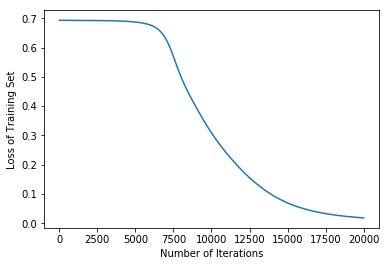

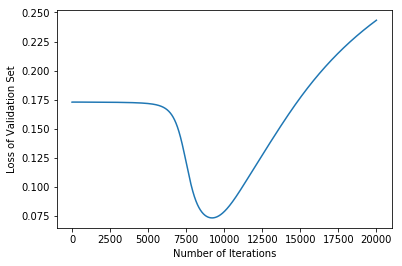

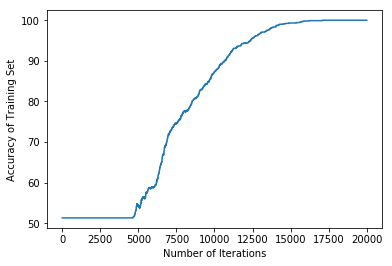

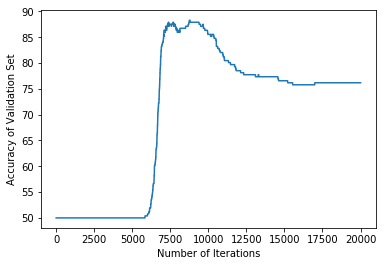

In [31]:
    print("Best")
    print("lambda = ",lambd)
    plt.plot(l_index,l_train_cost_list)
    #plt.xticks(l_index,rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Training Set")
    plt.show()
    
    plt.plot(l_index,l_val_cost_list)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Validation Set")
    plt.show()
                          
    plt.plot(l_index,l_ac_train)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Training Set")
    plt.show()
                            
    plt.plot(l_index,l_ac_val)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Validation Set")
    plt.show()

In [32]:
print("\t\ttraining\t\tvalidation\t\tbest\t")
print("=================================================================================")
print("loss\t\t"+"{0:.10f}".format(l_train_cost_list[-1])+"\t\t"+"{0:.10f}".format(l_val_cost_list[-1])+"\t\t"+"{0:.10f}".format(highestloss))
print("=================================================================================")
print("accuracy\t"+"{0:.10f}".format(l_ac_train[-1])+"\t\t"+ "{0:.10f}".format(l_ac_val[-1])+"\t\t"+"{0:.10f}".format(highest))

		training		validation		best	
loss		0.0184568814		0.2433309677		0.0753035664
accuracy	100.0000000000		76.1718750000		88.2812500000


In [ ]:
l_index = []
l_train_cost_list = []
l_val_cost_list = []
l_ac_train=[]
l_ac_val= []

In [ ]:
learning_rate=0.5
lambd = 0.01 #best?
n_h = 200 # hidden layer size
l_index,l_train_cost_list,l_val_cost_list,l_ac_train,l_ac_val = nn_model(x_train, y_train ,n_h, 4000 , x_test,y_test)

In [ ]:
    print("Best")
    print("lambda = ",lambd)
    plt.plot(l_index,l_train_cost_list)
    #plt.xticks(l_index,rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Training Set")
    plt.show()
    
    plt.plot(l_index,l_val_cost_list)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Validation Set")
    plt.show()
                          
    plt.plot(l_index,l_ac_train)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Training Set")
    plt.show()
                            
    plt.plot(l_index,l_ac_val)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Validation Set")
    plt.show()

In [ ]:
print("\t\ttraining\t\tvalidation\t\tbest\t")
print("=================================================================================")
print("loss\t\t"+"{0:.10f}".format(l_train_cost_list[-1])+"\t\t"+"{0:.10f}".format(l_val_cost_list[-1])+"\t\t"+"{0:.10f}".format(highestloss))
print("=================================================================================")
print("accuracy\t"+"{0:.10f}".format(l_ac_train[-1])+"\t\t"+ "{0:.10f}".format(l_ac_val[-1])+"\t\t"+"{0:.10f}".format(highest))

In [ ]:
l_index = []
l_train_cost_list = []
l_val_cost_list = []
l_ac_train=[]
l_ac_val= []

In [ ]:
learning_rate=0.5
lambd = 0.01 #best?
n_h = 200 # hidden layer size
l_index,l_train_cost_list,l_val_cost_list,l_ac_train,l_ac_val = nn_model(x_train, y_train ,n_h, 4000 , x_test,y_test)

In [ ]:
    print("Best")
    print("lambda = ",lambd)
    plt.plot(l_index,l_train_cost_list)
    #plt.xticks(l_index,rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Training Set")
    plt.show()
    
    plt.plot(l_index,l_val_cost_list)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Validation Set")
    plt.show()
                          
    plt.plot(l_index,l_ac_train)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Training Set")
    plt.show()
                            
    plt.plot(l_index,l_ac_val)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Validation Set")
    plt.show()

In [ ]:
print("\t\ttraining\t\tvalidation\t\tbest\t")
print("=================================================================================")
print("loss\t\t"+"{0:.10f}".format(l_train_cost_list[-1])+"\t\t"+"{0:.10f}".format(l_val_cost_list[-1])+"\t\t"+"{0:.10f}".format(highestloss))
print("=================================================================================")
print("accuracy\t"+"{0:.10f}".format(l_ac_train[-1])+"\t\t"+ "{0:.10f}".format(l_ac_val[-1])+"\t\t"+"{0:.10f}".format(highest))

In [ ]:
l_index = []
l_train_cost_list = []
l_val_cost_list = []
l_ac_train=[]
l_ac_val= []

In [ ]:
learning_rate=0.5
lambd = 0.001 #best?
n_h = 200 # hidden layer size
l_index,l_train_cost_list,l_val_cost_list,l_ac_train,l_ac_val = nn_model(x_train, y_train ,n_h, 4000 , x_test,y_test)

In [ ]:
    print("Best")
    print("lambda = ",lambd)
    plt.plot(l_index,l_train_cost_list)
    #plt.xticks(l_index,rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Training Set")
    plt.show()
    
    plt.plot(l_index,l_val_cost_list)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Validation Set")
    plt.show()
                          
    plt.plot(l_index,l_ac_train)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Training Set")
    plt.show()
                            
    plt.plot(l_index,l_ac_val)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Validation Set")
    plt.show()

In [ ]:
print("\t\ttraining\t\tvalidation\t\tbest\t")
print("=================================================================================")
print("loss\t\t"+"{0:.10f}".format(l_train_cost_list[-1])+"\t\t"+"{0:.10f}".format(l_val_cost_list[-1])+"\t\t"+"{0:.10f}".format(highestloss))
print("=================================================================================")
print("accuracy\t"+"{0:.10f}".format(l_ac_train[-1])+"\t\t"+ "{0:.10f}".format(l_ac_val[-1])+"\t\t"+"{0:.10f}".format(highest))

In [ ]:
l_index = []
l_train_cost_list = []
l_val_cost_list = []
l_ac_train=[]
l_ac_val= []

In [ ]:
learning_rate=0.5
lambd = 0.0001 #best?
n_h = 200 # hidden layer size
l_index,l_train_cost_list,l_val_cost_list,l_ac_train,l_ac_val = nn_model(x_train, y_train ,n_h, 4000 , x_test,y_test)

In [ ]:
    print("Best")
    print("lambda = ",lambd)
    plt.plot(l_index,l_train_cost_list)
    #plt.xticks(l_index,rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Training Set")
    plt.show()
    
    plt.plot(l_index,l_val_cost_list)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Validation Set")
    plt.show()
                          
    plt.plot(l_index,l_ac_train)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Training Set")
    plt.show()
                            
    plt.plot(l_index,l_ac_val)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Validation Set")
    plt.show()

In [ ]:
print("\t\ttraining\t\tvalidation\t\tbest\t")
print("=================================================================================")
print("loss\t\t"+"{0:.10f}".format(l_train_cost_list[-1])+"\t\t"+"{0:.10f}".format(l_val_cost_list[-1])+"\t\t"+"{0:.10f}".format(highestloss))
print("=================================================================================")
print("accuracy\t"+"{0:.10f}".format(l_ac_train[-1])+"\t\t"+ "{0:.10f}".format(l_ac_val[-1])+"\t\t"+"{0:.10f}".format(highest))

In [ ]:
l_index = []
l_train_cost_list = []
l_val_cost_list = []
l_ac_train=[]
l_ac_val= []

In [ ]:
learning_rate=0.5
lambd = 0.00001 #best?
n_h = 200 # hidden layer size
l_index,l_train_cost_list,l_val_cost_list,l_ac_train,l_ac_val = nn_model(x_train, y_train ,n_h, 4000 , x_test,y_test)

In [ ]:
    print("Best")
    print("lambda = ",lambd)
    plt.plot(l_index,l_train_cost_list)
    #plt.xticks(l_index,rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Training Set")
    plt.show()
    
    plt.plot(l_index,l_val_cost_list)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Validation Set")
    plt.show()
                          
    plt.plot(l_index,l_ac_train)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Training Set")
    plt.show()
                            
    plt.plot(l_index,l_ac_val)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Validation Set")
    plt.show()

In [ ]:
print("\t\ttraining\t\tvalidation\t\tbest\t")
print("=================================================================================")
print("loss\t\t"+"{0:.10f}".format(l_train_cost_list[-1])+"\t\t"+"{0:.10f}".format(l_val_cost_list[-1])+"\t\t"+"{0:.10f}".format(highestloss))
print("=================================================================================")
print("accuracy\t"+"{0:.10f}".format(l_ac_train[-1])+"\t\t"+ "{0:.10f}".format(l_ac_val[-1])+"\t\t"+"{0:.10f}".format(highest))